# RGGI Economic Evaluation

In [1]:
# Import Relevant Packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.api as sm
import statsmodels.formula.api as smf

## 1. Unemployment

In [208]:
# Load Unemployment Data

data = pd.read_csv('unemployment.csv')

In [209]:
# Clean Unemployment Data

stateIDs = list(data['Series ID'])
states = []
for i in stateIDs:
    if i == 'LASST150000000000003':
        states.append("Hawaii")
    elif i == 'LASST310000000000003':
        states.append("Nebraska")
    elif i == 'LASST060000000000003':
        states.append('California')
    elif i == 'LASST370000000000003':
        states.append('North Carolina')
    elif i == 'LASST180000000000003':
        states.append('Indiana')
    elif i == 'LASST130000000000003':
        states.append('Georgia')
    elif i == 'LASST550000000000003':
        states.append('Wisconsin')
    elif i == 'LASST340000000000003':
        states.append('New Jersey')
    elif i == 'LASST440000000000003':
        states.append('Rhode Island')
    elif i == 'LASST470000000000003':
        states.append('Tennessee')
    elif i == 'LASST350000000000003':
        states.append('New Mexico')
    elif i == 'LASST510000000000003':
        states.append('Virginia')
    elif i == 'LASST280000000000003':
        states.append('Mississippi')
    elif i == 'LASST480000000000003':
        states.append('Texas')
    elif i == 'LASST010000000000003':
        states.append('Alabama')
    elif i == 'LASST540000000000003':
        states.append('West Virginia')
    elif i == 'LASST120000000000003':
        states.append('Florida')
    elif i == 'LASST080000000000003':
        states.append('Colorado')
    elif i == 'LASST420000000000003':
        states.append('Pennsylvania')
    elif i == 'LASST260000000000003':
        states.append('Michigan')
    elif i == 'LASST360000000000003':
        states.append('New York')
    elif i == 'LASST170000000000003':
        states.append('Illinois')
    elif i == 'LASST040000000000003':
        states.append('Arizona')
    elif i == 'LASST210000000000003':
        states.append('Kentucky')
    elif i == 'LASST320000000000003':
        states.append('Nevada')
    elif i == 'LASST300000000000003':
        states.append('Montana')
    elif i == 'LASST500000000000003':
        states.append('Vermont')
    elif i == 'LASST560000000000003':
        states.append('Wyoming')
    elif i == 'LASST230000000000003':
        states.append('Maine')
    elif i == 'LASST240000000000003':
        states.append('Maryland')
    elif i == 'LASST250000000000003':
        states.append('Massachusetts')
    elif i == 'LASST270000000000003':
        states.append('Minnesota')
    elif i == 'LASST290000000000003':
        states.append('Missouri')
    elif i == 'LASST390000000000003':
        states.append('Ohio')
    elif i == 'LASST400000000000003':
        states.append('Oklahoma')
    elif i == 'LASST410000000000003':
        states.append('Oregon')
    elif i == 'LASST490000000000003':
        states.append('Utah')
    elif i == 'LASST530000000000003':
        states.append('Washington')
    elif i == 'LASST020000000000003':
        states.append('Alaska')
    elif i == 'LASST050000000000003':
        states.append('Arkansas')
    elif i == 'LASST090000000000003':
        states.append('Connecticut')
    elif i == 'LASST100000000000003':
        states.append('Delaware')
    elif i == 'LASST150000000000003':
        states.append('Hawaii')
    elif i == 'LASST160000000000003':
        states.append('Idaho')
    elif i == 'LASST190000000000003':
        states.append('Iowa')
    elif i == 'LASST200000000000003':
        states.append('Kansas')
    elif i == 'LASST220000000000003':
        states.append('Louisiana')
    elif i == 'LASST330000000000003':
        states.append('New Hampshire')
    elif i == 'LASST380000000000003':
        states.append('North Dakota')
    elif i == 'LASST460000000000003':
        states.append('South Dakota')
    elif i == 'LASST450000000000003':
        states.append('South Carolina')
    else:
        states.append("NaN")

In [210]:
# Total RGGI: Any State with Connection to RGGI (Includes New Jersey and Vermont)

RGGI_Status_Total = []

for x in states:
    if x == 'Connecticut' or x == 'Delaware' or x == 'Maine' or x == 'Maryland' or x == 'Massachusetts' or x == 'New Hampshire' or x == 'New Jersey' or x == 'New York' or x == 'Rhode Island' or x == 'Vermont' or x == 'Virginia':
        RGGI_Status_Total.append(1)
    else:
        RGGI_Status_Total.append(0)

data['RGGI_Complete'] = RGGI_Status_Total

In [211]:
# Accurate RGGI: RGGI States (CT, DE, ME, MD, MA, NH, NY, RI, VT)

RGGI_Status = []

for x in states:
    if x == 'Connecticut' or x == 'Delaware' or x == 'Maine' or x == 'Maryland' or x == 'Massachusetts' or x == 'New Hampshire' or x == 'New York' or x == 'Rhode Island' or x == 'Vermont':
        RGGI_Status.append(1)
    else:
        RGGI_Status.append(0)

data['RGGI'] = RGGI_Status

In [212]:
# Continue Cleaning Data

data['State'] = states

In [213]:
# Create Unemployment Pivot Table

unemployment = pd.pivot_table(data, values = 'Value', index = 'State', columns = 'Year', aggfunc = 'mean')
unemployment

Year                2006      2007      2008       2009       2010       2011  \
State                                                                           
Alabama         4.000000  4.041667  5.883333  10.083333  10.375000   9.583333   
Alaska          6.633333  6.258333  6.475000   7.983333   8.133333   7.733333   
Arizona         4.308333  3.750000  5.791667   9.666667  10.300000   9.433333   
Arkansas        5.250000  5.391667  5.441667   7.725000   7.858333   7.908333   
California      4.916667  5.308333  7.300000  11.541667  12.458333  11.891667   
Colorado        4.275000  3.700000  4.875000   7.875000   9.141667   8.691667   
Connecticut     4.425000  4.450000  5.650000   8.325000   9.558333   9.016667   
Delaware        3.908333  3.608333  5.033333   8.341667   8.658333   7.608333   
Florida         2.466667  3.300000  5.691667   9.558333  10.825000  10.000000   
Georgia         5.075000  4.908333  6.783333  10.408333  10.658333  10.158333   
Hawaii          2.550000  2.725000  4.033333   6.658333   6.825000   6.833333   
Idaho           3.425000  3.025000  5.033333   8.708333   8.758333   8.166667   
Illinois        4.600000  5.066667  6.508333  10.183333  10.466667   9.758333   
Indiana         5.000000  4.625000  5.941667  10.433333  10.083333   8.908333   
Iowa            3.700000  3.716667  4.183333   6.400000   6.116667   5.650000   
Kansas          4.425000  4.233333  4.608333   6.891667   6.933333   6.383333   
Kentucky        5.725000  5.366667  6.525000  10.766667  10.266667   9.375000   
Louisiana       4.133333  4.091667  4.666667   6.791667   7.516667   7.433333   
Maine           4.716667  4.691667  5.400000   8.391667   8.416667   7.725000   
Maryland        4.175000  3.733333  4.525000   7.550000   7.825000   7.316667   
Massachusetts   4.700000  4.516667  5.333333   8.075000   8.058333   7.225000   
Michigan        7.033333  7.083333  8.216667  13.133333  12.191667  10.008333   
Minnesota       4.058333  4.583333  5.433333   7.908333   7.391667   6.525000   
Mississippi     6.375000  6.150000  6.708333   9.358333  10.083333   9.775000   
Missouri        4.875000  5.083333  6.216667   9.025000   9.508333   8.641667   
Montana         3.341667  3.358333  4.725000   7.116667   7.183333   6.625000   
Nebraska        3.041667  2.925000  3.258333   4.658333   4.700000   4.400000   
Nevada          4.066667  4.591667  6.883333  11.725000  13.733333  13.316667   
New Hampshire   3.533333  3.525000  3.766667   6.141667   6.083333   5.450000   
New Jersey      4.616667  4.208333  5.450000   8.933333   9.658333   9.375000   
New Mexico      4.233333  3.591667  4.300000   7.050000   7.775000   7.216667   
New York        4.533333  4.433333  5.408333   8.366667   8.716667   8.358333   
North Carolina  5.133333  5.091667  6.208333  11.033333  10.716667  10.233333   
North Dakota    3.100000  3.016667  3.108333   3.916667   3.691667   3.358333   
Ohio            5.416667  5.608333  6.600000  10.141667  10.266667   8.816667   
Oklahoma        3.916667  3.966667  3.616667   6.558333   6.500000   5.591667   
Oregon          5.391667  5.158333  6.275000  10.791667  10.691667   9.608333   
Pennsylvania    4.708333  4.558333  5.350000   7.975000   8.166667   7.741667   
Rhode Island    5.216667  5.108333  7.600000  11.391667  11.625000  11.016667   
South Carolina  6.875000  6.066667  7.291667  11.408333  11.300000  10.450000   
South Dakota    3.000000  2.825000  3.083333   4.583333   4.908333   4.600000   
Tennessee       5.275000  4.633333  6.516667  10.116667   9.825000   9.108333   
Texas           5.000000  4.366667  4.866667   7.541667   8.191667   8.016667   
Utah            2.866667  2.558333  3.341667   7.258333   7.933333   7.058333   
Vermont         3.716667  3.941667  4.566667   6.166667   6.316667   5.566667   
Virginia        3.341667  3.283333  4.275000   6.833333   7.291667   6.541667   
Washington      5.000000  4.600000  5.291667   8.266667   9.133333   8.525000   
West Virginia   5.200000  4.825

In [214]:
# Pivot Table: Complete RGGI Statuses (Includes New Jersey and Virginia)

rggi_statuses_Complete = pd.pivot_table(data, values = 'Value', index = 'RGGI_Complete', columns = 'Year', aggfunc = 'mean')
rggi_statuses_Complete

Year               2006      2007      2008      2009      2010      2011  \
RGGI_Complete                                                               
0              4.514744  4.401709  5.376923  8.583547  8.838034  8.179915   
1              4.262121  4.136364  5.182576  8.046970  8.382576  7.745455   

Year               2012      2013      2014      2015      2016      2017  \
RGGI_Complete                                                               
0              7.278419  6.671795  5.690171  5.016667  4.747222  4.176923   
1              7.331061  6.841667  5.771212  4.802273  4.233333  3.926515   

Year               2018      2019      2020      2021      2022      2023  \
RGGI_Complete                                                               
0              3.810470  3.641453  7.322650  4.677137  3.358547  3.334402   
1              3.483333  3.154545  7.630303  5.209848  3.321212  3.141667   

Year               2024  
RGGI_Complete            
0              3.526923  
1              3.463636

In [215]:
# Pivot Table: Accurate RGGI Statuses (Only 9 States: CT, DE, ME, MA, MD, NH, NY, RI, VT)

rggi_statuses = pd.pivot_table(data, values = 'Value', index = 'RGGI', columns = 'Year', aggfunc = 'mean')
rggi_statuses

Year      2006      2007      2008      2009      2010      2011      2012  \
RGGI                                                                         
0     4.488618  4.369715  5.351829  8.549390  8.820325  8.169106  7.297358   
1     4.325000  4.223148  5.253704  8.083333  8.362037  7.698148  7.256481   

Year      2013      2014      2015      2016      2017      2018      2019  \
RGGI                                                                         
0     6.685976  5.701626  5.017480  4.733740  4.173171  3.795732  3.615447   
1     6.814815  5.737037  4.750926  4.180556  3.887963  3.477778  3.164815   

Year      2020      2021      2022      2023      2024  
RGGI                                                    
0     7.354878  4.706504  3.356301  3.348984  3.545122  
1     7.551852  5.194444  3.323148  3.032407  3.366667

### a. Unemployment for RGGI vs. Non-RGGI

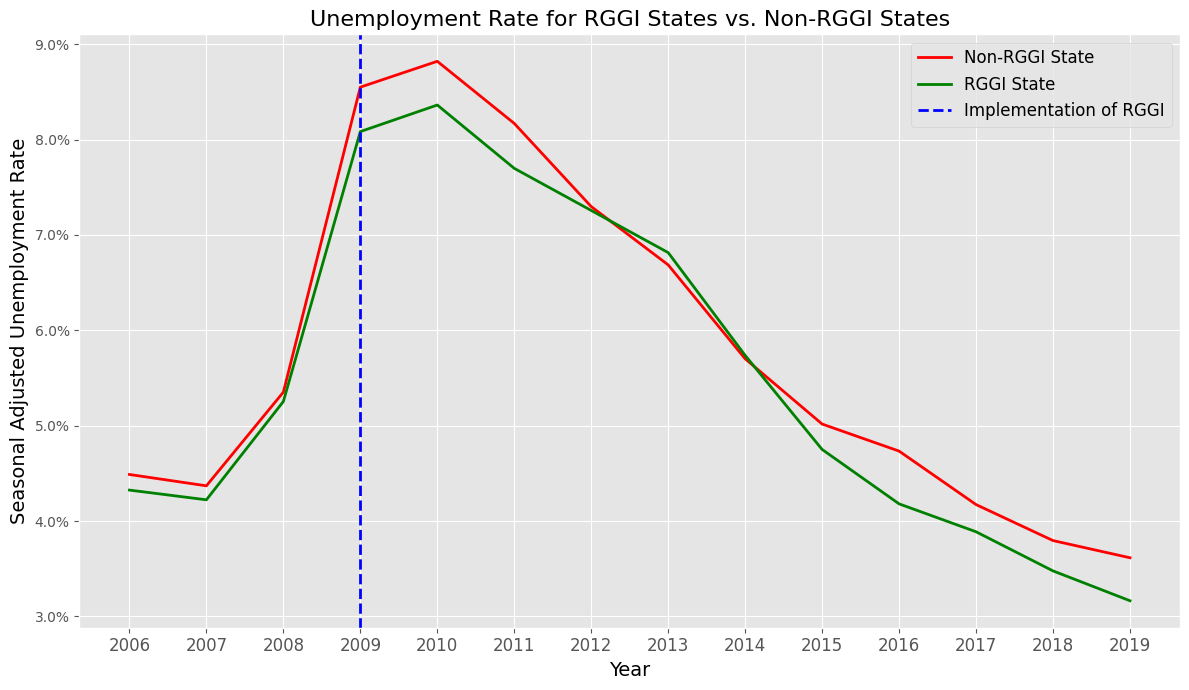

In [216]:
# Plot Unemployment Rates for RGGI States vs. Non-RGGI States

plt.style.use('ggplot')

ax = rggi_statuses.iloc[:,:14].T.plot(figsize=(12, 7), linewidth=2, color=['red', 'green'])

plt.title('Unemployment Rate for RGGI States vs. Non-RGGI States', fontsize=16)
plt.xlabel('Year', fontsize=14, color='black')
plt.ylabel('Seasonal Adjusted Unemployment Rate', fontsize=14, color='black')
plt.xticks(range(2006, 2020), fontsize=12)
plt.axvline(x=2009, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Non-RGGI State', 'RGGI State', 'Implementation of RGGI'], loc='upper right', fontsize=12)
for text in legend.get_texts():
    text.set_color('black')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
ax.yaxis.tick_left()
plt.tight_layout()

plt.show()

### b. Unemployment for RGGI State vs. US

In [217]:
# Import US Unemployment Data

us_data = pd.read_csv('US_unemployment.csv')

In [218]:
# Clean US Unemployment Data

us_data['Location'] = ["United States" for i in range(len(us_data))]
us_pt = pd.pivot_table(us_data, values = 'Value', index = 'Location', columns = 'Year', aggfunc = 'mean')
us_pt

Year               2006      2007  2008      2009      2010      2011   2012  \
Location                                                                       
United States  4.608333  4.616667   5.8  9.283333  9.608333  8.933333  8.075   

Year               2013      2014   2015   2016      2017      2018   2019  \
Location                                                                     
United States  7.358333  6.158333  5.275  4.875  4.358333  3.891667  3.675   

Year               2020  2021      2022   2023  2024  
Location                                              
United States  8.091667  5.35  3.633333  3.625   3.8

#### i. Connecticut

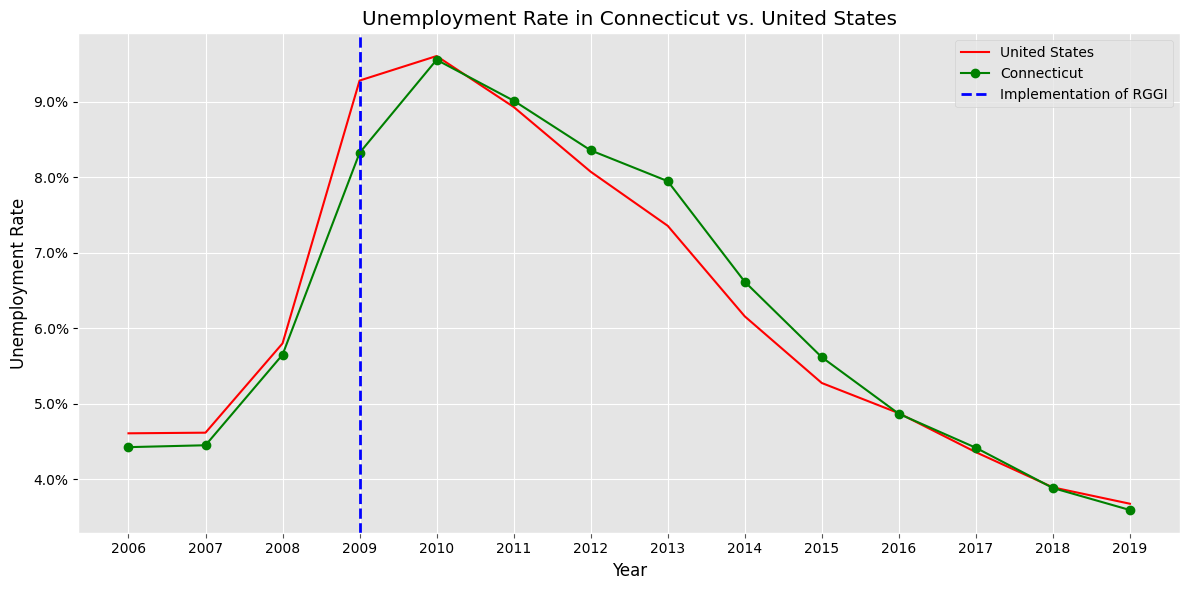

In [219]:
# Unemployment in CT vs US

ax = us_pt.iloc[:,:14].T.plot(figsize=(12,6), color='red')
unemployment.loc['Connecticut',:'2019'].plot(kind='line', marker='o', color='green')
plt.xticks(range(2006,2020), color='black')
plt.ylabel('Unemployment Rate', color='black')
plt.xlabel('Year', color='black')
plt.axvline(x=2009, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['United States', 'Connecticut', 'Implementation of RGGI'], loc='upper right', fontsize=10)
for text in legend.get_texts():
    text.set_color('black')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
ax.tick_params(axis='y', colors='black')
ax.yaxis.tick_left()
plt.title('Unemployment Rate in Connecticut vs. United States')
plt.tight_layout()
plt.show()

#### ii. Delaware

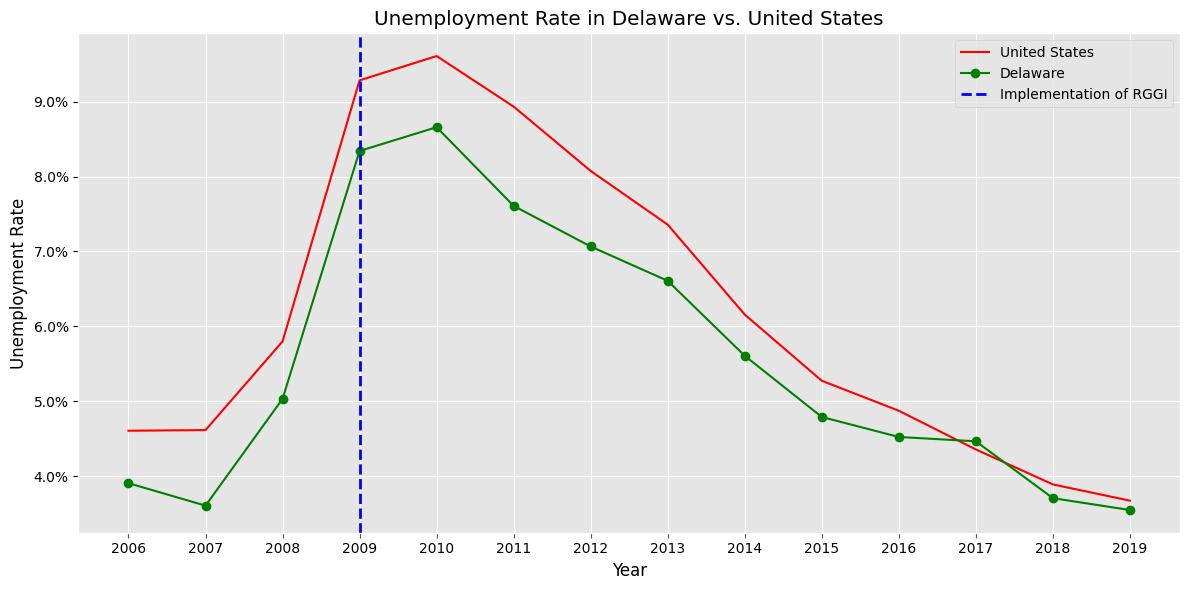

In [220]:
# Unemployment in DE vs US

ax = us_pt.iloc[:,:14].T.plot(figsize=(12,6), color='red')
unemployment.loc['Delaware',:'2019'].plot(kind='line', marker='o', color='green')
plt.xticks(range(2006,2020), color='black')
plt.ylabel('Unemployment Rate', color='black')
plt.xlabel('Year', color='black')
plt.axvline(x=2009, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['United States', 'Delaware', 'Implementation of RGGI'], loc='upper right', fontsize=10)
for text in legend.get_texts():
    text.set_color('black')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
ax.tick_params(axis='y', colors='black')
ax.yaxis.tick_left()
plt.title('Unemployment Rate in Delaware vs. United States')
plt.tight_layout()
plt.show()

#### iii. Maine

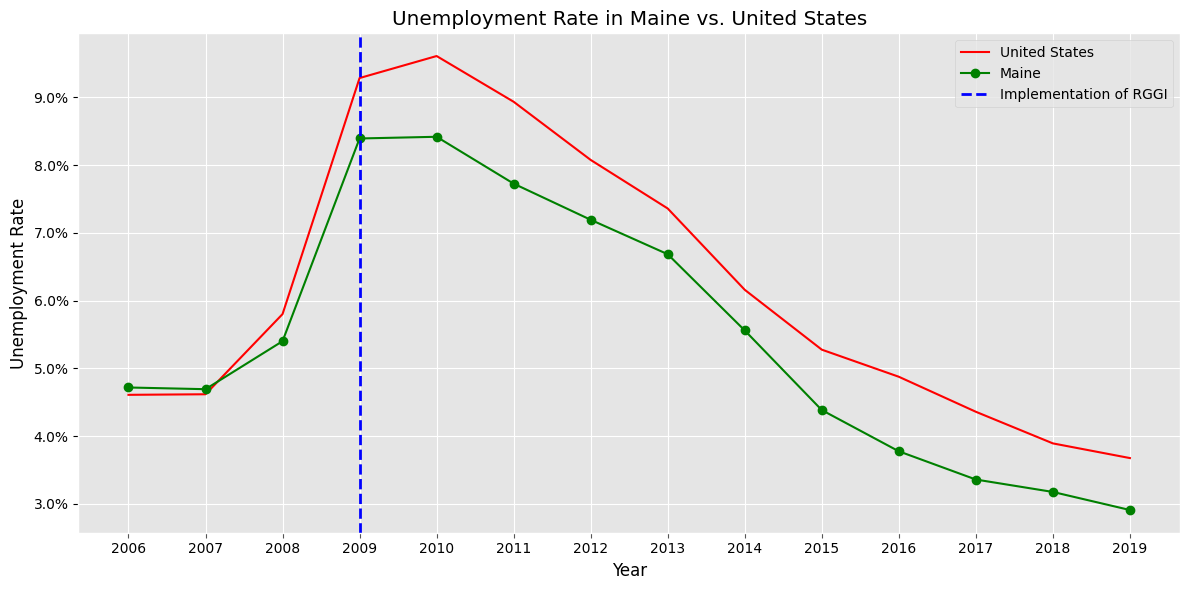

In [221]:
# Unemployment in ME vs US

ax = us_pt.iloc[:,:14].T.plot(figsize=(12,6), color='red')
unemployment.loc['Maine',:'2019'].plot(kind='line', marker='o', color='green')
plt.xticks(range(2006,2020), color='black')
plt.ylabel('Unemployment Rate', color='black')
plt.xlabel('Year', color='black')
plt.axvline(x=2009, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['United States', 'Maine', 'Implementation of RGGI'], loc='upper right', fontsize=10)
for text in legend.get_texts():
    text.set_color('black')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
ax.tick_params(axis='y', colors='black')
ax.yaxis.tick_left()
plt.title('Unemployment Rate in Maine vs. United States')
plt.tight_layout()
plt.show()

#### iv. Massachusetts

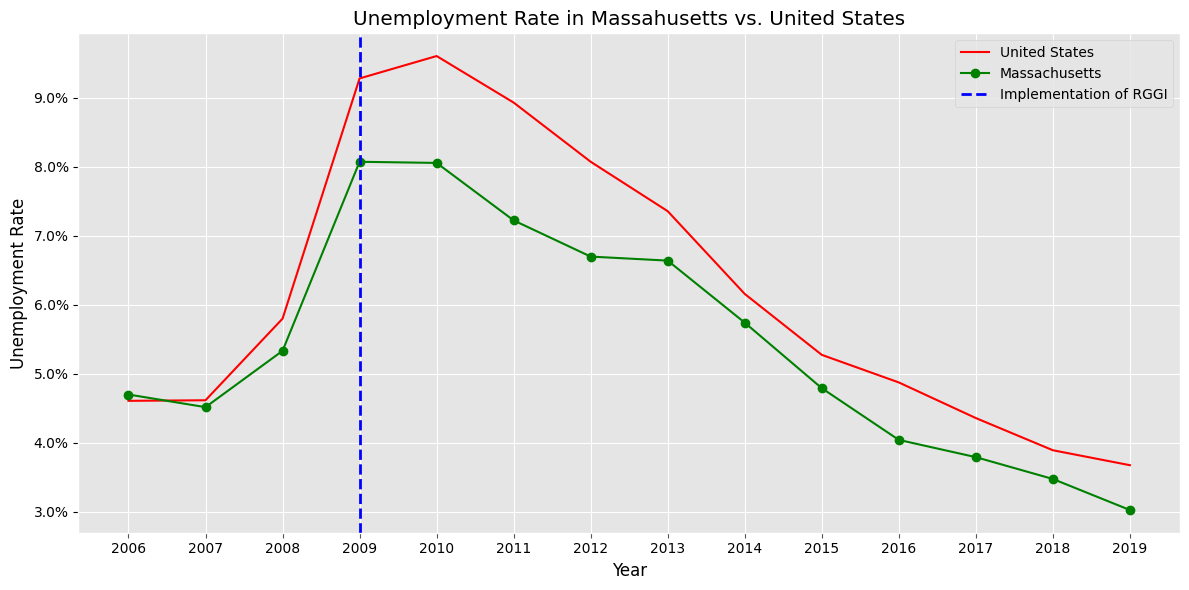

In [222]:
# Unemployment in MA vs US

ax = us_pt.iloc[:,:14].T.plot(figsize=(12,6), color='red')
unemployment.loc['Massachusetts',:'2019'].plot(kind='line', marker='o', color='green')
plt.xticks(range(2006,2020), color='black')
plt.ylabel('Unemployment Rate', color='black')
plt.xlabel('Year', color='black')
plt.axvline(x=2009, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['United States', 'Massachusetts', 'Implementation of RGGI'], loc='upper right', fontsize=10)
for text in legend.get_texts():
    text.set_color('black')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
ax.tick_params(axis='y', colors='black')
ax.yaxis.tick_left()
plt.title('Unemployment Rate in Massahusetts vs. United States')
plt.tight_layout()
plt.show()

#### v. Maryland

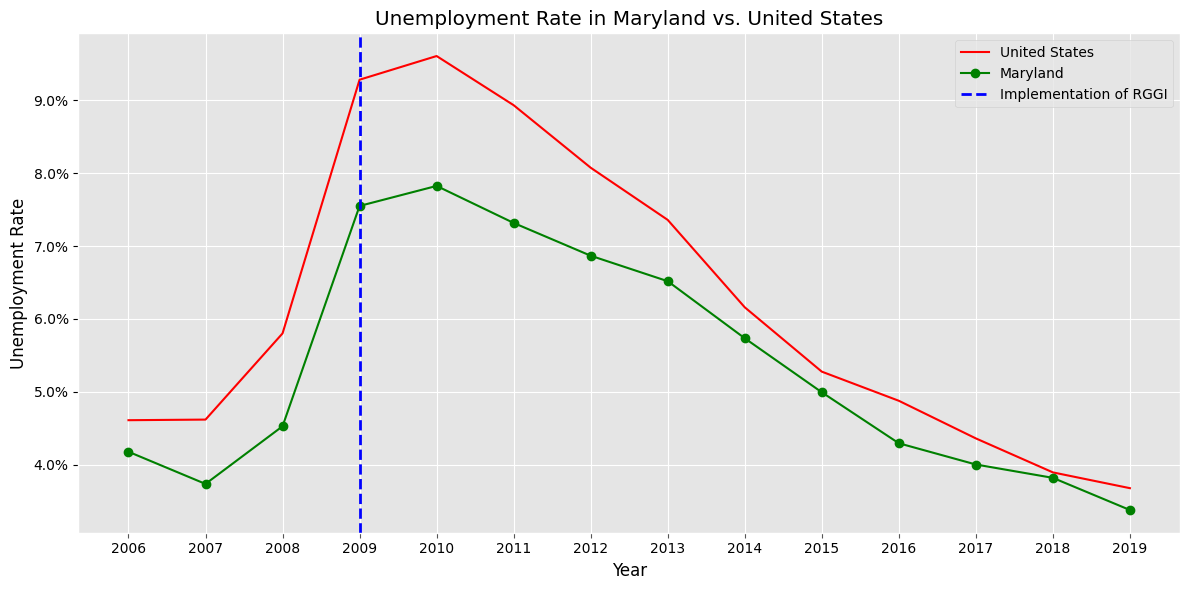

In [223]:
# Unemployment in MD vs US

ax = us_pt.iloc[:,:14].T.plot(figsize=(12,6), color='red')
unemployment.loc['Maryland',:'2019'].plot(kind='line', marker='o', color='green')
plt.xticks(range(2006,2020), color='black')
plt.ylabel('Unemployment Rate', color='black')
plt.xlabel('Year', color='black')
plt.axvline(x=2009, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['United States', 'Maryland', 'Implementation of RGGI'], loc='upper right', fontsize=10)
for text in legend.get_texts():
    text.set_color('black')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
ax.tick_params(axis='y', colors='black')
ax.yaxis.tick_left()
plt.title('Unemployment Rate in Maryland vs. United States')
plt.tight_layout()
plt.show()

#### vi. New Hampshire

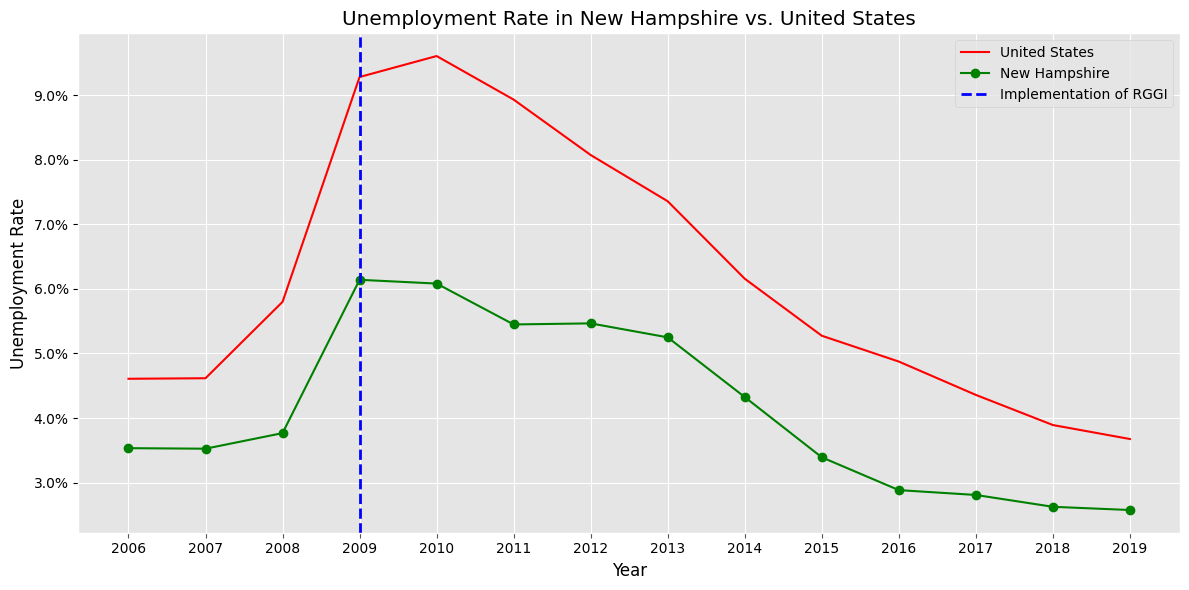

In [224]:
# Unemployment in NH vs US

ax = us_pt.iloc[:,:14].T.plot(figsize=(12,6), color='red')
unemployment.loc['New Hampshire',:'2019'].plot(kind='line', marker='o', color='green')
plt.xticks(range(2006,2020), color='black')
plt.ylabel('Unemployment Rate', color='black')
plt.xlabel('Year', color='black')
plt.axvline(x=2009, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['United States', 'New Hampshire', 'Implementation of RGGI'], loc='upper right', fontsize=10)
for text in legend.get_texts():
    text.set_color('black')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
ax.tick_params(axis='y', colors='black')
ax.yaxis.tick_left()
plt.title('Unemployment Rate in New Hampshire vs. United States')
plt.tight_layout()
plt.show()

#### vii. New Jersey

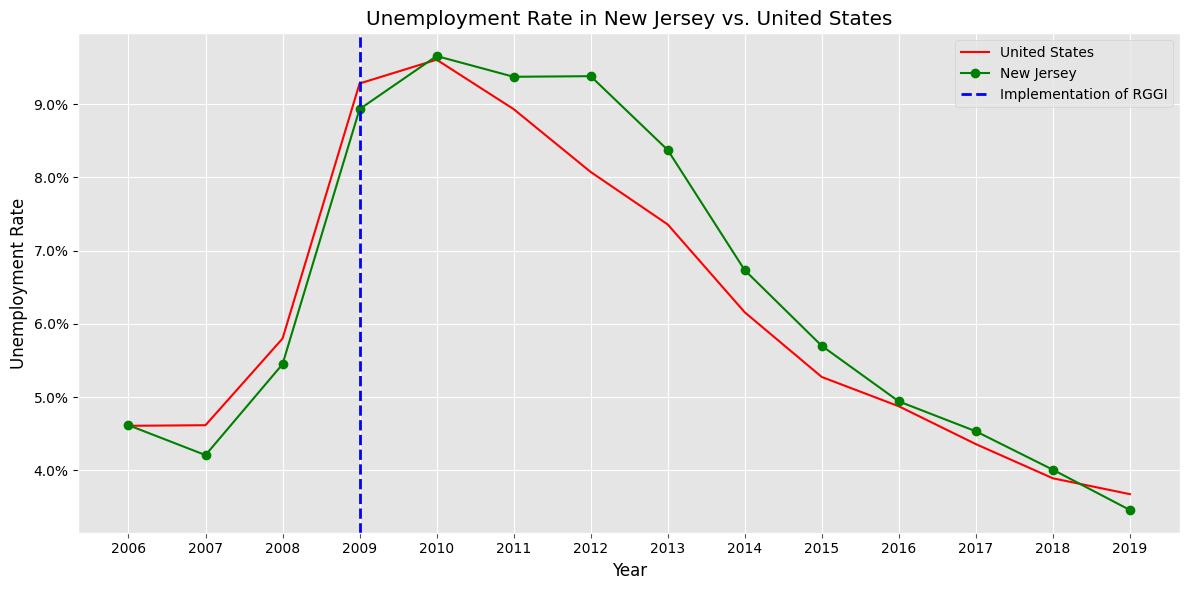

In [225]:
# Unemployment in NJ vs US (not within RGGI for many years)

ax = us_pt.iloc[:,:14].T.plot(figsize=(12,6), color='red')
unemployment.loc['New Jersey',:'2019'].plot(kind='line', marker='o', color='green')
plt.xticks(range(2006,2020), color='black')
plt.ylabel('Unemployment Rate', color='black')
plt.xlabel('Year', color='black')
plt.axvline(x=2009, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['United States', 'New Jersey', 'Implementation of RGGI'], loc='upper right', fontsize=10)
for text in legend.get_texts():
    text.set_color('black')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
ax.tick_params(axis='y', colors='black')
ax.yaxis.tick_left()
plt.title('Unemployment Rate in New Jersey vs. United States')
plt.tight_layout()
plt.show()

#### viii. New York

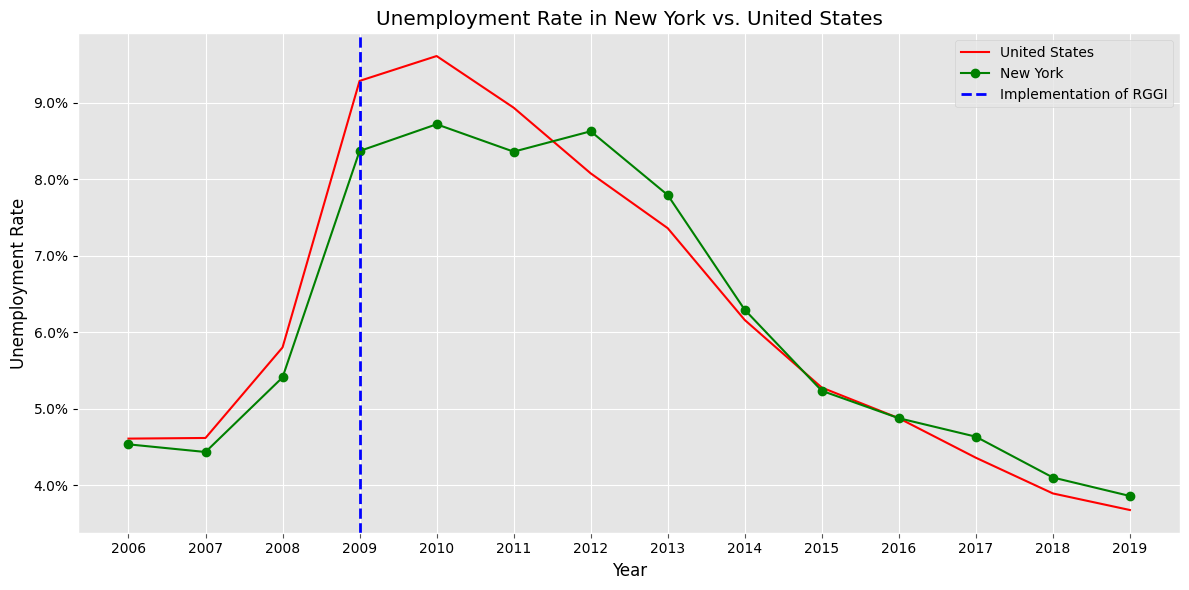

In [226]:
# Unemployment in NY vs US

ax = us_pt.iloc[:,:14].T.plot(figsize=(12,6), color='red')
unemployment.loc['New York',:'2019'].plot(kind='line', marker='o', color='green')
plt.xticks(range(2006,2020), color='black')
plt.ylabel('Unemployment Rate', color='black')
plt.xlabel('Year', color='black')
plt.axvline(x=2009, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['United States', 'New York', 'Implementation of RGGI'], loc='upper right', fontsize=10)
for text in legend.get_texts():
    text.set_color('black')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
ax.tick_params(axis='y', colors='black')
ax.yaxis.tick_left()
plt.title('Unemployment Rate in New York vs. United States')
plt.tight_layout()
plt.show()

#### ix. Rhode Island

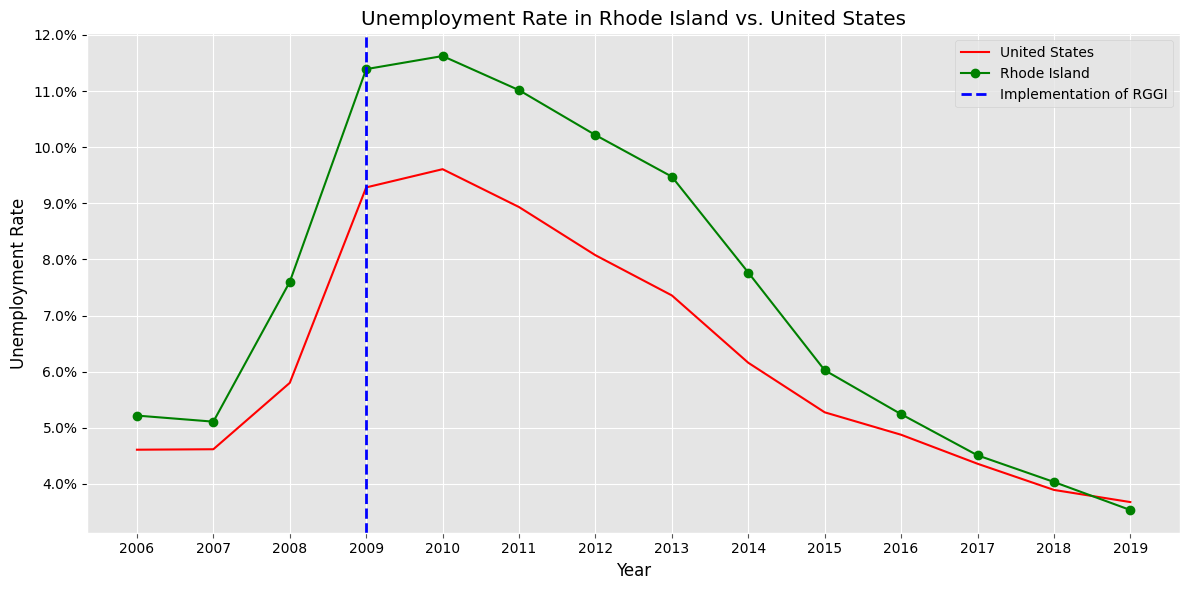

In [227]:
# Unemployment in RI vs US

ax = us_pt.iloc[:,:14].T.plot(figsize=(12,6), color='red')
unemployment.loc['Rhode Island',:'2019'].plot(kind='line', marker='o', color='green')
plt.xticks(range(2006,2020), color='black')
plt.ylabel('Unemployment Rate', color='black')
plt.xlabel('Year', color='black')
plt.axvline(x=2009, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['United States', 'Rhode Island', 'Implementation of RGGI'], loc='upper right', fontsize=10)
for text in legend.get_texts():
    text.set_color('black')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
ax.tick_params(axis='y', colors='black')
ax.yaxis.tick_left()
plt.title('Unemployment Rate in Rhode Island vs. United States')
plt.tight_layout()
plt.show()

#### x. Vermont

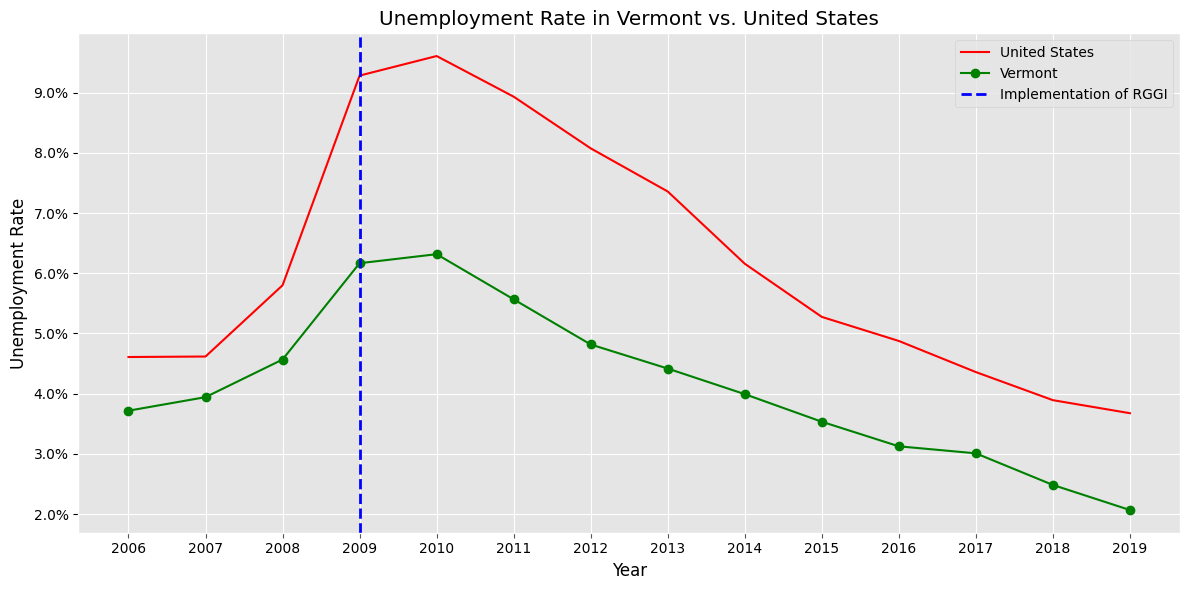

In [228]:
# Unemployment in VT vs US

ax = us_pt.iloc[:,:14].T.plot(figsize=(12,6), color='red')
unemployment.loc['Vermont',:'2019'].plot(kind='line', marker='o', color='green')
plt.xticks(range(2006,2020), color='black')
plt.ylabel('Unemployment Rate', color='black')
plt.xlabel('Year', color='black')
plt.axvline(x=2009, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['United States', 'Vermont', 'Implementation of RGGI'], loc='upper right', fontsize=10)
for text in legend.get_texts():
    text.set_color('black')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
ax.tick_params(axis='y', colors='black')
ax.yaxis.tick_left()
plt.title('Unemployment Rate in Vermont vs. United States')
plt.tight_layout()
plt.show()

#### xi. Virginia

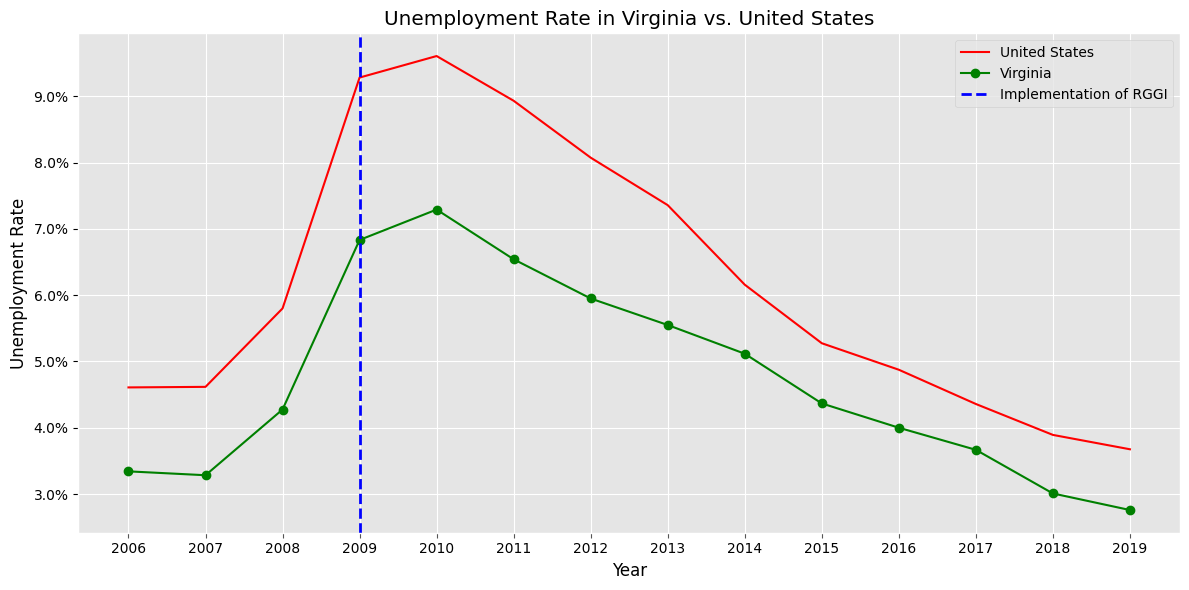

In [229]:
# Unemployment in VA vs US (only joined recently)

ax = us_pt.iloc[:,:14].T.plot(figsize=(12,6), color='red')
unemployment.loc['Virginia',:'2019'].plot(kind='line', marker='o', color='green')
plt.xticks(range(2006,2020), color='black')
plt.ylabel('Unemployment Rate', color='black')
plt.xlabel('Year', color='black')
plt.axvline(x=2009, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['United States', 'Virginia', 'Implementation of RGGI'], loc='upper right', fontsize=10)
for text in legend.get_texts():
    text.set_color('black')
ax.yaxis.set_major_formatter(ticker.PercentFormatter(decimals=1))
ax.tick_params(axis='y', colors='black')
ax.yaxis.tick_left()
plt.title('Unemployment Rate in Virginia vs. United States')
plt.tight_layout()
plt.show()

### c. Regression Unemployment~RGGI Indicator

In [230]:
unemployment_index = unemployment.reset_index()
unemployment_index.head()

Year       State      2006      2007      2008       2009       2010  \
0        Alabama  4.000000  4.041667  5.883333  10.083333  10.375000   
1         Alaska  6.633333  6.258333  6.475000   7.983333   8.133333   
2        Arizona  4.308333  3.750000  5.791667   9.666667  10.300000   
3       Arkansas  5.250000  5.391667  5.441667   7.725000   7.858333   
4     California  4.916667  5.308333  7.300000  11.541667  12.458333   

Year       2011       2012      2013      2014   2015      2016      2017  \
0      9.583333   8.158333  7.325000  6.733333  6.125  5.908333  4.508333   
1      7.733333   7.250000  6.991667  6.741667  6.275  6.600000  6.508333   
2      9.433333   8.350000  7.816667  6.791667  6.075  5.483333  4.975000   
3      7.908333   7.266667  7.041667  5.900000  4.950  3.983333  3.741667   
4     11.891667  10.525000  9.033333  7.566667  6.225  5.516667  4.833333   

Year      2018      2019       2020      2021      2022      2023  2024  
0     3.941667  3.183333   6.408333  3.375000  2.516667  2.491667  2.95  
1     6.041667  5.608333   8.350000  6.383333  4.233333  4.216667  4.65  
2     4.808333  4.808333   7.825000  5.066667  3.775000  3.908333  4.15  
3     3.658333  3.491667   6.183333  4.041667  3.208333  3.225000  3.65  
4     4.258333  4.100000  10.191667  7.325000  4.275000  4.741667  5.25

In [231]:
# Accurate RGGI: RGGI States (CT, DE, ME, MD, MA, NH, NY, RI, VT)

RGGI_Status_Unemploy = []

for x in range(len(unemployment_index)):
    if unemployment_index.loc[x,'State'] == 'Connecticut' or unemployment_index.loc[x,'State'] == 'Delaware' or unemployment_index.loc[x,'State'] == 'Maine' or unemployment_index.loc[x,'State'] == 'Maryland' or unemployment_index.loc[x,'State'] == 'Massachusetts' or unemployment_index.loc[x,'State'] == 'New Hampshire' or unemployment_index.loc[x,'State'] == 'New York' or unemployment_index.loc[x,'State'] == 'Rhode Island' or unemployment_index.loc[x,'State'] == 'Vermont':
        RGGI_Status_Unemploy.append(1)
    else:
        RGGI_Status_Unemploy.append(0)

unemployment_index['RGGI'] = RGGI_Status_Unemploy

In [232]:
# Select Columns for Regression Analysis

selected_columns = unemployment_index.loc[:, ['State', 2011, 2008,'RGGI']]
selected_columns.columns = ['State', 'U2011', 'U2008', 'RGGI']
selected_columns.head()

State      U2011     U2008  RGGI
0     Alabama   9.583333  5.883333     0
1      Alaska   7.733333  6.475000     0
2     Arizona   9.433333  5.791667     0
3    Arkansas   7.908333  5.441667     0
4  California  11.891667  7.300000     0

In [233]:
# Regression 2011_Unemployment~RGGI+2008_Unemployment

lm = smf.ols(formula='U2011~RGGI+U2008', data = selected_columns).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  U2011   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     72.33
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           4.51e-15
Time:                        18:22:31   Log-Likelihood:                -68.524
No. Observations:                  50   AIC:                             143.0
Df Residuals:                      47   BIC:                             148.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9789      0.621      1.577      0.1

## 2. Employment

In [234]:
# Important Columns

selected_columns = [3, 7,9,33,34,35,37]

In [235]:
# Alabama

Alabama = pd.read_csv('Alabama_GDP.csv')
Alabama = Alabama.T
Alabama.columns = Alabama.iloc[0]
Alabama = Alabama[1:] 
Alabama = Alabama.iloc[:, selected_columns]
new_column_names = ['AL_Population','AL_Employment', 'AL_EmploymentPC', 'AL_GDP', 'AL_GDP_National', 'AL_RealGDP', 'AL_RealGDP_PC']
Alabama.columns = new_column_names
Alabama = Alabama.iloc[48:]
Alabama = Alabama.astype({'AL_Population': int,'AL_Employment': int, 'AL_EmploymentPC': float, 'AL_GDP': float, 'AL_GDP_National': float, 'AL_RealGDP': float, 'AL_RealGDP_PC': float})
#Alabama['AL_Employment_Rate'] = Alabama['AL_Employment']/Alabama['AL_Population']
Alabama

AL_Population  AL_Employment  AL_EmploymentPC    AL_GDP  \
2006        4628981        2545547         2.361160  166469.0   
2007        4672840        2604108         2.300527  172975.2   
2008        4718206        2582600        -0.825926  174526.3   
2009        4757938        2479511        -3.991675  170930.9   
2010        4787998        2460305        -0.774588  177249.2   
2011        4812138        2497974         1.531070  183916.6   
2012        4839261        2503656         0.227464  189245.5   
2013        4864399        2523020         0.773429  194786.9   
2014        4886793        2552256         1.158770  197406.9   
2015        4908162        2587641         1.386420  202372.4   
2016        4930595        2619761         1.241285  207368.4   
2017        4952202        2649222         1.124568  214606.3   
2018        4976395        2692424         1.630743  223859.3   
2019        5003418        2712086         0.730271  231561.9   
2020        5031362        2671005        -1.514738  230892.1   
2021        5049846        2769464         3.686215  254109.7   
2022        5074296        2869931         3.627669  277817.5   

      AL_GDP_National  AL_RealGDP  AL_RealGDP_PC  
2006         1.204936    187270.8       1.573633  
2007         1.195056    189002.5       0.924704  
2008         1.181638    186946.7      -1.087710  
2009         1.180620    180707.2      -3.337582  
2010         1.177816    184702.4       2.210869  
2011         1.178973    187605.8       1.571934  
2012         1.164303    189245.5       0.874013  
2013         1.156472    191369.8       1.122510  
2014         1.124782    189886.3      -0.775201  
2015         1.111568    191335.2       0.763036  
2016         1.109212    194283.8       1.541065  
2017         1.101826    196974.9       1.385139  
2018         1.090238    200372.6       1.724941  
2019         1.083028    203432.7       1.527205  
2020         1.096329    199880.8      -1.745983  
2021         1.089894    209979.3       5.052261  
2022         1.091075    213264.8       1.564678

In [236]:
# Alaska

Alaska = pd.read_csv('Alaska_GDP.csv')
Alaska = Alaska.T
Alaska.columns = Alaska.iloc[0]
Alaska = Alaska[1:] 
Alaska = Alaska.iloc[:, selected_columns]
new_column_names = ['AK_Population','AK_Employment', 'AK_EmploymentPC', 'AK_GDP', 'AK_GDP_National', 'AK_RealGDP', 'AK_RealGDP_PC']
Alaska.columns = new_column_names
Alaska = Alaska.iloc[48:]
Alaska = Alaska.astype({'AK_Population': int, 'AK_Employment': int, 'AK_EmploymentPC': float, 'AK_GDP': float, 'AK_GDP_National': float, 'AK_RealGDP': float, 'AK_RealGDP_PC': float})
#Alaska['AK_Employment_Rate'] = Alaska['AK_Employment']/Alaska['AK_Population']
Alaska

AK_Population  AK_Employment  AK_EmploymentPC   AK_GDP  AK_GDP_National  \
2006         675302         431321         2.348952  45094.1         0.326400   
2007         680300         439844         1.976022  49583.7         0.342565   
2008         687455         443602         0.854394  55122.5         0.373209   
2009         698895         442505        -0.247294  49957.8         0.345058   
2010         714014         443940         0.324290  53331.6         0.354387   
2011         722511         450420         1.459657  56896.3         0.364726   
2012         731106         459282         1.967497  58283.6         0.358581   
2013         738057         461205         0.418697  57247.7         0.339886   
2014         737638         461371         0.035993  56484.9         0.321839   
2015         739127         461707         0.072826  51490.9         0.282823   
2016         743410         457142        -0.988722  50727.7         0.271342   
2017         741949         455550        -0.348251  53301.5         0.273659   
2018         737717         454776        -0.169905  54899.6         0.267372   
2019         734823         454743        -0.007256  54728.2         0.255967   
2020         732923         430840        -5.256376  50475.2         0.239668   
2021         734182         443047         2.833302  57349.4         0.245976   
2022         733583         457687         3.304390  63618.0         0.249848   

      AK_RealGDP  AK_RealGDP_PC  
2006     49190.2       7.738336  
2007     51721.0       5.144927  
2008     51252.1      -0.906595  
2009     56215.1       9.683506  
2010     54601.5      -2.870403  
2011     55280.3       1.243189  
2012     58283.6       5.432858  
2013     55354.3      -5.025942  
2014     54188.2      -2.106611  
2015     54740.8       1.019779  
2016     54246.6      -0.902800  
2017     54278.7       0.059174  
2018     53327.0      -1.753358  
2019     53433.8       0.200274  
2020     50705.2      -5.106506  
2021     50869.4       0.323833  
2022     49633.7      -2.429162

In [237]:
# Arizona

Arizona = pd.read_csv('Arizona_GDP.csv')
Arizona = Arizona.T
Arizona.columns = Arizona.iloc[0]
Arizona = Arizona[1:] 
Arizona = Arizona.iloc[:, selected_columns]
new_column_names = ['AZ_Population','AZ_Employment', 'AZ_EmploymentPC', 'AZ_GDP', 'AZ_GDP_National', 'AZ_RealGDP', 'AZ_RealGDP_PC']
Arizona.columns = new_column_names
Arizona = Arizona.iloc[48:]
Arizona = Arizona.astype({'AZ_Population': int,'AZ_Employment': int, 'AZ_EmploymentPC': float, 'AZ_GDP': float, 'AZ_GDP_National': float, 'AZ_RealGDP': float, 'AZ_RealGDP_PC': float})
Arizona

AZ_Population  AZ_Employment  AZ_EmploymentPC    AZ_GDP  \
2006        6029141        3375196         4.826295  245957.0   
2007        6167681        3465065         2.662631  261392.0   
2008        6280362        3402806        -1.796763  262926.0   
2009        6343154        3228516        -5.121949  246424.3   
2010        6402024        3181563        -1.454321  251153.0   
2011        6446537        3239037         1.806471  260915.7   
2012        6507351        3295532         1.744191  271440.0   
2013        6563216        3371101         2.293074  278591.6   
2014        6638196        3448146         2.285455  287666.6   
2015        6714328        3547647         2.885638  299393.3   
2016        6801591        3644791         2.738266  313081.4   
2017        6879830        3740747         2.632689  332001.8   
2018        6969944        3854741         3.047359  351879.5   
2019        7070511        3929945         1.950948  372393.5   
2020        7179943        3920033        -0.252217  382072.3   
2021        7264877        4086802         4.254275  420026.7   
2022        7359197        4287595         4.913206  458949.8   

      AZ_GDP_National  AZ_RealGDP  AZ_RealGDP_PC  
2006         1.780287    274179.4       4.518576  
2007         1.805913    283250.7       3.308527  
2008         1.780152    280810.1      -0.861640  
2009         1.702052    257498.5      -8.301553  
2010         1.668905    260307.1       1.090725  
2011         1.672565    266101.5       2.225986  
2012         1.669992    271440.0       2.006189  
2013         1.654031    273481.9       0.752247  
2014         1.639062    276948.9       1.267726  
2015         1.644474    282577.0       2.032180  
2016         1.674670    291275.2       3.078170  
2017         1.704554    303606.1       4.233419  
2018         1.713722    314827.5       3.696039  
2019         1.741705    325395.3       3.356695  
2020         1.814168    327178.0       0.547857  
2021         1.801524    347656.0       6.258978  
2022         1.802438    356417.0       2.520020

In [238]:
# Arkansas

Arkansas = pd.read_csv('Arkansas_GDP.csv')
Arkansas = Arkansas.T
Arkansas.columns = Arkansas.iloc[0]
Arkansas = Arkansas[1:] 
Arkansas = Arkansas.iloc[:, selected_columns]
new_column_names = ['AR_Population','AR_Employment', 'AR_EmploymentPC', 'AR_GDP', 'AR_GDP_National', 'AR_RealGDP', 'AR_RealGDP_PC']
Arkansas.columns = new_column_names
Arkansas = Arkansas.iloc[48:]
Arkansas = Arkansas.astype({'AR_Population': int,'AR_Employment': int, 'AR_EmploymentPC': float, 'AR_GDP': float, 'AR_GDP_National': float, 'AR_RealGDP': float, 'AR_RealGDP_PC': float})
Arkansas

AR_Population  AR_Employment  AR_EmploymentPC    AR_GDP  \
2006        2821761        1567665         1.950612   95875.1   
2007        2848650        1582826         0.967107   98381.6   
2008        2874554        1579250        -0.225925   99706.8   
2009        2896843        1542904        -2.301472   97508.1   
2010        2921561        1541250        -0.107200  101486.5   
2011        2938833        1561929         1.341703  105768.1   
2012        2948887        1565109         0.203594  108492.1   
2013        2954685        1569358         0.271483  113227.3   
2014        2961191        1587408         1.150152  116139.4   
2015        2970352        1610799         1.473534  117786.8   
2016        2980602        1629734         1.175504  119152.4   
2017        2990801        1639903         0.623967  122466.7   
2018        2997271        1658212         1.116468  127535.7   
2019        3004248        1663920         0.344226  131578.3   
2020        3014195        1639829        -1.447846  133969.1   
2021        3028122        1686444         2.842674  148676.1   
2022        3045637        1755536         4.096904  165220.6   

      AR_GDP_National  AR_RealGDP  AR_RealGDP_PC  
2006         0.693963    108460.6       2.340630  
2007         0.679702    107606.1      -0.787844  
2008         0.675069    106536.5      -0.993996  
2009         0.673488    102996.6      -3.322711  
2010         0.674375    105662.0       2.587852  
2011         0.678012    107932.5       2.148833  
2012         0.667481    108492.1       0.518472  
2013         0.672244    110752.4       2.083377  
2014         0.661737    111734.5       0.886753  
2015         0.646966    112351.0       0.551754  
2016         0.637345    112798.1       0.397949  
2017         0.628765    113850.2       0.932728  
2018         0.621124    115885.2       1.787436  
2019         0.615399    117126.2       1.070887  
2020         0.636116    117268.2       0.121237  
2021         0.637682    123347.3       5.183929  
2022         0.648872    126532.2       2.582059

In [239]:
# California

California = pd.read_csv('California_GDP.csv')
California = California.T
California.columns = California.iloc[0]
California = California[1:] 
California = California.iloc[:, selected_columns]
new_column_names = ['CA_Population','CA_Employment', 'CA_EmploymentPC', 'CA_GDP', 'CA_GDP_National', 'CA_RealGDP', 'CA_RealGDP_PC']
California.columns = new_column_names
California = California.iloc[48:]
California = California.astype({'CA_Population': int, 'CA_Employment': int, 'CA_EmploymentPC': float, 'CA_GDP': float, 'CA_GDP_National': float, 'CA_RealGDP': float, 'CA_RealGDP_PC': float})
California

CA_Population  CA_Employment  CA_EmploymentPC     CA_GDP  \
2006       36021202       20505244         1.879610  1812210.0   
2007       36250311       20888508         1.869102  1898902.0   
2008       36604337       20654365        -1.120918  1944695.3   
2009       36961229       19837727        -3.953828  1890165.9   
2010       37322360       19642544        -0.983898  1954092.7   
2011       37650514       19986185         1.749473  2023500.0   
2012       37970368       20666919         3.406023  2113096.4   
2013       38291358       21318697         3.153726  2220389.9   
2014       38636290       21996861         3.181076  2335286.5   
2015       38966055       22687175         3.138239  2473555.9   
2016       39223210       23177961         2.163275  2569634.0   
2017       39424071       23548874         1.600283  2728743.1   
2018       39535906       24077466         2.244659  2897200.7   
2019       39547996       24225068         0.613030  3042694.1   
2020       39501653       23154091        -4.420945  3020173.4   
2021       39142991       23934549         3.370713  3373240.7   
2022       39029342       25300974         5.709007  3598102.7   

      CA_GDP_National  CA_RealGDP  CA_RealGDP_PC  
2006        13.117145   2002437.4       3.923274  
2007        13.119194   2041192.2       1.935381  
2008        13.166645   2061638.8       1.001699  
2009        13.055375   1995439.7      -3.210994  
2010        12.984893   2036015.0       2.033401  
2011        12.971378   2063827.5       1.366026  
2012        13.000494   2113096.4       2.387259  
2013        13.182711   2179229.0       3.129654  
2014        13.305955   2256054.7       3.525361  
2015        13.586470   2357452.9       4.494492  
2016        13.744955   2427894.6       2.988043  
2017        14.009837   2538204.0       4.543418  
2018        14.109933   2644061.2       4.170555  
2019        14.230848   2729225.8       3.220977  
2020        14.340482   2667220.9      -2.271886  
2021        14.468063   2874730.8       7.780004  
2022        14.130864   2885627.3       0.379044

In [240]:
# Colorado

Colorado = pd.read_csv('Colorado_GDP.csv')
Colorado = Colorado.T
Colorado.columns = Colorado.iloc[0]
Colorado = Colorado[1:] 
Colorado = Colorado.iloc[:, selected_columns]
new_column_names = ['CO_Population','CO_Employment', 'CO_EmploymentPC', 'CO_GDP', 'CO_GDP_National', 'CO_RealGDP', 'CO_RealGDP_PC']
Colorado.columns = new_column_names
Colorado = Colorado.iloc[48:]
Colorado = Colorado.astype({'CO_Population': int,'CO_Employment': int, 'CO_EmploymentPC': float, 'CO_GDP': float, 'CO_GDP_National': float, 'CO_RealGDP': float, 'CO_RealGDP_PC': float})
Colorado

CO_Population  CO_Employment  CO_EmploymentPC    CO_GDP  \
2006        4720423        3109365         2.394276  232646.7   
2007        4803868        3217965         3.492675  248446.5   
2008        4889730        3251120         1.030310  258871.7   
2009        4972195        3164474        -2.665112  251227.7   
2010        5047005        3143662        -0.657676  258300.2   
2011        5119188        3204104         1.922662  267516.1   
2012        5188703        3262912         1.835396  276823.1   
2013        5263512        3357156         2.888340  292140.5   
2014        5342996        3467715         3.293234  309542.6   
2015        5442196        3574253         3.072282  320721.1   
2016        5529161        3666709         2.586722  329911.7   
2017        5600169        3760708         2.563579  349156.5   
2018        5677250        3857981         2.586561  372212.1   
2019        5735934        3894748         0.953011  394534.7   
2020        5784865        3821481        -1.881174  391263.3   
2021        5811297        3988907         4.381181  436359.5   
2022        5839926        4187944         4.989763  484371.5   

      CO_GDP_National  CO_RealGDP  CO_RealGDP_PC  
2006         1.683944    257430.2       2.334170  
2007         1.716475    266887.5       3.673734  
2008         1.752702    270981.4       1.533942  
2009         1.735230    264966.3      -2.219746  
2010         1.716398    267858.9       1.091686  
2011         1.714876    271700.6       1.434225  
2012         1.703111    276823.1       1.885347  
2013         1.734472    286259.1       3.408675  
2014         1.763706    298655.3       4.330413  
2015         1.761621    312409.7       4.605443  
2016         1.764696    318953.4       2.094589  
2017         1.792630    329913.3       3.436207  
2018         1.812746    342733.2       3.885839  
2019         1.845260    358438.5       4.582369  
2020         1.857809    353345.2      -1.420969  
2021         1.871576    373763.3       5.778513  
2022         1.902277    385834.8       3.229718

In [241]:
# Connecticut

Connecticut = pd.read_csv('Connecticut_GDP.csv')
Connecticut = Connecticut.T
Connecticut.columns = Connecticut.iloc[0]
Connecticut = Connecticut[1:] 
Connecticut = Connecticut.iloc[:, selected_columns]
new_column_names = ['CT_Population','CT_Employment', 'CT_EmploymentPC', 'CT_GDP', 'CT_GDP_National', 'CT_RealGDP', 'CT_RealGDP_PC']
Connecticut.columns = new_column_names
Connecticut = Connecticut.iloc[48:]
Connecticut = Connecticut.astype({'CT_Population': int, 'CT_Employment': int, 'CT_EmploymentPC': float, 'CT_GDP': float, 'CT_GDP_National': float, 'CT_RealGDP': float, 'CT_RealGDP_PC': float})
Connecticut

CT_Population  CT_Employment  CT_EmploymentPC    CT_GDP  \
2006        3517460        2202093         1.387131  219768.4   
2007        3527270        2245723         1.981297  234540.7   
2008        3545579        2256077         0.461054  238936.8   
2009        3561807        2196171        -2.655317  233290.7   
2010        3580279        2171940        -1.103329  234700.0   
2011        3594193        2206253         1.579832  233158.7   
2012        3605259        2223243         0.770084  240911.9   
2013        3610314        2246505         1.046309  241517.4   
2014        3614695        2266061         0.870508  246597.0   
2015        3611995        2288144         0.974510  259487.8   
2016        3607688        2301331         0.576319  263670.3   
2017        3607615        2300273        -0.045973  271443.2   
2018        3611318        2314465         0.616970  279923.0   
2019        3607159        2297910        -0.715284  288536.3   
2020        3597362        2217432        -3.502226  276223.3   
2021        3623355        2289551         3.252366  298395.2   
2022        3626205        2391946         4.472274  321844.6   

      CT_GDP_National  CT_RealGDP  CT_RealGDP_PC  
2006         1.590728    248233.8       4.059661  
2007         1.620402    257953.0       3.915341  
2008         1.617732    257756.0      -0.076371  
2009         1.611339    244894.7      -4.989719  
2010         1.559575    244354.7      -0.220503  
2011         1.494633    238542.4      -2.378632  
2012         1.482173    240911.9       0.993324  
2013         1.433917    236050.6      -2.017875  
2014         1.405056    235780.9      -0.114255  
2015         1.425285    242706.5       2.937303  
2016         1.410371    243286.7       0.239054  
2017         1.393636    247035.9       1.541062  
2018         1.363280    249074.8       0.825346  
2019         1.349500    251568.2       1.001065  
2020         1.311572    235234.9      -6.492593  
2021         1.279838    246555.9       4.812636  
2022         1.263983    252533.3       2.424359

In [242]:
# Delaware

Delaware = pd.read_csv('Delaware_GDP.csv')
Delaware = Delaware.T
Delaware.columns = Delaware.iloc[0]
Delaware = Delaware[1:] 
Delaware = Delaware.iloc[:, selected_columns]
new_column_names = ['DE_Population','DE_Employment', 'DE_EmploymentPC', 'DE_GDP', 'DE_GDP_National', 'DE_RealGDP', 'DE_RealGDP_PC']
Delaware.columns = new_column_names
Delaware = Delaware.iloc[48:]
Delaware = Delaware.astype({'DE_Population': int,'DE_Employment': int, 'DE_EmploymentPC': float, 'DE_GDP': float, 'DE_GDP_National': float, 'DE_RealGDP': float, 'DE_RealGDP_PC': float})
Delaware

DE_Population  DE_Employment  DE_EmploymentPC   DE_GDP  DE_GDP_National  \
2006         859268         537096         1.594772  55174.4         0.399364   
2007         871749         544935         1.459516  56612.8         0.391128   
2008         883874         544865        -0.012846  55459.8         0.375493   
2009         891730         525596        -3.536472  57849.7         0.399568   
2010         899762         522361        -0.615492  58163.5         0.386495   
2011         908169         530360         1.531316  61372.2         0.393418   
2012         916572         534253         0.734030  62354.6         0.383627   
2013         925599         544691         1.953756  61716.2         0.366416   
2014         935160         556449         2.158655  68354.7         0.389470   
2015         944596         568832         2.225361  71913.9         0.395001   
2016         953030         578605         1.718082  69355.0         0.370979   
2017         961499         584693         1.052186  68302.5         0.350677   
2018         971072         597021         2.108457  72168.3         0.351474   
2019         981297         602766         0.962278  76923.7         0.359776   
2020         992114         592126        -1.765196  75818.6         0.360004   
2021        1004807         620352         4.766891  81160.0         0.348101   
2022        1018396         651224         4.976529  87524.8         0.343737   

      DE_RealGDP  DE_RealGDP_PC  
2006     60624.3       2.172744  
2007     60477.9      -0.241487  
2008     58655.7      -3.013001  
2009     61517.7       4.879321  
2010     60577.2      -1.528828  
2011     62919.3       3.866306  
2012     62354.6      -0.897499  
2013     60235.8      -3.397985  
2014     64940.1       7.809807  
2015     66793.5       2.854015  
2016     63001.3      -5.677499  
2017     60357.5      -4.196421  
2018     61425.1       1.768794  
2019     64143.5       4.425552  
2020     62281.8      -2.902399  
2021     64404.7       3.408540  
2022     65754.8       2.096276

In [243]:
# Florida

Florida = pd.read_csv('Florida_GDP.csv')
Florida = Florida.T
Florida.columns = Florida.iloc[0]
Florida = Florida[1:] 
Florida = Florida.iloc[:, selected_columns]
new_column_names = ['FL_Population','FL_Employment', 'FL_EmploymentPC', 'FL_GDP', 'FL_GDP_National', 'FL_RealGDP', 'FL_RealGDP_PC']
Florida.columns = new_column_names
Florida = Florida.iloc[48:]
Florida = Florida.astype({'FL_Population': int, 'FL_Employment': int, 'FL_EmploymentPC': float, 'FL_GDP': float, 'FL_GDP_National': float, 'FL_RealGDP': float, 'FL_RealGDP_PC': float})
Florida

FL_Population  FL_Employment  FL_EmploymentPC     FL_GDP  \
2006       18166990       10383831         3.145840   750523.8   
2007       18367842       10531299         1.420169   782712.5   
2008       18527305       10269510        -2.485819   763341.5   
2009       18652644        9841868        -4.164191   735421.0   
2010       18842884        9805140        -0.373181   746928.9   
2011       19039100       10036679         2.361404   755240.0   
2012       19271885       10249034         2.115789   778545.0   
2013       19507621       10539527         2.834345   811751.7   
2014       19795405       10937534         3.776327   851692.4   
2015       20145580       11367164         3.928034   908519.9   
2016       20537931       11682273         2.772099   953352.5   
2017       20871785       12098388         3.561935  1003144.0   
2018       21133562       12556216         3.784207  1057255.4   
2019       21354519       12761155         1.632172  1111392.2   
2020       21589602       12719592        -0.325699  1116726.8   
2021       21828069       13458025         5.805477  1255558.3   
2022       22244823       14227252         5.715750  1389069.7   

      FL_GDP_National  FL_RealGDP  FL_RealGDP_PC  
2006         5.432444    839963.8       2.967555  
2007         5.407629    850048.6       1.200623  
2008         5.168237    816070.2      -3.997230  
2009         5.079552    769061.1      -5.760424  
2010         4.963322    775039.5       0.777363  
2011         4.841366    772021.3      -0.389425  
2012         4.789876    778545.0       0.845016  
2013         4.819464    794842.1       2.093277  
2014         4.852758    817233.5       2.817088  
2015         4.990216    852242.4       4.283831  
2016         5.099476    881539.2       3.437614  
2017         5.150314    912687.4       3.533388  
2018         5.149040    941626.7       3.170779  
2019         5.198042    965672.5       2.553645  
2020         5.302477    950164.4      -1.605938  
2021         5.385177   1029575.6       8.357627  
2022         5.455307   1070930.2       4.016665

In [244]:
# Georgia

Georgia = pd.read_csv('Georgia_GDP.csv')
Georgia = Georgia.T
Georgia.columns = Georgia.iloc[0]
Georgia = Georgia[1:] 
Georgia = Georgia.iloc[:, selected_columns]
new_column_names = ['GA_Population','GA_Employment', 'GA_EmploymentPC', 'GA_GDP', 'GA_GDP_National', 'GA_RealGDP', 'GA_RealGDP_PC']
Georgia.columns = new_column_names
Georgia = Georgia.iloc[48:]
Georgia = Georgia.astype({'GA_Population': int, 'GA_Employment': int, 'GA_EmploymentPC': float, 'GA_GDP': float, 'GA_GDP_National': float, 'GA_RealGDP': float, 'GA_RealGDP_PC': float})
Georgia

GA_Population  GA_Employment  GA_EmploymentPC    GA_GDP  \
2006        9155813        5358151         3.121721  406015.6   
2007        9349988        5490802         2.475686  419606.3   
2008        9504843        5451004        -0.724812  416377.6   
2009        9620846        5247101        -3.740650  409590.8   
2010        9712576        5211443        -0.679575  418091.3   
2011        9805488        5325710         2.192617  431653.9   
2012        9906963        5384734         1.108284  447764.7   
2013        9980513        5497190         2.088423  464752.8   
2014       10077700        5671135         3.164253  490079.3   
2015       10191467        5832928         2.852921  521008.2   
2016       10318225        5973764         2.414499  547546.7   
2017       10428498        6128089         2.583380  573777.2   
2018       10532566        6287460         2.600664  602366.4   
2019       10642947        6398989         1.773832  637992.5   
2020       10729828        6326647        -1.130522  625425.7   
2021       10788029        6639656         4.947471  691626.9   
2022       10912876        6971461         4.997322  755697.9   

      GA_GDP_National  GA_RealGDP  GA_RealGDP_PC  
2006         2.938824    453032.1       1.314808  
2007         2.898989    455904.0       0.633929  
2008         2.819103    445764.6      -2.224021  
2009         2.829043    428740.7      -3.819034  
2010         2.778205    433727.2       1.163057  
2011         2.767060    441626.7       1.821306  
2012         2.754802    447764.7       1.389862  
2013         2.759291    454908.9       1.595526  
2014         2.792365    470009.7       3.319522  
2015         2.861735    489182.3       4.079192  
2016         2.928824    506816.2       3.604771  
2017         2.945871    523805.3       3.352123  
2018         2.933642    538604.6       2.825344  
2019         2.983926    557364.4       3.483037  
2020         2.969666    537615.8      -3.543212  
2021         2.966436    575292.2       7.008053  
2022         2.967860    591257.3       2.775129

In [245]:
# Hawaii

Hawaii = pd.read_csv('Hawaii_GDP.csv')
Hawaii = Hawaii.T
Hawaii.columns = Hawaii.iloc[0]
Hawaii = Hawaii[1:] 
Hawaii = Hawaii.iloc[:, selected_columns]
new_column_names = ['HI_Population', 'HI_Employment', 'HI_EmploymentPC', 'HI_GDP', 'HI_GDP_National', 'HI_RealGDP', 'HI_RealGDP_PC']
Hawaii.columns = new_column_names
Hawaii = Hawaii.iloc[48:]
Hawaii = Hawaii.astype({'HI_Population': int, 'HI_Employment': int, 'HI_EmploymentPC': float, 'HI_GDP': float, 'HI_GDP_National': float, 'HI_RealGDP': float, 'HI_RealGDP_PC': float})
Hawaii

HI_Population  HI_Employment  HI_EmploymentPC   HI_GDP  HI_GDP_National  \
2006        1309731         842375         2.732793  60846.5         0.440419   
2007        1315675         864610         2.639561  64163.6         0.443295   
2008        1332213         858384        -0.720093  65678.2         0.444677   
2009        1346717         829885        -3.320076  64549.7         0.445845   
2010        1365064         824450        -0.654910  66872.9         0.444369   
2011        1384943         834994         1.278913  69083.9         0.442853   
2012        1405024         849130         1.692946  71905.3         0.442386   
2013        1423171         868191         2.244768  74554.9         0.442641   
2014        1434212         882702         1.671406  76773.3         0.437438   
2015        1446479         901126         2.087228  81230.3         0.446173   
2016        1457008         914921         1.530862  83914.4         0.448858   
2017        1458361         921135         0.679184  87217.4         0.447789   
2018        1460183         924352         0.349243  90330.8         0.439929   
2019        1457034         914019        -1.117864  91912.7         0.429881   
2020        1451043         817697       -10.538293  82535.5         0.391898   
2021        1447154         861096         5.307467  91096.1         0.390717   
2022        1440196         903622         4.938590  98218.8         0.385736   

      HI_RealGDP  HI_RealGDP_PC  
2006     68759.3       2.436390  
2007     70080.4       1.921340  
2008     70460.8       0.542805  
2009     67927.5      -3.595332  
2010     69628.1       2.503552  
2011     70646.6       1.462771  
2012     71905.3       1.781685  
2013     73063.2       1.610312  
2014     73512.4       0.614810  
2015     75869.5       3.206398  
2016     77303.9       1.890615  
2017     78947.4       2.126025  
2018     79845.3       1.137340  
2019     79213.4      -0.791405  
2020     70109.4     -11.493005  
2021     74547.2       6.329822  
2022     75418.3       1.168521

In [246]:
# Idaho

Idaho = pd.read_csv('Idaho_GDP.csv')
Idaho = Idaho.T
Idaho.columns = Idaho.iloc[0]
Idaho = Idaho[1:] 
Idaho = Idaho.iloc[:, selected_columns]
new_column_names = ['ID_Population','ID_Employment', 'ID_EmploymentPC', 'ID_GDP', 'ID_GDP_National', 'ID_RealGDP', 'ID_RealGDP_PC']
Idaho.columns = new_column_names
Idaho = Idaho.iloc[48:]
Idaho = Idaho.astype({'ID_Population': int, 'ID_Employment': int, 'ID_EmploymentPC': float, 'ID_GDP': float, 'ID_GDP_National': float, 'ID_RealGDP': float, 'ID_RealGDP_PC': float})
Idaho

ID_Population  ID_Employment  ID_EmploymentPC    ID_GDP  \
2006        1468669         899836         4.446155   51125.8   
2007        1505105         929492         3.295712   53934.5   
2008        1534320         921093        -0.903612   56200.8   
2009        1554439         880489        -4.408241   54064.1   
2010        1571266         868683        -1.340846   55587.6   
2011        1586530         878537         1.134361   56941.1   
2012        1600013         883162         0.526443   58323.9   
2013        1618042         903016         2.248059   61835.8   
2014        1640181         925548         2.495194   64575.2   
2015        1662421         949392         2.576204   65899.9   
2016        1696089         976719         2.878368   68837.4   
2017        1734030        1007831         3.185358   71730.3   
2018        1768643        1041387         3.329526   77395.4   
2019        1808039        1063687         2.141375   82847.2   
2020        1849202        1077864         1.332817   85927.8   
2021        1904314        1137618         5.543742   96282.8   
2022        1939033        1190624         4.659385  109546.5   

      ID_GDP_National  ID_RealGDP  ID_RealGDP_PC  
2006         0.370059     57613.7       2.802669  
2007         0.372624     58670.9       1.834980  
2008         0.380510     60309.5       2.792867  
2009         0.373421     57327.9      -4.943831  
2010         0.369378     58281.8       1.663937  
2011         0.365013     58226.2      -0.095399  
2012         0.358829     58323.9       0.167794  
2013         0.367126     60631.2       3.956011  
2014         0.367935     62454.0       3.006373  
2015         0.361968     63081.2       1.004259  
2016         0.368211     65479.0       3.801133  
2017         0.368276     66941.0       2.232777  
2018         0.376931     70857.3       5.850376  
2019         0.387481     74162.6       4.664728  
2020         0.408005     75145.5       1.325331  
2021         0.412964     80093.8       6.584959  
2022         0.430223     84002.9       4.880652

In [247]:
# Illinois

Illinois = pd.read_csv('Illinois_GDP.csv')
Illinois = Illinois.T
Illinois.columns = Illinois.iloc[0]
Illinois = Illinois[1:] 
Illinois = Illinois.iloc[:, selected_columns]
new_column_names = ['IL_Population', 'IL_Employment', 'IL_EmploymentPC', 'IL_GDP', 'IL_GDP_National', 'IL_RealGDP', 'IL_RealGDP_PC']
Illinois.columns = new_column_names
Illinois = Illinois.iloc[48:]
Illinois = Illinois.astype({'IL_Population': int, 'IL_Employment': int, 'IL_EmploymentPC': float, 'IL_GDP': float, 'IL_GDP_National': float, 'IL_RealGDP': float, 'IL_RealGDP_PC': float})
Illinois

IL_Population  IL_Employment  IL_EmploymentPC     IL_GDP  \
2006       12643955        7448634         1.552165   624242.9   
2007       12695866        7577703         1.732788   650145.2   
2008       12747038        7553123        -0.324373   654657.5   
2009       12796778        7304369        -3.293393   649862.7   
2010       12845511        7251061        -0.729810   666404.8   
2011       12892740        7376147         1.725072   692880.8   
2012       12928106        7434721         0.794100   726399.1   
2013       12960987        7503553         0.925818   741121.5   
2014       12970348        7613604         1.466652   771356.1   
2015       12964764        7748859         1.776491   799930.5   
2016       12946698        7804672         0.720274   807043.2   
2017       12924504        7823072         0.235756   824913.4   
2018       12888646        7880803         0.737958   865661.0   
2019       12850150        7859053        -0.275987   889540.1   
2020       12786580        7519019        -4.326654   856942.9   
2021       12686469        7749727         3.068326   945673.8   
2022       12582032        8094358         4.447008  1033310.1   

      IL_GDP_National  IL_RealGDP  IL_RealGDP_PC  
2006         4.518397    704827.6       2.489579  
2007         4.491744    712619.8       1.105547  
2008         4.432387    706616.5      -0.842427  
2009         4.488601    688161.0      -2.611813  
2010         4.428242    698179.6       1.455851  
2011         4.441620    711283.4       1.876852  
2012         4.469056    726399.1       2.125130  
2013         4.400124    726125.0      -0.037734  
2014         4.395019    741194.0       2.075263  
2015         4.393768    751754.9       1.424850  
2016         4.316869    749333.5      -0.322100  
2017         4.235247    753027.0       0.492905  
2018         4.215938    771695.5       2.479128  
2019         4.160428    775998.1       0.557552  
2020         4.068963    734385.0      -5.362526  
2021         4.056061    780060.8       6.219599  
2022         4.058129    797969.1       2.295757

In [248]:
# Indiana

Indiana = pd.read_csv('Indiana_GDP.csv')
Indiana = Indiana.T
Indiana.columns = Indiana.iloc[0]
Indiana = Indiana[1:] 
Indiana = Indiana.iloc[:, selected_columns]
new_column_names = ['IN_Population', 'IN_Employment', 'IN_EmploymentPC', 'IN_GDP', 'IN_GDP_National', 'IN_RealGDP', 'IN_RealGDP_PC']
Indiana.columns = new_column_names
Indiana = Indiana.iloc[48:]
Indiana = Indiana.astype({'IN_Population': int, 'IN_Employment': int, 'IN_EmploymentPC': float, 'IN_GDP': float, 'IN_GDP_National': float, 'IN_RealGDP': float, 'IN_RealGDP_PC': float})
Indiana

IN_Population  IN_Employment  IN_EmploymentPC    IN_GDP  \
2006        6332669        3674382         1.089112  259602.8   
2007        6379599        3720029         1.242304  273509.5   
2008        6424806        3682921        -0.997519  275538.7   
2009        6459325        3523023        -4.341608  263326.8   
2010        6491352        3525292         0.064405  282562.2   
2011        6521259        3590103         1.838458  291356.1   
2012        6546242        3642274         1.453190  300513.9   
2013        6581101        3684167         1.150188  312138.5   
2014        6609839        3740470         1.528242  327958.3   
2015        6628556        3796439         1.496309  331945.7   
2016        6658366        3847508         1.345182  340500.7   
2017        6685900        3903424         1.453304  352601.0   
2018        6725753        3963724         1.544798  373196.8   
2019        6761742        3969603         0.148320  381132.3   
2020        6788799        3843114        -3.186440  373781.6   
2021        6813532        3978425         3.520869  412975.2   
2022        6833037        4140665         4.077996  455750.2   

      IN_GDP_National  IN_RealGDP  IN_RealGDP_PC  
2006         1.879058    296112.7       1.992400  
2007         1.889631    304085.7       2.692556  
2008         1.865547    300962.6      -1.027046  
2009         1.818798    279520.7      -7.124440  
2010         1.877618    297517.3       6.438378  
2011         1.867700    299064.5       0.520037  
2012         1.848865    300513.9       0.484645  
2013         1.853202    307279.1       2.251210  
2014         1.868635    316783.1       3.092954  
2015         1.823274    313751.2      -0.957090  
2016         1.821336    319601.5       1.864630  
2017         1.810314    324997.6       1.688384  
2018         1.817541    336327.1       3.486026  
2019         1.782577    337902.2       0.468324  
2020         1.774801    327277.9      -3.144194  
2021         1.771279    346240.9       5.794158  
2022         1.789872    352955.9       1.939401

In [249]:
# Iowa

Iowa = pd.read_csv('Iowa_GDP.csv')
Iowa = Iowa.T
Iowa.columns = Iowa.iloc[0]
Iowa = Iowa[1:] 
Iowa = Iowa.iloc[:, selected_columns]
new_column_names = ['IA_Population', 'IA_Employment', 'IA_EmploymentPC', 'IA_GDP', 'IA_GDP_National', 'IA_RealGDP', 'IA_RealGDP_PC']
Iowa.columns = new_column_names
Iowa = Iowa.iloc[48:]
Iowa = Iowa.astype({'IA_Population': int, 'IA_Employment': int, 'IA_EmploymentPC': float, 'IA_GDP': float, 'IA_GDP_National': float, 'IA_RealGDP': float, 'IA_RealGDP_PC': float})
Iowa

IA_Population  IA_Employment  IA_EmploymentPC    IA_GDP  \
2006        2982644        1965800         1.647204  127896.3   
2007        2999212        1994003         1.434683  137930.2   
2008        3016734        1997583         0.179538  137548.5   
2009        3032870        1959120        -1.925477  136894.6   
2010        3051447        1950434        -0.443362  142233.9   
2011        3069937        1975941         1.307760  148477.6   
2012        3082570        1993406         0.883883  158538.4   
2013        3102253        2019403         1.304150  162200.3   
2014        3121583        2038999         0.970386  173095.9   
2015        3136111        2059821         1.021187  180299.3   
2016        3149432        2066676         0.332796  181011.4   
2017        3162621        2061826        -0.234676  184561.3   
2018        3171441        2076505         0.711942  191516.6   
2019        3183831        2070466        -0.290825  195708.7   
2020        3190571        2009821        -2.929051  196982.9   
2021        3197689        2053873         2.191837  216860.2   
2022        3200517        2113995         2.927250  231107.8   

      IA_GDP_National  IA_RealGDP  IA_RealGDP_PC  
2006         0.925739    146555.3       1.368126  
2007         0.952936    152861.8       4.303154  
2008         0.931278    149881.4      -1.949735  
2009         0.945531    146182.8      -2.467684  
2010         0.945140    150148.4       2.712768  
2011         0.951796    152435.2       1.523027  
2012         0.975383    158538.4       4.003800  
2013         0.963002    158480.8      -0.036332  
2014         0.986263    166619.2       5.135259  
2015         0.990328    171126.5       2.705150  
2016         0.968229    170389.1      -0.430909  
2017         0.947569    170887.5       0.292507  
2018         0.932723    173547.7       1.556697  
2019         0.915340    173722.0       0.100433  
2020         0.935320    170957.4      -1.591393  
2021         0.930128    179753.0       5.144907  
2022         0.907632    177090.0      -1.481477

In [250]:
# Kansas

Kansas = pd.read_csv('Kansas_GDP.csv')
Kansas = Kansas.T
Kansas.columns = Kansas.iloc[0]
Kansas = Kansas[1:] 
Kansas = Kansas.iloc[:, selected_columns]
new_column_names = ['KS_Population','KS_Employment', 'KS_EmploymentPC', 'KS_GDP', 'KS_GDP_National', 'KS_RealGDP', 'KS_RealGDP_PC']
Kansas.columns = new_column_names
Kansas = Kansas.iloc[48:]
Kansas = Kansas.astype({'KS_Population': int, 'KS_Employment': int, 'KS_EmploymentPC': float, 'KS_GDP': float, 'KS_GDP_National': float, 'KS_RealGDP': float, 'KS_RealGDP_PC': float})
Kansas

KS_Population  KS_Employment  KS_EmploymentPC    KS_GDP  \
2006        2762931        1795475         1.691138  114091.9   
2007        2783785        1844345         2.721842  123878.7   
2008        2808076        1858080         0.744709  128604.3   
2009        2832704        1813192        -2.415827  125348.9   
2010        2858822        1801894        -0.623100  128591.3   
2011        2872476        1819054         0.952331  136358.9   
2012        2891101        1841411         1.229045  141818.2   
2013        2901661        1868968         1.496515  144483.2   
2014        2911506        1895912         1.441651  150183.6   
2015        2922671        1910992         0.795396  154958.2   
2016        2927230        1916188         0.271901  160451.0   
2017        2927419        1913433        -0.143775  165182.5   
2018        2931572        1925926         0.652910  172343.0   
2019        2933747        1924114        -0.094085  176564.4   
2020        2937919        1878887        -2.350536  177580.9   
2021        2937922        1920925         2.237388  191380.6   
2022        2937150        1982258         3.192889  210670.5   

      KS_GDP_National  KS_RealGDP  KS_RealGDP_PC  
2006         0.825820    130364.5       5.175240  
2007         0.855857    137093.6       5.161758  
2008         0.870721    139536.8       1.782140  
2009         0.865785    134227.0      -3.805304  
2010         0.854486    135723.2       1.114679  
2011         0.874111    139579.4       2.841224  
2012         0.872514    141818.2       1.603962  
2013         0.857813    141723.4      -0.066846  
2014         0.855714    145344.1       2.554765  
2015         0.851137    148810.5       2.384961  
2016         0.858251    153695.3       3.282564  
2017         0.848075    155514.7       1.183771  
2018         0.839344    158734.4       2.070351  
2019         0.825801    159826.2       0.687816  
2020         0.843195    158348.3      -0.924692  
2021         0.820845    162290.9       2.489828  
2022         0.827368    164939.3       1.631884

In [251]:
# Kentucky

Kentucky = pd.read_csv('Kentucky_GDP.csv')
Kentucky = Kentucky.T
Kentucky.columns = Kentucky.iloc[0]
Kentucky = Kentucky[1:] 
Kentucky = Kentucky.iloc[:, selected_columns]
new_column_names = ['KY_Population','KY_Employment', 'KY_EmploymentPC', 'KY_GDP', 'KY_GDP_National', 'KY_RealGDP', 'KY_RealGDP_PC']
Kentucky.columns = new_column_names
Kentucky = Kentucky.iloc[48:]
Kentucky = Kentucky.astype({'KY_Population': int, 'KY_Employment': int, 'KY_EmploymentPC': float, 'KY_GDP': float, 'KY_GDP_National': float, 'KY_RealGDP': float, 'KY_RealGDP_PC': float})
Kentucky

KY_Population  KY_Employment  KY_EmploymentPC    KY_GDP  \
2006        4219239        2374793         1.582993  153408.4   
2007        4256672        2414775         1.683599  157163.7   
2008        4289878        2402305        -0.516404  159883.8   
2009        4317074        2324874        -3.223196  157479.8   
2010        4349138        2325641         0.032991  166408.7   
2011        4374212        2367868         1.815714  171586.9   
2012        4394010        2389067         0.895278  178143.7   
2013        4415821        2407581         0.774947  184524.4   
2014        4428679        2439916         1.343049  187983.8   
2015        4443606        2473925         1.393859  193413.1   
2016        4457599        2498703         1.001566  196484.9   
2017        4475723        2520120         0.857125  201872.2   
2018        4487233        2546178         1.033998  208558.6   
2019        4498141        2549943         0.147869  218494.7   
2020        4507445        2471693        -3.068696  216865.6   
2021        4506589        2558304         3.504116  237182.0   
2022        4512310        2658979         3.935224  260304.1   

      KY_GDP_National  KY_RealGDP  KY_RealGDP_PC  
2006         1.110401    175657.7       2.615605  
2007         1.085817    174407.3      -0.711839  
2008         1.082500    173810.1      -0.342417  
2009         1.087713    166704.2      -4.088312  
2010         1.105781    173780.1       4.244584  
2011         1.099935    175745.3       1.130854  
2012         1.096001    178143.7       1.364702  
2013         1.095543    181505.9       1.887353  
2014         1.071091    181471.8      -0.018787  
2015         1.062358    182916.0       0.795826  
2016         1.050996    184115.0       0.655492  
2017         1.036447    185920.6       0.980691  
2018         1.015721    187926.6       1.078955  
2019         1.021912    192971.9       2.684718  
2020         1.029728    188396.3      -2.371122  
2021         1.017290    197818.3       5.001160  
2022         1.022295    201375.3       1.798115

In [252]:
# Louisiana

Louisiana = pd.read_csv('Louisiana_GDP.csv')
Louisiana = Louisiana.T
Louisiana.columns = Louisiana.iloc[0]
Louisiana = Louisiana[1:] 
Louisiana = Louisiana.iloc[:, selected_columns]
new_column_names = ['LA_Population', 'LA_Employment', 'LA_EmploymentPC', 'LA_GDP', 'LA_GDP_National', 'LA_RealGDP', 'LA_RealGDP_PC']
Louisiana.columns = new_column_names
Louisiana = Louisiana.iloc[48:]
Louisiana = Louisiana.astype({'LA_Population': int,'LA_Employment': int, 'LA_EmploymentPC': float, 'LA_GDP': float, 'LA_GDP_National': float, 'LA_RealGDP': float, 'LA_RealGDP_PC': float})
Louisiana

LA_Population  LA_Employment  LA_EmploymentPC    LA_GDP  \
2006        4302665        2413784         0.684163  207773.8   
2007        4375581        2501097         3.617266  203041.0   
2008        4435586        2550824         1.988208  212392.4   
2009        4491648        2529917        -0.819618  204906.9   
2010        4544800        2536537         0.261669  225308.9   
2011        4577075        2564904         1.118336  229945.0   
2012        4603574        2601173         1.414049  235384.7   
2013        4628228        2642042         1.571176  230832.5   
2014        4648811        2684809         1.618710  240737.3   
2015        4670563        2696540         0.436940  235113.5   
2016        4685605        2691337        -0.192951  227090.7   
2017        4678606        2692542         0.044773  241213.4   
2018        4670052        2725271         1.215543  256677.8   
2019        4664558        2717570        -0.282577  255481.9   
2020        4651664        2592841        -4.589725  232527.8   
2021        4627098        2694974         3.939038  258571.3   
2022        4590241        2784711         3.329791  281429.3   

      LA_GDP_National  LA_RealGDP  LA_RealGDP_PC  
2006         1.503909    245500.2      -0.917371  
2007         1.402776    230367.7      -6.163946  
2008         1.438012    232150.7       0.773980  
2009         1.415292    236411.0       1.835144  
2010         1.497172    246836.2       4.409778  
2011         1.474032    234975.7      -4.805008  
2012         1.448167    235384.7       0.174061  
2013         1.370479    228452.8      -2.944924  
2014         1.371669    235355.1       3.021324  
2015         1.291405    233016.0      -0.993860  
2016         1.214707    228428.5      -1.968749  
2017         1.238431    233351.7       2.155248  
2018         1.250071    237298.3       1.691267  
2019         1.194903    237044.6      -0.106912  
2020         1.104096    218421.7      -7.856285  
2021         1.109030    221152.7       1.250334  
2022         1.105260    217155.8      -1.807303

In [253]:
# Maine

Maine = pd.read_csv('Maine_GDP.csv')
Maine = Maine.T
Maine.columns = Maine.iloc[0]
Maine = Maine[1:] 
Maine = Maine.iloc[:, selected_columns]
new_column_names = ['ME_Population','ME_Employment', 'ME_EmploymentPC', 'ME_GDP', 'ME_GDP_National', 'ME_RealGDP', 'ME_RealGDP_PC']
Maine.columns = new_column_names
Maine = Maine.iloc[48:]
Maine = Maine.astype({'ME_Population': int, 'ME_Employment': int, 'ME_EmploymentPC': float, 'ME_GDP': float, 'ME_GDP_National': float, 'ME_RealGDP': float, 'ME_RealGDP_PC': float})
Maine

ME_Population  ME_Employment  ME_EmploymentPC   ME_GDP  ME_GDP_National  \
2006        1323619         817608         1.021573  49045.4         0.355001   
2007        1327040         828243         1.300746  50459.3         0.348615   
2008        1330509         823556        -0.565897  50713.2         0.343356   
2009        1329590         800553        -2.793131  51123.8         0.353112   
2010        1327961         791385        -1.145208  52256.2         0.347241   
2011        1330029         794415         0.382873  52575.5         0.337028   
2012        1330899         796939         0.317718  53679.7         0.330256   
2013        1332596         803582         0.833564  54470.1         0.323395   
2014        1336530         810909         0.911792  56410.8         0.321416   
2015        1335653         816586         0.700079  58131.3         0.319297   
2016        1340177         826729         1.242123  60254.4         0.322300   
2017        1344851         834280         0.913359  62253.6         0.319621   
2018        1350525         843918         1.155248  65477.1         0.318886   
2019        1357487         842455        -0.173358  68690.4         0.321269   
2020        1363557         813101        -3.484340  70740.0         0.335890   
2021        1377238         849493         4.475705  77963.3         0.334390   
2022        1385340         877326         3.276425  84497.5         0.331848   

      ME_RealGDP  ME_RealGDP_PC  
2006     55448.4       0.949444  
2007     55359.9      -0.159608  
2008     54653.9      -1.275291  
2009     53630.1      -1.873242  
2010     54305.0       1.258435  
2011     53789.0      -0.950189  
2012     53679.7      -0.203201  
2013     53239.1      -0.820794  
2014     54037.9       1.500401  
2015     54425.8       0.717830  
2016     55565.4       2.093860  
2017     56469.4       1.626912  
2018     58099.9       2.887405  
2019     59553.4       2.501725  
2020     59881.4       0.550766  
2021     63594.5       6.200757  
2022     64765.5       1.841354

In [254]:
# Maryland

Maryland = pd.read_csv('Maryland_GDP.csv')
Maryland = Maryland.T
Maryland.columns = Maryland.iloc[0]
Maryland = Maryland[1:] 
Maryland = Maryland.iloc[:, selected_columns]
new_column_names = ['MD_Population','MD_Employment', 'MD_EmploymentPC', 'MD_GDP', 'MD_GDP_National', 'MD_RealGDP', 'MD_RealGDP_PC']
Maryland.columns = new_column_names
Maryland = Maryland.iloc[48:]
Maryland = Maryland.astype({'MD_Population': int,'MD_Employment': int, 'MD_EmploymentPC': float, 'MD_GDP': float, 'MD_GDP_National': float, 'MD_RealGDP': float, 'MD_RealGDP_PC': float})
Maryland

MD_Population  MD_Employment  MD_EmploymentPC    MD_GDP  \
2006        5627367        3378368         2.041052  274145.3   
2007        5653408        3440590         1.841777  282965.6   
2008        5684965        3430861        -0.282771  295400.2   
2009        5730388        3359477        -2.080644  299102.7   
2010        5791559        3345404        -0.418904  314728.3   
2011        5854282        3394860         1.478327  326281.2   
2012        5913919        3438930         1.298139  332523.5   
2013        5962350        3494007         1.601574  340577.6   
2014        6008975        3537737         1.251572  352761.3   
2015        6049289        3602930         1.842788  369728.1   
2016        6079669        3659063         1.557982  387733.4   
2017        6112835        3696841         1.032450  400157.0   
2018        6138786        3752933         1.517295  410812.2   
2019        6163628        3744535        -0.223772  420371.3   
2020        6173205        3621705        -3.280247  410931.0   
2021        6174610        3750161         3.546838  443929.9   
2022        6164660        3886891         3.645977  470187.1   

      MD_GDP_National  MD_RealGDP  MD_RealGDP_PC  
2006         1.984319    305794.1       1.370249  
2007         1.954962    306755.8       0.314493  
2008         2.000020    314757.6       2.608524  
2009         2.065902    311342.2      -1.085089  
2010         2.091361    325369.7       4.505493  
2011         2.091582    332437.2       2.172144  
2012         2.045799    332523.5       0.025960  
2013         2.022049    334268.9       0.524895  
2014         2.009957    339604.6       1.596230  
2015         2.030801    348151.8       2.516809  
2016         2.073983    360082.0       3.426724  
2017         2.054475    366204.4       1.700279  
2018         2.000736    367977.4       0.484156  
2019         1.966100    368056.4       0.021469  
2020         1.951195    352384.0      -4.258152  
2021         1.904046    368571.1       4.593597  
2022         1.846570    368679.8       0.029492

In [255]:
# Massachusetts

Massachusetts = pd.read_csv('Massachusetts_GDP.csv')
Massachusetts = Massachusetts.T
Massachusetts.columns = Massachusetts.iloc[0]
Massachusetts = Massachusetts[1:] 
Massachusetts = Massachusetts.iloc[:, selected_columns]
new_column_names = ['MA_Population','MA_Employment', 'MA_EmploymentPC', 'MA_GDP', 'MA_GDP_National', 'MA_RealGDP', 'MA_RealGDP_PC']
Massachusetts.columns = new_column_names
Massachusetts = Massachusetts.iloc[48:]
Massachusetts = Massachusetts.astype({'MA_Population': int, 'MA_Employment': int, 'MA_EmploymentPC': float, 'MA_GDP': float, 'MA_GDP_National': float, 'MA_RealGDP': float, 'MA_RealGDP_PC': float})
Massachusetts

MA_Population  MA_Employment  MA_EmploymentPC    MA_GDP  \
2006        6410084        4110359         0.960391  359270.0   
2007        6431559        4202911         2.251677  378519.1   
2008        6468967        4215626         0.302528  390778.4   
2009        6517613        4115975        -2.363848  390504.8   
2010        6569537        4115496        -0.011638  411136.1   
2011        6629863        4175255         1.452049  425523.0   
2012        6692712        4253382         1.871191  442916.9   
2013        6756583        4353531         2.354573  454321.2   
2014        6819480        4447709         2.163256  470468.5   
2015        6865334        4631415         4.130351  498851.3   
2016        6908516        4709800         1.692463  514637.6   
2017        6958374        4778364         1.455773  531008.0   
2018        6994054        4855037         1.604587  563054.3   
2019        7016618        4872907         0.368071  589904.3   
2020        6995729        4600264        -5.595079  585150.3   
2021        6989690        4777326         3.848953  641332.2   
2022        6981974        5002244         4.708031  688391.6   

      MA_GDP_National  MA_RealGDP  MA_RealGDP_PC  
2006         2.600469    395535.8       2.257555  
2007         2.615125    406421.2       2.752064  
2008         2.645782    414919.9       2.091106  
2009         2.697216    407219.6      -1.855852  
2010         2.731988    425792.7       4.560954  
2011         2.727759    434494.5       2.043671  
2012         2.724977    442916.9       1.938437  
2013         2.697357    444874.0       0.441866  
2014         2.680627    451568.9       1.504898  
2015         2.740034    468060.9       3.652156  
2016         2.752793    475349.0       1.557084  
2017         2.726286    482808.4       1.569247  
2018         2.742184    501541.5       3.880028  
2019         2.759015    514170.8       2.518097  
2020         2.778429    500001.0      -2.755855  
2021         2.750718    533102.1       6.620207  
2022         2.703527    543871.7       2.020176

In [256]:
# Michigan

Michigan = pd.read_csv('Michigan_GDP.csv')
Michigan = Michigan.T
Michigan.columns = Michigan.iloc[0]
Michigan = Michigan[1:] 
Michigan = Michigan.iloc[:, selected_columns]
new_column_names = ['MI_Population','MI_Employment', 'MI_EmploymentPC', 'MI_GDP', 'MI_GDP_National', 'MI_RealGDP', 'MI_RealGDP_PC']
Michigan.columns = new_column_names
Michigan = Michigan.iloc[48:]
Michigan = Michigan.astype({'MI_Population': int,'MI_Employment': int, 'MI_EmploymentPC': float, 'MI_GDP': float, 'MI_GDP_National': float, 'MI_RealGDP': float, 'MI_RealGDP_PC': float})
Michigan

MI_Population  MI_Employment  MI_EmploymentPC    MI_GDP  \
2006       10036081        5457438        -0.624195  401869.0   
2007       10001284        5457366        -0.001319  409615.4   
2008        9946889        5337592        -2.194722  390420.9   
2009        9901591        5046457        -5.454426  368733.8   
2010        9880076        5038098        -0.165641  390043.0   
2011        9895488        5165197         2.522758  404554.7   
2012        9920751        5234356         1.338942  422691.2   
2013        9947308        5323127         1.695930  437274.4   
2014        9974630        5412068         1.670841  451773.2   
2015        9987137        5501527         1.652954  474983.3   
2016       10016980        5575793         1.349916  490264.0   
2017       10049868        5631139         0.992612  502130.4   
2018       10070610        5715122         1.491403  520245.1   
2019       10078236        5713233        -0.033053  532217.0   
2020       10069577        5387741        -5.697160  520105.3   
2021       10037504        5601637         3.970050  572205.8   
2022       10034113        5864009         4.683845  620695.6   

      MI_GDP_National  MI_RealGDP  MI_RealGDP_PC  
2006         2.908810    449853.5      -1.593437  
2007         2.829964    446943.2      -0.646944  
2008         2.643362    420974.0      -5.810403  
2009         2.546844    383140.1      -8.987230  
2010         2.591825    404216.9       5.501069  
2011         2.593344    414834.4       2.626684  
2012         2.600541    422691.2       1.893961  
2013         2.596149    428737.6       1.430453  
2014         2.574106    434313.2       1.300469  
2015         2.608935    443831.2       2.191506  
2016         2.622419    452325.2       1.913791  
2017         2.578024    457614.0       1.169247  
2018         2.533695    466559.4       1.954792  
2019         2.489208    467107.0       0.117370  
2020         2.469580    448455.3      -3.993025  
2021         2.454230    481778.0       7.430551  
2022         2.437664    490318.1       1.772621

In [257]:
# Minnesota

Minnesota = pd.read_csv('Minnesota_GDP.csv')
Minnesota = Minnesota.T
Minnesota.columns = Minnesota.iloc[0]
Minnesota = Minnesota[1:] 
Minnesota = Minnesota.iloc[:, selected_columns]
new_column_names = ['MN_Population','MN_Employment', 'MN_EmploymentPC', 'MN_GDP', 'MN_GDP_National', 'MN_RealGDP', 'MN_RealGDP_PC']
Minnesota.columns = new_column_names
Minnesota = Minnesota.iloc[48:]
Minnesota = Minnesota.astype({'MN_Population': int,'MN_Employment': int, 'MN_EmploymentPC': float, 'MN_GDP': float, 'MN_GDP_National': float, 'MN_RealGDP': float, 'MN_RealGDP_PC': float})
Minnesota

MN_Population  MN_Employment  MN_EmploymentPC    MN_GDP  \
2006        5163555        3495694         1.379444  252295.9   
2007        5207203        3540345         1.277314  262063.1   
2008        5247018        3526233        -0.398605  267420.6   
2009        5281203        3424125        -2.895668  262088.9   
2010        5312113        3408488        -0.456671  274231.3   
2011        5352572        3468973         1.774541  287039.3   
2012        5388297        3505288         1.046852  298328.3   
2013        5430428        3555540         1.433605  311126.4   
2014        5473353        3603670         1.353662  324751.4   
2015        5509714        3662633         1.636193  335530.2   
2016        5556226        3697854         0.961631  344060.8   
2017        5605384        3735638         1.021782  353664.9   
2018        5650149        3776940         1.105621  372011.3   
2019        5686733        3782809         0.155390  383956.6   
2020        5709852        3607496        -4.634466  376814.4   
2021        5711471        3711807         2.891507  412458.6   
2022        5717184        3844786         3.582595  446499.5   

      MN_GDP_National  MN_RealGDP  MN_RealGDP_PC  
2006         1.826169    284382.0      -0.089553  
2007         1.810550    286299.2       0.674164  
2008         1.810583    288420.6       0.740973  
2009         1.810248    277494.1      -3.788391  
2010         1.822260    287140.1       3.476110  
2011         1.840027    293783.2       2.313540  
2012         1.835418    298328.3       1.547093  
2013         1.847193    305486.4       2.399404  
2014         1.850363    314091.3       2.816787  
2015         1.842963    318913.2       1.535191  
2016         1.840379    324030.3       1.604543  
2017         1.815776    327483.2       1.065610  
2018         1.811768    336892.2       2.873124  
2019         1.795786    340557.1       1.087855  
2020         1.789202    328489.5      -3.543488  
2021         1.769064    346204.3       5.392806  
2022         1.753542    350314.5       1.187218

In [258]:
# Mississippi

Mississippi = pd.read_csv('Mississippi_GDP.csv')
Mississippi = Mississippi.T
Mississippi.columns = Mississippi.iloc[0]
Mississippi = Mississippi[1:] 
Mississippi = Mississippi.iloc[:, selected_columns]
new_column_names = ['MS_Population','MS_Employment', 'MS_EmploymentPC', 'MS_GDP', 'MS_GDP_National', 'MS_RealGDP', 'MS_RealGDP_PC']
Mississippi.columns = new_column_names
Mississippi = Mississippi.iloc[48:]
Mississippi = Mississippi.astype({'MS_Population': int, 'MS_Employment': int, 'MS_EmploymentPC': float, 'MS_GDP': float, 'MS_GDP_National': float, 'MS_RealGDP': float, 'MS_RealGDP_PC': float})
Mississippi

MS_Population  MS_Employment  MS_EmploymentPC    MS_GDP  \
2006        2904978        1508313         2.347047   87099.5   
2007        2928350        1538835         2.023585   91191.4   
2008        2947806        1537448        -0.090133   94514.5   
2009        2958774        1492328        -2.934733   91792.2   
2010        2970366        1490777        -0.103932   93943.1   
2011        2977897        1509966         1.287181   96218.0   
2012        2982342        1519741         0.647366  100448.4   
2013        2986574        1532509         0.840143  102371.0   
2014        2987621        1556854         1.588571  104300.3   
2015        2984959        1568216         0.729805  105914.6   
2016        2984317        1581199         0.827883  107291.4   
2017        2983393        1592198         0.695611  109600.8   
2018        2974618        1602929         0.673974  112201.7   
2019        2968981        1607308         0.273187  114234.4   
2020        2958141        1573290        -2.116458  115123.4   
2021        2949586        1625695         3.330918  127307.7   
2022        2940057        1674142         2.980079  138739.7   

      MS_GDP_National  MS_RealGDP  MS_RealGDP_PC  
2006         0.630444     99005.8       2.256852  
2007         0.630026    100211.8       1.218110  
2008         0.639915    101777.6       1.562491  
2009         0.634009     98000.6      -3.711033  
2010         0.624249     98601.1       0.612751  
2011         0.616793     98515.8      -0.086510  
2012         0.617993    100448.4       1.961716  
2013         0.607788    100331.2      -0.116677  
2014         0.594280    100283.6      -0.047443  
2015         0.581756    100482.4       0.198238  
2016         0.573901    101255.3       0.769189  
2017         0.562709    101245.3      -0.009876  
2018         0.546444    100872.7      -0.368017  
2019         0.534281    100982.8       0.109147  
2020         0.546633    100526.9      -0.451463  
2021         0.546032    104353.5       3.806543  
2022         0.544874    104535.3       0.174216

In [259]:
# Missouri

Missouri = pd.read_csv('Missouri_GDP.csv')
Missouri = Missouri.T
Missouri.columns = Missouri.iloc[0]
Missouri = Missouri[1:] 
Missouri = Missouri.iloc[:, selected_columns]
new_column_names = ['MO_Population','MO_Employment', 'MO_EmploymentPC', 'MO_GDP', 'MO_GDP_National', 'MO_RealGDP', 'MO_RealGDP_PC']
Missouri.columns = new_column_names
Missouri = Missouri.iloc[48:]
Missouri = Missouri.astype({'MO_Population': int, 'MO_Employment': int, 'MO_EmploymentPC': float, 'MO_GDP': float, 'MO_GDP_National': float, 'MO_RealGDP': float, 'MO_RealGDP_PC': float})
Missouri

MO_Population  MO_Employment  MO_EmploymentPC    MO_GDP  \
2006        5842704        3586439         1.504006  236386.0   
2007        5887612        3636196         1.387365  244331.3   
2008        5923916        3625622        -0.290798  254045.8   
2009        5961088        3522642        -2.840340  253317.7   
2010        5996166        3475274        -1.344673  259816.1   
2011        6011569        3506549         0.899929  262067.1   
2012        6026727        3528185         0.617017  271535.1   
2013        6044003        3565833         1.067064  280571.0   
2014        6060459        3597160         0.878532  287507.5   
2015        6077057        3655817         1.630648  296929.3   
2016        6093349        3700543         1.223420  300914.5   
2017        6113669        3735873         0.954725  308002.3   
2018        6128594        3777370         1.110771  318153.5   
2019        6143406        3779459         0.055303  332485.8   
2020        6153998        3692620        -2.297657  330249.9   
2021        6169823        3796384         2.810037  358572.0   
2022        6177957        3934395         3.635328  389931.2   

      MO_GDP_National  MO_RealGDP  MO_RealGDP_PC  
2006         1.711010    267221.1       0.559204  
2007         1.688044    267691.2       0.175922  
2008         1.720028    273436.2       2.146130  
2009         1.749665    266834.9      -2.414201  
2010         1.726471    270732.9       1.460828  
2011         1.679946    268533.8      -0.812277  
2012         1.670577    271535.1       1.117662  
2013         1.665782    274599.3       1.128473  
2014         1.638155    276080.7       0.539477  
2015         1.630940    279020.8       1.064942  
2016         1.609590    279109.2       0.031682  
2017         1.581337    281253.3       0.768194  
2018         1.549470    284540.3       1.168697  
2019         1.555054    290619.5       2.136499  
2020         1.568103    282754.1      -2.706425  
2021         1.537940    295687.3       4.574010  
2022         1.531381    300676.3       1.687255

In [260]:
# Montana

Montana = pd.read_csv('Montana_GDP.csv')
Montana = Montana.T
Montana.columns = Montana.iloc[0]
Montana = Montana[1:] 
Montana = Montana.iloc[:, selected_columns]
new_column_names = ['MT_Population','MT_Employment', 'MT_EmploymentPC', 'MT_GDP', 'MT_GDP_National', 'MT_RealGDP', 'MT_RealGDP_PC']
Montana.columns = new_column_names
Montana = Montana.iloc[48:]
Montana = Montana.astype({'MT_Population': int,'MT_Employment': int, 'MT_EmploymentPC': float, 'MT_GDP': float, 'MT_GDP_National': float, 'MT_RealGDP': float, 'MT_RealGDP_PC': float})
Montana

MT_Population  MT_Employment  MT_EmploymentPC   MT_GDP  MT_GDP_National  \
2006         952692         616917         2.722427  33166.1         0.240063   
2007         964706         635629         3.033147  36233.2         0.250329   
2008         976415         636195         0.089046  37224.9         0.252033   
2009         983982         619453        -2.631583  36187.8         0.249949   
2010         990863         616391        -0.494307  38336.1         0.254742   
2011         998188         623221         1.108063  40995.1         0.262794   
2012        1005385         633197         1.600716  42340.9         0.260496   
2013        1015933         642072         1.401618  43687.9         0.259380   
2014        1024998         649048         1.086483  45177.2         0.257410   
2015        1034413         660573         1.775678  46604.1         0.255982   
2016        1045648         667793         1.092990  45490.9         0.243331   
2017        1057982         674409         0.990726  48533.9         0.249181   
2018        1066542         684043         1.428510  50916.9         0.247975   
2019        1075462         685999         0.285947  51925.4         0.242858   
2020        1087075         684052        -0.283820  52355.8         0.248597   
2021        1106227         716176         4.696134  58699.8         0.251768   
2022        1122867         746194         4.191428  65014.5         0.255332   

      MT_RealGDP  MT_RealGDP_PC  
2006     38577.6       3.220697  
2007     40438.3       4.823265  
2008     40471.1       0.081111  
2009     39513.4      -2.366380  
2010     40793.7       3.240167  
2011     41875.7       2.652370  
2012     42340.9       1.110907  
2013     42968.2       1.481546  
2014     43829.1       2.003575  
2015     45395.7       3.574338  
2016     44436.8      -2.112315  
2017     45974.3       3.459970  
2018     46584.1       1.326393  
2019     46886.2       0.648505  
2020     46750.4      -0.289637  
2021     48976.2       4.761029  
2022     49752.2       1.584443

In [261]:
# Nebraska

Nebraska = pd.read_csv('Nebraska_GDP.csv')
Nebraska = Nebraska.T
Nebraska.columns = Nebraska.iloc[0]
Nebraska = Nebraska[1:] 
Nebraska = Nebraska.iloc[:, selected_columns]
new_column_names = ['NE_Population','NE_Employment', 'NE_EmploymentPC', 'NE_GDP', 'NE_GDP_National', 'NE_RealGDP', 'NE_RealGDP_PC']
Nebraska.columns = new_column_names
Nebraska = Nebraska.iloc[48:]
Nebraska = Nebraska.astype({'NE_Population': int, 'NE_Employment': int, 'NE_EmploymentPC': float, 'NE_GDP': float, 'NE_GDP_National': float, 'NE_RealGDP': float, 'NE_RealGDP_PC': float})
Nebraska

NE_Population  NE_Employment  NE_EmploymentPC    NE_GDP  \
2006        1772693        1208036         1.329406   78813.8   
2007        1783440        1230968         1.898288   83834.8   
2008        1796378        1237394         0.522028   85628.0   
2009        1812683        1223251        -1.142967   86870.4   
2010        1830158        1219855        -0.277621   91561.5   
2011        1843774        1232536         1.039550   99921.1   
2012        1858886        1251331         1.524905  102725.9   
2013        1873369        1266360         1.201041  107260.7   
2014        1889916        1282738         1.293313  111945.9   
2015        1904449        1302877         1.570001  116514.6   
2016        1921360        1310927         0.617863  118145.9   
2017        1934360        1317730         0.518946  121726.6   
2018        1945367        1330415         0.962640  127015.5   
2019        1954927        1328389        -0.152283  131866.9   
2020        1962642        1305651        -1.711697  134580.8   
2021        1963554        1334434         2.204494  146285.4   
2022        1967923        1372111         2.823444  161702.0   

      NE_GDP_National  NE_RealGDP  NE_RealGDP_PC  
2006         0.570470     91832.7       2.825692  
2007         0.579200     93910.8       2.262919  
2008         0.579748     93840.5      -0.074858  
2009         0.600014     93977.6       0.146099  
2010         0.608424     97466.1       3.712055  
2011         0.640531    102587.4       5.254442  
2012         0.632005    102725.9       0.135007  
2013         0.636819    104680.0       1.902247  
2014         0.637843    107936.8       3.111196  
2015         0.639978    111401.5       3.209934  
2016         0.631962    112611.5       1.086161  
2017         0.624965    114143.9       1.360785  
2018         0.618590    116792.9       2.320755  
2019         0.616749    118603.7       1.550437  
2020         0.639021    118141.5      -0.389701  
2021         0.627428    122136.1       3.381200  
2022         0.635054    123539.6       1.149128

In [262]:
# Nevada

Nevada = pd.read_csv('Nevada_GDP.csv')
Nevada = Nevada.T
Nevada.columns = Nevada.iloc[0]
Nevada = Nevada[1:] 
Nevada = Nevada.iloc[:, selected_columns]
new_column_names = ['NV_Population','NV_Employment', 'NV_EmploymentPC', 'NV_GDP', 'NV_GDP_National', 'NV_RealGDP', 'NV_RealGDP_PC']
Nevada.columns = new_column_names
Nevada = Nevada.iloc[48:]
Nevada = Nevada.astype({'NV_Population': int, 'NV_Employment': int, 'NV_EmploymentPC': float, 'NV_GDP': float, 'NV_GDP_National': float, 'NV_RealGDP': float, 'NV_RealGDP_PC': float})
Nevada

NV_Population  NV_Employment  NV_EmploymentPC    NV_GDP  \
2006        2522658        1604488         4.613732  125848.3   
2007        2601072        1643873         2.454677  131620.9   
2008        2653630        1619016        -1.512100  130609.5   
2009        2684665        1512925        -6.552807  122127.1   
2010        2701967        1478082        -2.303022  124669.4   
2011        2710520        1501861         1.608774  127677.9   
2012        2739941        1519210         1.155167  129312.9   
2013        2770049        1561287         2.769663  132086.4   
2014        2809771        1608537         3.026349  136008.7   
2015        2857017        1664654         3.488698  145115.9   
2016        2905604        1724751         3.610180  151840.4   
2017        2955631        1780614         3.238902  160653.1   
2018        3011627        1848890         3.834408  170257.6   
2019        3068943        1884148         1.906982  182186.3   
2020        3115648        1770886        -6.011311  172562.6   
2021        3146402        1912872         8.017794  194486.6   
2022        3177772        2061871         7.789282  215917.8   

      NV_GDP_National  NV_RealGDP  NV_RealGDP_PC  
2006         0.910916    142967.1       3.969419  
2007         0.909347    144107.1       0.797386  
2008         0.884297    139954.2      -2.881815  
2009         0.843532    128241.3      -8.369095  
2010         0.828425    129828.4       1.237589  
2011         0.818462    130697.9       0.669730  
2012         0.795577    129312.9      -1.059696  
2013         0.784212    129720.9       0.315514  
2014         0.774948    130897.4       0.906947  
2015         0.797076    136347.4       4.163566  
2016         0.812193    140081.2       2.738446  
2017         0.824821    145485.5       3.857977  
2018         0.829188    150448.0       3.410993  
2019         0.852095    156959.1       4.327808  
2020         0.819367    146492.5      -6.668361  
2021         0.834167    159567.3       8.925235  
2022         0.847976    165455.1       3.689854

In [263]:
# New Hampshire

NewHampshire = pd.read_csv('NewHampshire_GDP.csv')
NewHampshire = NewHampshire.T
NewHampshire.columns = NewHampshire.iloc[0]
NewHampshire = NewHampshire[1:] 
NewHampshire = NewHampshire.iloc[:, selected_columns]
new_column_names = ['NH_Population','NH_Employment', 'NH_EmploymentPC', 'NH_GDP', 'NH_GDP_National', 'NH_RealGDP', 'NH_RealGDP_PC']
NewHampshire.columns = new_column_names
NewHampshire = NewHampshire.iloc[48:]
NewHampshire = NewHampshire.astype({'NH_Population': int,'NH_Employment': int, 'NH_EmploymentPC': float, 'NH_GDP': float, 'NH_GDP_National': float, 'NH_RealGDP': float, 'NH_RealGDP_PC': float})
NewHampshire

NH_Population  NH_Employment  NH_EmploymentPC    NH_GDP  \
2006        1308389         835584         1.209057   60017.0   
2007        1312540         848007         1.486745   61782.1   
2008        1315906         844885        -0.368157   61700.2   
2009        1316102         820826        -2.847606   62522.9   
2010        1317094         813758        -0.861084   64843.6   
2011        1321886         818810         0.620823   66153.2   
2012        1327287         824378         0.680011   68498.1   
2013        1331050         835032         1.292368   70476.2   
2014        1339224         844521         1.136364   72995.2   
2015        1343633         860652         1.910077   76478.0   
2016        1351059         873123         1.449018   79090.1   
2017        1358984         882481         1.071785   80598.0   
2018        1364875         892584         1.144841   83869.8   
2019        1371834         890072        -0.281430   87338.2   
2020        1378587         858471        -3.550387   88337.7   
2021        1387505         894739         4.224720   99673.3   
2022        1395231         933022         4.278678  105414.4   

      NH_GDP_National  NH_RealGDP  NH_RealGDP_PC  
2006         0.434415     66628.2       2.450703  
2007         0.426842     66853.6       0.338295  
2008         0.417744     65854.1      -1.495058  
2009         0.431846     65023.4      -1.261425  
2010         0.430884     67125.8       3.233298  
2011         0.424066     67559.1       0.645504  
2012         0.421424     68498.1       1.389894  
2013         0.418425     69080.3       0.849951  
2014         0.415911     70213.7       1.640699  
2015         0.420070     72042.4       2.604477  
2016         0.423052     73572.2       2.123472  
2017         0.413804     73972.7       0.544363  
2018         0.408462     75433.0       1.974107  
2019         0.408486     76819.1       1.837525  
2020         0.419448     75927.6      -1.160519  
2021         0.427506     82986.3       9.296619  
2022         0.413995     83004.4       0.021811

In [264]:
# New Jersey

NewJersey = pd.read_csv('NewJersey_GDP.csv')
NewJersey = NewJersey.T
NewJersey.columns = NewJersey.iloc[0]
NewJersey = NewJersey[1:] 
NewJersey = NewJersey.iloc[:, selected_columns]
new_column_names = ['NJ_Population','NJ_Employment', 'NJ_EmploymentPC', 'NJ_GDP', 'NJ_GDP_National', 'NJ_RealGDP', 'NJ_RealGDP_PC']
NewJersey.columns = new_column_names
NewJersey = NewJersey.iloc[48:]
NewJersey = NewJersey.astype({'NJ_Population': int,'NJ_Employment': int, 'NJ_EmploymentPC': float, 'NJ_GDP': float, 'NJ_GDP_National': float, 'NJ_RealGDP': float, 'NJ_RealGDP_PC': float})
NewJersey

NJ_Population  NJ_Employment  NJ_EmploymentPC    NJ_GDP  \
2006        8661679        5057231         1.323700  457593.1   
2007        8677885        5130173         1.442331  474867.9   
2008        8711090        5123837        -0.123505  496227.2   
2009        8755602        4992097        -2.571120  482458.9   
2010        8809058        4960649        -0.629956  492762.4   
2011        8876959        5018547         1.167146  495965.8   
2012        8933292        5053885         0.704148  517195.9   
2013        8984801        5133106         1.567527  534177.8   
2014        9033845        5206898         1.437570  542842.8   
2015        9076577        5303132         1.848202  563233.8   
2016        9119862        5391258         1.661773  575501.0   
2017        9174898        5448785         1.067042  587421.0   
2018        9218858        5550061         1.858690  614106.5   
2019        9258804        5571245         0.381689  637630.4   
2020        9271689        5319454        -4.519475  620085.9   
2021        9267961        5585214         4.996001  682945.9   
2022        9261699        5905843         5.740675  745422.2   

      NJ_GDP_National  NJ_RealGDP  NJ_RealGDP_PC  
2006         3.312152    516681.4       1.730024  
2007         3.280782    520898.3       0.816151  
2008         3.359728    534501.4       2.611469  
2009         3.332343    506850.7      -5.173176  
2010         3.274393    513917.9       1.394336  
2011         3.179323    507604.0      -1.228581  
2012         3.181967    517195.9       1.889642  
2013         3.171475    523725.8       1.262558  
2014         3.093000    522166.4      -0.297751  
2015         3.093667    529953.7       1.491345  
2016         3.078351    535055.3       0.962650  
2017         3.015921    537578.5       0.471577  
2018         2.990819    550059.5       2.321707  
2019         2.982232    559648.8       1.743320  
2020         2.944311    535323.7      -4.346494  
2021         2.929202    566893.2       5.897273  
2022         2.927504    581704.2       2.612661

In [265]:
# New Mexico

NewMexico = pd.read_csv('NewMexico_GDP.csv')
NewMexico = NewMexico.T
NewMexico.columns = NewMexico.iloc[0]
NewMexico = NewMexico[1:] 
NewMexico = NewMexico.iloc[:, selected_columns]
new_column_names = ['NM_Population','NM_Employment', 'NM_EmploymentPC', 'NM_GDP', 'NM_GDP_National', 'NM_RealGDP', 'NM_RealGDP_PC']
NewMexico.columns = new_column_names
NewMexico = NewMexico.iloc[48:]
NewMexico = NewMexico.astype({'NM_Population': int, 'NM_Employment': int, 'NM_EmploymentPC': float, 'NM_GDP': float, 'NM_GDP_National': float, 'NM_RealGDP': float, 'NM_RealGDP_PC': float})
NewMexico

NM_Population  NM_Employment  NM_EmploymentPC    NM_GDP  \
2006        1962137        1079128         2.754425   77610.4   
2007        1990070        1103272         2.237362   80799.8   
2008        2010662        1105330         0.186536   84688.4   
2009        2036802        1071898        -3.024617   82461.5   
2010        2064892        1059918        -1.117644   84611.5   
2011        2082110        1064201         0.404088   87062.8   
2012        2090254        1067145         0.276639   87925.2   
2013        2096509        1075551         0.787709   88756.9   
2014        2095037        1083585         0.746966   92185.7   
2015        2096003        1092272         0.801691   90274.3   
2016        2099630        1092375         0.009430   89769.4   
2017        2101053        1095489         0.285067   92273.6   
2018        2103101        1110587         1.378197   97268.0   
2019        2110146        1116844         0.563396  102027.5   
2020        2118390        1069531        -4.236312   98790.0   
2021        2116677        1092639         2.160573  109582.8   
2022        2113344        1139488         4.287692  122114.8   

      NM_GDP_National  NM_RealGDP  NM_RealGDP_PC  
2006         0.561760     86058.4       2.408537  
2007         0.558232     86738.8       0.790626  
2008         0.573387     86965.2       0.261014  
2009         0.569562     88069.9       1.270278  
2010         0.562241     87610.3      -0.521858  
2011         0.558104     87592.9      -0.019861  
2012         0.540946     87925.2       0.379369  
2013         0.526960     86856.6      -1.215351  
2014         0.525254     88991.2       2.457614  
2015         0.495849     89701.3       0.797944  
2016         0.480176     89151.4      -0.613035  
2017         0.473749     88962.9      -0.211438  
2018         0.473714     90933.6       2.215193  
2019         0.477188     94897.4       4.359005  
2020         0.469078     92496.3      -2.530206  
2021         0.470008     93625.1       1.220373  
2022         0.479583     94663.4       1.108997

In [266]:
# New York

NewYork = pd.read_csv('NewYork_GDP.csv')
NewYork = NewYork.T
NewYork.columns = NewYork.iloc[0]
NewYork = NewYork[1:] 
NewYork = NewYork.iloc[:, selected_columns]
new_column_names = ['NY_Population','NY_Employment', 'NY_EmploymentPC', 'NY_GDP', 'NY_GDP_National', 'NY_RealGDP', 'NY_RealGDP_PC']
NewYork.columns = new_column_names
NewYork = NewYork.iloc[48:]
NewYork = NewYork.astype({'NY_Population': int, 'NY_Employment': int, 'NY_EmploymentPC': float, 'NY_GDP': float, 'NY_GDP_National': float, 'NY_RealGDP': float, 'NY_RealGDP_PC': float})
NewYork

NY_Population  NY_Employment  NY_EmploymentPC     NY_GDP  \
2006       19104631       10810338         1.461135  1075154.6   
2007       19132335       11083019         2.522410  1119381.5   
2008       19212436       11197859         1.036180  1116591.0   
2009       19307066       10984512        -1.905248  1160081.3   
2010       19419964       11005904         0.194747  1223529.7   
2011       19600908       11294271         2.620112  1247605.8   
2012       19757479       11433058         1.228827  1328233.5   
2013       19892169       11619011         1.626450  1365529.0   
2014       20002008       11865761         2.123675  1430923.3   
2015       20088855       12099197         1.967307  1487627.6   
2016       20150838       12259166         1.322146  1551354.1   
2017       20190489       12391361         1.078336  1604649.9   
2018       20222664       12655123         2.128596  1697661.4   
2019       20222325       12745758         0.716192  1787666.0   
2020       20108296       11871619        -6.858274  1740804.7   
2021       19857492       12227874         3.000897  1901296.5   
2022       19677151       12892046         5.431623  2053179.7   

      NY_GDP_National  NY_RealGDP  NY_RealGDP_PC  
2006         7.782188   1199276.9       2.599541  
2007         7.733618   1208564.6       0.774442  
2008         7.559928   1190080.9      -1.529393  
2009         8.012681   1230672.3       3.410810  
2010         8.130322   1277466.8       3.802353  
2011         7.997611   1279527.1       0.161280  
2012         8.171748   1328233.5       3.806594  
2013         8.107303   1329376.3       0.086039  
2014         8.153090   1353410.4       1.807923  
2015         8.171074   1373643.0       1.494935  
2016         8.298183   1403230.5       2.153944  
2017         8.238549   1419112.1       1.131788  
2018         8.267942   1458382.4       2.767244  
2019         8.361012   1500833.4       2.910828  
2020         8.265743   1432507.0      -4.552564  
2021         8.154793   1514779.2       5.743232  
2022         8.063473   1563043.7       3.186240

In [267]:
# North Carolina

NorthCarolina = pd.read_csv('NorthCarolina_GDP.csv')
NorthCarolina = NorthCarolina.T
NorthCarolina.columns = NorthCarolina.iloc[0]
NorthCarolina = NorthCarolina[1:] 
NorthCarolina = NorthCarolina.iloc[:, selected_columns]
new_column_names = ['NC_Population','NC_Employment', 'NC_EmploymentPC', 'NC_GDP', 'NC_GDP_National', 'NC_RealGDP', 'NC_RealGDP_PC']
NorthCarolina.columns = new_column_names
NorthCarolina = NorthCarolina.iloc[48:]
NorthCarolina = NorthCarolina.astype({'NC_Population': int, 'NC_Employment': int, 'NC_EmploymentPC': float, 'NC_GDP': float, 'NC_GDP_National': float, 'NC_RealGDP': float, 'NC_RealGDP_PC': float})
NorthCarolina

NC_Population  NC_Employment  NC_EmploymentPC    NC_GDP  \
2006        8917270        5251529         3.111510  387525.0   
2007        9118037        5430916         3.415900  401490.9   
2008        9309449        5413522        -0.320277  418793.4   
2009        9449566        5215727        -3.653721  411155.8   
2010        9571353        5178397        -0.715720  420027.6   
2011        9642580        5292804         2.209313  431722.7   
2012        9722105        5356134         1.196530  445095.3   
2013        9803434        5436745         1.505022  462268.9   
2014        9880220        5568600         2.425256  483191.3   
2015        9966060        5694917         2.268380  508928.7   
2016       10076064        5825267         2.288883  526029.8   
2017       10175266        5919022         1.609454  548522.1   
2018       10275806        6055657         2.308405  567836.2   
2019       10370550        6149071         1.542591  594521.0   
2020       10449445        6054937        -1.530865  598915.9   
2021       10565885        6318605         4.354595  662120.8   
2022       10698973        6602041         4.485737  730072.4   

      NC_GDP_National  NC_RealGDP  NC_RealGDP_PC  
2006         2.804985    434209.2       6.162606  
2007         2.773833    438960.1       1.094150  
2008         2.835459    450538.0       2.637575  
2009         2.839853    431955.3      -4.124558  
2010         2.791072    437836.5       1.361530  
2011         2.767501    443288.7       1.245259  
2012         2.738379    445095.3       0.407545  
2013         2.744544    452056.2       1.563912  
2014         2.753119    462253.1       2.255671  
2015         2.795386    475096.6       2.778456  
2016         2.813730    482968.9       1.656989  
2017         2.816207    495221.3       2.536892  
2018         2.765473    501564.9       1.280963  
2019         2.780607    512834.8       2.246948  
2020         2.843791    506658.1      -1.204423  
2021         2.839882    541933.8       6.962427  
2022         2.867221    559510.1       3.243256

In [268]:
# North Dakota

NorthDakota = pd.read_csv('NorthDakota_GDP.csv')
NorthDakota = NorthDakota.T
NorthDakota.columns = NorthDakota.iloc[0]
NorthDakota = NorthDakota[1:] 
NorthDakota = NorthDakota.iloc[:, selected_columns]
new_column_names = ['ND_Population','ND_Employment', 'ND_EmploymentPC', 'ND_GDP', 'ND_GDP_National', 'ND_RealGDP', 'ND_RealGDP_PC']
NorthDakota.columns = new_column_names
NorthDakota = NorthDakota.iloc[48:]
NorthDakota = NorthDakota.astype({'ND_Population': int,'ND_Employment': int, 'ND_EmploymentPC': float, 'ND_GDP': float, 'ND_GDP_National': float, 'ND_RealGDP': float, 'ND_RealGDP_PC': float})
NorthDakota

ND_Population  ND_Employment  ND_EmploymentPC   ND_GDP  ND_GDP_National  \
2006         649422         471131         2.056373  26500.7         0.191817   
2007         652822         482494         2.411856  29075.4         0.200877   
2008         657569         491887         1.946760  31874.4         0.215807   
2009         664968         492409         0.106122  32226.0         0.222585   
2010         675054         503803         2.313930  35676.2         0.237067   
2011         687065         529778         5.155785  41587.7         0.266592   
2012         705071         567381         7.097879  51832.6         0.318892   
2013         727382         586758         3.415165  54271.0         0.322213   
2014         744395         607113         3.469062  59926.3         0.341447   
2015         762693         597638        -1.560665  55996.9         0.307573   
2016         764650         576701        -3.503291  51989.2         0.278090   
2017         766673         573077        -0.628402  55394.7         0.284406   
2018         771407         578397         0.928322  59248.7         0.288553   
2019         776516         581406         0.520231  59199.2         0.276878   
2020         779518         560448        -3.604710  54422.9         0.258413   
2021         777934         567834         1.317874  63559.6         0.272612   
2022         779261         587819         3.519515  73267.1         0.287743   

      ND_RealGDP  ND_RealGDP_PC  
2006     30590.1       4.242261  
2007     32022.2       4.681580  
2008     34256.4       6.977035  
2009     35244.4       2.884133  
2010     37917.2       7.583616  
2011     42340.8      11.666473  
2012     51832.6      22.417621  
2013     52892.4       2.044659  
2014     57790.0       9.259553  
2015     56542.4      -2.158851  
2016     52974.6      -6.309955  
2017     54187.1       2.288833  
2018     55914.2       3.187290  
2019     56385.4       0.842720  
2020     53653.6      -4.844871  
2021     53803.6       0.279571  
2022     53125.4      -1.260510

In [269]:
# Ohio

Ohio = pd.read_csv('Ohio_GDP.csv')
Ohio = Ohio.T
Ohio.columns = Ohio.iloc[0]
Ohio = Ohio[1:] 
Ohio = Ohio.iloc[:, selected_columns]
new_column_names = ['OH_Population','OH_Employment', 'OH_EmploymentPC', 'OH_GDP', 'OH_GDP_National', 'OH_RealGDP', 'OH_RealGDP_PC']
Ohio.columns = new_column_names
Ohio = Ohio.iloc[48:]
Ohio = Ohio.astype({'OH_Population': int,'OH_Employment': int, 'OH_EmploymentPC': float, 'OH_GDP': float, 'OH_GDP_National': float, 'OH_RealGDP': float, 'OH_RealGDP_PC': float})
Ohio

OH_Population  OH_Employment  OH_EmploymentPC    OH_GDP  \
2006       11481213        6747288         0.567623  482738.1   
2007       11500468        6794947         0.706343  497761.5   
2008       11515391        6725207        -1.026351  496919.4   
2009       11528896        6454988        -4.018003  482281.1   
2010       11541886        6418141        -0.570830  500515.3   
2011       11557958        6521630         1.612445  528189.9   
2012       11573024        6605925         1.292545  545740.1   
2013       11611630        6681685         1.146849  566532.4   
2014       11648446        6771706         1.347280  595640.9   
2015       11674128        6862150         1.335616  611019.5   
2016       11701886        6931328         1.008110  623265.3   
2017       11737605        6987847         0.815414  645636.8   
2018       11762842        7067380         1.138162  667115.6   
2019       11788547        7071612         0.059881  697166.8   
2020       11797517        6852979        -3.091700  684382.5   
2021       11764342        7048306         2.850250  756617.2   
2022       11756058        7305177         3.644436  822669.7   

      OH_GDP_National  OH_RealGDP  OH_RealGDP_PC  
2006         3.494157    545504.1      -0.085096  
2007         3.438950    546729.3       0.224600  
2008         3.364415    537124.1      -1.756847  
2009         3.331115    511076.5      -4.849457  
2010         3.325911    523979.4       2.524651  
2011         3.385891    541180.2       3.282724  
2012         3.357580    545740.1       0.842584  
2013         3.363568    556210.5       1.918569  
2014         3.393832    574177.9       3.230324  
2015         3.356139    578852.4       0.814121  
2016         3.333842    583946.4       0.880017  
2017         3.314810    593636.0       1.659330  
2018         3.248983    597925.5       0.722581  
2019         3.260687    613251.4       2.563179  
2020         3.249606    594143.6      -3.115818  
2021         3.245184    629287.0       5.914967  
2022         3.230879    638910.0       1.529191

In [270]:
# Oklahoma

Oklahoma = pd.read_csv('Oklahoma_GDP.csv')
Oklahoma = Oklahoma.T
Oklahoma.columns = Oklahoma.iloc[0]
Oklahoma = Oklahoma[1:] 
Oklahoma = Oklahoma.iloc[:, selected_columns]
new_column_names = ['OK_Population','OK_Employment', 'OK_EmploymentPC', 'OK_GDP', 'OK_GDP_National', 'OK_RealGDP', 'OK_RealGDP_PC']
Oklahoma.columns = new_column_names
Oklahoma = Oklahoma.iloc[48:]
Oklahoma = Oklahoma.astype({'OK_Population': int, 'OK_Employment': int, 'OK_EmploymentPC': float, 'OK_GDP': float, 'OK_GDP_National': float, 'OK_RealGDP': float, 'OK_RealGDP_PC': float})
Oklahoma

OK_Population  OK_Employment  OK_EmploymentPC    OK_GDP  \
2006        3594090        2096099         2.589630  137436.5   
2007        3634349        2150026         2.572732  145752.1   
2008        3668976        2186721         1.706724  160763.7   
2009        3717572        2136754        -2.285019  146633.0   
2010        3759581        2130312        -0.301485  154287.4   
2011        3786640        2159073         1.350084  166235.8   
2012        3815353        2211969         2.449940  174874.4   
2013        3848112        2249096         1.678459  182694.7   
2014        3871583        2273648         1.091639  196631.6   
2015        3901051        2287838         0.624107  186815.6   
2016        3916821        2287131        -0.030903  181244.4   
2017        3920455        2291944         0.210438  190553.0   
2018        3928494        2312261         0.886453  202712.5   
2019        3943796        2310371        -0.081738  204192.5   
2020        3964912        2266945        -1.879612  190063.6   
2021        3991225        2314387         2.092772  215336.3   
2022        4019800        2412886         4.255943  240534.3   

      OK_GDP_National  OK_RealGDP  OK_RealGDP_PC  
2006         0.994793    152857.7       6.542502  
2007         1.006977    156219.5       2.199300  
2008         1.088458    162387.0       3.947971  
2009         1.012794    160091.6      -1.413537  
2010         1.025236    160564.2       0.295206  
2011         1.065632    166327.2       3.589219  
2012         1.075887    174874.4       5.138787  
2013         1.084680    177698.9       1.615159  
2014         1.120364    189360.0       6.562280  
2015         1.026120    197071.9       4.072613  
2016         0.969475    193025.1      -2.053464  
2017         0.978332    194017.2       0.513975  
2018         0.987249    197453.2       1.770977  
2019         0.955020    201161.5       1.878065  
2020         0.902466    192485.5      -4.312953  
2021         0.923592    193230.0       0.386782  
2022         0.944653    191388.1      -0.953216

In [271]:
# Oregon

Oregon = pd.read_csv('Oregon_GDP.csv')
Oregon = Oregon.T
Oregon.columns = Oregon.iloc[0]
Oregon = Oregon[1:] 
Oregon = Oregon.iloc[:, selected_columns]
new_column_names = ['OR_Population','OR_Employment', 'OR_EmploymentPC', 'OR_GDP', 'OR_GDP_National', 'OR_RealGDP', 'OR_RealGDP_PC']
Oregon.columns = new_column_names
Oregon = Oregon.iloc[48:]
Oregon = Oregon.astype({'OR_Population': int, 'OR_Employment': int, 'OR_EmploymentPC': float, 'OR_GDP': float, 'OR_GDP_National': float, 'OR_RealGDP': float, 'OR_RealGDP_PC': float})
Oregon

OR_Population  OR_Employment  OR_EmploymentPC    OR_GDP  \
2006        3670883        2256440         2.710136  153593.1   
2007        3722417        2307311         2.254481  159585.2   
2008        3768748        2288774        -0.803403  164925.4   
2009        3808600        2189199        -4.350582  159607.3   
2010        3837611        2174333        -0.679061  164137.2   
2011        3872655        2201553         1.251878  170630.9   
2012        3900071        2219981         0.837045  174611.0   
2013        3924064        2260337         1.817853  179527.7   
2014        3965387        2323439         2.791708  188120.7   
2015        4018466        2391179         2.915506  200659.6   
2016        4093179        2450390         2.476226  211305.9   
2017        4147186        2515986         2.676962  222601.6   
2018        4183414        2570069         2.149575  237113.7   
2019        4215976        2579279         0.358356  247233.1   
2020        4244795        2493432        -3.328333  247966.7   
2021        4256301        2559698         2.657622  272190.9   
2022        4240137        2658285         3.851509  299125.5   

      OR_GDP_National  OR_RealGDP  OR_RealGDP_PC  
2006         1.111738    166107.2       5.022527  
2007         1.102547    168975.1       1.726536  
2008         1.116635    173598.5       2.736143  
2009         1.102408    165527.2      -4.649407  
2010         1.090687    169234.0       2.239390  
2011         1.093807    173831.7       2.716771  
2012         1.074267    174611.0       0.448307  
2013         1.065877    175933.8       0.757570  
2014         1.071871    181220.6       3.004994  
2015         1.102161    189946.5       4.815071  
2016         1.130274    198079.3       4.281627  
2017         1.142875    205524.0       3.758444  
2018         1.154790    214902.5       4.563214  
2019         1.156323    219588.0       2.180291  
2020         1.177403    215743.6      -1.750733  
2021         1.167446    227979.1       5.671315  
2022         1.174759    234806.2       2.994617

In [272]:
# Pennsylvania

Pennsylvania = pd.read_csv('Pennsylvania_GDP.csv')
Pennsylvania = Pennsylvania.T
Pennsylvania.columns = Pennsylvania.iloc[0]
Pennsylvania = Pennsylvania[1:] 
Pennsylvania = Pennsylvania.iloc[:, selected_columns]
new_column_names = ['PA_Population','PA_Employment', 'PA_EmploymentPC', 'PA_GDP', 'PA_GDP_National', 'PA_RealGDP', 'PA_RealGDP_PC']
Pennsylvania.columns = new_column_names
Pennsylvania = Pennsylvania.iloc[48:]
Pennsylvania = Pennsylvania.astype({"PA_Population": int, 'PA_Employment': int, 'PA_EmploymentPC': float, 'PA_GDP': float, 'PA_GDP_National': float, 'PA_RealGDP': float, 'PA_RealGDP_PC': float})
Pennsylvania

PA_Population  PA_Employment  PA_EmploymentPC    PA_GDP  \
2006       12510809        7152610         1.403910  531274.1   
2007       12563937        7265012         1.571482  565831.8   
2008       12612285        7278574         0.186676  588024.6   
2009       12666858        7101513        -2.432633  582144.8   
2010       12716521        7119718         0.256354  604736.8   
2011       12772774        7217043         1.366978  624819.7   
2012       12815609        7284595         0.936007  647925.9   
2013       12846775        7350212         0.900764  668569.1   
2014       12880463        7434632         1.148538  694142.6   
2015       12898688        7510339         1.018302  714202.9   
2016       12918191        7593722         1.110243  726561.9   
2017       12945337        7662469         0.905314  746441.0   
2018       12980864        7763488         1.318361  773977.4   
2019       12991448        7772526         0.116417  799888.8   
2020       12994440        7412855        -4.627466  771613.2   
2021       13012059        7650343         3.203732  844496.5   
2022       12972008        7978320         4.287089  923088.8   

      PA_GDP_National  PA_RealGDP  PA_RealGDP_PC  
2006         3.845470    597219.2       0.397425  
2007         3.909236    617309.9       3.364041  
2008         3.981246    629807.9       2.024591  
2009         4.020874    610147.9      -3.121587  
2010         4.018460    627726.3       2.881006  
2011         4.005324    637114.0       1.495508  
2012         3.986262    647925.9       1.697012  
2013         3.969372    655929.2       1.235218  
2014         3.955074    669643.1       2.090759  
2015         3.922894    682466.1       1.914901  
2016         3.886375    688359.4       0.863530  
2017         3.832357    694866.6       0.945320  
2018         3.769421    704027.8       1.318411  
2019         3.741124    715060.7       1.567111  
2020         3.663798    680957.4      -4.769287  
2021         3.622104    710973.1       4.407868  
2022         3.625256    726035.6       2.118575

In [273]:
# Rhode Island

RhodeIsland = pd.read_csv('RhodeIsland_GDP.csv')
RhodeIsland = RhodeIsland.T
RhodeIsland.columns = RhodeIsland.iloc[0]
RhodeIsland = RhodeIsland[1:] 
RhodeIsland = RhodeIsland.iloc[:, selected_columns]
new_column_names = ['RI_Population','RI_Employment', 'RI_EmploymentPC', 'RI_GDP', 'RI_GDP_National', 'RI_RealGDP', 'RI_RealGDP_PC']
RhodeIsland.columns = new_column_names
RhodeIsland = RhodeIsland.iloc[48:]
RhodeIsland = RhodeIsland.astype({'RI_Population': int, 'RI_Employment': int, 'RI_EmploymentPC': float, 'RI_GDP': float, 'RI_GDP_National': float, 'RI_RealGDP': float, 'RI_RealGDP_PC': float})
RhodeIsland

RI_Population  RI_Employment  RI_EmploymentPC   RI_GDP  RI_GDP_National  \
2006        1063096         611113         0.889346  47204.4         0.341675   
2007        1057315         617961         1.120578  47340.8         0.327070   
2008        1055003         608884        -1.468863  47277.5         0.320094   
2009        1053646         588270        -3.385538  47702.2         0.329479   
2010        1054954         586329        -0.329951  49468.3         0.328716   
2011        1058647         591668         0.910581  50206.1         0.321840   
2012        1063602         592954         0.217352  51583.0         0.317356   
2013        1068168         602374         1.588656  53034.1         0.314870   
2014        1073041         613103         1.781119  54559.7         0.310869   
2015        1077348         626983         2.263894  56390.8         0.309737   
2016        1082251         633419         1.026503  57353.5         0.306783   
2017        1084914         638851         0.857568  58085.0         0.298218   
2018        1091751         648727         1.545900  59290.8         0.288758   
2019        1094524         650995         0.349608  61642.8         0.288307   
2020        1096345         615668        -5.426616  60770.6         0.288553   
2021        1096985         640257         3.993873  66570.9         0.285527   
2022        1093734         668802         4.458366  71402.2         0.280419   

      RI_RealGDP  RI_RealGDP_PC  
2006     52899.6       2.978215  
2007     51469.1      -2.704179  
2008     50575.2      -1.736770  
2009     50004.3      -1.128814  
2010     51332.8       2.656772  
2011     51279.6      -0.103637  
2012     51583.0       0.591658  
2013     51910.8       0.635481  
2014     52293.4       0.737034  
2015     52819.1       1.005289  
2016     52902.6       0.158087  
2017     52691.8      -0.398468  
2018     52553.3      -0.262849  
2019     53411.4       1.632818  
2020     51516.1      -3.548493  
2021     54606.0       5.997931  
2022     55413.3       1.478409

In [274]:
# South Carolina

SouthCarolina = pd.read_csv('SouthCarolina_GDP.csv')
SouthCarolina = SouthCarolina.T
SouthCarolina.columns = SouthCarolina.iloc[0]
SouthCarolina = SouthCarolina[1:] 
SouthCarolina = SouthCarolina.iloc[:, selected_columns]
new_column_names = ['SC_Population','SC_Employment', 'SC_EmploymentPC', 'SC_GDP', 'SC_GDP_National', 'SC_RealGDP', 'SC_RealGDP_PC']
SouthCarolina.columns = new_column_names
SouthCarolina = SouthCarolina.iloc[48:]
SouthCarolina = SouthCarolina.astype({'SC_Population':int,'SC_Employment': int, 'SC_EmploymentPC': float, 'SC_GDP': float, 'SC_GDP_National': float, 'SC_RealGDP': float, 'SC_RealGDP_PC': float})
SouthCarolina

SC_Population  SC_Employment  SC_EmploymentPC    SC_GDP  \
2006        4357847        2418647         2.644881  153647.7   
2007        4444110        2482361         2.634283  162746.3   
2008        4528996        2472467        -0.398572  163886.2   
2009        4589872        2367944        -4.227478  161813.5   
2010        4633890        2357679        -0.433498  165860.0   
2011        4662785        2427453         2.959436  172075.1   
2012        4701074        2453323         1.065726  177618.1   
2013        4740306        2500985         1.942753  185009.1   
2014        4792246        2564027         2.520687  194352.7   
2015        4852678        2636275         2.817755  205816.7   
2016        4910768        2700187         2.424330  215120.2   
2017        4965753        2759183         2.184886  223266.7   
2018        5021059        2843694         3.062899  233251.4   
2019        5077543        2882364         1.359851  245987.2   
2020        5131848        2825233        -1.982088  245359.5   
2021        5193266        2938337         4.003351  269802.5   
2022        5282634        3067127         4.383092  295880.5   

      SC_GDP_National  SC_RealGDP  SC_RealGDP_PC  
2006         1.112133    173370.9       2.290657  
2007         1.124387    178474.6       2.943804  
2008         1.109599    176567.6      -1.068499  
2009         1.117646    168851.8      -4.369884  
2010         1.102135    172131.0       1.942058  
2011         1.103065    176083.2       2.296042  
2012         1.092767    177618.1       0.871690  
2013         1.098420    180881.6       1.837369  
2014         1.107379    185986.9       2.822454  
2015         1.130487    192019.9       3.243777  
2016         1.150677    198005.7       3.117281  
2017         1.146290    202512.4       2.276046  
2018         1.135980    207101.2       2.265935  
2019         1.150496    213237.8       2.963092  
2020         1.165024    208234.1      -2.346535  
2021         1.157202    221045.0       6.152162  
2022         1.162014    226420.1       2.431677

In [275]:
# South Dakota

SouthDakota = pd.read_csv('SouthDakota_GDP.csv')
SouthDakota = SouthDakota.T
SouthDakota.columns = SouthDakota.iloc[0]
SouthDakota = SouthDakota[1:] 
SouthDakota = SouthDakota.iloc[:, selected_columns]
new_column_names = ['SD_Population','SD_Employment', 'SD_EmploymentPC', 'SD_GDP', 'SD_GDP_National', 'SD_RealGDP', 'SD_RealGDP_PC']
SouthDakota.columns = new_column_names
SouthDakota = SouthDakota.iloc[48:]
SouthDakota = SouthDakota.astype({'SD_Population':int,'SD_Employment': int, 'SD_EmploymentPC': float, 'SD_GDP': float, 'SD_GDP_National': float, 'SD_RealGDP': float, 'SD_RealGDP_PC': float})
SouthDakota

SD_Population  SD_Employment  SD_EmploymentPC   SD_GDP  SD_GDP_National  \
2006         783033         538721         2.077665  32364.5         0.234261   
2007         791623         551970         2.459344  35073.0         0.242313   
2008         799124         561052         1.645379  36603.0         0.247822   
2009         807067         556495        -0.812224  36432.9         0.251642   
2010         816078         558161         0.299374  37852.5         0.251529   
2011         823160         566491         1.492401  41892.1         0.268544   
2012         832800         574997         1.501524  43901.5         0.270097   
2013         841206         581234         1.084701  45361.0         0.269313   
2014         847634         589348         1.395995  46785.4         0.266573   
2015         852134         592644         0.559262  48070.2         0.264035   
2016         860650         597263         0.779389  49151.4         0.262911   
2017         870163         601254         0.668215  50232.5         0.257902   
2018         875300         610179         1.484398  52299.3         0.254708   
2019         882507         610325         0.023927  54001.3         0.252567   
2020         887799         606246        -0.668332  55681.2         0.264387   
2021         896164         625510         3.177588  61684.7         0.264570   
2022         909824         647960         3.589071  67570.7         0.265371   

      SD_RealGDP  SD_RealGDP_PC  
2006     36350.8       1.418998  
2007     37755.9       3.865389  
2008     39080.8       3.509120  
2009     39987.3       2.319553  
2010     40369.6       0.956054  
2011     43049.5       6.638411  
2012     43901.5       1.979117  
2013     44147.4       0.560118  
2014     44846.5       1.583559  
2015     45664.5       1.824000  
2016     46076.0       0.901138  
2017     45775.8      -0.651532  
2018     46300.3       1.145802  
2019     46650.5       0.756367  
2020     47402.4       1.611773  
2021     49557.9       4.547238  
2022     49809.2       0.507084

In [276]:
# Tennessee

Tennessee = pd.read_csv('Tennessee_GDP.csv')
Tennessee = Tennessee.T
Tennessee.columns = Tennessee.iloc[0]
Tennessee = Tennessee[1:] 
Tennessee = Tennessee.iloc[:, selected_columns]
new_column_names = ['TN_Population','TN_Employment', 'TN_EmploymentPC', 'TN_GDP', 'TN_GDP_National', 'TN_RealGDP', 'TN_RealGDP_PC']
Tennessee.columns = new_column_names
Tennessee = Tennessee.iloc[48:]
Tennessee = Tennessee.astype({'TN_Population': int,'TN_Employment': int, 'TN_EmploymentPC': float, 'TN_GDP': float, 'TN_GDP_National': float, 'TN_RealGDP': float, 'TN_RealGDP_PC': float})
Tennessee

TN_Population  TN_Employment  TN_EmploymentPC    TN_GDP  \
2006        6088766        3643561         2.001845  243583.9   
2007        6175727        3702458         1.616468  248692.4   
2008        6247411        3677116        -0.684464  254242.0   
2009        6306019        3523871        -4.167532  252332.8   
2010        6356320        3515815        -0.228612  257776.0   
2011        6404344        3589026         2.082334  269814.2   
2012        6463111        3635172         1.285753  286341.5   
2013        6507640        3689682         1.499516  295862.7   
2014        6558710        3772755         2.251495  306153.1   
2015        6612901        3859498         2.299195  325294.0   
2016        6672356        3951859         2.393083  336413.9   
2017        6739437        4033011         2.053515  350838.7   
2018        6806545        4120203         2.161958  363055.5   
2019        6862378        4169016         1.184723  380128.5   
2020        6925619        4121045        -1.150655  379007.1   
2021        6968351        4301472         4.378186  427125.5   
2022        7051339        4506394         4.763997  475755.1   

      TN_GDP_National  TN_RealGDP  TN_RealGDP_PC  
2006         1.763110    274879.2       2.417176  
2007         1.718174    273224.0      -0.602155  
2008         1.721357    274571.1       0.493039  
2009         1.742862    264737.1      -3.581586  
2010         1.712915    268449.8       1.402410  
2011         1.729608    276898.3       3.147143  
2012         1.761671    286341.5       3.410350  
2013         1.756571    289794.6       1.205938  
2014         1.744394    294130.1       1.496060  
2015         1.786738    304484.2       3.520245  
2016         1.799476    310143.2       1.858553  
2017         1.801266    318963.9       2.844073  
2018         1.768151    323541.6       1.435178  
2019         1.777882    331176.6       2.359820  
2020         1.799613    323454.0      -2.331868  
2021         1.831971    352461.2       8.967952  
2022         1.868438    367776.0       4.345102

In [277]:
# Texas

Texas = pd.read_csv('Texas_GDP.csv')
Texas = Texas.T
Texas.columns = Texas.iloc[0]
Texas = Texas[1:] 
Texas = Texas.iloc[:, selected_columns]
new_column_names = ['TX_Population','TX_Employment', 'TX_EmploymentPC', 'TX_GDP', 'TX_GDP_National', 'TX_RealGDP', 'TX_RealGDP_PC']
Texas.columns = new_column_names
Texas = Texas.iloc[48:]
Texas = Texas.astype({'TX_Population': int, 'TX_Employment': int, 'TX_EmploymentPC': float, 'TX_GDP': float, 'TX_GDP_National': float, 'TX_RealGDP': float, 'TX_RealGDP_PC': float})
Texas

TX_Population  TX_Employment  TX_EmploymentPC     TX_GDP  \
2006       23359580       13493483         3.764766  1103197.6   
2007       23831983       14008293         3.815249  1191093.1   
2008       24309039       14365985         2.553430  1244294.9   
2009       24801761       14202860        -1.135495  1169607.7   
2010       25238863       14262584         0.420507  1245959.4   
2011       25630063       14681517         2.937287  1341334.4   
2012       26055816       15095946         2.822794  1421180.1   
2013       26438164       15532152         2.889557  1515195.6   
2014       26907878       16001898         3.024346  1579299.5   
2015       27399070       16414554         2.578794  1573498.4   
2016       27830020       16683280         1.637120  1579014.9   
2017       28192251       17104407         2.524246  1673234.3   
2018       28510878       17608884         2.949398  1809396.7   
2019       28857754       17901639         1.662541  1858757.8   
2020       29232474       17700743        -1.122221  1789933.4   
2021       29558864       18559325         4.850542  2051768.6   
2022       30029572       19631436         5.776670  2355959.7   

      TX_GDP_National  TX_RealGDP  TX_RealGDP_PC  
2006         7.985169   1228547.3       7.637604  
2007         8.229061   1286192.7       4.692160  
2008         8.424553   1282088.7      -0.319081  
2009         8.078480   1277295.4      -0.373866  
2010         8.279367   1309962.4       2.557513  
2011         8.598446   1353600.4       3.331241  
2012         8.743588   1421180.1       4.992589  
2013         8.995891   1484700.1       4.469525  
2014         8.998505   1529617.1       3.025325  
2015         8.642735   1605901.7       4.987170  
2016         8.446140   1619954.2       0.875054  
2017         8.590673   1659453.3       2.438285  
2018         8.812115   1728304.0       4.148999  
2019         8.693512   1779781.4       2.978492  
2020         8.499018   1747562.0      -1.810301  
2021         8.800178   1815063.6       3.862615  
2022         9.252584   1876327.8       3.375320

In [278]:
# Utah

Utah = pd.read_csv('Utah_GDP.csv')
Utah = Utah.T
Utah.columns = Utah.iloc[0]
Utah = Utah[1:] 
Utah = Utah.iloc[:, selected_columns]
new_column_names = ['UT_Population','UT_Employment', 'UT_EmploymentPC', 'UT_GDP', 'UT_GDP_National', 'UT_RealGDP', 'UT_RealGDP_PC']
Utah.columns = new_column_names
Utah = Utah.iloc[48:]
Utah = Utah.astype({'UT_Population':int,'UT_Employment': int, 'UT_EmploymentPC': float, 'UT_GDP': float, 'UT_GDP_National': float, 'UT_RealGDP': float, 'UT_RealGDP_PC': float})
Utah

UT_Population  UT_Employment  UT_EmploymentPC    UT_GDP  \
2006        2525507        1592713         4.952918  106537.3   
2007        2597746        1676369         5.252421  114813.4   
2008        2663029        1688135         0.701874  117178.9   
2009        2723421        1633986        -3.207623  113985.4   
2010        2776094        1620793        -0.807412  118669.8   
2011        2818261        1664413         2.691275  125565.0   
2012        2860480        1706044         2.501242  129512.5   
2013        2908068        1753374         2.774254  135450.4   
2014        2950652        1803933         2.883526  142150.1   
2015        2999092        1865934         3.436990  149153.4   
2016        3063043        1933131         3.601253  157827.3   
2017        3125784        1995267         3.214267  168649.9   
2018        3180896        2069738         3.732383  184457.5   
2019        3232701        2103035         1.608754  196538.9   
2020        3283785        2135748         1.555514  202133.4   
2021        3339113        2250031         5.350959  225340.3   
2022        3380800        2367996         5.242817  248176.3   

      UT_GDP_National  UT_RealGDP  UT_RealGDP_PC  
2006         0.771139    118482.3       7.665766  
2007         0.793226    123835.3       4.517974  
2008         0.793365    124225.5       0.315096  
2009         0.787297    121431.4      -2.249216  
2010         0.788558    123902.2       2.034729  
2011         0.804918    127992.5       3.301233  
2012         0.796805    129512.5       1.187570  
2013         0.804185    133112.9       2.779963  
2014         0.809940    136993.7       2.915420  
2015         0.819253    141720.5       3.450378  
2016         0.844217    147962.3       4.404303  
2017         0.865878    154758.3       4.593062  
2018         0.898344    164622.1       6.373681  
2019         0.919223    172038.4       4.505045  
2020         0.959776    174954.7       1.695145  
2021         0.966500    186910.0       6.833369  
2022         0.974665    191965.2       2.704617

In [279]:
# Vermont

Vermont = pd.read_csv('Vermont_GDP.csv')
Vermont = Vermont.T
Vermont.columns = Vermont.iloc[0]
Vermont = Vermont[1:] 
Vermont = Vermont.iloc[:, selected_columns]
new_column_names = ['VT_Population','VT_Employment', 'VT_EmploymentPC', 'VT_GDP', 'VT_GDP_National', 'VT_RealGDP', 'VT_RealGDP_PC']
Vermont.columns = new_column_names
Vermont = Vermont.iloc[48:]
Vermont = Vermont.astype({'VT_Population':int,'VT_Employment': int, 'VT_EmploymentPC': float, 'VT_GDP': float, 'VT_GDP_National': float, 'VT_RealGDP': float, 'VT_RealGDP_PC': float})
Vermont

VT_Population  VT_Employment  VT_EmploymentPC   VT_GDP  VT_GDP_National  \
2006         622892         421001         0.935267  24331.5         0.176116   
2007         623481         425046         0.960805  24797.7         0.171323   
2008         624151         424280        -0.180216  25999.3         0.176029   
2009         624817         414213        -2.372726  26099.2         0.180267   
2010         626360         413335        -0.211968  27406.6         0.182116   
2011         629582         416949         0.874351  28418.7         0.182174   
2012         630661         421870         1.180240  29241.3         0.179903   
2013         632824         424997         0.741224  29289.6         0.173896   
2014         633827         429010         0.944242  30099.4         0.171500   
2015         635874         432560         0.827487  30933.3         0.169907   
2016         636342         433791         0.284585  31661.2         0.169356   
2017         639061         435861         0.477188  32266.1         0.165660   
2018         640667         437661         0.412976  33066.8         0.161042   
2019         641838         433442        -0.963988  34230.8         0.160099   
2020         642893         409316        -5.566143  34018.6         0.161528   
2021         646972         421226         2.909732  37103.8         0.159141   
2022         647064         436306         3.580026  40617.1         0.159516   

      VT_RealGDP  VT_RealGDP_PC  
2006     27128.8       0.493414  
2007     26886.7      -0.892410  
2008     27758.4       3.242123  
2009     27222.0      -1.932388  
2010     28403.7       4.340974  
2011     29013.5       2.146903  
2012     29241.3       0.785152  
2013     28681.5      -1.914416  
2014     28912.2       0.804351  
2015     29119.0       0.715269  
2016     29408.1       0.992823  
2017     29490.6       0.280535  
2018     29602.2       0.378426  
2019     29940.7       1.143496  
2020     29064.6      -2.926117  
2021     30546.8       5.099675  
2022     31395.3       2.777705

In [280]:
# Virginia

Virginia = pd.read_csv('Virginia_GDP.csv')
Virginia = Virginia.T
Virginia.columns = Virginia.iloc[0]
Virginia = Virginia[1:] 
Virginia = Virginia.iloc[:, selected_columns]
new_column_names = ['VA_Population','VA_Employment', 'VA_EmploymentPC', 'VA_GDP', 'VA_GDP_National', 'VA_RealGDP', 'VA_RealGDP_PC']
Virginia.columns = new_column_names
Virginia = Virginia.iloc[48:]
Virginia = Virginia.astype({'VA_Population':int,'VA_Employment': int, 'VA_EmploymentPC': float, 'VA_GDP': float, 'VA_GDP_National': float, 'VA_RealGDP': float, 'VA_RealGDP_PC': float})
Virginia

VA_Population  VA_Employment  VA_EmploymentPC    VA_GDP  \
2006        7673725        4781754         1.718021  376235.7   
2007        7751000        4869298         1.830793  391699.8   
2008        7833496        4870374         0.022098  404634.9   
2009        7925937        4758069        -2.305880  410967.4   
2010        8025030        4743177        -0.312984  426992.4   
2011        8107628        4802651         1.253885  435180.3   
2012        8196915        4856833         1.128169  445973.6   
2013        8269638        4898617         0.860314  457640.5   
2014        8333578        4953436         1.119071  465181.8   
2015        8389864        5060270         2.156766  483786.5   
2016        8444688        5156659         1.904819  496021.1   
2017        8502578        5229126         1.405309  511114.9   
2018        8547016        5299069         1.337566  532906.5   
2019        8597339        5329577         0.575724  557764.4   
2020        8636471        5224726        -1.967342  556992.6   
2021        8657365        5392698         3.214944  604957.6   
2022        8683619        5599585         3.836428  649392.6   

      VA_GDP_National  VA_RealGDP  VA_RealGDP_PC  
2006         2.723271    419870.6       1.889418  
2007         2.706188    424939.5       1.207253  
2008         2.739598    431216.7       1.477199  
2009         2.838552    427648.9      -0.827380  
2010         2.837353    441242.4       3.178659  
2011         2.789665    444288.0       0.690233  
2012         2.743783    445973.6       0.379394  
2013         2.717065    449063.8       0.692911  
2014         2.650505    447678.1      -0.308575  
2015         2.657288    455162.4       1.671804  
2016         2.653214    459965.8       1.055316  
2017         2.624152    467362.0       1.607989  
2018         2.595359    477915.2       2.258036  
2019         2.608695    489199.1       2.361067  
2020         2.644730    478909.3      -2.103397  
2021         2.594705    505351.0       5.521233  
2022         2.550366    512946.3       1.502975

In [281]:
# Washington

Washington = pd.read_csv('Washington_GDP.csv')
Washington = Washington.T
Washington.columns = Washington.iloc[0]
Washington = Washington[1:] 
Washington = Washington.iloc[:, selected_columns]
new_column_names = ['WA_Population','WA_Employment', 'WA_EmploymentPC', 'WA_GDP', 'WA_GDP_National', 'WA_RealGDP', 'WA_RealGDP_PC']
Washington.columns = new_column_names
Washington = Washington.iloc[48:]
Washington = Washington.astype({'WA_Population':int,'WA_Employment': int, 'WA_EmploymentPC': float, 'WA_GDP': float, 'WA_GDP_National': float, 'WA_RealGDP': float, 'WA_RealGDP_PC': float})
Washington

WA_Population  WA_Employment  WA_EmploymentPC    WA_GDP  \
2006        6370753        3798218         2.993221  314265.2   
2007        6461587        3924866         3.334406  342024.2   
2008        6562231        3954871         0.764485  354794.1   
2009        6667426        3815623        -3.520924  351245.0   
2010        6743597        3771422        -1.158422  365497.8   
2011        6830460        3814269         1.136097  379574.9   
2012        6904030        3909118         2.486689  400530.6   
2013        6974173        3991747         2.113750  419092.4   
2014        7068026        4094370         2.570879  440648.0   
2015        7180454        4199164         2.559466  466689.7   
2016        7315935        4313722         2.728114  487275.1   
2017        7446807        4432271         2.748184  519409.6   
2018        7548537        4537842         2.381872  564313.9   
2019        7638689        4592322         1.200571  595231.8   
2020        7724031        4435738        -3.409691  612969.1   
2021        7740745        4576236         3.167410  677489.5   
2022        7785786        4815623         5.231089  725513.5   

      WA_GDP_National  WA_RealGDP  WA_RealGDP_PC  
2006         2.274715    353263.5       3.770401  
2007         2.362988    373180.6       5.638029  
2008         2.402149    381289.9       2.173023  
2009         2.426049    370136.6      -2.925150  
2010         2.428723    380989.5       2.932134  
2011         2.433214    387745.2       1.773198  
2012         2.464202    400530.6       3.297372  
2013         2.488200    410873.9       2.582399  
2014         2.510717    424467.6       3.308485  
2015         2.563381    441952.1       4.119160  
2016         2.606431    458263.8       3.690830  
2017         2.666738    482007.0       5.181121  
2018         2.748319    515029.1       6.850959  
2019         2.783932    533150.4       3.518500  
2020         2.910519    538856.1       1.070186  
2021         2.905799    575129.0       6.731463  
2022         2.849316    582171.6       1.224525

In [282]:
# West Virginia

WestVirginia = pd.read_csv('WestVirginia_GDP.csv')
WestVirginia = WestVirginia.T
WestVirginia.columns = WestVirginia.iloc[0]
WestVirginia = WestVirginia[1:] 
WestVirginia = WestVirginia.iloc[:, selected_columns]
new_column_names = ['WV_Population','WV_Employment', 'WV_EmploymentPC', 'WV_GDP', 'WV_GDP_National', 'WV_RealGDP', 'WV_RealGDP_PC']
WestVirginia.columns = new_column_names
WestVirginia = WestVirginia.iloc[48:]
WestVirginia = WestVirginia.astype({'WV_Population': int,'WV_Employment': int, 'WV_EmploymentPC': float, 'WV_GDP': float, 'WV_GDP_National': float, 'WV_RealGDP': float, 'WV_RealGDP_PC': float})
WestVirginia

WV_Population  WV_Employment  WV_EmploymentPC   WV_GDP  WV_GDP_National  \
2006        1827912         902913         1.364341  57010.0         0.412650   
2007        1834052         915643         1.409881  59273.5         0.409511   
2008        1840310         918376         0.298479  62694.8         0.424478   
2009        1847775         899067        -2.102516  63600.7         0.439290   
2010        1854409         899510         0.049273  65998.7         0.438560   
2011        1857326         909060         1.061689  69234.1         0.443816   
2012        1858745         918958         1.088817  70322.2         0.432646   
2013        1856642         914247        -0.512646  71481.5         0.424394   
2014        1853014         911678        -0.280996  72648.2         0.413934   
2015        1846341         904270        -0.812568  71318.5         0.391730   
2016        1835998         890209        -1.554956  70924.4         0.379374   
2017        1822785         888822        -0.155806  74820.1         0.384139   
2018        1810588         898085         1.042166  79192.9         0.385685   
2019        1800430         881634        -1.831787  79325.6         0.371010   
2020        1791420         840864        -4.624368  76547.9         0.363467   
2021        1785526         864509         2.811989  85434.2         0.366433   
2022        1775156         890610         3.019170  95588.4         0.375405   

      WV_RealGDP  WV_RealGDP_PC  
2006     66861.4       1.801201  
2007     67119.1       0.385424  
2008     68483.9       2.033400  
2009     68191.8      -0.426524  
2010     69153.5       1.410287  
2011     70361.3       1.746549  
2012     70322.2      -0.055570  
2013     70550.1       0.324080  
2014     70532.5      -0.024947  
2015     70663.0       0.185021  
2016     70011.4      -0.922123  
2017     71425.6       2.019957  
2018     73170.4       2.442822  
2019     72633.4      -0.733903  
2020     70444.2      -3.014040  
2021     71343.2       1.276187  
2022     71652.4       0.433398

In [283]:
# Wisconsin

Wisconsin = pd.read_csv('Wisconsin_GDP.csv')
Wisconsin = Wisconsin.T
Wisconsin.columns = Wisconsin.iloc[0]
Wisconsin = Wisconsin[1:] 
Wisconsin = Wisconsin.iloc[:, selected_columns]
new_column_names = ['WI_Population','WI_Employment', 'WI_EmploymentPC', 'WI_GDP', 'WI_GDP_National', 'WI_RealGDP', 'WI_RealGDP_PC']
Wisconsin.columns = new_column_names
Wisconsin = Wisconsin.iloc[48:]
Wisconsin = Wisconsin.astype({'WI_Population': int, 'WI_Employment': int, 'WI_EmploymentPC': float, 'WI_GDP': float, 'WI_GDP_National': float, 'WI_RealGDP': float, 'WI_RealGDP_PC': float})
Wisconsin

WI_Population  WI_Employment  WI_EmploymentPC    WI_GDP  \
2006        5577655        3547006         1.012458  237569.3   
2007        5610775        3585326         1.080348  245839.5   
2008        5640996        3572816        -0.348922  246814.5   
2009        5669264        3444538        -3.590389  247210.0   
2010        5691995        3426369        -0.527473  256432.9   
2011        5713164        3474372         1.400987  266364.4   
2012        5734069        3499342         0.718691  277107.1   
2013        5757204        3539199         1.138986  284270.9   
2014        5778371        3585944         1.320779  295696.0   
2015        5794088        3624473         1.074445  307507.9   
2016        5812379        3657732         0.917623  314073.3   
2017        5836461        3678859         0.577598  318310.4   
2018        5858766        3721096         1.148101  332498.6   
2019        5880193        3718385        -0.072855  345236.4   
2020        5896271        3581998        -3.667910  340591.1   
2021        5880101        3684969         2.874681  368611.3   
2022        5892539        3819180         3.642120  401791.5   

      WI_GDP_National  WI_RealGDP  WI_RealGDP_PC  
2006         1.719575    268246.4       1.724620  
2007         1.698464    269933.6       0.628974  
2008         1.671068    266626.9      -1.225005  
2009         1.707479    258761.2      -2.950077  
2010         1.703990    266830.8       3.118551  
2011         1.707494    272813.2       2.242020  
2012         1.704858    277107.1       1.573934  
2013         1.687749    278015.0       0.327635  
2014         1.684812    283981.1       2.145963  
2015         1.689045    289077.0       1.794450  
2016         1.679976    291920.3       0.983579  
2017         1.634260    291922.7       0.000822  
2018         1.619333    299062.6       2.445819  
2019         1.614690    303669.0       1.540280  
2020         1.617205    293104.9      -3.478821  
2021         1.580999    306467.4       4.558948  
2022         1.577960    311702.1       1.708077

In [284]:
# Wyoming

Wyoming = pd.read_csv('Wyoming_GDP.csv')
Wyoming = Wyoming.T
Wyoming.columns = Wyoming.iloc[0]
Wyoming = Wyoming[1:] 
Wyoming = Wyoming.iloc[:, selected_columns]
new_column_names = ['WY_Population','WY_Employment', 'WY_EmploymentPC', 'WY_GDP', 'WY_GDP_National', 'WY_RealGDP', 'WY_RealGDP_PC']
Wyoming.columns = new_column_names
Wyoming = Wyoming.iloc[48:]
Wyoming = Wyoming.astype({'WY_Population':int,'WY_Employment': int, 'WY_EmploymentPC': float, 'WY_GDP': float, 'WY_GDP_National': float, 'WY_RealGDP': float, 'WY_RealGDP_PC': float})
Wyoming

WY_Population  WY_Employment  WY_EmploymentPC   WY_GDP  WY_GDP_National  \
2006         522667         370331         4.499921  32740.3         0.236981   
2007         534876         388463         4.896160  36950.8         0.255287   
2008         546043         398989         2.709653  42819.3         0.289910   
2009         559851         387490        -2.882034  36252.0         0.250393   
2010         564405         385075        -0.623242  37680.7         0.250387   
2011         566858         390340         1.367266  39751.4         0.254821   
2012         575497         396724         1.635497  38855.4         0.239052   
2013         580930         400510         0.954316  39289.8         0.233268   
2014         580949         406401         1.470875  40310.6         0.229681   
2015         583645         406045        -0.087598  38426.9         0.211067   
2016         581983         398144        -1.945843  35879.0         0.191917   
2017         576248         398968         0.206960  36980.7         0.189865   
2018         574801         404591         1.409386  39171.7         0.190774   
2019         575341         408043         0.853207  39428.0         0.184407   
2020         577605         401701        -1.554248  36330.4         0.172505   
2021         579483         420429         4.662174  41510.2         0.178040   
2022         581381         436564         3.837747  47432.5         0.186282   

      WY_RealGDP  WY_RealGDP_PC  
2006     37813.4      12.929757  
2007     40632.2       7.454500  
2008     42868.2       5.503025  
2009     41546.4      -3.083404  
2010     40056.6      -3.585870  
2011     39767.9      -0.720730  
2012     38855.4      -2.294564  
2013     38849.6      -0.014927  
2014     39559.4       1.827046  
2015     40418.2       2.170913  
2016     38188.7      -5.516079  
2017     37521.6      -1.746852  
2018     38080.1       1.488476  
2019     38446.6       0.962445  
2020     36268.6      -5.665000  
2021     36400.0       0.362297  
2022     36346.1      -0.148077

In [285]:
# Employment Rate

Employment = pd.merge(Alabama['AL_Employment'], Alaska['AK_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Arizona['AZ_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Arkansas['AR_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, California['CA_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Colorado['CO_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Connecticut['CT_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Delaware['DE_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Florida['FL_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Georgia['GA_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Hawaii['HI_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Idaho['ID_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Illinois['IL_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Indiana['IN_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Iowa['IA_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Kansas['KS_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Kentucky['KY_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Louisiana['LA_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Maine['ME_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Maryland['MD_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Massachusetts['MA_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Michigan['MI_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Minnesota['MN_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Mississippi['MS_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Missouri['MO_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Montana['MT_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Nebraska['NE_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Nevada['NV_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, NewHampshire['NH_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, NewJersey['NJ_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, NewMexico['NM_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, NewYork['NY_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, NorthCarolina['NC_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, NorthDakota['ND_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Ohio['OH_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Oklahoma['OK_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Oregon['OR_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Pennsylvania['PA_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, RhodeIsland['RI_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, SouthCarolina['SC_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, SouthDakota['SD_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Tennessee['TN_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Texas['TX_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Utah['UT_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Vermont['VT_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Virginia['VA_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Washington['WA_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, WestVirginia['WV_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Wisconsin['WI_Employment'], left_index=True, right_index=True)
Employment = pd.merge(Employment, Wyoming['WY_Employment'], left_index=True, right_index=True)
Employment

AL_Employment  AK_Employment  AZ_Employment  AR_Employment  \
2006        2545547         431321        3375196        1567665   
2007        2604108         439844        3465065        1582826   
2008        2582600         443602        3402806        1579250   
2009        2479511         442505        3228516        1542904   
2010        2460305         443940        3181563        1541250   
2011        2497974         450420        3239037        1561929   
2012        2503656         459282        3295532        1565109   
2013        2523020         461205        3371101        1569358   
2014        2552256         461371        3448146        1587408   
2015        2587641         461707        3547647        1610799   
2016        2619761         457142        3644791        1629734   
2017        2649222         455550        3740747        1639903   
2018        2692424         454776        3854741        1658212   
2019        2712086         454743        3929945        1663920   
2020        2671005         430840        3920033        1639829   
2021        2769464         443047        4086802        1686444   
2022        2869931         457687        4287595        1755536   

      CA_Employment  CO_Employment  CT_Employment  DE_Employment  \
2006       20505244        3109365        2202093         537096   
2007       20888508        3217965        2245723         544935   
2008       20654365        3251120        2256077         544865   
2009       19837727        3164474        2196171         525596   
2010       19642544        3143662        2171940         522361   
2011       19986185        3204104        2206253         530360   
2012       20666919        3262912        2223243         534253   
2013       21318697        3357156        2246505         544691   
2014       21996861        3467715        2266061         556449   
2015       22687175        3574253        2288144         568832   
2016       23177961        3666709        2301331         578605   
2017       23548874        3760708        2300273         584693   
2018       24077466        3857981        2314465         597021   
2019       24225068        3894748        2297910         602766   
2020       23154091        3821481        2217432         592126   
2021       23934549        3988907        2289551         620352   
2022       25300974        4187944        2391946         651224   

      FL_Employment  GA_Employment  ...  SD_Employment  TN_Employment  \
2006       10383831        5358151  ...         538721        3643561   
2007       10531299        5490802  ...         551970        3702458   
2008       10269510        5451004  ...         561052        3677116   
2009        9841868        5247101  ...         556495        3523871   
2010        9805140        5211443  ...         558161        3515815   
2011       10036679        5325710  ...         566491        3589026   
2012       10249034        5384734  ...         574997        3635172   
2013       10539527        5497190  ...         581234        3689682   
2014       10937534        5671135  ...         589348        3772755   
2015       11367164        5832928  ...         592644        3859498   
2016       11682273        5973764  ...         597263        3951859   
2017       12098388        6128089  ...         601254        4033011   
2018       12556216        6287460  ...         610179        4120203   
2019       12761155        6398989  ...         610325        4169016   
2020       12719592        6326647  ...         606246        4121045   
2021       13458025        6639656  ...         625510        4301472   
2022       14227252        6971461  ...         647960        4506394   

      TX_Employment  UT_Employment  VT_Employment  VA_Employment  \
2006       13493483        1592713         421001        4781754   
2007       14008293        1676369         425046        4869298   
2008       14365985        1688135   

### a. Employment for RGGI States vs. Non-RGGI States

In [286]:
state_names = [
    'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut',
    'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa',
    'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
    'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
    'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma',
    'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
    'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

In [287]:
employment_T = Employment.T #removed transpose
employment_T.head()

2006      2007      2008      2009      2010      2011  \
AL_Employment   2545547   2604108   2582600   2479511   2460305   2497974   
AK_Employment    431321    439844    443602    442505    443940    450420   
AZ_Employment   3375196   3465065   3402806   3228516   3181563   3239037   
AR_Employment   1567665   1582826   1579250   1542904   1541250   1561929   
CA_Employment  20505244  20888508  20654365  19837727  19642544  19986185   

                   2012      2013      2014      2015      2016      2017  \
AL_Employment   2503656   2523020   2552256   2587641   2619761   2649222   
AK_Employment    459282    461205    461371    461707    457142    455550   
AZ_Employment   3295532   3371101   3448146   3547647   3644791   3740747   
AR_Employment   1565109   1569358   1587408   1610799   1629734   1639903   
CA_Employment  20666919  21318697  21996861  22687175  23177961  23548874   

                   2018      2019      2020      2021      2022  
AL_Employment   2692424   2712086   2671005   2769464   2869931  
AK_Employment    454776    454743    430840    443047    457687  
AZ_Employment   3854741   3929945   3920033   4086802   4287595  
AR_Employment   1658212   1663920   1639829   1686444   1755536  
CA_Employment  24077466  24225068  23154091  23934549  25300974

In [288]:
# Accurate RGGI: RGGI States (CT, DE, ME, MD, MA, NH, NY, RI, VT)

RGGI_Status2 = []

for x in state_names:
    if x == 'Connecticut' or x == 'Delaware' or x == 'Maine' or x == 'Maryland' or x == 'Massachusetts' or x == 'New Hampshire' or x == 'New York' or x == 'Rhode Island' or x == 'Vermont':
        RGGI_Status2.append(1)
    else:
        RGGI_Status2.append(0)

employment_T['RGGI'] = RGGI_Status2

In [289]:
pd.set_option('display.max_rows', None)

# Groupby: Accurate RGGI Statuses (Only 9 States: CT, DE, ME, MA, MD, NH, NY, RI, VT)

new_df = employment_T.groupby(['RGGI']).mean()
new_df

2006          2007          2008          2009          2010  \
RGGI                                                                         
0     3.691891e+06  3.768753e+06  3.757856e+06  3.635004e+06  3.617723e+06   
1     2.635951e+06  2.692937e+06  2.705210e+06  2.645066e+06  2.640657e+06   

              2011          2012          2013          2014          2015  \
RGGI                                                                         
0     3.683954e+06  3.746983e+06  3.818442e+06  3.902631e+06  3.988422e+06   
1     2.691427e+06  2.724334e+06  2.769303e+06  2.819029e+06  2.880811e+06   

              2016          2017          2018          2019          2020  \
RGGI                                                                         
0     4.055075e+06  4.120689e+06  4.204400e+06  4.235101e+06  4.117581e+06   
1     2.919447e+06  2.949223e+06  2.999719e+06  3.008982e+06  2.844411e+06   

              2021          2022  
RGGI                              
0     4.278326e+06  4.482864e+06  
1     2.941220e+06  3.082201e+06

In [290]:
new_df.columns = new_df.columns.astype('int')

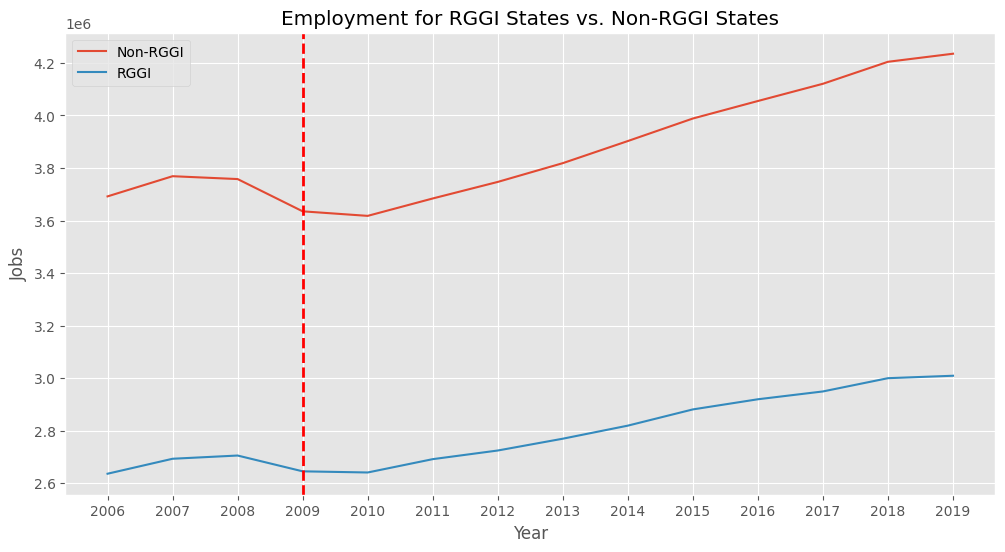

In [291]:
# Plot Employment for RGGI States vs. Non-RGGI States

new_df.iloc[:,:14].T.plot(figsize=(12,6))
plt.title('Employment for RGGI States vs. Non-RGGI States')
plt.xlabel('Year')
plt.ylabel('Jobs')
plt.xticks(range(2006,2020))
plt.axvline(x=2009, color='red', linestyle='--', linewidth=2)
plt.legend(['Non-RGGI', 'RGGI'])
plt.show()

In [292]:
NumJobs = Employment.copy()

NumJobs['Job_Change_AL'] = NumJobs['AL_Employment'].diff()
NumJobs['Job_Change_AK'] = NumJobs['AK_Employment'].diff()
NumJobs['Job_Change_AZ'] = NumJobs['AZ_Employment'].diff()
NumJobs['Job_Change_AR'] = NumJobs['AR_Employment'].diff()
NumJobs['Job_Change_CA'] = NumJobs['CA_Employment'].diff()
NumJobs['Job_Change_CO'] = NumJobs['CO_Employment'].diff()
NumJobs['Job_Change_CT'] = NumJobs['CT_Employment'].diff()
NumJobs['Job_Change_DE'] = NumJobs['DE_Employment'].diff()
NumJobs['Job_Change_FL'] = NumJobs['FL_Employment'].diff()
NumJobs['Job_Change_GA'] = NumJobs['GA_Employment'].diff()
NumJobs['Job_Change_HI'] = NumJobs['HI_Employment'].diff()
NumJobs['Job_Change_ID'] = NumJobs['ID_Employment'].diff()
NumJobs['Job_Change_IL'] = NumJobs['IL_Employment'].diff()
NumJobs['Job_Change_IN'] = NumJobs['IN_Employment'].diff()
NumJobs['Job_Change_IA'] = NumJobs['IA_Employment'].diff()
NumJobs['Job_Change_KS'] = NumJobs['KS_Employment'].diff()
NumJobs['Job_Change_KY'] = NumJobs['KY_Employment'].diff()
NumJobs['Job_Change_LA'] = NumJobs['LA_Employment'].diff()
NumJobs['Job_Change_ME'] = NumJobs['ME_Employment'].diff()
NumJobs['Job_Change_MD'] = NumJobs['MD_Employment'].diff()
NumJobs['Job_Change_MA'] = NumJobs['MA_Employment'].diff()
NumJobs['Job_Change_MI'] = NumJobs['MI_Employment'].diff()
NumJobs['Job_Change_MN'] = NumJobs['MN_Employment'].diff()
NumJobs['Job_Change_MS'] = NumJobs['MS_Employment'].diff()
NumJobs['Job_Change_MO'] = NumJobs['MO_Employment'].diff()
NumJobs['Job_Change_MT'] = NumJobs['MT_Employment'].diff()
NumJobs['Job_Change_NE'] = NumJobs['NE_Employment'].diff()
NumJobs['Job_Change_NV'] = NumJobs['NV_Employment'].diff()
NumJobs['Job_Change_NH'] = NumJobs['NH_Employment'].diff()
NumJobs['Job_Change_NJ'] = NumJobs['NJ_Employment'].diff()
NumJobs['Job_Change_NM'] = NumJobs['NM_Employment'].diff()
NumJobs['Job_Change_NY'] = NumJobs['NY_Employment'].diff()
NumJobs['Job_Change_NC'] = NumJobs['NC_Employment'].diff()
NumJobs['Job_Change_ND'] = NumJobs['ND_Employment'].diff()
NumJobs['Job_Change_OH'] = NumJobs['OH_Employment'].diff()
NumJobs['Job_Change_OR'] = NumJobs['OR_Employment'].diff()
NumJobs['Job_Change_OK'] = NumJobs['OK_Employment'].diff()
NumJobs['Job_Change_PA'] = NumJobs['PA_Employment'].diff()
NumJobs['Job_Change_RI'] = NumJobs['RI_Employment'].diff()
NumJobs['Job_Change_SC'] = NumJobs['SC_Employment'].diff()
NumJobs['Job_Change_SD'] = NumJobs['SD_Employment'].diff()
NumJobs['Job_Change_TN'] = NumJobs['TN_Employment'].diff()
NumJobs['Job_Change_TX'] = NumJobs['TX_Employment'].diff()
NumJobs['Job_Change_UT'] = NumJobs['UT_Employment'].diff()
NumJobs['Job_Change_VT'] = NumJobs['VT_Employment'].diff()
NumJobs['Job_Change_VA'] = NumJobs['VA_Employment'].diff()
NumJobs['Job_Change_WA'] = NumJobs['WA_Employment'].diff()
NumJobs['Job_Change_WV'] = NumJobs['WV_Employment'].diff()
NumJobs['Job_Change_WI'] = NumJobs['WI_Employment'].diff()
NumJobs['Job_Change_WY'] = NumJobs['WY_Employment'].diff()

In [293]:
NumJobs.head()

AL_Employment  AK_Employment  AZ_Employment  AR_Employment  \
2006        2545547         431321        3375196        1567665   
2007        2604108         439844        3465065        1582826   
2008        2582600         443602        3402806        1579250   
2009        2479511         442505        3228516        1542904   
2010        2460305         443940        3181563        1541250   

      CA_Employment  CO_Employment  CT_Employment  DE_Employment  \
2006       20505244        3109365        2202093         537096   
2007       20888508        3217965        2245723         544935   
2008       20654365        3251120        2256077         544865   
2009       19837727        3164474        2196171         525596   
2010       19642544        3143662        2171940         522361   

      FL_Employment  GA_Employment  ...  Job_Change_SD  Job_Change_TN  \
2006       10383831        5358151  ...            NaN            NaN   
2007       10531299        5490802  ...        13249.0        58897.0   
2008       10269510        5451004  ...         9082.0       -25342.0   
2009        9841868        5247101  ...        -4557.0      -153245.0   
2010        9805140        5211443  ...         1666.0        -8056.0   

      Job_Change_TX  Job_Change_UT  Job_Change_VT  Job_Change_VA  \
2006            NaN            NaN            NaN            NaN   
2007       514810.0        83656.0         4045.0        87544.0   
2008       357692.0        11766.0         -766.0         1076.0   
2009      -163125.0       -54149.0       -10067.0      -112305.0   
2010        59724.0       -13193.0         -878.0       -14892.0   

      Job_Change_WA  Job_Change_WV  Job_Change_WI  Job_Change_WY  
2006            NaN            NaN            NaN            NaN  
2007       126648.0        12730.0        38320.0        18132.0  
2008        30005.0         2733.0       -12510.0        10526.0  
2009      -139248.0       -19309.0      -128278.0       -11499.0  
2010       -44201.0          443.0       -18169.0        -2415.0  

[5 rows x 100 columns]

In [294]:
NumJobs = NumJobs.iloc[:,50:]

In [295]:
NumJobs.head()

Job_Change_AL  Job_Change_AK  Job_Change_AZ  Job_Change_AR  \
2006            NaN            NaN            NaN            NaN   
2007        58561.0         8523.0        89869.0        15161.0   
2008       -21508.0         3758.0       -62259.0        -3576.0   
2009      -103089.0        -1097.0      -174290.0       -36346.0   
2010       -19206.0         1435.0       -46953.0        -1654.0   

      Job_Change_CA  Job_Change_CO  Job_Change_CT  Job_Change_DE  \
2006            NaN            NaN            NaN            NaN   
2007       383264.0       108600.0        43630.0         7839.0   
2008      -234143.0        33155.0        10354.0          -70.0   
2009      -816638.0       -86646.0       -59906.0       -19269.0   
2010      -195183.0       -20812.0       -24231.0        -3235.0   

      Job_Change_FL  Job_Change_GA  ...  Job_Change_SD  Job_Change_TN  \
2006            NaN            NaN  ...            NaN            NaN   
2007       147468.0       132651.0  ...        13249.0        58897.0   
2008      -261789.0       -39798.0  ...         9082.0       -25342.0   
2009      -427642.0      -203903.0  ...        -4557.0      -153245.0   
2010       -36728.0       -35658.0  ...         1666.0        -8056.0   

      Job_Change_TX  Job_Change_UT  Job_Change_VT  Job_Change_VA  \
2006            NaN            NaN            NaN            NaN   
2007       514810.0        83656.0         4045.0        87544.0   
2008       357692.0        11766.0         -766.0         1076.0   
2009      -163125.0       -54149.0       -10067.0      -112305.0   
2010        59724.0       -13193.0         -878.0       -14892.0   

      Job_Change_WA  Job_Change_WV  Job_Change_WI  Job_Change_WY  
2006            NaN            NaN            NaN            NaN  
2007       126648.0        12730.0        38320.0        18132.0  
2008        30005.0         2733.0       -12510.0        10526.0  
2009      -139248.0       -19309.0      -128278.0       -11499.0  
2010       -44201.0          443.0       -18169.0        -2415.0  

[5 rows x 50 columns]

In [304]:
# Population DF

Population = pd.merge(Alabama['AL_Population'], Alaska['AK_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Arizona['AZ_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Arkansas['AR_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, California['CA_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Colorado['CO_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Connecticut['CT_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Delaware['DE_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Florida['FL_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Georgia['GA_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Hawaii['HI_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Idaho['ID_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Illinois['IL_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Indiana['IN_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Iowa['IA_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Kansas['KS_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Kentucky['KY_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Louisiana['LA_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Maine['ME_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Maryland['MD_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Massachusetts['MA_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Michigan['MI_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Minnesota['MN_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Mississippi['MS_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Missouri['MO_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Montana['MT_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Nebraska['NE_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, NewJersey['NJ_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Nevada['NV_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, NewHampshire['NH_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, NewMexico['NM_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, NewYork['NY_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, NorthCarolina['NC_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, NorthDakota['ND_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Ohio['OH_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Oklahoma['OK_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Oregon['OR_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Pennsylvania['PA_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, RhodeIsland['RI_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, SouthCarolina['SC_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, SouthDakota['SD_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Tennessee['TN_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Texas['TX_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Utah['UT_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Vermont['VT_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Virginia['VA_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Washington['WA_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, WestVirginia['WV_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Wisconsin['WI_Population'], left_index=True, right_index=True)
Population = pd.merge(Population, Wyoming['WY_Population'], left_index=True, right_index=True)
Population

AL_Population  AK_Population  AZ_Population  AR_Population  \
2006        4628981         675302        6029141        2821761   
2007        4672840         680300        6167681        2848650   
2008        4718206         687455        6280362        2874554   
2009        4757938         698895        6343154        2896843   
2010        4787998         714014        6402024        2921561   
2011        4812138         722511        6446537        2938833   
2012        4839261         731106        6507351        2948887   
2013        4864399         738057        6563216        2954685   
2014        4886793         737638        6638196        2961191   
2015        4908162         739127        6714328        2970352   
2016        4930595         743410        6801591        2980602   
2017        4952202         741949        6879830        2990801   
2018        4976395         737717        6969944        2997271   
2019        5003418         734823        7070511        3004248   
2020        5031362         732923        7179943        3014195   
2021        5049846         734182        7264877        3028122   
2022        5074296         733583        7359197        3045637   

      CA_Population  CO_Population  CT_Population  DE_Population  \
2006       36021202        4720423        3517460         859268   
2007       36250311        4803868        3527270         871749   
2008       36604337        4889730        3545579         883874   
2009       36961229        4972195        3561807         891730   
2010       37322360        5047005        3580279         899762   
2011       37650514        5119188        3594193         908169   
2012       37970368        5188703        3605259         916572   
2013       38291358        5263512        3610314         925599   
2014       38636290        5342996        3614695         935160   
2015       38966055        5442196        3611995         944596   
2016       39223210        5529161        3607688         953030   
2017       39424071        5600169        3607615         961499   
2018       39535906        5677250        3611318         971072   
2019       39547996        5735934        3607159         981297   
2020       39501653        5784865        3597362         992114   
2021       39142991        5811297        3623355        1004807   
2022       39029342        5839926        3626205        1018396   

      FL_Population  GA_Population  ...  SD_Population  TN_Population  \
2006       18166990        9155813  ...         783033        6088766   
2007       18367842        9349988  ...         791623        6175727   
2008       18527305        9504843  ...         799124        6247411   
2009       18652644        9620846  ...         807067        6306019   
2010       18842884        9712576  ...         816078        6356320   
2011       19039100        9805488  ...         823160        6404344   
2012       19271885        9906963  ...         832800        6463111   
2013       19507621        9980513  ...         841206        6507640   
2014       19795405       10077700  ...         847634        6558710   
2015       20145580       10191467  ...         852134        6612901   
2016       20537931       10318225  ...         860650        6672356   
2017       20871785       10428498  ...         870163        6739437   
2018       21133562       10532566  ...         875300        6806545   
2019       21354519       10642947  ...         882507        6862378   
2020       21589602       10729828  ...         887799        6925619   
2021       21828069       10788029  ...         896164        6968351   
2022       22244823       10912876  ...         909824        7051339   

      TX_Population  UT_Population  VT_Population  VA_Population  \
2006       23359580        2525507         622892        7673725   
2007       23831983        2597746         623481        7751000   
2008       24309039        2663029   

In [299]:
Population.index

Index(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [300]:
NumJobs.index

Index(['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [306]:
numjobs_pop = pd.merge(NumJobs, Population, left_index=True, right_index=True)
numjobs_pop.shape

(17, 100)

In [308]:
numjobs_pop.head()

Job_Change_AL  Job_Change_AK  Job_Change_AZ  Job_Change_AR  \
2006            NaN            NaN            NaN            NaN   
2007        58561.0         8523.0        89869.0        15161.0   
2008       -21508.0         3758.0       -62259.0        -3576.0   
2009      -103089.0        -1097.0      -174290.0       -36346.0   
2010       -19206.0         1435.0       -46953.0        -1654.0   

      Job_Change_CA  Job_Change_CO  Job_Change_CT  Job_Change_DE  \
2006            NaN            NaN            NaN            NaN   
2007       383264.0       108600.0        43630.0         7839.0   
2008      -234143.0        33155.0        10354.0          -70.0   
2009      -816638.0       -86646.0       -59906.0       -19269.0   
2010      -195183.0       -20812.0       -24231.0        -3235.0   

      Job_Change_FL  Job_Change_GA  ...  SD_Population  TN_Population  \
2006            NaN            NaN  ...         783033        6088766   
2007       147468.0       132651.0  ...         791623        6175727   
2008      -261789.0       -39798.0  ...         799124        6247411   
2009      -427642.0      -203903.0  ...         807067        6306019   
2010       -36728.0       -35658.0  ...         816078        6356320   

      TX_Population  UT_Population  VT_Population  VA_Population  \
2006       23359580        2525507         622892        7673725   
2007       23831983        2597746         623481        7751000   
2008       24309039        2663029         624151        7833496   
2009       24801761        2723421         624817        7925937   
2010       25238863        2776094         626360        8025030   

      WA_Population  WV_Population  WI_Population  WY_Population  
2006        6370753        1827912        5577655         522667  
2007        6461587        1834052        5610775         534876  
2008        6562231        1840310        5640996         546043  
2009        6667426        1847775        5669264         559851  
2010        6743597        1854409        5691995         564405  

[5 rows x 100 columns]

In [312]:
numjobs_pop['JobsAdded_AL'] = numjobs_pop['Job_Change_AL']/numjobs_pop['AL_Population']
numjobs_pop['JobsAdded_AK'] = numjobs_pop['Job_Change_AK']/numjobs_pop['AK_Population']
numjobs_pop['JobsAdded_AZ'] = numjobs_pop['Job_Change_AZ']/numjobs_pop['AZ_Population']
numjobs_pop['JobsAdded_AR'] = numjobs_pop['Job_Change_AR']/numjobs_pop['AR_Population']
numjobs_pop['JobsAdded_CA'] = numjobs_pop['Job_Change_CA']/numjobs_pop['CA_Population']
numjobs_pop['JobsAdded_CO'] = numjobs_pop['Job_Change_CO']/numjobs_pop['CO_Population']
numjobs_pop['JobsAdded_CT'] = numjobs_pop['Job_Change_CT']/numjobs_pop['CT_Population']
numjobs_pop['JobsAdded_DE'] = numjobs_pop['Job_Change_DE']/numjobs_pop['DE_Population']
numjobs_pop['JobsAdded_FL'] = numjobs_pop['Job_Change_FL']/numjobs_pop['FL_Population']
numjobs_pop['JobsAdded_GA'] = numjobs_pop['Job_Change_GA']/numjobs_pop['GA_Population']
numjobs_pop['JobsAdded_HI'] = numjobs_pop['Job_Change_HI']/numjobs_pop['HI_Population']
numjobs_pop['JobsAdded_ID'] = numjobs_pop['Job_Change_ID']/numjobs_pop['ID_Population']
numjobs_pop['JobsAdded_IL'] = numjobs_pop['Job_Change_IL']/numjobs_pop['IL_Population']
numjobs_pop['JobsAdded_IN'] = numjobs_pop['Job_Change_IN']/numjobs_pop['IN_Population']
numjobs_pop['JobsAdded_IA'] = numjobs_pop['Job_Change_IA']/numjobs_pop['IA_Population']
numjobs_pop['JobsAdded_KS'] = numjobs_pop['Job_Change_KS']/numjobs_pop['KS_Population']
numjobs_pop['JobsAdded_KY'] = numjobs_pop['Job_Change_KY']/numjobs_pop['KY_Population']
numjobs_pop['JobsAdded_LA'] = numjobs_pop['Job_Change_LA']/numjobs_pop['LA_Population']
numjobs_pop['JobsAdded_ME'] = numjobs_pop['Job_Change_ME']/numjobs_pop['ME_Population']
numjobs_pop['JobsAdded_MD'] = numjobs_pop['Job_Change_MD']/numjobs_pop['MD_Population']
numjobs_pop['JobsAdded_MA'] = numjobs_pop['Job_Change_MA']/numjobs_pop['MA_Population']
numjobs_pop['JobsAdded_MI'] = numjobs_pop['Job_Change_MI']/numjobs_pop['MI_Population']
numjobs_pop['JobsAdded_MN'] = numjobs_pop['Job_Change_MN']/numjobs_pop['MN_Population']
numjobs_pop['JobsAdded_MS'] = numjobs_pop['Job_Change_MS']/numjobs_pop['MS_Population']
numjobs_pop['JobsAdded_MO'] = numjobs_pop['Job_Change_MO']/numjobs_pop['MO_Population']
numjobs_pop['JobsAdded_MT'] = numjobs_pop['Job_Change_MT']/numjobs_pop['MT_Population']
numjobs_pop['JobsAdded_NE'] = numjobs_pop['Job_Change_NE']/numjobs_pop['NE_Population']
numjobs_pop['JobsAdded_NV'] = numjobs_pop['Job_Change_NV']/numjobs_pop['NV_Population']
numjobs_pop['JobsAdded_NH'] = numjobs_pop['Job_Change_NH']/numjobs_pop['NH_Population']
numjobs_pop['JobsAdded_NJ'] = numjobs_pop['Job_Change_NJ']/numjobs_pop['NJ_Population']
numjobs_pop['JobsAdded_NM'] = numjobs_pop['Job_Change_NM']/numjobs_pop['NM_Population']
numjobs_pop['JobsAdded_NY'] = numjobs_pop['Job_Change_NY']/numjobs_pop['NY_Population']
numjobs_pop['JobsAdded_NC'] = numjobs_pop['Job_Change_NC']/numjobs_pop['NC_Population']
numjobs_pop['JobsAdded_ND'] = numjobs_pop['Job_Change_ND']/numjobs_pop['ND_Population']
numjobs_pop['JobsAdded_OH'] = numjobs_pop['Job_Change_OH']/numjobs_pop['OH_Population']
numjobs_pop['JobsAdded_OK'] = numjobs_pop['Job_Change_OK']/numjobs_pop['OK_Population']
numjobs_pop['JobsAdded_OR'] = numjobs_pop['Job_Change_OR']/numjobs_pop['OR_Population']
numjobs_pop['JobsAdded_PA'] = numjobs_pop['Job_Change_PA']/numjobs_pop['PA_Population']
numjobs_pop['JobsAdded_RI'] = numjobs_pop['Job_Change_RI']/numjobs_pop['RI_Population']
numjobs_pop['JobsAdded_SC'] = numjobs_pop['Job_Change_SC']/numjobs_pop['SC_Population']
numjobs_pop['JobsAdded_SD'] = numjobs_pop['Job_Change_SD']/numjobs_pop['SD_Population']
numjobs_pop['JobsAdded_TN'] = numjobs_pop['Job_Change_TN']/numjobs_pop['TN_Population']
numjobs_pop['JobsAdded_TX'] = numjobs_pop['Job_Change_TX']/numjobs_pop['TX_Population']
numjobs_pop['JobsAdded_UT'] = numjobs_pop['Job_Change_UT']/numjobs_pop['UT_Population']
numjobs_pop['JobsAdded_VT'] = numjobs_pop['Job_Change_VT']/numjobs_pop['VT_Population']
numjobs_pop['JobsAdded_VA'] = numjobs_pop['Job_Change_VA']/numjobs_pop['VA_Population']
numjobs_pop['JobsAdded_WA'] = numjobs_pop['Job_Change_WA']/numjobs_pop['WA_Population']
numjobs_pop['JobsAdded_WV'] = numjobs_pop['Job_Change_WV']/numjobs_pop['WV_Population']
numjobs_pop['JobsAdded_WI'] = numjobs_pop['Job_Change_WI']/numjobs_pop['WI_Population']
numjobs_pop['JobsAdded_WY'] = numjobs_pop['Job_Change_WY']/numjobs_pop['WY_Population']

/var/folders/45/gm9k9bkj35d021zp8j2qdzmw0000gn/T/ipykernel_84149/1005209512.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  numjobs_pop['JobsAdded_AK'] = numjobs_pop['Job_Change_AK']/numjobs_pop['AK_Population']
/var/folders/45/gm9k9bkj35d021zp8j2qdzmw0000gn/T/ipykernel_84149/1005209512.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  numjobs_pop['JobsAdded_AZ'] = numjobs_pop['Job_Change_AZ']/numjobs_pop['AZ_Population']
/var/folders/45/gm9k9bkj35d021zp8j2qdzmw0000gn/T/ipykernel_84149/1005209512.py:4: PerformanceWarning: 

In [296]:
NJT = NumJobs.T

In [297]:
NJT.head()

2006      2007      2008      2009      2010      2011  \
Job_Change_AL   NaN   58561.0  -21508.0 -103089.0  -19206.0   37669.0   
Job_Change_AK   NaN    8523.0    3758.0   -1097.0    1435.0    6480.0   
Job_Change_AZ   NaN   89869.0  -62259.0 -174290.0  -46953.0   57474.0   
Job_Change_AR   NaN   15161.0   -3576.0  -36346.0   -1654.0   20679.0   
Job_Change_CA   NaN  383264.0 -234143.0 -816638.0 -195183.0  343641.0   

                   2012      2013      2014      2015      2016      2017  \
Job_Change_AL    5682.0   19364.0   29236.0   35385.0   32120.0   29461.0   
Job_Change_AK    8862.0    1923.0     166.0     336.0   -4565.0   -1592.0   
Job_Change_AZ   56495.0   75569.0   77045.0   99501.0   97144.0   95956.0   
Job_Change_AR    3180.0    4249.0   18050.0   23391.0   18935.0   10169.0   
Job_Change_CA  680734.0  651778.0  678164.0  690314.0  490786.0  370913.0   

                   2018      2019       2020      2021       2022  
Job_Change_AL   43202.0   19662.0   -41081.0   98459.0   100467.0  
Job_Change_AK    -774.0     -33.0   -23903.0   12207.0    14640.0  
Job_Change_AZ  113994.0   75204.0    -9912.0  166769.0   200793.0  
Job_Change_AR   18309.0    5708.0   -24091.0   46615.0    69092.0  
Job_Change_CA  528592.0  147602.0 -1070977.0  780458.0  1366425.0

In [197]:
# Accurate RGGI: RGGI States (CT, DE, ME, MD, MA, NH, NY, RI, VT)

NJT['RGGI'] = RGGI_Status3

In [199]:
NJT.head(10)

2006      2007      2008      2009      2010      2011  \
Job_Change_AL   NaN   58561.0  -21508.0 -103089.0  -19206.0   37669.0   
Job_Change_AK   NaN    8523.0    3758.0   -1097.0    1435.0    6480.0   
Job_Change_AZ   NaN   89869.0  -62259.0 -174290.0  -46953.0   57474.0   
Job_Change_AR   NaN   15161.0   -3576.0  -36346.0   -1654.0   20679.0   
Job_Change_CA   NaN  383264.0 -234143.0 -816638.0 -195183.0  343641.0   
Job_Change_CO   NaN  108600.0   33155.0  -86646.0  -20812.0   60442.0   
Job_Change_CT   NaN   43630.0   10354.0  -59906.0  -24231.0   34313.0   
Job_Change_DE   NaN    7839.0     -70.0  -19269.0   -3235.0    7999.0   
Job_Change_FL   NaN  147468.0 -261789.0 -427642.0  -36728.0  231539.0   
Job_Change_GA   NaN  132651.0  -39798.0 -203903.0  -35658.0  114267.0   

                   2012      2013      2014      2015      2016      2017  \
Job_Change_AL    5682.0   19364.0   29236.0   35385.0   32120.0   29461.0   
Job_Change_AK    8862.0    1923.0     166.0     336.0   -4565.0   -1592.0   
Job_Change_AZ   56495.0   75569.0   77045.0   99501.0   97144.0   95956.0   
Job_Change_AR    3180.0    4249.0   18050.0   23391.0   18935.0   10169.0   
Job_Change_CA  680734.0  651778.0  678164.0  690314.0  490786.0  370913.0   
Job_Change_CO   58808.0   94244.0  110559.0  106538.0   92456.0   93999.0   
Job_Change_CT   16990.0   23262.0   19556.0   22083.0   13187.0   -1058.0   
Job_Change_DE    3893.0   10438.0   11758.0   12383.0    9773.0    6088.0   
Job_Change_FL  212355.0  290493.0  398007.0  429630.0  315109.0  416115.0   
Job_Change_GA   59024.0  112456.0  173945.0  161793.0  140836.0  154325.0   

                   2018      2019       2020      2021       2022  RGGI  
Job_Change_AL   43202.0   19662.0   -41081.0   98459.0   100467.0     0  
Job_Change_AK    -774.0     -33.0   -23903.0   12207.0    14640.0     0  
Job_Change_AZ  113994.0   75204.0    -9912.0  166769.0   200793.0     0  
Job_Change_AR   18309.0    5708.0   -24091.0   46615.0    69092.0     0  
Job_Change_CA  528592.0  147602.0 -1070977.0  780458.0  1366425.0     0  
Job_Change_CO   97273.0   36767.0   -73267.0  167426.0   199037.0     0  
Job_Change_CT   14192.0  -16555.0   -80478.0   72119.0   102395.0     1  
Job_Change_DE   12328.0    5745.0   -10640.0   28226.0    30872.0     1  
Job_Change_FL  457828.0  204939.0   -41563.0  738433.0   769227.0     0  
Job_Change_GA  159371.0  111529.0   -72342.0  313009.0   331805.0     0

In [200]:
# Groupby: Accurate RGGI Statuses (Only 9 States: CT, DE, ME, MA, MD, NH, NY, RI, VT)

new_df_njt = NJT.groupby(['RGGI']).mean()
new_df_njt

2006          2007          2008           2009          2010  \
RGGI                                                                  
0      NaN  76862.292683 -10897.024390 -122851.682927 -17281.073171   
1      NaN  56986.111111  12273.111111  -60144.444444  -4409.000000   

              2011          2012          2013          2014          2015  \
RGGI                                                                         
0     66230.487805  63029.073171  71459.463415  84188.585366  85790.853659   
1     50769.888889  32907.333333  44969.222222  49725.555556  61782.111111   

              2016          2017          2018          2019           2020  \
RGGI                                                                          
0     66653.170732  65614.024390  83711.219512  30700.878049 -117520.365854   
1     38636.444444  29775.333333  50496.000000   9263.444444 -164570.888889   

               2021           2022  
RGGI                                
0     160745.609756  204537.829268  
1      96808.555556  140980.888889

In [201]:
new_df_njt.columns = new_df_njt.columns.astype('int')

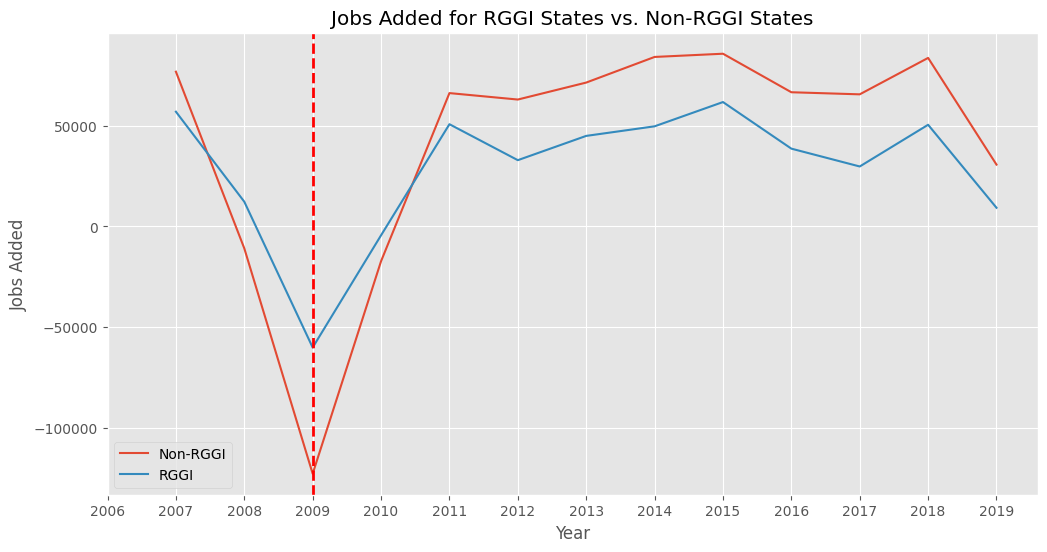

In [202]:
# Plot Employment PC for RGGI States vs. Non-RGGI States

new_df_njt.iloc[:,:14].T.plot(figsize=(12,6))
plt.title('Jobs Added for RGGI States vs. Non-RGGI States')
plt.xlabel('Year')
plt.ylabel('Jobs Added')
plt.xticks(range(2006,2020))
plt.axvline(x=2009, color='red', linestyle='--', linewidth=2)
plt.legend(['Non-RGGI', 'RGGI'])
plt.show()

In [322]:
numjobsperpop = numjobs_pop.iloc[:,100:]
numjobsperpop.head()

JobsAdded_AL  JobsAdded_AK  JobsAdded_AZ  JobsAdded_AR  JobsAdded_CA  \
2006           NaN           NaN           NaN           NaN           NaN   
2007      0.012532      0.012528      0.014571      0.005322      0.010573   
2008     -0.004559      0.005467     -0.009913     -0.001244     -0.006397   
2009     -0.021667     -0.001570     -0.027477     -0.012547     -0.022094   
2010     -0.004011      0.002010     -0.007334     -0.000566     -0.005230   

      JobsAdded_CO  JobsAdded_CT  JobsAdded_DE  JobsAdded_FL  JobsAdded_GA  \
2006           NaN           NaN           NaN           NaN           NaN   
2007      0.022607      0.012369      0.008992      0.008029      0.014187   
2008      0.006781      0.002920     -0.000079     -0.014130     -0.004187   
2009     -0.017426     -0.016819     -0.021609     -0.022927     -0.021194   
2010     -0.004124     -0.006768     -0.003595     -0.001949     -0.003671   

      ...  JobsAdded_SD  JobsAdded_TN  JobsAdded_TX  JobsAdded_UT  \
2006  ...           NaN           NaN           NaN           NaN   
2007  ...      0.016737      0.009537      0.021602      0.032203   
2008  ...      0.011365     -0.004056      0.014714      0.004418   
2009  ...     -0.005646     -0.024301     -0.006577     -0.019883   
2010  ...      0.002041     -0.001267      0.002366     -0.004752   

      JobsAdded_VT  JobsAdded_VA  JobsAdded_WA  JobsAdded_WV  JobsAdded_WI  \
2006           NaN           NaN           NaN           NaN           NaN   
2007      0.006488      0.011295      0.019600      0.006941      0.006830   
2008     -0.001227      0.000137      0.004572      0.001485     -0.002218   
2009     -0.016112     -0.014169     -0.020885     -0.010450     -0.022627   
2010     -0.001402     -0.001856     -0.006555      0.000239     -0.003192   

      JobsAdded_WY  
2006           NaN  
2007      0.033899  
2008      0.019277  
2009     -0.020539  
2010     -0.004279  

[5 rows x 50 columns]

In [323]:
numjobsperpopT = numjobsperpop.T
numjobsperpopT['RGGI'] = RGGI_Status3
numjobsperpopT.head()

2006      2007      2008      2009      2010      2011  \
JobsAdded_AL   NaN  0.012532 -0.004559 -0.021667 -0.004011  0.007828   
JobsAdded_AK   NaN  0.012528  0.005467 -0.001570  0.002010  0.008969   
JobsAdded_AZ   NaN  0.014571 -0.009913 -0.027477 -0.007334  0.008915   
JobsAdded_AR   NaN  0.005322 -0.001244 -0.012547 -0.000566  0.007036   
JobsAdded_CA   NaN  0.010573 -0.006397 -0.022094 -0.005230  0.009127   

                  2012      2013      2014      2015      2016      2017  \
JobsAdded_AL  0.001174  0.003981  0.005983  0.007209  0.006514  0.005949   
JobsAdded_AK  0.012121  0.002605  0.000225  0.000455 -0.006141 -0.002146   
JobsAdded_AZ  0.008682  0.011514  0.011606  0.014819  0.014283  0.013947   
JobsAdded_AR  0.001078  0.001438  0.006096  0.007875  0.006353  0.003400   
JobsAdded_CA  0.017928  0.017022  0.017553  0.017716  0.012513  0.009408   

                  2018      2019      2020      2021      2022  RGGI  
JobsAdded_AL  0.008681  0.003930 -0.008165  0.019497  0.019799     0  
JobsAdded_AK -0.001049 -0.000045 -0.032613  0.016627  0.019957     0  
JobsAdded_AZ  0.016355  0.010636 -0.001381  0.022956  0.027285     0  
JobsAdded_AR  0.006109  0.001900 -0.007993  0.015394  0.022686     0  
JobsAdded_CA  0.013370  0.003732 -0.027112  0.019939  0.035010     0

In [324]:
# Groupby: Accurate RGGI Statuses (Only 9 States: CT, DE, ME, MA, MD, NH, NY, RI, VT)

numjobsperpop_GB = numjobsperpopT.groupby(['RGGI']).mean()
numjobsperpop_GB

2006      2007      2008      2009      2010     2011      2012  \
RGGI                                                                    
0      NaN  0.013600  0.000158 -0.017843 -0.002405  0.00960  0.008746   
1      NaN  0.010162 -0.000739 -0.016498 -0.003031  0.00749  0.005579   

          2013      2014      2015      2016      2017      2018      2019  \
RGGI                                                                         
0     0.009151  0.010558  0.009593  0.006822  0.007280  0.010102  0.003073   
1     0.008653  0.008923  0.011456  0.007456  0.005485  0.008462 -0.000053   

          2020      2021      2022  
RGGI                                
0    -0.016856  0.021640  0.026016  
1    -0.027738  0.022829  0.027070

In [325]:
numjobsperpop_GB.columns = numjobsperpop_GB.columns.astype('int')

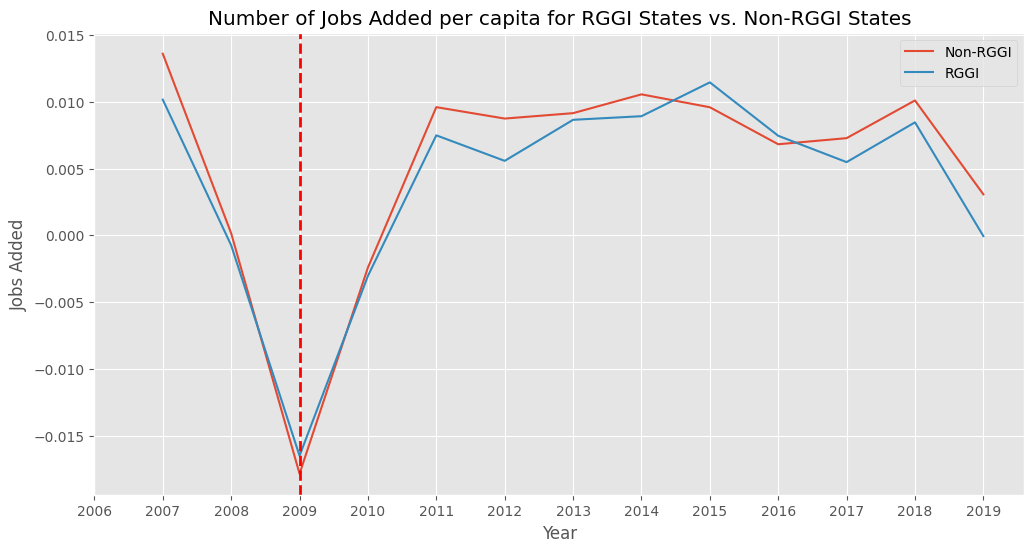

In [326]:
numjobsperpop_GB.iloc[:,1:14].T.plot(figsize=(12,6))
plt.title('Number of Jobs Added per capita for RGGI States vs. Non-RGGI States')
plt.xlabel('Year')
plt.ylabel('Jobs Added')
plt.xticks(range(2006,2020))
plt.axvline(x=2009, color='red', linestyle='--', linewidth=2)
plt.legend(['Non-RGGI', 'RGGI'])
plt.show()

In [327]:
numjobsperpopwithus = numjobsperpop.copy()
numjobsperpopwithus['UnitedStates_AvgNumJobs'] = numjobsperpopwithus.mean(axis=1)
numjobsperpopwithus.head()

JobsAdded_AL  JobsAdded_AK  JobsAdded_AZ  JobsAdded_AR  JobsAdded_CA  \
2006           NaN           NaN           NaN           NaN           NaN   
2007      0.012532      0.012528      0.014571      0.005322      0.010573   
2008     -0.004559      0.005467     -0.009913     -0.001244     -0.006397   
2009     -0.021667     -0.001570     -0.027477     -0.012547     -0.022094   
2010     -0.004011      0.002010     -0.007334     -0.000566     -0.005230   

      JobsAdded_CO  JobsAdded_CT  JobsAdded_DE  JobsAdded_FL  JobsAdded_GA  \
2006           NaN           NaN           NaN           NaN           NaN   
2007      0.022607      0.012369      0.008992      0.008029      0.014187   
2008      0.006781      0.002920     -0.000079     -0.014130     -0.004187   
2009     -0.017426     -0.016819     -0.021609     -0.022927     -0.021194   
2010     -0.004124     -0.006768     -0.003595     -0.001949     -0.003671   

      ...  JobsAdded_TN  JobsAdded_TX  JobsAdded_UT  JobsAdded_VT  \
2006  ...           NaN           NaN           NaN           NaN   
2007  ...      0.009537      0.021602      0.032203      0.006488   
2008  ...     -0.004056      0.014714      0.004418     -0.001227   
2009  ...     -0.024301     -0.006577     -0.019883     -0.016112   
2010  ...     -0.001267      0.002366     -0.004752     -0.001402   

      JobsAdded_VA  JobsAdded_WA  JobsAdded_WV  JobsAdded_WI  JobsAdded_WY  \
2006           NaN           NaN           NaN           NaN           NaN   
2007      0.011295      0.019600      0.006941      0.006830      0.033899   
2008      0.000137      0.004572      0.001485     -0.002218      0.019277   
2009     -0.014169     -0.020885     -0.010450     -0.022627     -0.020539   
2010     -0.001856     -0.006555      0.000239     -0.003192     -0.004279   

      UnitedStates_AvgNumJobs  
2006                      NaN  
2007                 0.012981  
2008                -0.000004  
2009                -0.017601  
2010                -0.002518  

[5 rows x 51 columns]

In [331]:
numjobsperpopwithusT = numjobsperpopwithus.T
numjobsperpopwithusT.tail()

2006      2007      2008      2009      2010  \
JobsAdded_WA              NaN  0.019600  0.004572 -0.020885 -0.006555   
JobsAdded_WV              NaN  0.006941  0.001485 -0.010450  0.000239   
JobsAdded_WI              NaN  0.006830 -0.002218 -0.022627 -0.003192   
JobsAdded_WY              NaN  0.033899  0.019277 -0.020539 -0.004279   
UnitedStates_AvgNumJobs   NaN  0.012981 -0.000004 -0.017601 -0.002518   

                             2011      2012      2013      2014      2015  \
JobsAdded_WA             0.006273  0.013738  0.011848  0.014519  0.014594   
JobsAdded_WV             0.005142  0.005325 -0.002537 -0.001386 -0.004012   
JobsAdded_WI             0.008402  0.004355  0.006923  0.008090  0.006650   
JobsAdded_WY             0.009288  0.011093  0.006517  0.010140 -0.000610   
UnitedStates_AvgNumJobs  0.009220  0.008176  0.009061  0.010264  0.009928   

                             2016      2017      2018      2019      2020  \
JobsAdded_WA             0.015659  0.015919  0.013986  0.007132 -0.020272   
JobsAdded_WV            -0.007659 -0.000761  0.005116 -0.009137 -0.022758   
JobsAdded_WI             0.005722  0.003620  0.007209 -0.000461 -0.023131   
JobsAdded_WY            -0.013576  0.001430  0.009783  0.006000 -0.010980   
UnitedStates_AvgNumJobs  0.006936  0.006957  0.009807  0.002510 -0.018815   

                             2021      2022  
JobsAdded_WA             0.018150  0.030747  
JobsAdded_WV             0.013243  0.014703  
JobsAdded_WI             0.017512  0.022776  
JobsAdded_WY             0.032318  0.027753  
UnitedStates_AvgNumJobs  0.021854  0.026206

### b. Employment for RGGI State vs. US

#### i. Connecticut

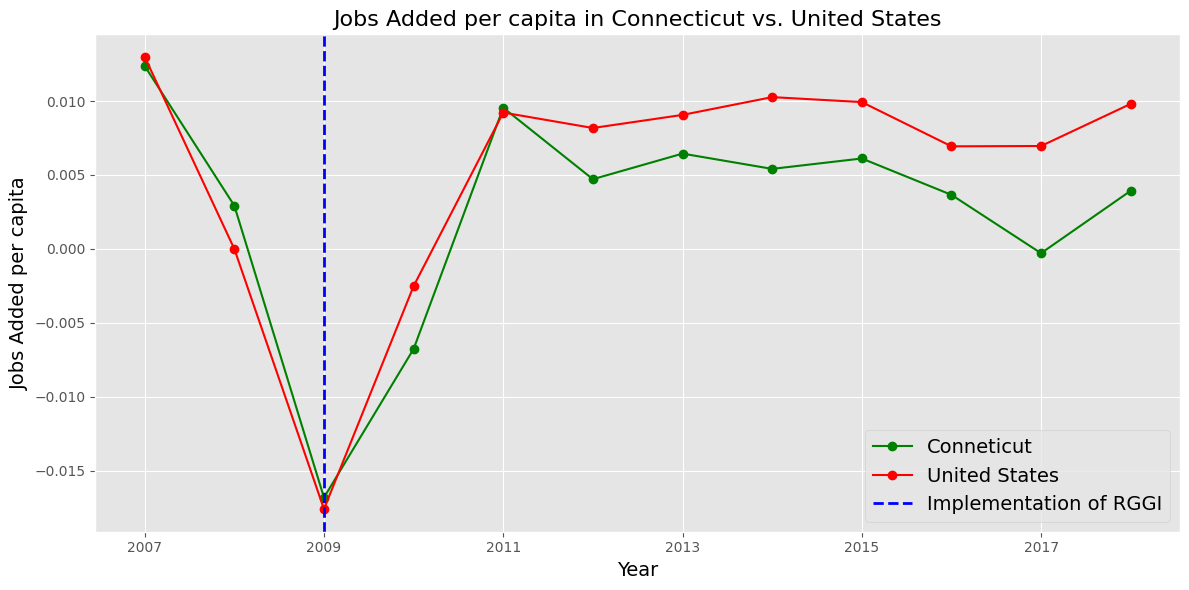

In [338]:
plt.figure(figsize=(12, 6))

numjobsperpopwithusT.loc['JobsAdded_CT','2007':'2018'].plot(kind='line', marker='o', color='green')
numjobsperpopwithusT.loc['UnitedStates_AvgNumJobs','2007':'2018'].plot(kind='line', marker='o', color='red')

plt.ylabel('Jobs Added per capita', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=2, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Conneticut', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('Jobs Added per capita in Connecticut vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### ii. Delaware

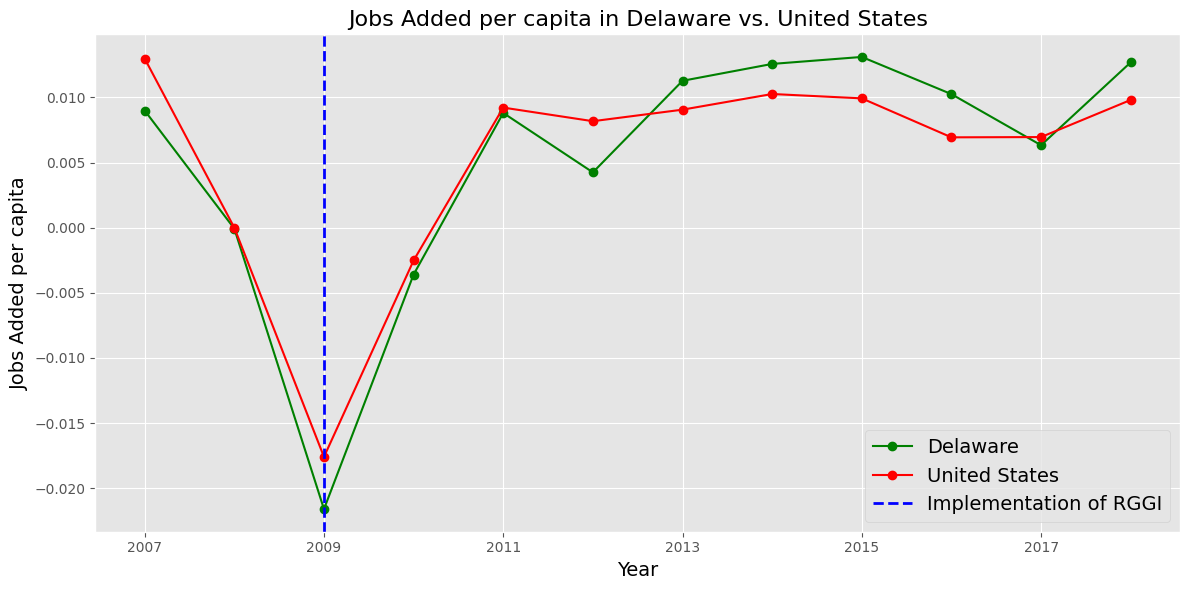

In [337]:
plt.figure(figsize=(12, 6))

numjobsperpopwithusT.loc['JobsAdded_DE','2007':'2018'].plot(kind='line', marker='o', color='green')
numjobsperpopwithusT.loc['UnitedStates_AvgNumJobs','2007':'2018'].plot(kind='line', marker='o', color='red')

plt.ylabel('Jobs Added per capita', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=2, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Delaware', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('Jobs Added per capita in Delaware vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### iii. Maine

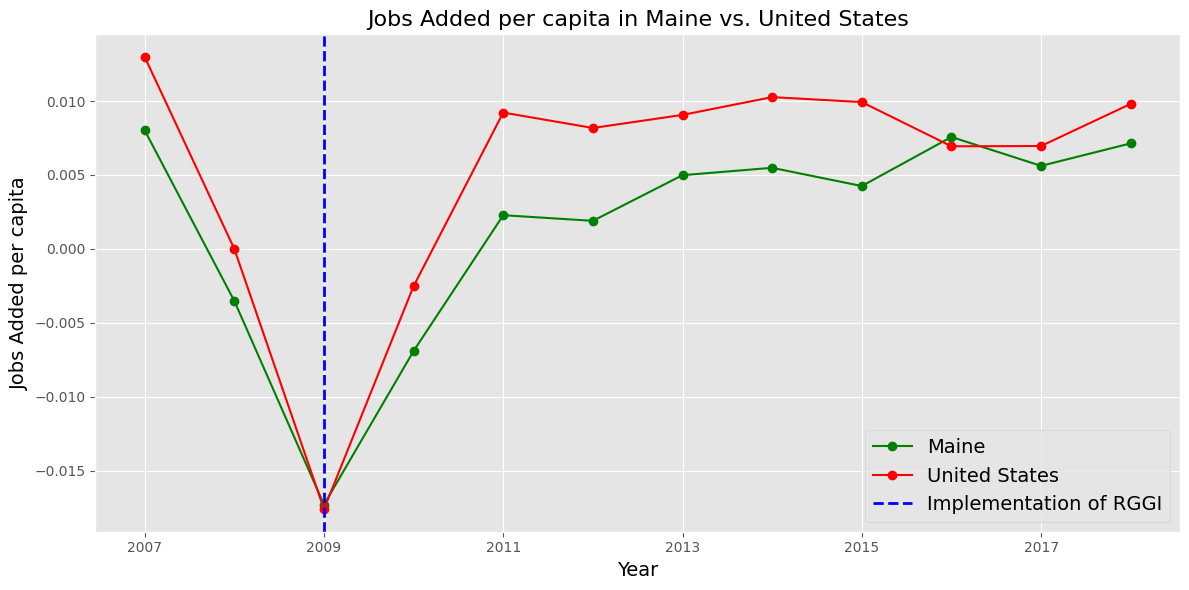

In [339]:
plt.figure(figsize=(12, 6))

numjobsperpopwithusT.loc['JobsAdded_ME','2007':'2018'].plot(kind='line', marker='o', color='green')
numjobsperpopwithusT.loc['UnitedStates_AvgNumJobs','2007':'2018'].plot(kind='line', marker='o', color='red')

plt.ylabel('Jobs Added per capita', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=2, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Maine', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('Jobs Added per capita in Maine vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### iv. Massachusetts

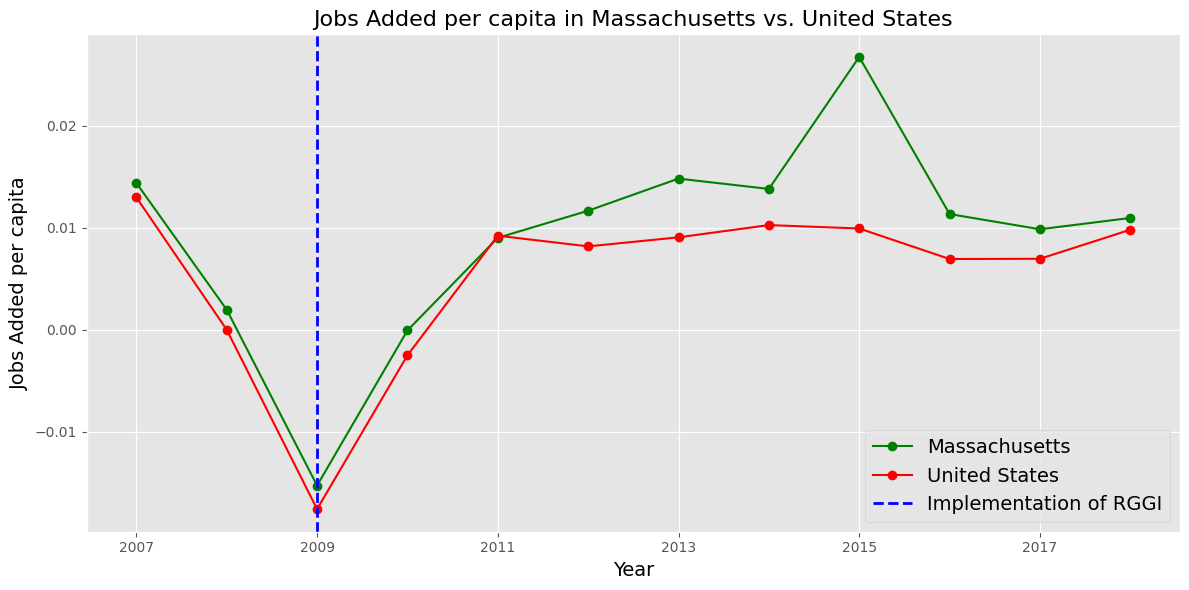

In [340]:
plt.figure(figsize=(12, 6))

numjobsperpopwithusT.loc['JobsAdded_MA','2007':'2018'].plot(kind='line', marker='o', color='green')
numjobsperpopwithusT.loc['UnitedStates_AvgNumJobs','2007':'2018'].plot(kind='line', marker='o', color='red')

plt.ylabel('Jobs Added per capita', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=2, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Massachusetts', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('Jobs Added per capita in Massachusetts vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### v. Maryland

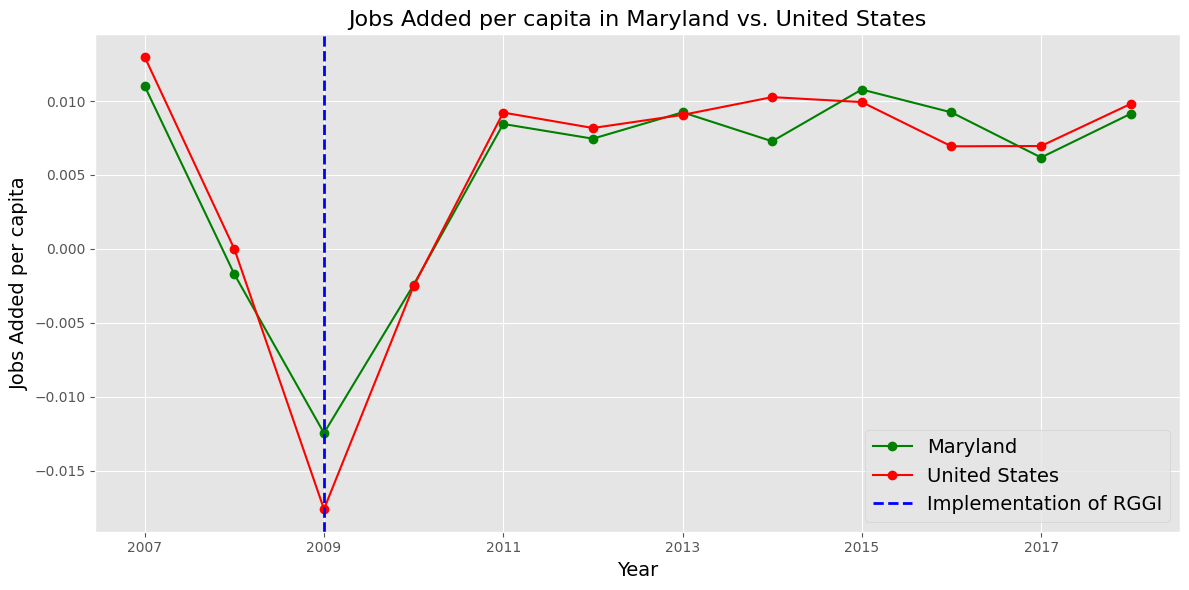

In [341]:
plt.figure(figsize=(12, 6))

numjobsperpopwithusT.loc['JobsAdded_MD','2007':'2018'].plot(kind='line', marker='o', color='green')
numjobsperpopwithusT.loc['UnitedStates_AvgNumJobs','2007':'2018'].plot(kind='line', marker='o', color='red')

plt.ylabel('Jobs Added per capita', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=2, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Maryland', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('Jobs Added per capita in Maryland vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### vi. New Hampshire

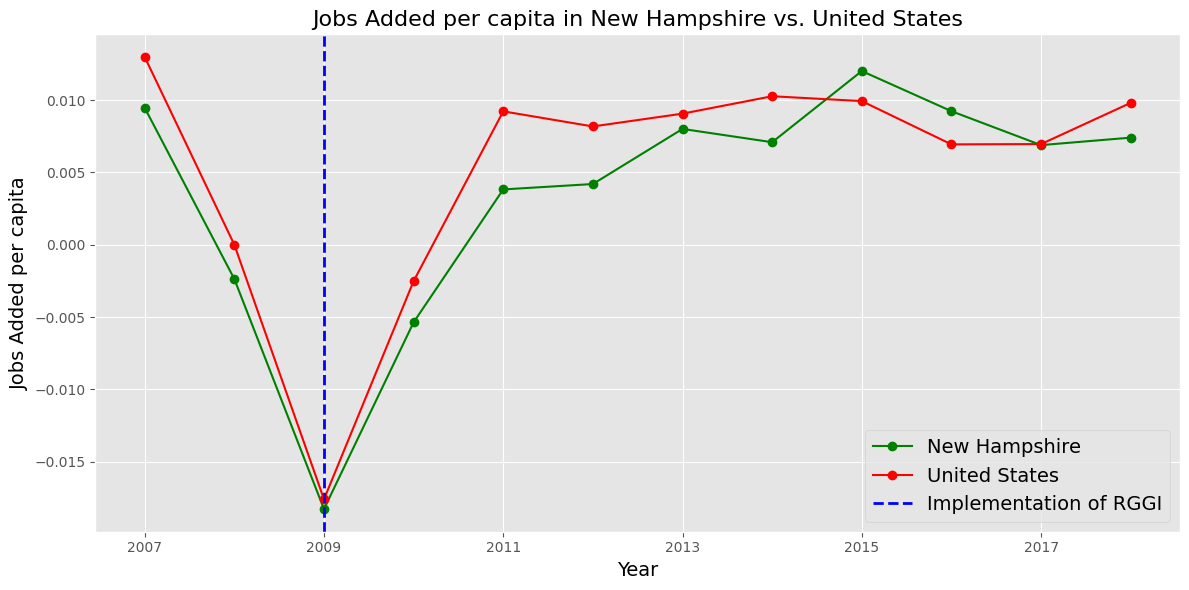

In [342]:
plt.figure(figsize=(12, 6))

numjobsperpopwithusT.loc['JobsAdded_NH','2007':'2018'].plot(kind='line', marker='o', color='green')
numjobsperpopwithusT.loc['UnitedStates_AvgNumJobs','2007':'2018'].plot(kind='line', marker='o', color='red')

plt.ylabel('Jobs Added per capita', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=2, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['New Hampshire', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('Jobs Added per capita in New Hampshire vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### vii. New Jersey

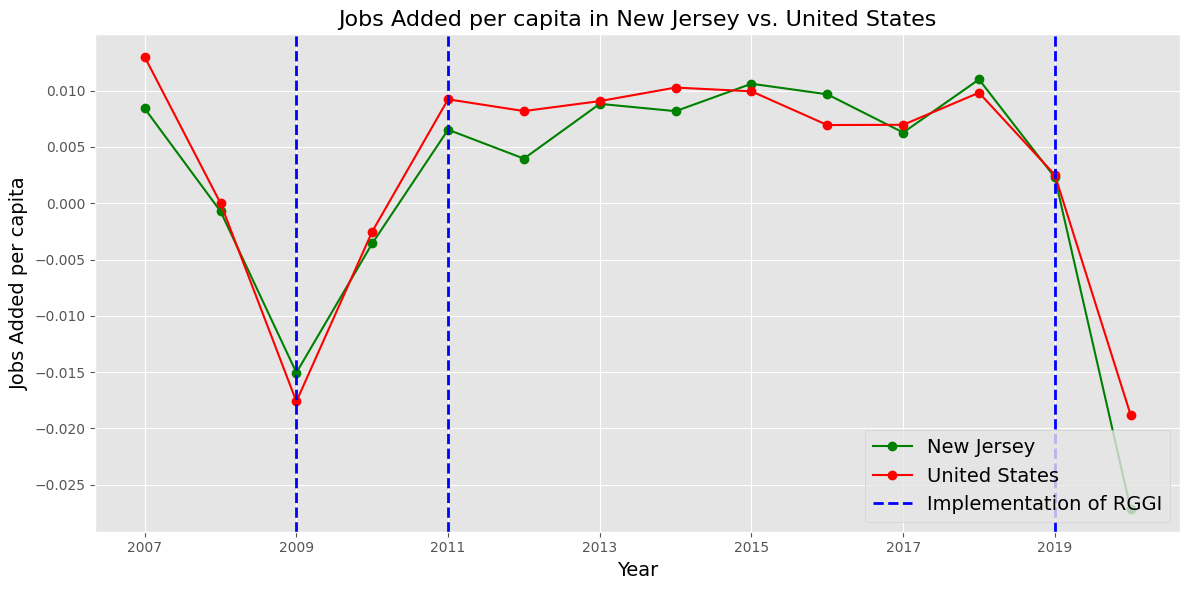

In [344]:
plt.figure(figsize=(12, 6))

numjobsperpopwithusT.loc['JobsAdded_NJ','2007':'2020'].plot(kind='line', marker='o', color='green')
numjobsperpopwithusT.loc['UnitedStates_AvgNumJobs','2007':'2020'].plot(kind='line', marker='o', color='red')

plt.ylabel('Jobs Added per capita', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=2, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
plt.axvline(x=4, color='blue', linestyle='--', linewidth=2, label='Left RGGI')
plt.axvline(x=12, color='blue', linestyle='--', linewidth=2, label='Rejoined RGGI')
legend = plt.legend(['New Jersey', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('Jobs Added per capita in New Jersey vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### viii. New York

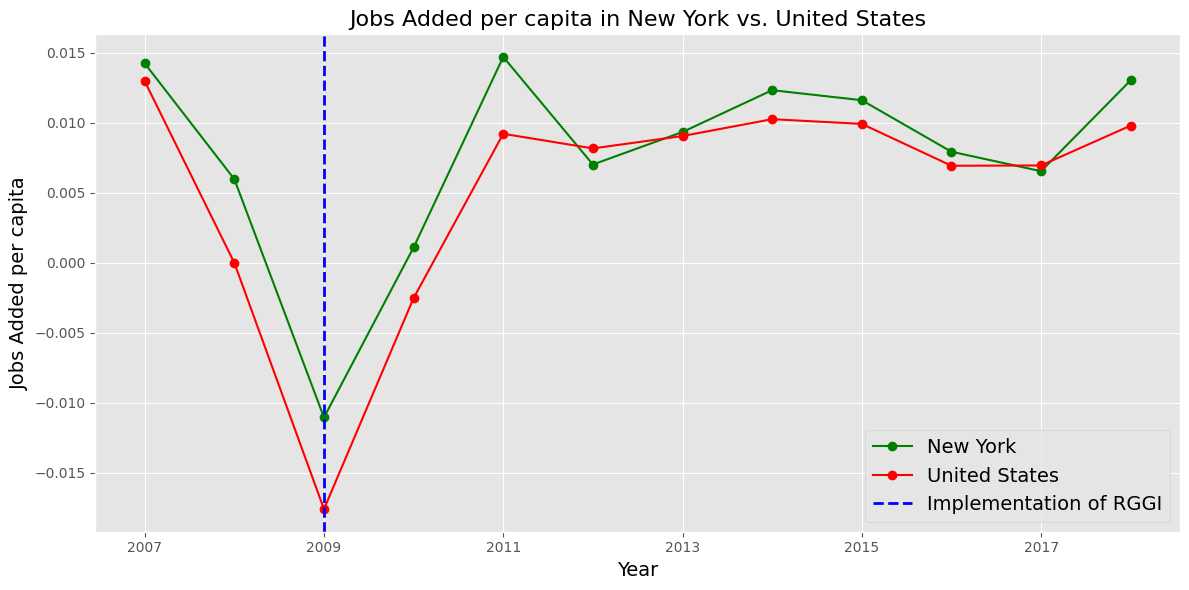

In [345]:
plt.figure(figsize=(12, 6))

numjobsperpopwithusT.loc['JobsAdded_NY','2007':'2018'].plot(kind='line', marker='o', color='green')
numjobsperpopwithusT.loc['UnitedStates_AvgNumJobs','2007':'2018'].plot(kind='line', marker='o', color='red')

plt.ylabel('Jobs Added per capita', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=2, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['New York', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('Jobs Added per capita in New York vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### ix. Rhode Island

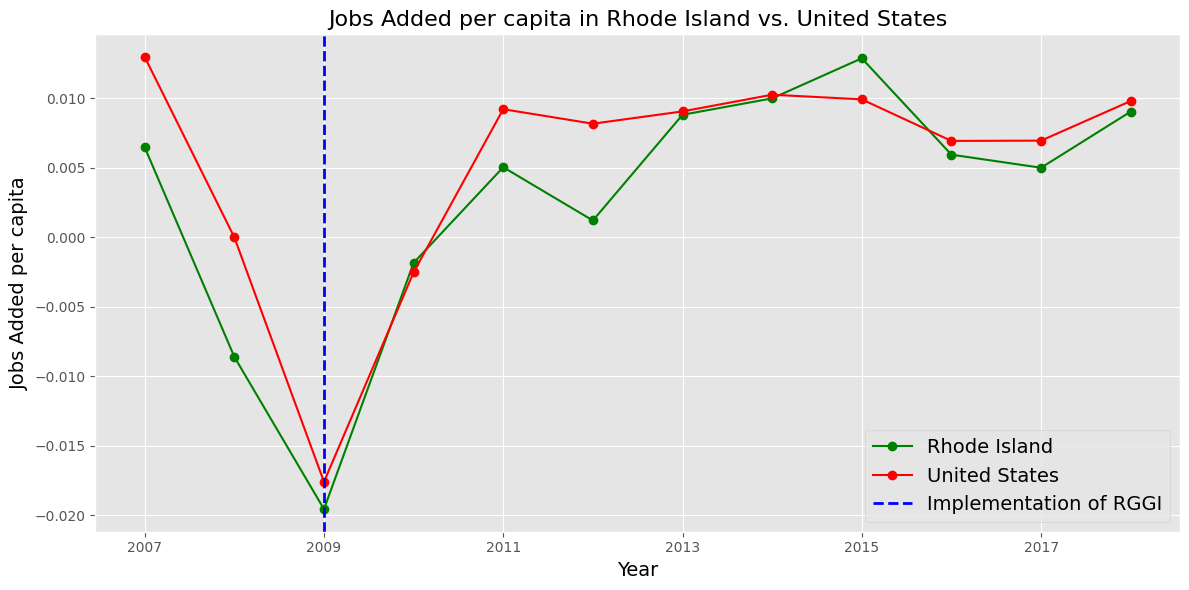

In [346]:
plt.figure(figsize=(12, 6))

numjobsperpopwithusT.loc['JobsAdded_RI','2007':'2018'].plot(kind='line', marker='o', color='green')
numjobsperpopwithusT.loc['UnitedStates_AvgNumJobs','2007':'2018'].plot(kind='line', marker='o', color='red')

plt.ylabel('Jobs Added per capita', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=2, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Rhode Island', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('Jobs Added per capita in Rhode Island vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### x. Vermont

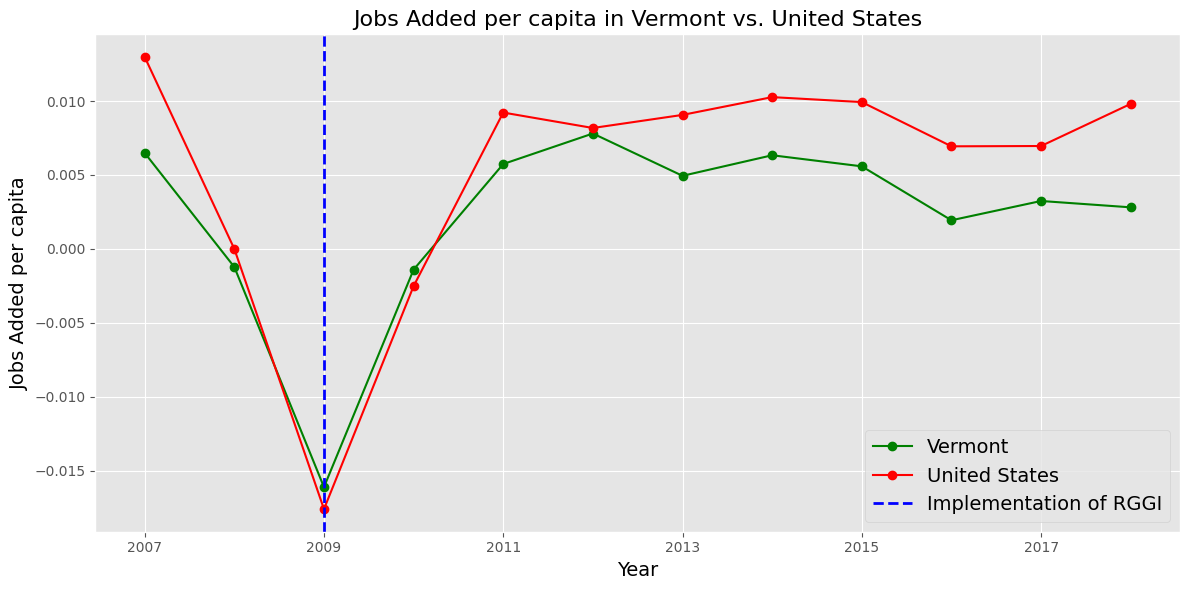

In [347]:
plt.figure(figsize=(12, 6))

numjobsperpopwithusT.loc['JobsAdded_VT','2007':'2018'].plot(kind='line', marker='o', color='green')
numjobsperpopwithusT.loc['UnitedStates_AvgNumJobs','2007':'2018'].plot(kind='line', marker='o', color='red')

plt.ylabel('Jobs Added per capita', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=2, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Vermont', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('Jobs Added per capita in Vermont vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### xi. Virginia

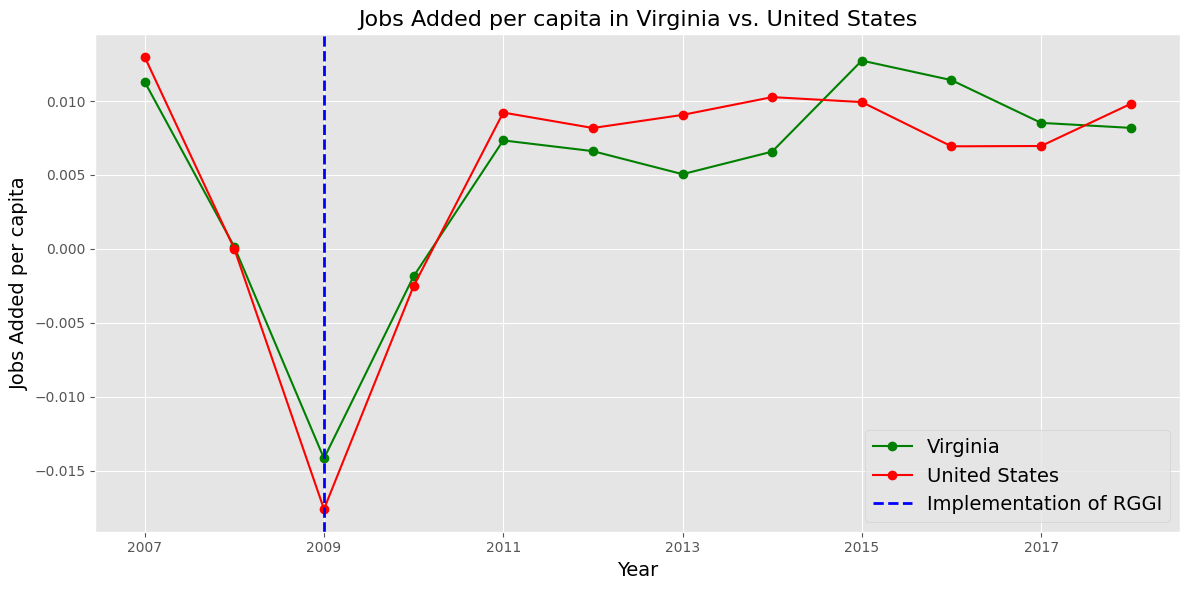

In [348]:
plt.figure(figsize=(12, 6))

numjobsperpopwithusT.loc['JobsAdded_VA','2007':'2018'].plot(kind='line', marker='o', color='green')
numjobsperpopwithusT.loc['UnitedStates_AvgNumJobs','2007':'2018'].plot(kind='line', marker='o', color='red')

plt.ylabel('Jobs Added per capita', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=2, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Virginia', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('Jobs Added per capita in Virginia vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

### c. Regression Employment~RGGI Indicator

In [349]:
numjobsperpopT_index = numjobsperpopT.copy()
numjobsperpopT_index['State'] = numjobsperpopT_index.index
numjobsperpopT_index = numjobsperpopT_index.reset_index()
numjobsperpopT_index.columns

Index(['index', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'RGGI', 'State'],
      dtype='object')

In [351]:
numjobsperpopT_index['RGGI'] = RGGI_Status3

In [352]:
numjobsperpopT_index.head()

index  2006      2007      2008      2009      2010      2011  \
0  JobsAdded_AL   NaN  0.012532 -0.004559 -0.021667 -0.004011  0.007828   
1  JobsAdded_AK   NaN  0.012528  0.005467 -0.001570  0.002010  0.008969   
2  JobsAdded_AZ   NaN  0.014571 -0.009913 -0.027477 -0.007334  0.008915   
3  JobsAdded_AR   NaN  0.005322 -0.001244 -0.012547 -0.000566  0.007036   
4  JobsAdded_CA   NaN  0.010573 -0.006397 -0.022094 -0.005230  0.009127   

       2012      2013      2014      2015      2016      2017      2018  \
0  0.001174  0.003981  0.005983  0.007209  0.006514  0.005949  0.008681   
1  0.012121  0.002605  0.000225  0.000455 -0.006141 -0.002146 -0.001049   
2  0.008682  0.011514  0.011606  0.014819  0.014283  0.013947  0.016355   
3  0.001078  0.001438  0.006096  0.007875  0.006353  0.003400  0.006109   
4  0.017928  0.017022  0.017553  0.017716  0.012513  0.009408  0.013370   

       2019      2020      2021      2022  RGGI         State  
0  0.003930 -0.008165  0.019497  0.019799     0  JobsAdded_AL  
1 -0.000045 -0.032613  0.016627  0.019957     0  JobsAdded_AK  
2  0.010636 -0.001381  0.022956  0.027285     0  JobsAdded_AZ  
3  0.001900 -0.007993  0.015394  0.022686     0  JobsAdded_AR  
4  0.003732 -0.027112  0.019939  0.035010     0  JobsAdded_CA

In [357]:
selected_columns_njp = numjobsperpopT_index.loc[:, ['State', '2011', '2008','RGGI']]
selected_columns_njp.columns = ['State', 'NJP2011', 'NJP2008', 'RGGI']
selected_columns_njp.head()

State   NJP2011   NJP2008  RGGI
0  JobsAdded_AL  0.007828 -0.004559     0
1  JobsAdded_AK  0.008969  0.005467     0
2  JobsAdded_AZ  0.008915 -0.009913     0
3  JobsAdded_AR  0.007036 -0.001244     0
4  JobsAdded_CA  0.009127 -0.006397     0

In [359]:
# Regression 

lm_njp = smf.ols(formula='NJP2011~RGGI+NJP2008', data = selected_columns_njp).fit()
print(lm_njp.summary())

                            OLS Regression Results                            
Dep. Variable:                NJP2011   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     2.841
Date:                Mon, 29 Apr 2024   Prob (F-statistic):             0.0684
Time:                        19:25:04   Log-Likelihood:                 195.79
No. Observations:                  50   AIC:                            -385.6
Df Residuals:                      47   BIC:                            -379.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0096      0.001     12.314      0.0

## 3. Employment Percent Change

In [86]:
# Employment PC

EmploymentPC = pd.merge(Alabama['AL_EmploymentPC'], Alaska['AK_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Arizona['AZ_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Arkansas['AR_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, California['CA_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Colorado['CO_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Connecticut['CT_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Delaware['DE_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Florida['FL_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Georgia['GA_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Hawaii['HI_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Idaho['ID_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Illinois['IL_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Indiana['IN_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Iowa['IA_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Kansas['KS_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Kentucky['KY_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Louisiana['LA_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Maine['ME_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Maryland['MD_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Massachusetts['MA_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Michigan['MI_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Minnesota['MN_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Mississippi['MS_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Missouri['MO_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Montana['MT_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Nebraska['NE_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Nevada['NV_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, NewHampshire['NH_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, NewJersey['NJ_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, NewMexico['NM_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, NewYork['NY_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, NorthCarolina['NC_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, NorthDakota['ND_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Ohio['OH_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Oklahoma['OK_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Oregon['OR_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Pennsylvania['PA_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, RhodeIsland['RI_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, SouthCarolina['SC_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, SouthDakota['SD_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Tennessee['TN_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Texas['TX_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Utah['UT_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Vermont['VT_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Virginia['VA_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Washington['WA_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, WestVirginia['WV_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Wisconsin['WI_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC = pd.merge(EmploymentPC, Wyoming['WY_EmploymentPC'], left_index=True, right_index=True)
EmploymentPC

AL_EmploymentPC  AK_EmploymentPC  AZ_EmploymentPC  AR_EmploymentPC  \
2006         2.361160         2.348952         4.826295         1.950612   
2007         2.300527         1.976022         2.662631         0.967107   
2008        -0.825926         0.854394        -1.796763        -0.225925   
2009        -3.991675        -0.247294        -5.121949        -2.301472   
2010        -0.774588         0.324290        -1.454321        -0.107200   
2011         1.531070         1.459657         1.806471         1.341703   
2012         0.227464         1.967497         1.744191         0.203594   
2013         0.773429         0.418697         2.293074         0.271483   
2014         1.158770         0.035993         2.285455         1.150152   
2015         1.386420         0.072826         2.885638         1.473534   
2016         1.241285        -0.988722         2.738266         1.175504   
2017         1.124568        -0.348251         2.632689         0.623967   
2018         1.630743        -0.169905         3.047359         1.116468   
2019         0.730271        -0.007256         1.950948         0.344226   
2020        -1.514738        -5.256376        -0.252217        -1.447846   
2021         3.686215         2.833302         4.254275         2.842674   
2022         3.627669         3.304390         4.913206         4.096904   

      CA_EmploymentPC  CO_EmploymentPC  CT_EmploymentPC  DE_EmploymentPC  \
2006         1.879610         2.394276         1.387131         1.594772   
2007         1.869102         3.492675         1.981297         1.459516   
2008        -1.120918         1.030310         0.461054        -0.012846   
2009        -3.953828        -2.665112        -2.655317        -3.536472   
2010        -0.983898        -0.657676        -1.103329        -0.615492   
2011         1.749473         1.922662         1.579832         1.531316   
2012         3.406023         1.835396         0.770084         0.734030   
2013         3.153726         2.888340         1.046309         1.953756   
2014         3.181076         3.293234         0.870508         2.158655   
2015         3.138239         3.072282         0.974510         2.225361   
2016         2.163275         2.586722         0.576319         1.718082   
2017         1.600283         2.563579        -0.045973         1.052186   
2018         2.244659         2.586561         0.616970         2.108457   
2019         0.613030         0.953011        -0.715284         0.962278   
2020        -4.420945        -1.881174        -3.502226        -1.765196   
2021         3.370713         4.381181         3.252366         4.766891   
2022         5.709007         4.989763         4.472274         4.976529   

      FL_EmploymentPC  GA_EmploymentPC  ...  SD_EmploymentPC  TN_EmploymentPC  \
2006         3.145840         3.121721  ...         2.077665         2.001845   
2007         1.420169         2.475686  ...         2.459344         1.616468   
2008        -2.485819        -0.724812  ...         1.645379        -0.684464   
2009        -4.164191        -3.740650  ...        -0.812224        -4.167532   
2010        -0.373181        -0.679575  ...         0.299374        -0.228612   
2011         2.361404         2.192617  ...         1.492401         2.082334   
2012         2.115789         1.108284  ...         1.501524         1.285753   
2013         2.834345         2.088423  ...         1.084701         1.499516   
2014         3.776327         3.164253  ...         1.395995         2.251495   
2015         3.928034         2.852921  ...         0.559262         2.299195   
2016         2.772099         2.414499  ...         0.779389         2.393083   
2017         3.561935         2.583380  ...         0.668215         2.053515   
2018         3.784207         2.600664  ...         1.484398         2.161958   
2019         1.632172         1.773832  ...         0.023927         1.184723   
2020        -0.325699        -1.130522  ...        -0

In [87]:
employmentpc_T = EmploymentPC.T #removed transpose
employmentpc_T.head()

2006      2007      2008      2009      2010      2011  \
AL_EmploymentPC  2.361160  2.300527 -0.825926 -3.991675 -0.774588  1.531070   
AK_EmploymentPC  2.348952  1.976022  0.854394 -0.247294  0.324290  1.459657   
AZ_EmploymentPC  4.826295  2.662631 -1.796763 -5.121949 -1.454321  1.806471   
AR_EmploymentPC  1.950612  0.967107 -0.225925 -2.301472 -0.107200  1.341703   
CA_EmploymentPC  1.879610  1.869102 -1.120918 -3.953828 -0.983898  1.749473   

                     2012      2013      2014      2015      2016      2017  \
AL_EmploymentPC  0.227464  0.773429  1.158770  1.386420  1.241285  1.124568   
AK_EmploymentPC  1.967497  0.418697  0.035993  0.072826 -0.988722 -0.348251   
AZ_EmploymentPC  1.744191  2.293074  2.285455  2.885638  2.738266  2.632689   
AR_EmploymentPC  0.203594  0.271483  1.150152  1.473534  1.175504  0.623967   
CA_EmploymentPC  3.406023  3.153726  3.181076  3.138239  2.163275  1.600283   

                     2018      2019      2020      2021      2022  
AL_EmploymentPC  1.630743  0.730271 -1.514738  3.686215  3.627669  
AK_EmploymentPC -0.169905 -0.007256 -5.256376  2.833302  3.304390  
AZ_EmploymentPC  3.047359  1.950948 -0.252217  4.254275  4.913206  
AR_EmploymentPC  1.116468  0.344226 -1.447846  2.842674  4.096904  
CA_EmploymentPC  2.244659  0.613030 -4.420945  3.370713  5.709007

In [88]:
# Accurate RGGI: RGGI States (CT, DE, ME, MD, MA, NH, NY, RI, VT)

RGGI_Status3 = []

for x in state_names:
    if x == 'Connecticut' or x == 'Delaware' or x == 'Maine' or x == 'Maryland' or x == 'Massachusetts' or x == 'New Hampshire' or x == 'New York' or x == 'Rhode Island' or x == 'Vermont':
        RGGI_Status3.append(1)
    else:
        RGGI_Status3.append(0)

employmentpc_T['RGGI'] = RGGI_Status3

In [89]:
# Groupby: Accurate RGGI Statuses (Only 9 States: CT, DE, ME, MA, MD, NH, NY, RI, VT)

new_df_pc = employmentpc_T.groupby(['RGGI']).mean()
new_df_pc

2006      2007      2008      2009      2010      2011      2012  \
RGGI                                                                         
0     2.299351  2.257233 -0.017163 -3.038239 -0.440290  1.675053  1.474482   
1     1.277747  1.658394 -0.119887 -2.660059 -0.500314  1.272252  0.921955   

          2013      2014      2015      2016      2017      2018      2019  \
RGGI                                                                         
0     1.571001  1.810073  1.675881  1.209273  1.248809  1.700007  0.509352   
1     1.448719  1.482354  1.871317  1.207691  0.876964  1.359430  0.004257   

          2020      2021      2022  
RGGI                                
0    -2.781670  3.694641  4.291291  
1    -4.336501  3.779997  4.314214

In [90]:
new_df_pc.columns = new_df_pc.columns.astype('int')

### a. Employment Percent Change for RGGI States vs. Non-RGGI States

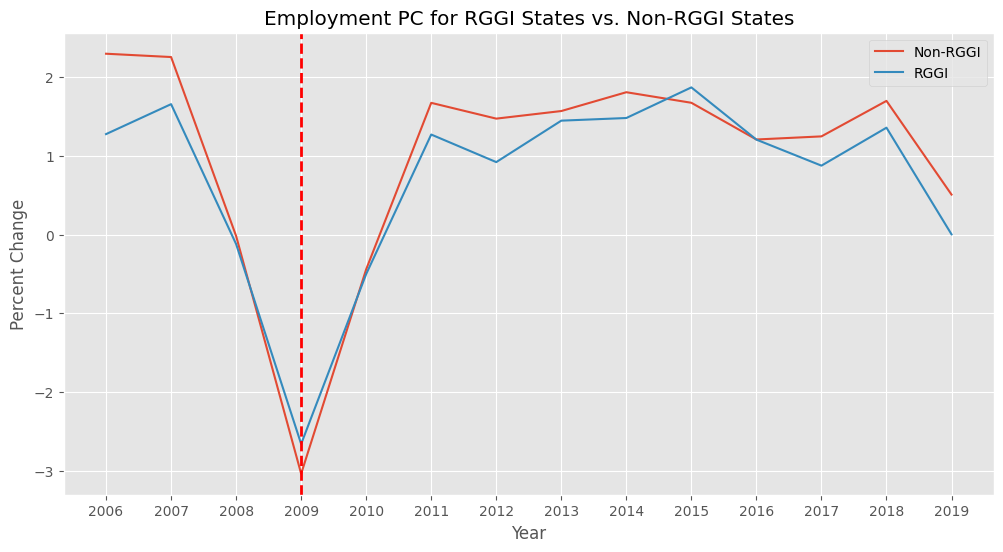

In [91]:
# Plot Employment PC for RGGI States vs. Non-RGGI States

new_df_pc.iloc[:,:14].T.plot(figsize=(12,6))
plt.title('Employment PC for RGGI States vs. Non-RGGI States')
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.xticks(range(2006,2020))
plt.axvline(x=2009, color='red', linestyle='--', linewidth=2)
plt.legend(['Non-RGGI', 'RGGI'])
plt.show()

### b. Employment Percent Change for RGGI States vs. US

In [92]:
EmploymentPC['UnitedStates_EPC'] = EmploymentPC.mean(axis=1)

In [93]:
EmploymentPC.head()

AL_EmploymentPC  AK_EmploymentPC  AZ_EmploymentPC  AR_EmploymentPC  \
2006         2.361160         2.348952         4.826295         1.950612   
2007         2.300527         1.976022         2.662631         0.967107   
2008        -0.825926         0.854394        -1.796763        -0.225925   
2009        -3.991675        -0.247294        -5.121949        -2.301472   
2010        -0.774588         0.324290        -1.454321        -0.107200   

      CA_EmploymentPC  CO_EmploymentPC  CT_EmploymentPC  DE_EmploymentPC  \
2006         1.879610         2.394276         1.387131         1.594772   
2007         1.869102         3.492675         1.981297         1.459516   
2008        -1.120918         1.030310         0.461054        -0.012846   
2009        -3.953828        -2.665112        -2.655317        -3.536472   
2010        -0.983898        -0.657676        -1.103329        -0.615492   

      FL_EmploymentPC  GA_EmploymentPC  ...  TN_EmploymentPC  TX_EmploymentPC  \
2006         3.145840         3.121721  ...         2.001845         3.764766   
2007         1.420169         2.475686  ...         1.616468         3.815249   
2008        -2.485819        -0.724812  ...        -0.684464         2.553430   
2009        -4.164191        -3.740650  ...        -4.167532        -1.135495   
2010        -0.373181        -0.679575  ...        -0.228612         0.420507   

      UT_EmploymentPC  VT_EmploymentPC  VA_EmploymentPC  WA_EmploymentPC  \
2006         4.952918         0.935267         1.718021         2.993221   
2007         5.252421         0.960805         1.830793         3.334406   
2008         0.701874        -0.180216         0.022098         0.764485   
2009        -3.207623        -2.372726        -2.305880        -3.520924   
2010        -0.807412        -0.211968        -0.312984        -1.158422   

      WV_EmploymentPC  WI_EmploymentPC  WY_EmploymentPC  UnitedStates_EPC  
2006         1.364341         1.012458         4.499921          2.115462  
2007         1.409881         1.080348         4.896160          2.149442  
2008         0.298479        -0.348922         2.709653         -0.035654  
2009        -2.102516        -3.590389        -2.882034         -2.970167  
2010         0.049273        -0.527473        -0.623242         -0.451094  

[5 rows x 51 columns]

In [164]:
EPCT = EmploymentPC.T
EPCT.tail()

2006      2007      2008      2009      2010      2011  \
WA_EmploymentPC   2.993221  3.334406  0.764485 -3.520924 -1.158422  1.136097   
WV_EmploymentPC   1.364341  1.409881  0.298479 -2.102516  0.049273  1.061689   
WI_EmploymentPC   1.012458  1.080348 -0.348922 -3.590389 -0.527473  1.400987   
WY_EmploymentPC   4.499921  4.896160  2.709653 -2.882034 -0.623242  1.367266   
UnitedStates_EPC  2.115462  2.149442 -0.035654 -2.970167 -0.451094  1.602549   

                      2012      2013      2014      2015      2016      2017  \
WA_EmploymentPC   2.486689  2.113750  2.570879  2.559466  2.728114  2.748184   
WV_EmploymentPC   1.088817 -0.512646 -0.280996 -0.812568 -1.554956 -0.155806   
WI_EmploymentPC   0.718691  1.138986  1.320779  1.074445  0.917623  0.577598   
WY_EmploymentPC   1.635497  0.954316  1.470875 -0.087598 -1.945843  0.206960   
UnitedStates_EPC  1.375027  1.548991  1.751083  1.711060  1.208989  1.181877   

                      2018      2019      2020      2021      2022  
WA_EmploymentPC   2.381872  1.200571 -3.409691  3.167410  5.231089  
WV_EmploymentPC   1.042166 -1.831787 -4.624368  2.811989  3.019170  
WI_EmploymentPC   1.148101 -0.072855 -3.667910  2.874681  3.642120  
WY_EmploymentPC   1.409386  0.853207 -1.554248  4.662174  3.837747  
UnitedStates_EPC  1.638703  0.418435 -3.061540  3.710005  4.295417

In [140]:
#EPCT.loc['CT_EmploymentPC',:'2019'].plot(kind='line', marker='o', color='green')

In [141]:
#EPCT.loc['UnitedStates_EPC',:'2019'].plot(kind='line', marker='o', color='red')

In [142]:
#EPCT.columns

#### i. Connecticut

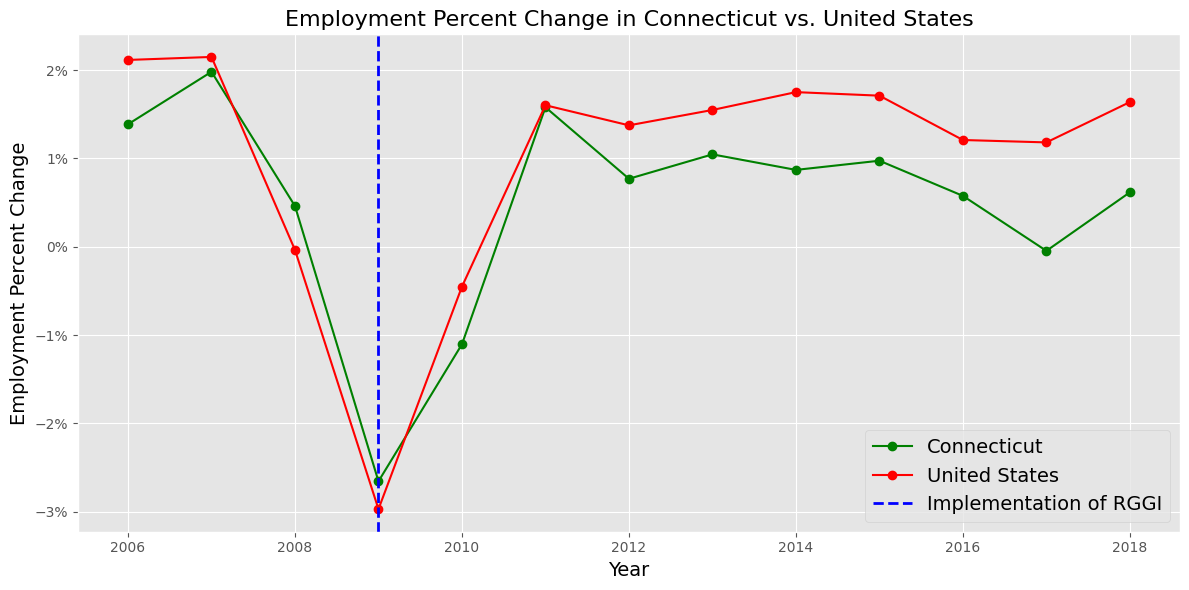

In [143]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

plt.figure(figsize=(12, 6))

EPCT.loc['CT_EmploymentPC',:'2018'].plot(kind='line', marker='o', color='green')
EPCT.loc['UnitedStates_EPC',:'2018'].plot(kind='line', marker='o', color='red')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

plt.ylabel('Employment Percent Change', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=3, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Connecticut', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('Employment Percent Change in Connecticut vs. United States', fontsize=16)
plt.tight_layout()
plt.show()


#### ii. Delaware

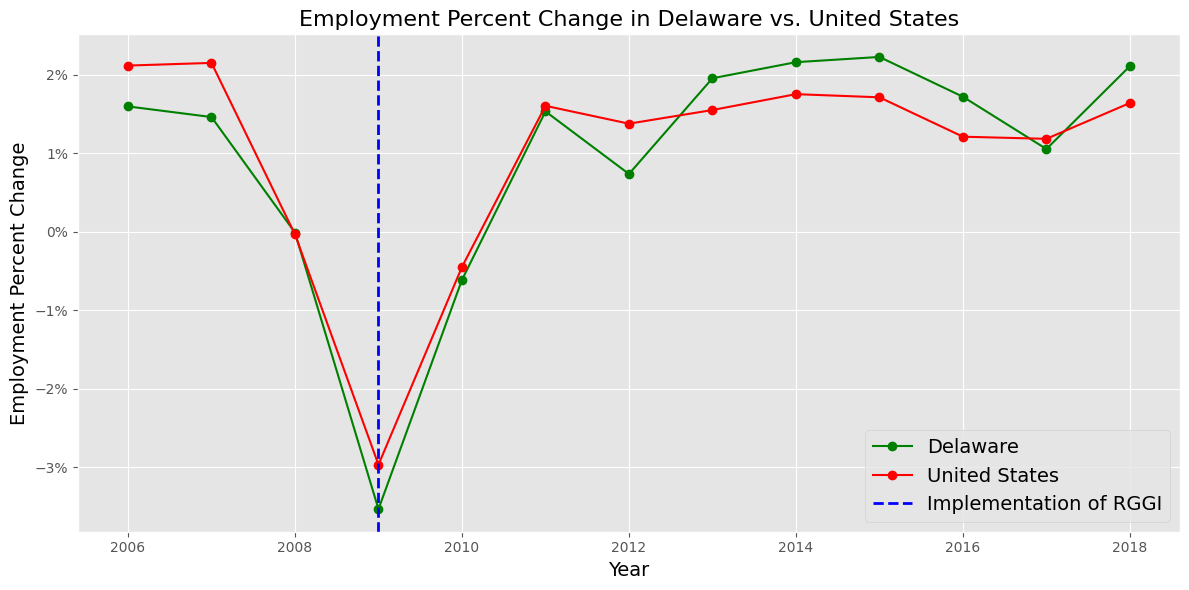

In [144]:
plt.figure(figsize=(12, 6))

EPCT.loc['DE_EmploymentPC',:'2018'].plot(kind='line', marker='o', color='green')
EPCT.loc['UnitedStates_EPC',:'2018'].plot(kind='line', marker='o', color='red')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

plt.ylabel('Employment Percent Change', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=3, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Delaware', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('Employment Percent Change in Delaware vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### iii. Maine

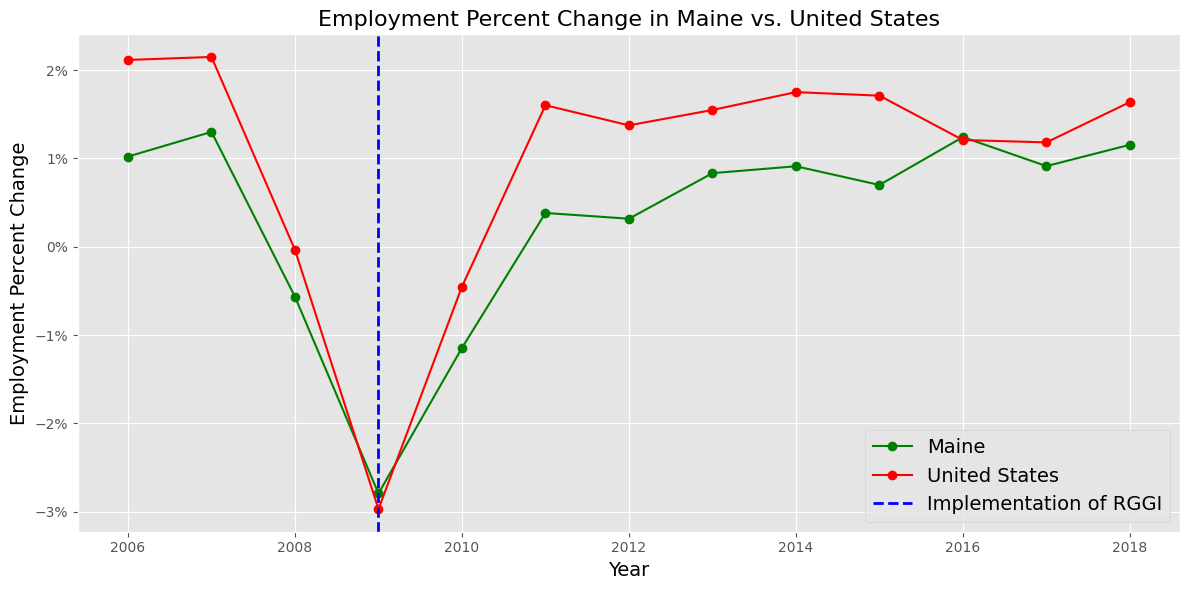

In [145]:
plt.figure(figsize=(12, 6))

EPCT.loc['ME_EmploymentPC',:'2018'].plot(kind='line', marker='o', color='green')
EPCT.loc['UnitedStates_EPC',:'2018'].plot(kind='line', marker='o', color='red')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

plt.ylabel('Employment Percent Change', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=3, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Maine', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('Employment Percent Change in Maine vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### iv. Massachusetts

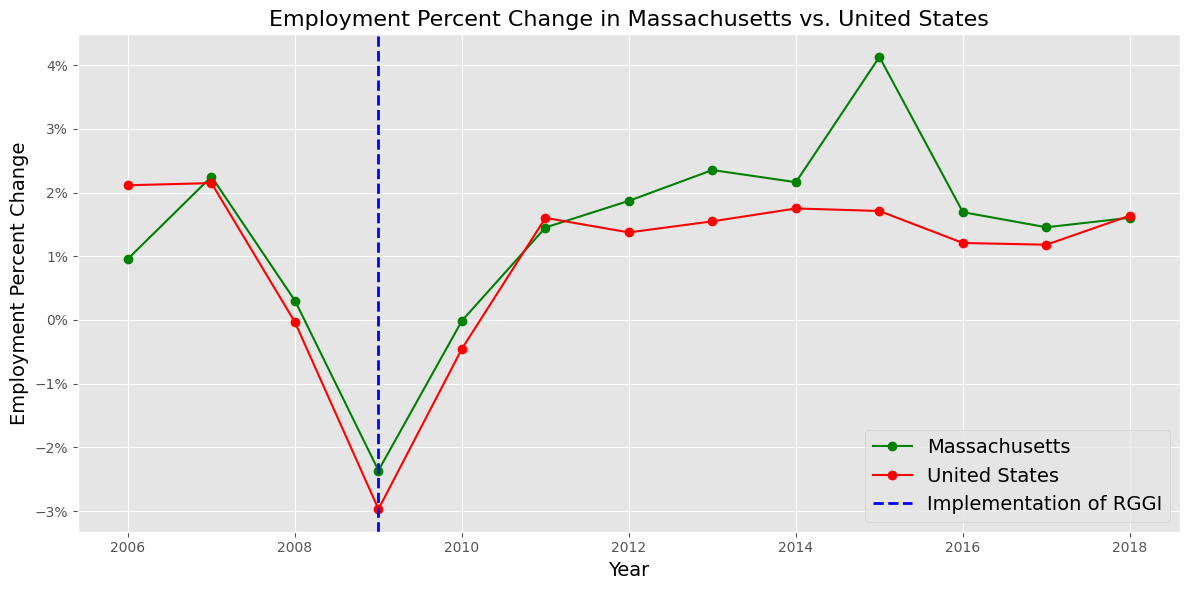

In [146]:
plt.figure(figsize=(12, 6))

EPCT.loc['MA_EmploymentPC',:'2018'].plot(kind='line', marker='o', color='green')
EPCT.loc['UnitedStates_EPC',:'2018'].plot(kind='line', marker='o', color='red')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

plt.ylabel('Employment Percent Change', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=3, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Massachusetts', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('Employment Percent Change in Massachusetts vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### v. Maryland

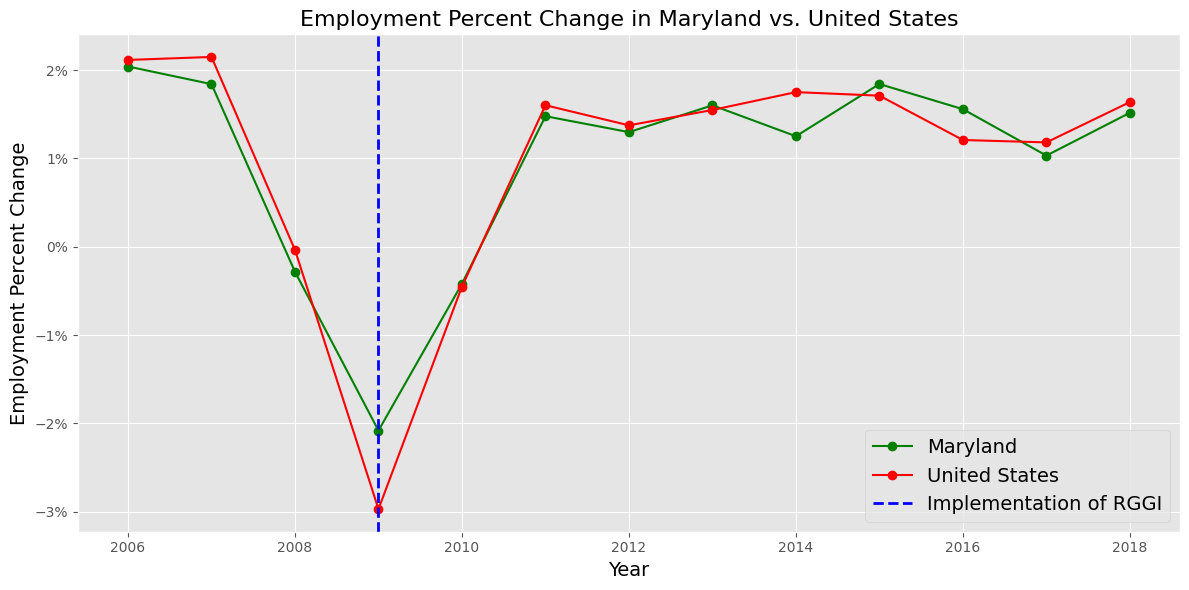

In [147]:
plt.figure(figsize=(12, 6))

EPCT.loc['MD_EmploymentPC',:'2018'].plot(kind='line', marker='o', color='green')
EPCT.loc['UnitedStates_EPC',:'2018'].plot(kind='line', marker='o', color='red')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

plt.ylabel('Employment Percent Change', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=3, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Maryland', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('Employment Percent Change in Maryland vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### vi. New Hampshire

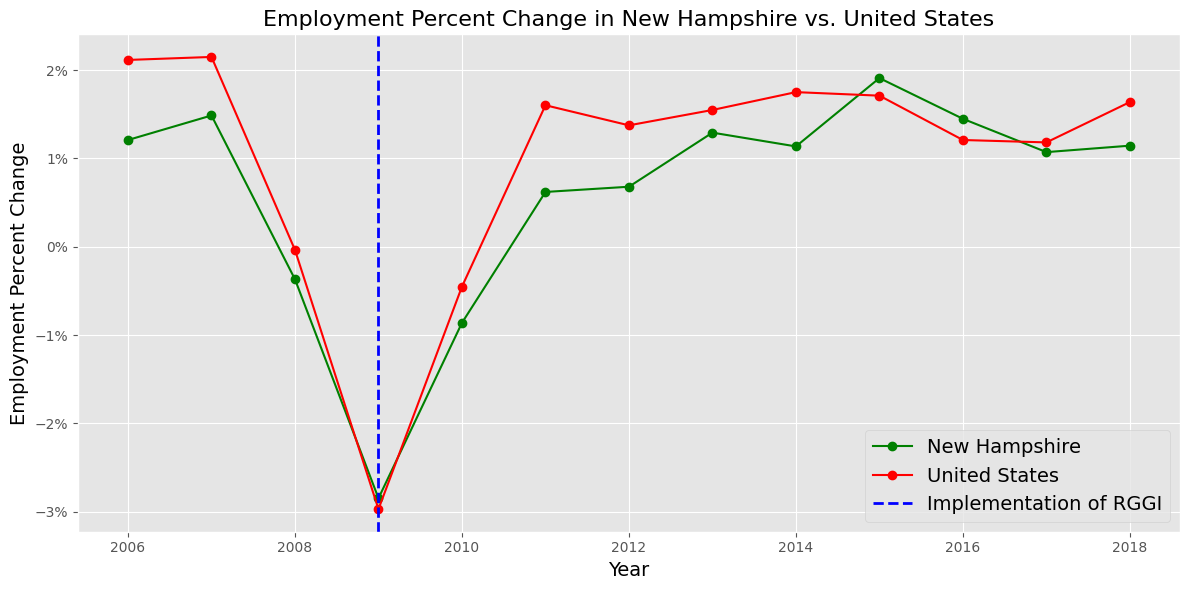

In [148]:
plt.figure(figsize=(12, 6))

EPCT.loc['NH_EmploymentPC',:'2018'].plot(kind='line', marker='o', color='green')
EPCT.loc['UnitedStates_EPC',:'2018'].plot(kind='line', marker='o', color='red')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

plt.ylabel('Employment Percent Change', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=3, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['New Hampshire', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('Employment Percent Change in New Hampshire vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### vii. New Jersey

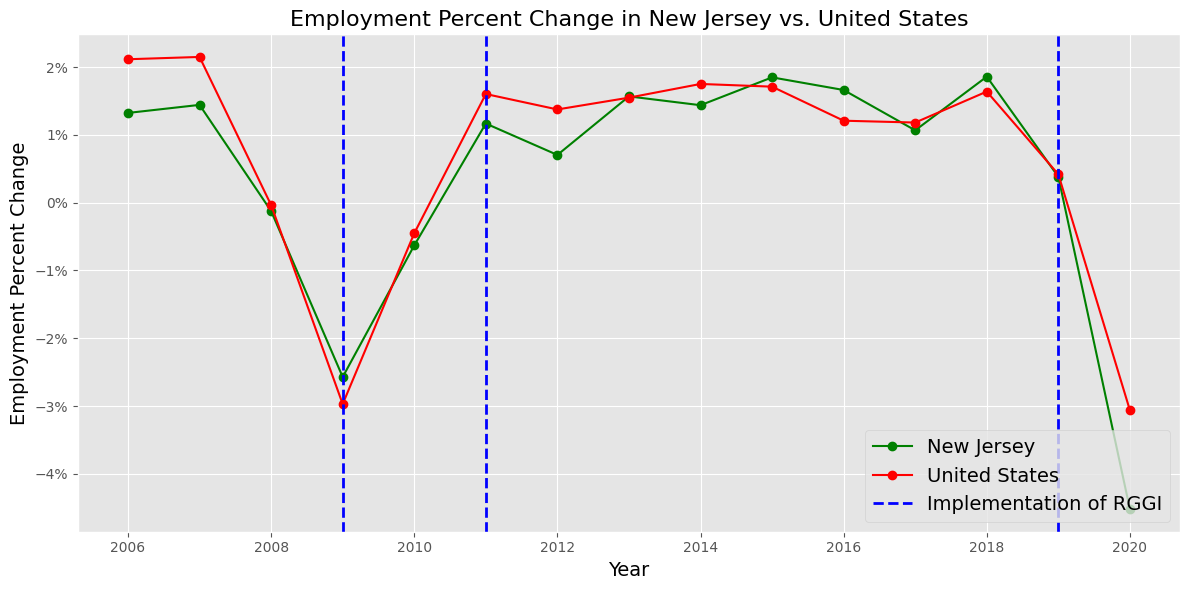

In [156]:
plt.figure(figsize=(12, 6))

EPCT.loc['NJ_EmploymentPC',:'2020'].plot(kind='line', marker='o', color='green')
EPCT.loc['UnitedStates_EPC',:'2020'].plot(kind='line', marker='o', color='red')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

plt.ylabel('Employment Percent Change', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=3, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
plt.axvline(x=5, color='blue', linestyle='--', linewidth=2, label='Left RGGI')
plt.axvline(x=13, color='blue', linestyle='--', linewidth=2, label='Rejoined RGGI')
legend = plt.legend(['New Jersey', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('Employment Percent Change in New Jersey vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### viii. New York

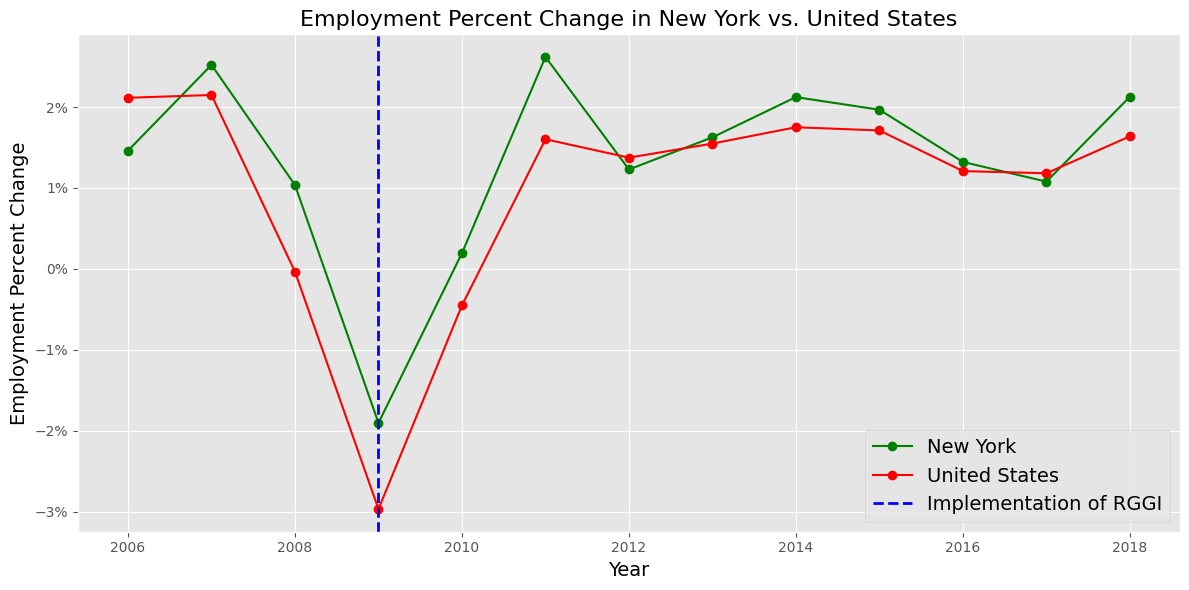

In [155]:
plt.figure(figsize=(12, 6))

EPCT.loc['NY_EmploymentPC',:'2018'].plot(kind='line', marker='o', color='green')
EPCT.loc['UnitedStates_EPC',:'2018'].plot(kind='line', marker='o', color='red')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

plt.ylabel('Employment Percent Change', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=3, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['New York', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('Employment Percent Change in New York vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### ix. Rhode Island

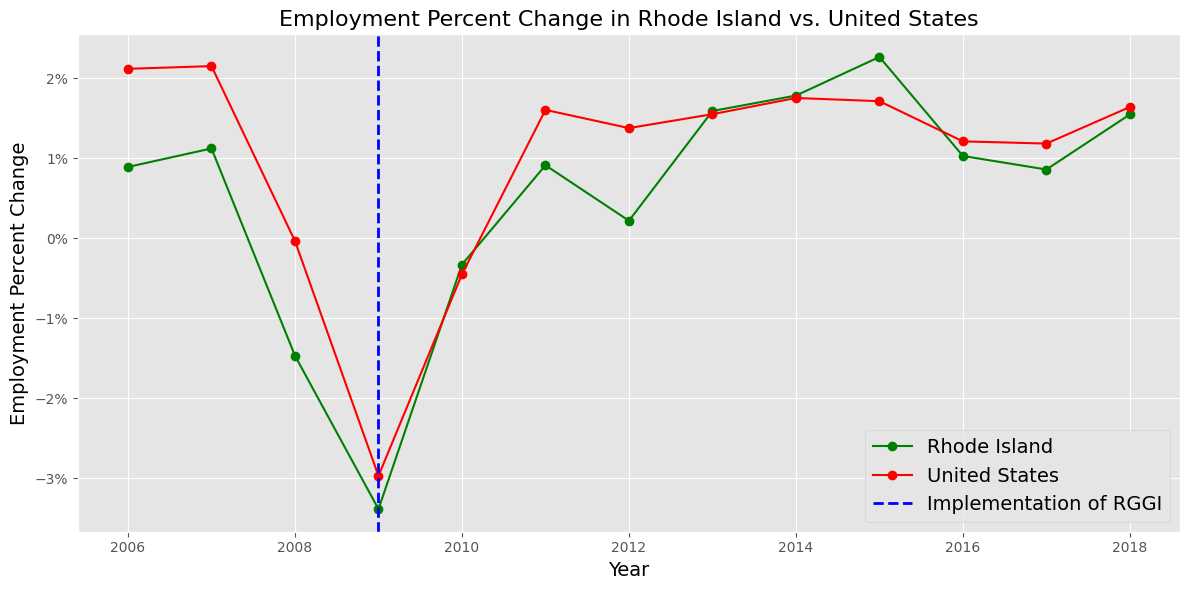

In [151]:
plt.figure(figsize=(12, 6))

EPCT.loc['RI_EmploymentPC',:'2018'].plot(kind='line', marker='o', color='green')
EPCT.loc['UnitedStates_EPC',:'2018'].plot(kind='line', marker='o', color='red')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

plt.ylabel('Employment Percent Change', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=3, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Rhode Island', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('Employment Percent Change in Rhode Island vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### x. Vermont

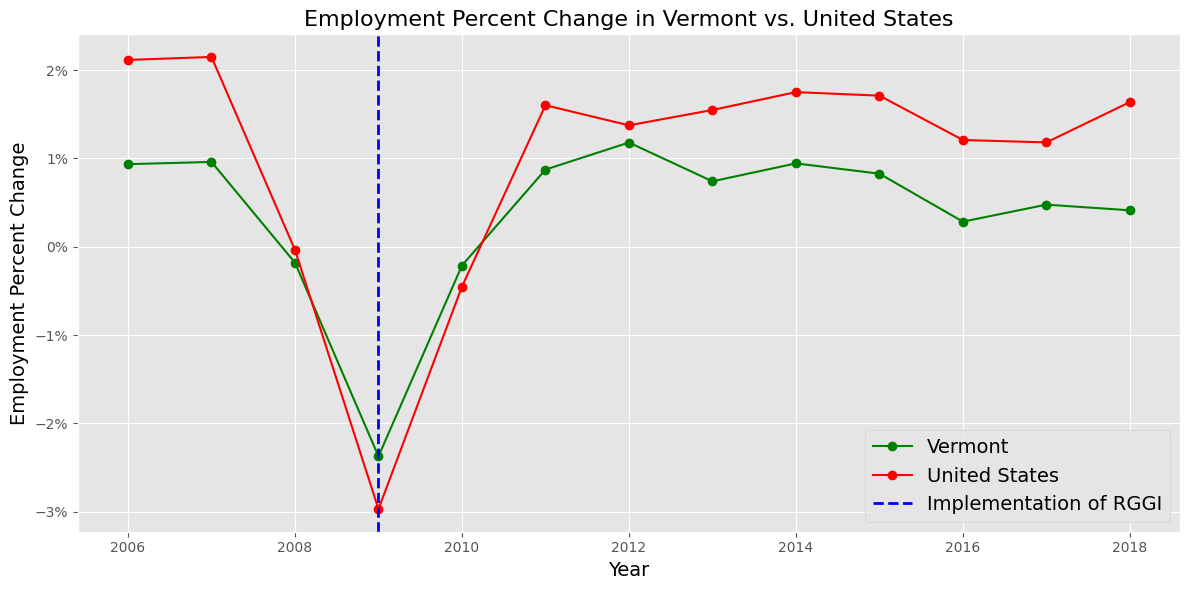

In [153]:
plt.figure(figsize=(12, 6))

EPCT.loc['VT_EmploymentPC',:'2018'].plot(kind='line', marker='o', color='green')
EPCT.loc['UnitedStates_EPC',:'2018'].plot(kind='line', marker='o', color='red')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

plt.ylabel('Employment Percent Change', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=3, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Vermont', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('Employment Percent Change in Vermont vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### xi. Virginia

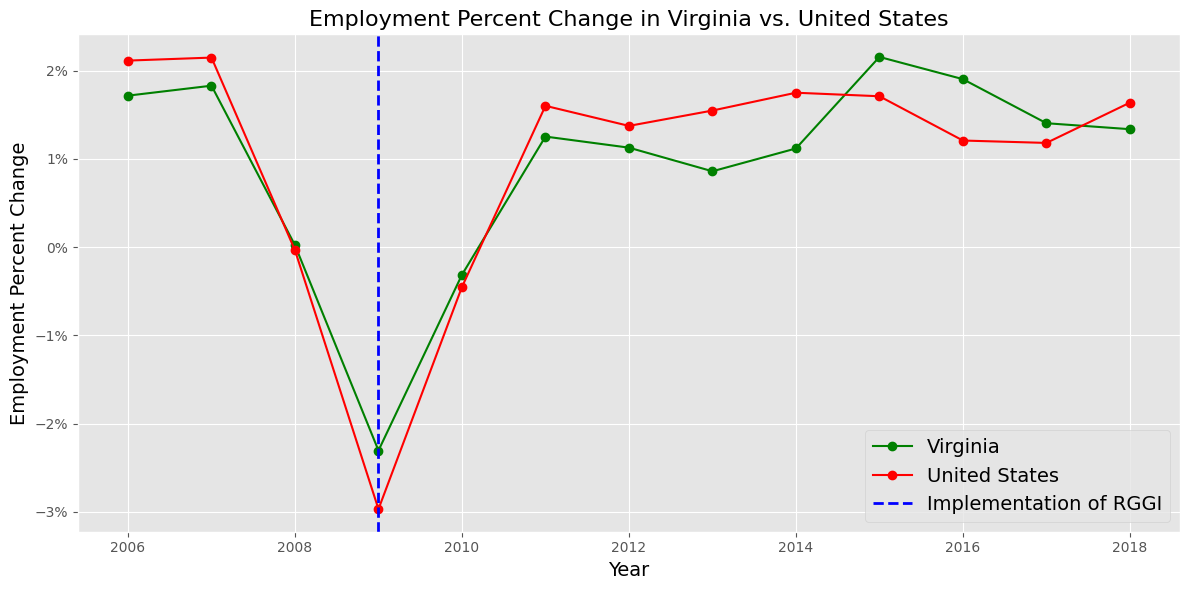

In [154]:
# Virginia didn't even join until 2021, this is not relevant

plt.figure(figsize=(12, 6))

EPCT.loc['VA_EmploymentPC',:'2018'].plot(kind='line', marker='o', color='green')
EPCT.loc['UnitedStates_EPC',:'2018'].plot(kind='line', marker='o', color='red')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

plt.ylabel('Employment Percent Change', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=3, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Virginia', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('Employment Percent Change in Virginia vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

### c. Regression Employment Percent Change~RGGI Indicator

In [176]:
EPCT_index = EPCT.copy()
EPCT_index['State'] = EPCT_index.index
EPCT_index.head()
EPCT_index = EPCT_index.reset_index()
#EPCT_index = EPCT.rename(columns={'index': 'State'})
EPCT_index.columns

Index(['index', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'State'],
      dtype='object')

In [177]:
EPCT_index.loc[x,'State']

'AL_EmploymentPC'

In [179]:
# Accurate RGGI: RGGI States (CT, DE, ME, MD, MA, NH, NY, RI, VT)

RGGI_Status_UnemployPC = []

for x in range(len(EPCT_index)):
    if EPCT_index.loc[x,'State'] == 'CT_EmploymentPC' or EPCT_index.loc[x,'State'] == 'DE_EmploymentPC' or EPCT_index.loc[x,'State'] == 'ME_EmploymentPC' or EPCT_index.loc[x,'State'] == 'MD_EmploymentPC' or EPCT_index.loc[x,'State'] == 'MA_EmploymentPC' or EPCT_index.loc[x,'State'] == 'NH_EmploymentPC' or EPCT_index.loc[x,'State'] == 'NY_EmploymentPC' or EPCT_index.loc[x,'State'] == 'RI_EmploymentPC' or EPCT_index.loc[x,'State'] == 'VT_EmploymentPC':
        RGGI_Status_UnemployPC.append(1)
    else:
        RGGI_Status_UnemployPC.append(0)

EPCT_index['RGGI'] = RGGI_Status_UnemployPC

In [185]:
# Select Columns for Regression Analysis

selected_columns_epc = EPCT_index.loc[:, ['State', '2011', '2006','RGGI']]
selected_columns_epc.columns = ['State', 'U2011', 'U2006', 'RGGI']
selected_columns_epc.head()

State     U2011     U2006  RGGI
0  AL_EmploymentPC  1.531070  2.361160     0
1  AK_EmploymentPC  1.459657  2.348952     0
2  AZ_EmploymentPC  1.806471  4.826295     0
3  AR_EmploymentPC  1.341703  1.950612     0
4  CA_EmploymentPC  1.749473  1.879610     0

In [186]:
# Regression 2011_Unemployment~RGGI+2008_Unemployment

lm_epc = smf.ols(formula='U2011~RGGI+U2006', data = selected_columns_epc).fit()
print(lm_epc.summary())

                            OLS Regression Results                            
Dep. Variable:                  U2011   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     1.421
Date:                Mon, 29 Apr 2024   Prob (F-statistic):              0.251
Time:                        15:24:06   Log-Likelihood:                -57.007
No. Observations:                  51   AIC:                             120.0
Df Residuals:                      48   BIC:                             125.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4723      0.255      5.782      0.0

## 4. GDP

In [360]:
# GDP

GDP = pd.merge(Alabama['AL_GDP'], Alaska['AK_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Arizona['AZ_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Arkansas['AR_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, California['CA_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Colorado['CO_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Connecticut['CT_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Delaware['DE_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Florida['FL_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Georgia['GA_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Hawaii['HI_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Idaho['ID_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Illinois['IL_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Indiana['IN_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Iowa['IA_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Kansas['KS_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Kentucky['KY_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Louisiana['LA_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Maine['ME_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Maryland['MD_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Massachusetts['MA_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Michigan['MI_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Minnesota['MN_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Mississippi['MS_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Missouri['MO_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Montana['MT_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Nebraska['NE_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Nevada['NV_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, NewHampshire['NH_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, NewJersey['NJ_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, NewMexico['NM_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, NewYork['NY_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, NorthCarolina['NC_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, NorthDakota['ND_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Ohio['OH_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Oklahoma['OK_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Oregon['OR_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Pennsylvania['PA_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, RhodeIsland['RI_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, SouthCarolina['SC_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, SouthDakota['SD_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Tennessee['TN_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Texas['TX_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Utah['UT_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Vermont['VT_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Virginia['VA_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Washington['WA_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, WestVirginia['WV_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Wisconsin['WI_GDP'], left_index=True, right_index=True)
GDP = pd.merge(GDP, Wyoming['WY_GDP'], left_index=True, right_index=True)
GDP

AL_GDP   AK_GDP    AZ_GDP    AR_GDP     CA_GDP    CO_GDP    CT_GDP  \
2006  166469.0  45094.1  245957.0   95875.1  1812210.0  232646.7  219768.4   
2007  172975.2  49583.7  261392.0   98381.6  1898902.0  248446.5  234540.7   
2008  174526.3  55122.5  262926.0   99706.8  1944695.3  258871.7  238936.8   
2009  170930.9  49957.8  246424.3   97508.1  1890165.9  251227.7  233290.7   
2010  177249.2  53331.6  251153.0  101486.5  1954092.7  258300.2  234700.0   
2011  183916.6  56896.3  260915.7  105768.1  2023500.0  267516.1  233158.7   
2012  189245.5  58283.6  271440.0  108492.1  2113096.4  276823.1  240911.9   
2013  194786.9  57247.7  278591.6  113227.3  2220389.9  292140.5  241517.4   
2014  197406.9  56484.9  287666.6  116139.4  2335286.5  309542.6  246597.0   
2015  202372.4  51490.9  299393.3  117786.8  2473555.9  320721.1  259487.8   
2016  207368.4  50727.7  313081.4  119152.4  2569634.0  329911.7  263670.3   
2017  214606.3  53301.5  332001.8  122466.7  2728743.1  349156.5  271443.2   
2018  223859.3  54899.6  351879.5  127535.7  2897200.7  372212.1  279923.0   
2019  231561.9  54728.2  372393.5  131578.3  3042694.1  394534.7  288536.3   
2020  230892.1  50475.2  382072.3  133969.1  3020173.4  391263.3  276223.3   
2021  254109.7  57349.4  420026.7  148676.1  3373240.7  436359.5  298395.2   
2022  277817.5  63618.0  458949.8  165220.6  3598102.7  484371.5  321844.6   

       DE_GDP     FL_GDP    GA_GDP  ...   SD_GDP    TN_GDP     TX_GDP  \
2006  55174.4   750523.8  406015.6  ...  32364.5  243583.9  1103197.6   
2007  56612.8   782712.5  419606.3  ...  35073.0  248692.4  1191093.1   
2008  55459.8   763341.5  416377.6  ...  36603.0  254242.0  1244294.9   
2009  57849.7   735421.0  409590.8  ...  36432.9  252332.8  1169607.7   
2010  58163.5   746928.9  418091.3  ...  37852.5  257776.0  1245959.4   
2011  61372.2   755240.0  431653.9  ...  41892.1  269814.2  1341334.4   
2012  62354.6   778545.0  447764.7  ...  43901.5  286341.5  1421180.1   
2013  61716.2   811751.7  464752.8  ...  45361.0  295862.7  1515195.6   
2014  68354.7   851692.4  490079.3  ...  46785.4  306153.1  1579299.5   
2015  71913.9   908519.9  521008.2  ...  48070.2  325294.0  1573498.4   
2016  69355.0   953352.5  547546.7  ...  49151.4  336413.9  1579014.9   
2017  68302.5  1003144.0  573777.2  ...  50232.5  350838.7  1673234.3   
2018  72168.3  1057255.4  602366.4  ...  52299.3  363055.5  1809396.7   
2019  76923.7  1111392.2  637992.5  ...  54001.3  380128.5  1858757.8   
2020  75818.6  1116726.8  625425.7  ...  55681.2  379007.1  1789933.4   
2021  81160.0  1255558.3  691626.9  ...  61684.7  427125.5  2051768.6   
2022  87524.8  1389069.7  755697.9  ...  67570.7  475755.1  2355959.7   

        UT_GDP   VT_GDP    VA_GDP    WA_GDP   WV_GDP    WI_GDP   WY_GDP  
2006  106537.3  24331.5  376235.7  314265.2  57010.0  237569.3  32740.3  
2007  114813.4  24797.7  391699.8  342024.2  59273.5  245839.5  36950.8  
2008  117178.9  25999.3  404634.9  354794.1  62694.8  246814.5  42819.3  
2009  113985.4  26099.2  410967.4  351245.0  63600.7  247210.0  36252.0  
2010  118669.8  27406.6  426992.4  365497.8  65998.7  256432.9  37680.7  
2011  125565.0  28418.7  435180.3  379574.9  69234.1  266364.4  39751.4  
2012  129512.5  29241.3  445973.6  400530.6  70322.2  277107.1  38855.4  
2013  135450.4  29289.6  457640.5  419092.4  71481.5  284270.9  39289.8  
2014  142150.1  30099.4  465181.8  440648.0  72648.2  295696.0  40310.6  
2015  149153.4  30933.3  483786.5  466689.7  71318.5  307507.9  38426.9  
2016  157827.3  31661.2  496021.1  487275.1  70924.4  314073.3  35879.0  
2017  168649.9  32266.1  511114.9  519409.6  74820.1  318310.4  36980.7  
2018  184457.5  33066.8  532906.5  564313.9  79192.9  332498.6  39171.7  
2019  196538.9  34230.8  557764.4  595231.8  79325.6  345236.4  39428.0  
2020  202133.4  34018.6  556992.6  612969.1  76547.9  340591.1  36330.4  
2021  225340.3  37103.8  604957.6  677489.5  85434.2  368611.3  41510.2  
2022  248176.3  40617.1  64939

### a.  GDP for RGGI States vs. Non-RGGI States

In [365]:
GDP_T = GDP.T 
GDP_T.head()

2006       2007       2008       2009       2010       2011  \
AL_GDP   166469.0   172975.2   174526.3   170930.9   177249.2   183916.6   
AK_GDP    45094.1    49583.7    55122.5    49957.8    53331.6    56896.3   
AZ_GDP   245957.0   261392.0   262926.0   246424.3   251153.0   260915.7   
AR_GDP    95875.1    98381.6    99706.8    97508.1   101486.5   105768.1   
CA_GDP  1812210.0  1898902.0  1944695.3  1890165.9  1954092.7  2023500.0   

             2012       2013       2014       2015       2016       2017  \
AL_GDP   189245.5   194786.9   197406.9   202372.4   207368.4   214606.3   
AK_GDP    58283.6    57247.7    56484.9    51490.9    50727.7    53301.5   
AZ_GDP   271440.0   278591.6   287666.6   299393.3   313081.4   332001.8   
AR_GDP   108492.1   113227.3   116139.4   117786.8   119152.4   122466.7   
CA_GDP  2113096.4  2220389.9  2335286.5  2473555.9  2569634.0  2728743.1   

             2018       2019       2020       2021       2022  
AL_GDP   223859.3   231561.9   230892.1   254109.7   277817.5  
AK_GDP    54899.6    54728.2    50475.2    57349.4    63618.0  
AZ_GDP   351879.5   372393.5   382072.3   420026.7   458949.8  
AR_GDP   127535.7   131578.3   133969.1   148676.1   165220.6  
CA_GDP  2897200.7  3042694.1  3020173.4  3373240.7  3598102.7

In [366]:
GDP_T['RGGI'] = RGGI_Status3

In [368]:
GDP_T_GB = GDP_T.groupby(['RGGI']).mean()
GDP_T_GB

2006           2007           2008           2009  \
RGGI                                                               
0     280016.604878  293610.412195  299905.248780  291492.529268   
1     240456.777778  250711.066667  253650.711111  258697.477778   

               2010           2011           2012           2013  \
RGGI                                                               
0     302504.360976  314329.546341  327283.982927  340107.553659   
1     270692.477778  276810.488889  289993.611111  296770.155556   

               2014           2015           2016           2017  \
RGGI                                                               
0     354495.941463  367315.231707  376621.558537  393329.321951   
1     309241.100000  323282.455556  335012.177778  345418.144444   

               2018           2019           2020           2021  \
RGGI                                                               
0     414722.265854  431504.609756  425310.280488  472623.404878   
1     362813.744444  379478.200000  371421.644444  405269.455556   

               2022  
RGGI                 
0     517830.265854  
1     435895.444444

In [369]:
GDP_T_GB.columns = GDP_T_GB.columns.astype('int')

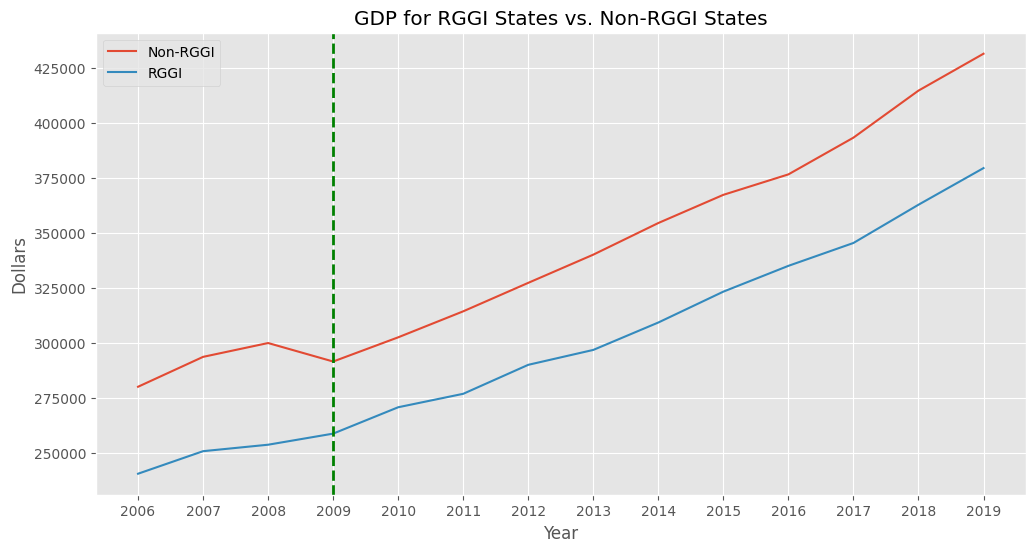

In [371]:
# Plot GDP for RGGI States vs. Non-RGGI States

GDP_T_GB.iloc[:,:14].T.plot(figsize=(12,6))
plt.title('GDP for RGGI States vs. Non-RGGI States')
plt.xlabel('Year')
plt.ylabel('Dollars')
plt.xticks(range(2006,2020))
plt.axvline(x=2009, color='green', linestyle='--', linewidth=2)
plt.legend(['Non-RGGI', 'RGGI'])
plt.show()

In [372]:
GDP.head()

AL_GDP   AK_GDP    AZ_GDP    AR_GDP     CA_GDP    CO_GDP    CT_GDP  \
2006  166469.0  45094.1  245957.0   95875.1  1812210.0  232646.7  219768.4   
2007  172975.2  49583.7  261392.0   98381.6  1898902.0  248446.5  234540.7   
2008  174526.3  55122.5  262926.0   99706.8  1944695.3  258871.7  238936.8   
2009  170930.9  49957.8  246424.3   97508.1  1890165.9  251227.7  233290.7   
2010  177249.2  53331.6  251153.0  101486.5  1954092.7  258300.2  234700.0   

       DE_GDP    FL_GDP    GA_GDP  ...   SD_GDP    TN_GDP     TX_GDP  \
2006  55174.4  750523.8  406015.6  ...  32364.5  243583.9  1103197.6   
2007  56612.8  782712.5  419606.3  ...  35073.0  248692.4  1191093.1   
2008  55459.8  763341.5  416377.6  ...  36603.0  254242.0  1244294.9   
2009  57849.7  735421.0  409590.8  ...  36432.9  252332.8  1169607.7   
2010  58163.5  746928.9  418091.3  ...  37852.5  257776.0  1245959.4   

        UT_GDP   VT_GDP    VA_GDP    WA_GDP   WV_GDP    WI_GDP   WY_GDP  
2006  106537.3  24331.5  376235.7  314265.2  57010.0  237569.3  32740.3  
2007  114813.4  24797.7  391699.8  342024.2  59273.5  245839.5  36950.8  
2008  117178.9  25999.3  404634.9  354794.1  62694.8  246814.5  42819.3  
2009  113985.4  26099.2  410967.4  351245.0  63600.7  247210.0  36252.0  
2010  118669.8  27406.6  426992.4  365497.8  65998.7  256432.9  37680.7  

[5 rows x 50 columns]

In [373]:
Population.head()

AL_Population  AK_Population  AZ_Population  AR_Population  \
2006        4628981         675302        6029141        2821761   
2007        4672840         680300        6167681        2848650   
2008        4718206         687455        6280362        2874554   
2009        4757938         698895        6343154        2896843   
2010        4787998         714014        6402024        2921561   

      CA_Population  CO_Population  CT_Population  DE_Population  \
2006       36021202        4720423        3517460         859268   
2007       36250311        4803868        3527270         871749   
2008       36604337        4889730        3545579         883874   
2009       36961229        4972195        3561807         891730   
2010       37322360        5047005        3580279         899762   

      FL_Population  GA_Population  ...  SD_Population  TN_Population  \
2006       18166990        9155813  ...         783033        6088766   
2007       18367842        9349988  ...         791623        6175727   
2008       18527305        9504843  ...         799124        6247411   
2009       18652644        9620846  ...         807067        6306019   
2010       18842884        9712576  ...         816078        6356320   

      TX_Population  UT_Population  VT_Population  VA_Population  \
2006       23359580        2525507         622892        7673725   
2007       23831983        2597746         623481        7751000   
2008       24309039        2663029         624151        7833496   
2009       24801761        2723421         624817        7925937   
2010       25238863        2776094         626360        8025030   

      WA_Population  WV_Population  WI_Population  WY_Population  
2006        6370753        1827912        5577655         522667  
2007        6461587        1834052        5610775         534876  
2008        6562231        1840310        5640996         546043  
2009        6667426        1847775        5669264         559851  
2010        6743597        1854409        5691995         564405  

[5 rows x 50 columns]

In [377]:
GDP_per_capita = pd.merge(GDP, Population, left_index=True, right_index=True)
GDP_per_capita.head()

AL_GDP   AK_GDP    AZ_GDP    AR_GDP     CA_GDP    CO_GDP    CT_GDP  \
2006  166469.0  45094.1  245957.0   95875.1  1812210.0  232646.7  219768.4   
2007  172975.2  49583.7  261392.0   98381.6  1898902.0  248446.5  234540.7   
2008  174526.3  55122.5  262926.0   99706.8  1944695.3  258871.7  238936.8   
2009  170930.9  49957.8  246424.3   97508.1  1890165.9  251227.7  233290.7   
2010  177249.2  53331.6  251153.0  101486.5  1954092.7  258300.2  234700.0   

       DE_GDP    FL_GDP    GA_GDP  ...  SD_Population  TN_Population  \
2006  55174.4  750523.8  406015.6  ...         783033        6088766   
2007  56612.8  782712.5  419606.3  ...         791623        6175727   
2008  55459.8  763341.5  416377.6  ...         799124        6247411   
2009  57849.7  735421.0  409590.8  ...         807067        6306019   
2010  58163.5  746928.9  418091.3  ...         816078        6356320   

      TX_Population  UT_Population  VT_Population  VA_Population  \
2006       23359580        2525507         622892        7673725   
2007       23831983        2597746         623481        7751000   
2008       24309039        2663029         624151        7833496   
2009       24801761        2723421         624817        7925937   
2010       25238863        2776094         626360        8025030   

      WA_Population  WV_Population  WI_Population  WY_Population  
2006        6370753        1827912        5577655         522667  
2007        6461587        1834052        5610775         534876  
2008        6562231        1840310        5640996         546043  
2009        6667426        1847775        5669264         559851  
2010        6743597        1854409        5691995         564405  

[5 rows x 100 columns]

In [378]:
GDP_per_capita['GDP_PC_AL'] = GDP_per_capita['AL_GDP']/GDP_per_capita['AL_Population']
GDP_per_capita['GDP_PC_AK'] = GDP_per_capita['AK_GDP']/GDP_per_capita['AK_Population']
GDP_per_capita['GDP_PC_AZ'] = GDP_per_capita['AZ_GDP']/GDP_per_capita['AZ_Population']
GDP_per_capita['GDP_PC_AR'] = GDP_per_capita['AR_GDP']/GDP_per_capita['AR_Population']
GDP_per_capita['GDP_PC_CA'] = GDP_per_capita['CA_GDP']/GDP_per_capita['CA_Population']
GDP_per_capita['GDP_PC_CO'] = GDP_per_capita['CO_GDP']/GDP_per_capita['CO_Population']
GDP_per_capita['GDP_PC_CT'] = GDP_per_capita['CT_GDP']/GDP_per_capita['CT_Population']
GDP_per_capita['GDP_PC_DE'] = GDP_per_capita['DE_GDP']/GDP_per_capita['DE_Population']
GDP_per_capita['GDP_PC_FL'] = GDP_per_capita['FL_GDP']/GDP_per_capita['FL_Population']
GDP_per_capita['GDP_PC_GA'] = GDP_per_capita['GA_GDP']/GDP_per_capita['GA_Population']
GDP_per_capita['GDP_PC_HI'] = GDP_per_capita['HI_GDP']/GDP_per_capita['HI_Population']
GDP_per_capita['GDP_PC_ID'] = GDP_per_capita['ID_GDP']/GDP_per_capita['ID_Population']
GDP_per_capita['GDP_PC_IL'] = GDP_per_capita['IL_GDP']/GDP_per_capita['IL_Population']
GDP_per_capita['GDP_PC_IN'] = GDP_per_capita['IN_GDP']/GDP_per_capita['IN_Population']
GDP_per_capita['GDP_PC_IA'] = GDP_per_capita['IA_GDP']/GDP_per_capita['IA_Population']
GDP_per_capita['GDP_PC_KS'] = GDP_per_capita['KS_GDP']/GDP_per_capita['KS_Population']
GDP_per_capita['GDP_PC_KY'] = GDP_per_capita['KY_GDP']/GDP_per_capita['KY_Population']
GDP_per_capita['GDP_PC_LA'] = GDP_per_capita['LA_GDP']/GDP_per_capita['LA_Population']
GDP_per_capita['GDP_PC_ME'] = GDP_per_capita['ME_GDP']/GDP_per_capita['ME_Population']
GDP_per_capita['GDP_PC_MD'] = GDP_per_capita['MD_GDP']/GDP_per_capita['MD_Population']
GDP_per_capita['GDP_PC_MA'] = GDP_per_capita['MA_GDP']/GDP_per_capita['MA_Population']
GDP_per_capita['GDP_PC_MI'] = GDP_per_capita['MI_GDP']/GDP_per_capita['MI_Population']
GDP_per_capita['GDP_PC_MN'] = GDP_per_capita['MN_GDP']/GDP_per_capita['MN_Population']
GDP_per_capita['GDP_PC_MS'] = GDP_per_capita['MS_GDP']/GDP_per_capita['MS_Population']
GDP_per_capita['GDP_PC_MO'] = GDP_per_capita['MO_GDP']/GDP_per_capita['MO_Population']
GDP_per_capita['GDP_PC_MT'] = GDP_per_capita['MT_GDP']/GDP_per_capita['MT_Population']
GDP_per_capita['GDP_PC_NE'] = GDP_per_capita['NE_GDP']/GDP_per_capita['NE_Population']
GDP_per_capita['GDP_PC_NV'] = GDP_per_capita['NV_GDP']/GDP_per_capita['NV_Population']
GDP_per_capita['GDP_PC_NH'] = GDP_per_capita['NH_GDP']/GDP_per_capita['NH_Population']
GDP_per_capita['GDP_PC_NJ'] = GDP_per_capita['NJ_GDP']/GDP_per_capita['NJ_Population']
GDP_per_capita['GDP_PC_NM'] = GDP_per_capita['NM_GDP']/GDP_per_capita['NM_Population']
GDP_per_capita['GDP_PC_NY'] = GDP_per_capita['NY_GDP']/GDP_per_capita['NY_Population']
GDP_per_capita['GDP_PC_NC'] = GDP_per_capita['NC_GDP']/GDP_per_capita['NC_Population']
GDP_per_capita['GDP_PC_ND'] = GDP_per_capita['ND_GDP']/GDP_per_capita['ND_Population']
GDP_per_capita['GDP_PC_OH'] = GDP_per_capita['OH_GDP']/GDP_per_capita['OH_Population']
GDP_per_capita['GDP_PC_OK'] = GDP_per_capita['OK_GDP']/GDP_per_capita['OK_Population']
GDP_per_capita['GDP_PC_OR'] = GDP_per_capita['OR_GDP']/GDP_per_capita['OR_Population']
GDP_per_capita['GDP_PC_PA'] = GDP_per_capita['PA_GDP']/GDP_per_capita['PA_Population']
GDP_per_capita['GDP_PC_RI'] = GDP_per_capita['RI_GDP']/GDP_per_capita['RI_Population']
GDP_per_capita['GDP_PC_SC'] = GDP_per_capita['SC_GDP']/GDP_per_capita['SC_Population']
GDP_per_capita['GDP_PC_SD'] = GDP_per_capita['SD_GDP']/GDP_per_capita['SD_Population']
GDP_per_capita['GDP_PC_TN'] = GDP_per_capita['TN_GDP']/GDP_per_capita['TN_Population']
GDP_per_capita['GDP_PC_TX'] = GDP_per_capita['TX_GDP']/GDP_per_capita['TX_Population']
GDP_per_capita['GDP_PC_UT'] = GDP_per_capita['UT_GDP']/GDP_per_capita['UT_Population']
GDP_per_capita['GDP_PC_VT'] = GDP_per_capita['VT_GDP']/GDP_per_capita['VT_Population']
GDP_per_capita['GDP_PC_VA'] = GDP_per_capita['VA_GDP']/GDP_per_capita['VA_Population']
GDP_per_capita['GDP_PC_WA'] = GDP_per_capita['WA_GDP']/GDP_per_capita['WA_Population']
GDP_per_capita['GDP_PC_WV'] = GDP_per_capita['WV_GDP']/GDP_per_capita['WV_Population']
GDP_per_capita['GDP_PC_WI'] = GDP_per_capita['WI_GDP']/GDP_per_capita['WI_Population']
GDP_per_capita['GDP_PC_WY'] = GDP_per_capita['WY_GDP']/GDP_per_capita['WY_Population']
GDP_per_capita

/var/folders/45/gm9k9bkj35d021zp8j2qdzmw0000gn/T/ipykernel_84149/2094171781.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  GDP_per_capita['GDP_PC_AL'] = GDP_per_capita['AL_GDP']/GDP_per_capita['AL_Population']
/var/folders/45/gm9k9bkj35d021zp8j2qdzmw0000gn/T/ipykernel_84149/2094171781.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  GDP_per_capita['GDP_PC_AK'] = GDP_per_capita['AK_GDP']/GDP_per_capita['AK_Population']
/var/folders/45/gm9k9bkj35d021zp8j2qdzmw0000gn/T/ipykernel_84149/2094171781.py:3: PerformanceWarning: Da

AL_GDP   AK_GDP    AZ_GDP    AR_GDP     CA_GDP    CO_GDP    CT_GDP  \
2006  166469.0  45094.1  245957.0   95875.1  1812210.0  232646.7  219768.4   
2007  172975.2  49583.7  261392.0   98381.6  1898902.0  248446.5  234540.7   
2008  174526.3  55122.5  262926.0   99706.8  1944695.3  258871.7  238936.8   
2009  170930.9  49957.8  246424.3   97508.1  1890165.9  251227.7  233290.7   
2010  177249.2  53331.6  251153.0  101486.5  1954092.7  258300.2  234700.0   
2011  183916.6  56896.3  260915.7  105768.1  2023500.0  267516.1  233158.7   
2012  189245.5  58283.6  271440.0  108492.1  2113096.4  276823.1  240911.9   
2013  194786.9  57247.7  278591.6  113227.3  2220389.9  292140.5  241517.4   
2014  197406.9  56484.9  287666.6  116139.4  2335286.5  309542.6  246597.0   
2015  202372.4  51490.9  299393.3  117786.8  2473555.9  320721.1  259487.8   
2016  207368.4  50727.7  313081.4  119152.4  2569634.0  329911.7  263670.3   
2017  214606.3  53301.5  332001.8  122466.7  2728743.1  349156.5  271443.2   
2018  223859.3  54899.6  351879.5  127535.7  2897200.7  372212.1  279923.0   
2019  231561.9  54728.2  372393.5  131578.3  3042694.1  394534.7  288536.3   
2020  230892.1  50475.2  382072.3  133969.1  3020173.4  391263.3  276223.3   
2021  254109.7  57349.4  420026.7  148676.1  3373240.7  436359.5  298395.2   
2022  277817.5  63618.0  458949.8  165220.6  3598102.7  484371.5  321844.6   

       DE_GDP     FL_GDP    GA_GDP  ...  GDP_PC_SD  GDP_PC_TN  GDP_PC_TX  \
2006  55174.4   750523.8  406015.6  ...   0.041332   0.040005   0.047227   
2007  56612.8   782712.5  419606.3  ...   0.044305   0.040269   0.049979   
2008  55459.8   763341.5  416377.6  ...   0.045804   0.040696   0.051187   
2009  57849.7   735421.0  409590.8  ...   0.045142   0.040015   0.047158   
2010  58163.5   746928.9  418091.3  ...   0.046383   0.040554   0.049367   
2011  61372.2   755240.0  431653.9  ...   0.050892   0.042130   0.052334   
2012  62354.6   778545.0  447764.7  ...   0.052716   0.044304   0.054544   
2013  61716.2   811751.7  464752.8  ...   0.053924   0.045464   0.057311   
2014  68354.7   851692.4  490079.3  ...   0.055195   0.046679   0.058693   
2015  71913.9   908519.9  521008.2  ...   0.056412   0.049191   0.057429   
2016  69355.0   953352.5  547546.7  ...   0.057110   0.050419   0.056738   
2017  68302.5  1003144.0  573777.2  ...   0.057728   0.052058   0.059351   
2018  72168.3  1057255.4  602366.4  ...   0.059750   0.053339   0.063463   
2019  76923.7  1111392.2  637992.5  ...   0.061191   0.055393   0.064411   
2020  75818.6  1116726.8  625425.7  ...   0.062718   0.054725   0.061231   
2021  81160.0  1255558.3  691626.9  ...   0.068832   0.061295   0.069413   
2022  87524.8  1389069.7  755697.9  ...   0.074268   0.067470   0.078455   

      GDP_PC_UT  GDP_PC_VT  GDP_PC_VA  GDP_PC_WA  GDP_PC_WV  GDP_PC_WI  \
2006   0.042185   0.039062   0.049029   0.049329   0.031189   0.042593   
2007   0.044197   0.039773   0.050535   0.052932   0.032318   0.043816   
2008   0.044002   0.041655   0.051654   0.054066   0.034068   0.043754   
2009   0.041854   0.041771   0.051851   0.052681   0.034420   0.043605   
2010   0.042747   0.043755   0.053208   0.054199   0.035590   0.045051   
2011   0.044554   0.045139   0.053675   0.055571   0.037276   0.046623   
2012   0.045276   0.046366   0.054407   0.058014   0.037833   0.048326   
2013   0.046577   0.046284   0.055340   0.060092   0.038500   0.049377   
2014   0.048176   0.047488   0.055820   0.062344   0.039205   0.051173   
2015   0.049733   0.048647   0.057663   0.064994   0.038627   0.053073   
2016   0.051526   0.049755   0.058738   0.066605   0.038630   0.054035   
2017   0.053954   0.050490   0.060113   0.069749   0.041047   0.054538   
2018   0.057989   0.051613   0.062350   0.074758   0.043739   0.056752   
2019   0.060797   0.053332   0.064876   0.077923   0.044059   0.058712   
2020   0.061555   0.052915   0.064493   0.079359   0.042730   0.057764   
2021   0.067485   0.057350   0.069878   0.087523  

In [379]:
GDP_per_capita2 = GDP_per_capita.iloc[:, 100:]
GDP_per_capita2

GDP_PC_AL  GDP_PC_AK  GDP_PC_AZ  GDP_PC_AR  GDP_PC_CA  GDP_PC_CO  \
2006   0.035962   0.066776   0.040795   0.033977   0.050310   0.049285   
2007   0.037017   0.072885   0.042381   0.034536   0.052383   0.051718   
2008   0.036990   0.080183   0.041865   0.034686   0.053127   0.052942   
2009   0.035925   0.071481   0.038849   0.033660   0.051139   0.050527   
2010   0.037019   0.074693   0.039230   0.034737   0.052357   0.051179   
2011   0.038219   0.078748   0.040474   0.035990   0.053744   0.052258   
2012   0.039106   0.079720   0.041713   0.036791   0.055651   0.053351   
2013   0.040043   0.077565   0.042447   0.038321   0.057987   0.055503   
2014   0.040396   0.076575   0.043335   0.039221   0.060443   0.057934   
2015   0.041232   0.069664   0.044590   0.039654   0.063480   0.058932   
2016   0.042057   0.068237   0.046031   0.039976   0.065513   0.059668   
2017   0.043336   0.071840   0.048257   0.040948   0.069215   0.062347   
2018   0.044984   0.074418   0.050485   0.042551   0.073280   0.065562   
2019   0.046281   0.074478   0.052669   0.043797   0.076937   0.068783   
2020   0.045891   0.068868   0.053214   0.044446   0.076457   0.067636   
2021   0.050320   0.078113   0.057816   0.049098   0.086177   0.075088   
2022   0.054750   0.086722   0.062364   0.054248   0.092190   0.082941   

      GDP_PC_CT  GDP_PC_DE  GDP_PC_FL  GDP_PC_GA  ...  GDP_PC_SD  GDP_PC_TN  \
2006   0.062479   0.064211   0.041313   0.044345  ...   0.041332   0.040005   
2007   0.066494   0.064942   0.042613   0.044878  ...   0.044305   0.040269   
2008   0.067390   0.062746   0.041201   0.043807  ...   0.045804   0.040696   
2009   0.065498   0.064874   0.039427   0.042573  ...   0.045142   0.040015   
2010   0.065554   0.064643   0.039640   0.043046  ...   0.046383   0.040554   
2011   0.064871   0.067578   0.039668   0.044022  ...   0.050892   0.042130   
2012   0.066822   0.068030   0.040398   0.045197  ...   0.052716   0.044304   
2013   0.066897   0.066677   0.041612   0.046566  ...   0.053924   0.045464   
2014   0.068221   0.073094   0.043025   0.048630  ...   0.055195   0.046679   
2015   0.071841   0.076132   0.045098   0.051122  ...   0.056412   0.049191   
2016   0.073086   0.072773   0.046419   0.053066  ...   0.057110   0.050419   
2017   0.075242   0.071038   0.048062   0.055020  ...   0.057728   0.052058   
2018   0.077513   0.074318   0.050027   0.057191  ...   0.059750   0.053339   
2019   0.079990   0.078390   0.052045   0.059945  ...   0.061191   0.055393   
2020   0.076785   0.076421   0.051725   0.058289  ...   0.062718   0.054725   
2021   0.082353   0.080772   0.057520   0.064111  ...   0.068832   0.061295   
2022   0.088755   0.085944   0.062445   0.069248  ...   0.074268   0.067470   

      GDP_PC_TX  GDP_PC_UT  GDP_PC_VT  GDP_PC_VA  GDP_PC_WA  GDP_PC_WV  \
2006   0.047227   0.042185   0.039062   0.049029   0.049329   0.031189   
2007   0.049979   0.044197   0.039773   0.050535   0.052932   0.032318   
2008   0.051187   0.044002   0.041655   0.051654   0.054066   0.034068   
2009   0.047158   0.041854   0.041771   0.051851   0.052681   0.034420   
2010   0.049367   0.042747   0.043755   0.053208   0.054199   0.035590   
2011   0.052334   0.044554   0.045139   0.053675   0.055571   0.037276   
2012   0.054544   0.045276   0.046366   0.054407   0.058014   0.037833   
2013   0.057311   0.046577   0.046284   0.055340   0.060092   0.038500   
2014   0.058693   0.048176   0.047488   0.055820   0.062344   0.039205   
2015   0.057429   0.049733   0.048647   0.057663   0.064994   0.038627   
2016   0.056738   0.051526   0.049755   0.058738   0.066605   0.038630   
2017   0.059351   0.053954   0.050490   0.060113   0.069749   0.041047   
2018   0.063463   0.057989   0.051613   0.062350   0.074758   0.043739   
2019   0.064411   0.060797   0.053332   0.064876   0.077923   0.044059   
2020   0.061231   0.061555   0.052915   0.064493   0.079359   0.042730   
2021   0.069413   0.067485   0.057350   0.069878   0.087523   0.04

In [380]:
gdp_pc_T = GDP_per_capita2.T 
gdp_pc_T.head()

2006      2007      2008      2009      2010      2011  \
GDP_PC_AL  0.035962  0.037017  0.036990  0.035925  0.037019  0.038219   
GDP_PC_AK  0.066776  0.072885  0.080183  0.071481  0.074693  0.078748   
GDP_PC_AZ  0.040795  0.042381  0.041865  0.038849  0.039230  0.040474   
GDP_PC_AR  0.033977  0.034536  0.034686  0.033660  0.034737  0.035990   
GDP_PC_CA  0.050310  0.052383  0.053127  0.051139  0.052357  0.053744   

               2012      2013      2014      2015      2016      2017  \
GDP_PC_AL  0.039106  0.040043  0.040396  0.041232  0.042057  0.043336   
GDP_PC_AK  0.079720  0.077565  0.076575  0.069664  0.068237  0.071840   
GDP_PC_AZ  0.041713  0.042447  0.043335  0.044590  0.046031  0.048257   
GDP_PC_AR  0.036791  0.038321  0.039221  0.039654  0.039976  0.040948   
GDP_PC_CA  0.055651  0.057987  0.060443  0.063480  0.065513  0.069215   

               2018      2019      2020      2021      2022  
GDP_PC_AL  0.044984  0.046281  0.045891  0.050320  0.054750  
GDP_PC_AK  0.074418  0.074478  0.068868  0.078113  0.086722  
GDP_PC_AZ  0.050485  0.052669  0.053214  0.057816  0.062364  
GDP_PC_AR  0.042551  0.043797  0.044446  0.049098  0.054248  
GDP_PC_CA  0.073280  0.076937  0.076457  0.086177  0.092190

In [381]:
gdp_pc_T['RGGI'] = RGGI_Status3

In [382]:
# Groupby: Accurate RGGI Statuses (Only 9 States: CT, DE, ME, MA, MD, NH, NY, RI, VT)

gdp_pc_T_GB = gdp_pc_T.groupby(['RGGI']).mean()
gdp_pc_T_GB

2006      2007      2008      2009      2010      2011      2012  \
RGGI                                                                         
0     0.043262  0.045104  0.046132  0.044228  0.045611  0.047343  0.048863   
1     0.050458  0.052054  0.052455  0.052841  0.054373  0.055350  0.056810   

          2013      2014      2015      2016      2017      2018      2019  \
RGGI                                                                         
0     0.049994  0.051597  0.052343  0.052771  0.054592  0.057082  0.058749   
1     0.057371  0.059511  0.061915  0.063040  0.064128  0.066562  0.069219   

          2020      2021      2022  
RGGI                                
0     0.057421  0.063506  0.069583  
1     0.068255  0.074334  0.079835

In [383]:
gdp_pc_T_GB.columns = gdp_pc_T_GB.columns.astype('int')

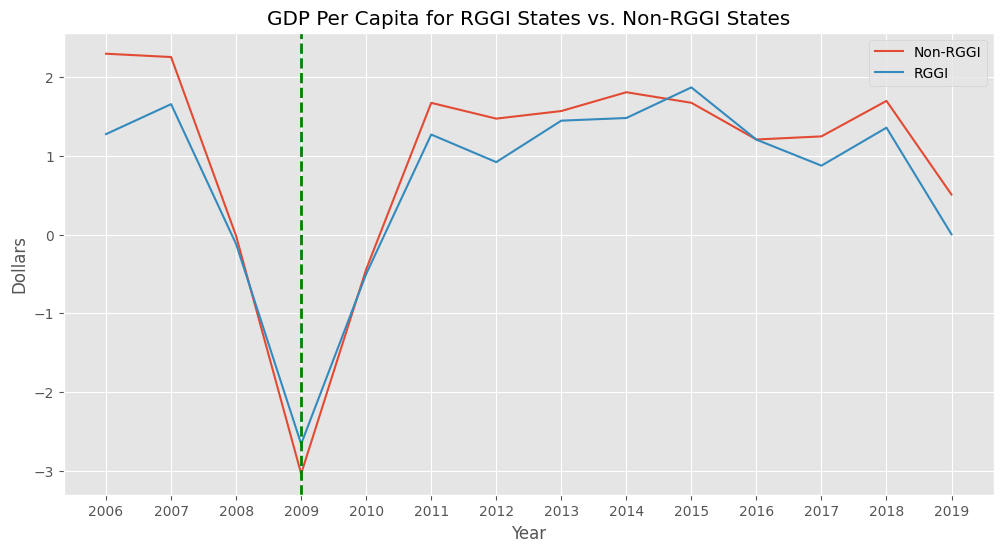

In [385]:
# Plot GDP Per Capita for RGGI States vs. Non-RGGI States

new_df_pc.iloc[:,:14].T.plot(figsize=(12,6))
plt.title('GDP Per Capita for RGGI States vs. Non-RGGI States')
plt.xlabel('Year')
plt.ylabel('Dollars')
plt.xticks(range(2006,2020))
plt.axvline(x=2009, color='green', linestyle='--', linewidth=2)
plt.legend(['Non-RGGI', 'RGGI'])
plt.show()

### b.  GDP for RGGI State vs. Average GDP US

In [386]:
GDP_pc_withus = GDP_per_capita2.copy()
GDP_pc_withus['UnitedStates_GDP_PC'] = GDP_pc_withus.mean(axis=1)

In [387]:
GDP_pc_withus.head()

GDP_PC_AL  GDP_PC_AK  GDP_PC_AZ  GDP_PC_AR  GDP_PC_CA  GDP_PC_CO  \
2006   0.035962   0.066776   0.040795   0.033977   0.050310   0.049285   
2007   0.037017   0.072885   0.042381   0.034536   0.052383   0.051718   
2008   0.036990   0.080183   0.041865   0.034686   0.053127   0.052942   
2009   0.035925   0.071481   0.038849   0.033660   0.051139   0.050527   
2010   0.037019   0.074693   0.039230   0.034737   0.052357   0.051179   

      GDP_PC_CT  GDP_PC_DE  GDP_PC_FL  GDP_PC_GA  ...  GDP_PC_TN  GDP_PC_TX  \
2006   0.062479   0.064211   0.041313   0.044345  ...   0.040005   0.047227   
2007   0.066494   0.064942   0.042613   0.044878  ...   0.040269   0.049979   
2008   0.067390   0.062746   0.041201   0.043807  ...   0.040696   0.051187   
2009   0.065498   0.064874   0.039427   0.042573  ...   0.040015   0.047158   
2010   0.065554   0.064643   0.039640   0.043046  ...   0.040554   0.049367   

      GDP_PC_UT  GDP_PC_VT  GDP_PC_VA  GDP_PC_WA  GDP_PC_WV  GDP_PC_WI  \
2006   0.042185   0.039062   0.049029   0.049329   0.031189   0.042593   
2007   0.044197   0.039773   0.050535   0.052932   0.032318   0.043816   
2008   0.044002   0.041655   0.051654   0.054066   0.034068   0.043754   
2009   0.041854   0.041771   0.051851   0.052681   0.034420   0.043605   
2010   0.042747   0.043755   0.053208   0.054199   0.035590   0.045051   

      GDP_PC_WY  UnitedStates_GDP_PC  
2006   0.062641             0.044557  
2007   0.069083             0.046355  
2008   0.078417             0.047270  
2009   0.064753             0.045778  
2010   0.066762             0.047188  

[5 rows x 51 columns]

In [388]:
GDP_pc_withus = GDP_pc_withus.T
GDP_pc_withus.tail()

2006      2007      2008      2009      2010  \
GDP_PC_WA            0.049329  0.052932  0.054066  0.052681  0.054199   
GDP_PC_WV            0.031189  0.032318  0.034068  0.034420  0.035590   
GDP_PC_WI            0.042593  0.043816  0.043754  0.043605  0.045051   
GDP_PC_WY            0.062641  0.069083  0.078417  0.064753  0.066762   
UnitedStates_GDP_PC  0.044557  0.046355  0.047270  0.045778  0.047188   

                         2011      2012      2013      2014      2015  \
GDP_PC_WA            0.055571  0.058014  0.060092  0.062344  0.064994   
GDP_PC_WV            0.037276  0.037833  0.038500  0.039205  0.038627   
GDP_PC_WI            0.046623  0.048326  0.049377  0.051173  0.053073   
GDP_PC_WY            0.070126  0.067516  0.067633  0.069388  0.065840   
UnitedStates_GDP_PC  0.048784  0.050293  0.051322  0.053022  0.054066   

                         2016      2017      2018      2019      2020  \
GDP_PC_WA            0.066605  0.069749  0.074758  0.077923  0.079359   
GDP_PC_WV            0.038630  0.041047  0.043739  0.044059  0.042730   
GDP_PC_WI            0.054035  0.054538  0.056752  0.058712  0.057764   
GDP_PC_WY            0.061650  0.064175  0.068148  0.068530  0.062898   
UnitedStates_GDP_PC  0.054620  0.056308  0.058789  0.060633  0.059371   

                         2021      2022  
GDP_PC_WA            0.087523  0.093184  
GDP_PC_WV            0.047848  0.053848  
GDP_PC_WI            0.062688  0.068186  
GDP_PC_WY            0.071633  0.081586  
UnitedStates_GDP_PC  0.065455  0.071428

#### i. Connecticut

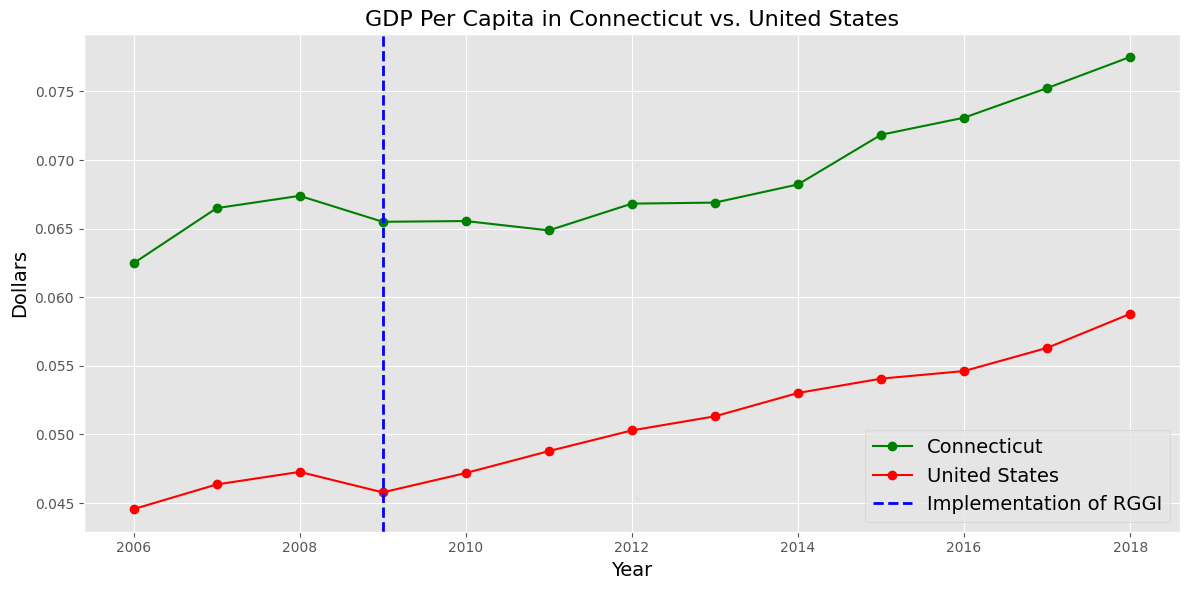

In [390]:
plt.figure(figsize=(12, 6))

GDP_pc_withus.loc['GDP_PC_CT',:'2018'].plot(kind='line', marker='o', color='green')
GDP_pc_withus.loc['UnitedStates_GDP_PC',:'2018'].plot(kind='line', marker='o', color='red')

plt.ylabel('Dollars', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=3, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Connecticut', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('GDP Per Capita in Connecticut vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### ii. Delaware

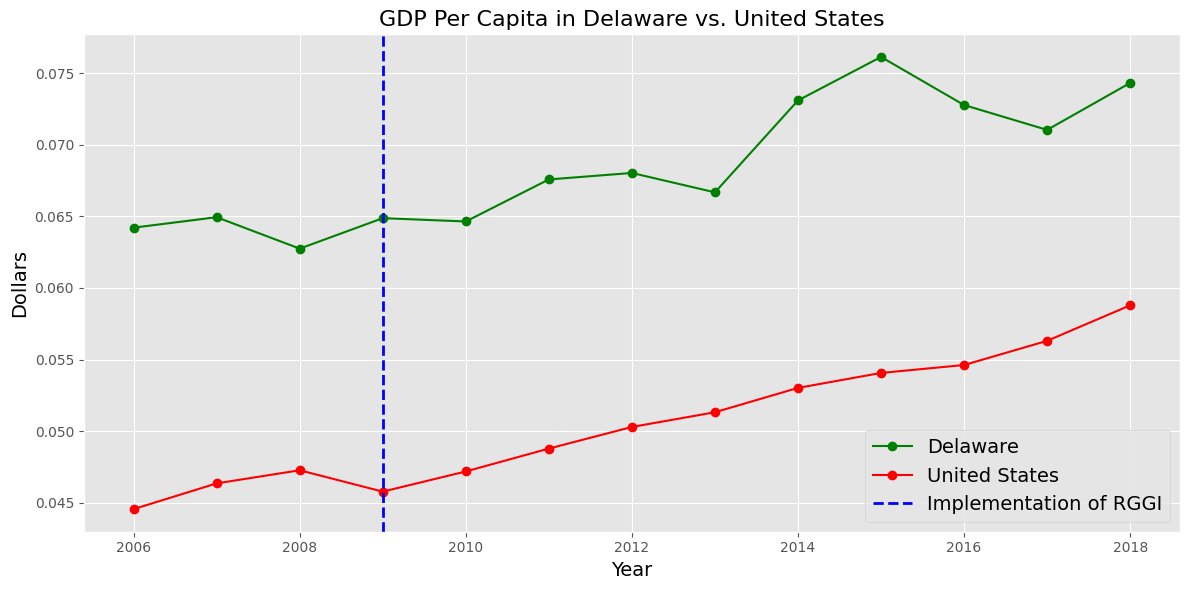

In [391]:
plt.figure(figsize=(12, 6))

GDP_pc_withus.loc['GDP_PC_DE',:'2018'].plot(kind='line', marker='o', color='green')
GDP_pc_withus.loc['UnitedStates_GDP_PC',:'2018'].plot(kind='line', marker='o', color='red')

plt.ylabel('Dollars', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=3, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Delaware', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('GDP Per Capita in Delaware vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### iii. Maine

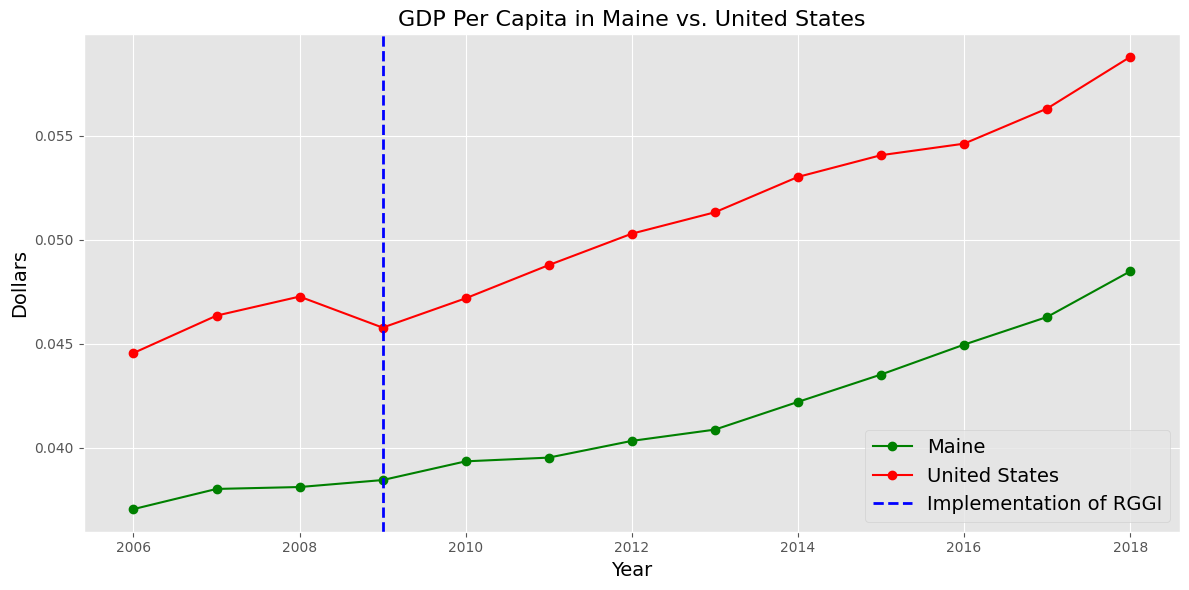

In [392]:
plt.figure(figsize=(12, 6))

GDP_pc_withus.loc['GDP_PC_ME',:'2018'].plot(kind='line', marker='o', color='green')
GDP_pc_withus.loc['UnitedStates_GDP_PC',:'2018'].plot(kind='line', marker='o', color='red')

plt.ylabel('Dollars', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=3, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Maine', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('GDP Per Capita in Maine vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### iv. Massachusetts

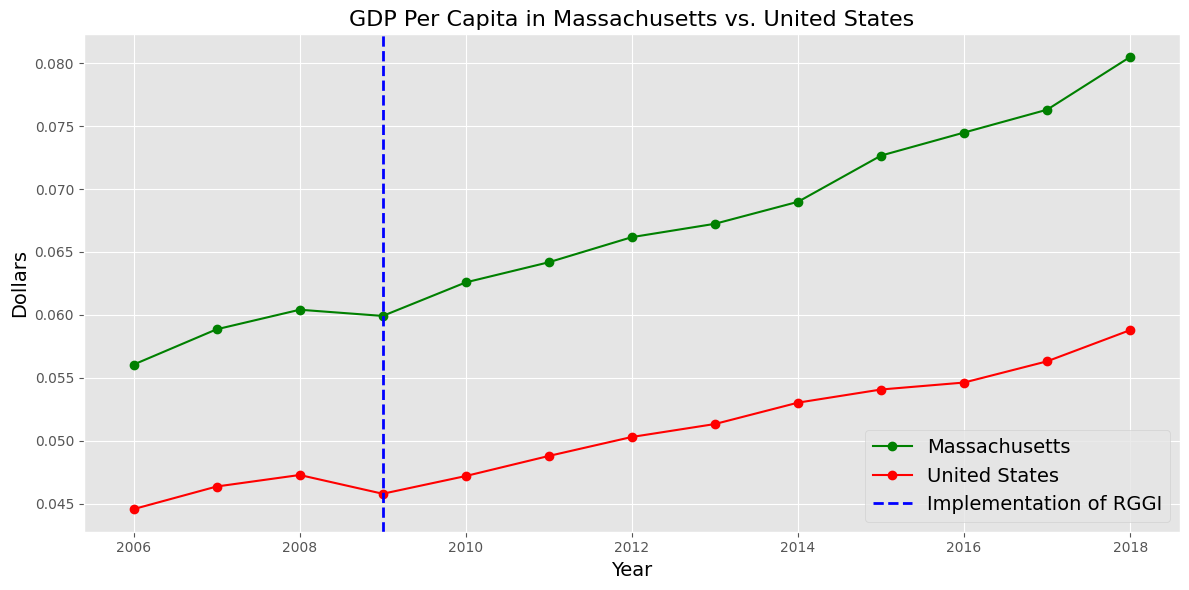

In [393]:
plt.figure(figsize=(12, 6))

GDP_pc_withus.loc['GDP_PC_MA',:'2018'].plot(kind='line', marker='o', color='green')
GDP_pc_withus.loc['UnitedStates_GDP_PC',:'2018'].plot(kind='line', marker='o', color='red')

plt.ylabel('Dollars', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=3, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Massachusetts', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('GDP Per Capita in Massachusetts vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### v. Maryland

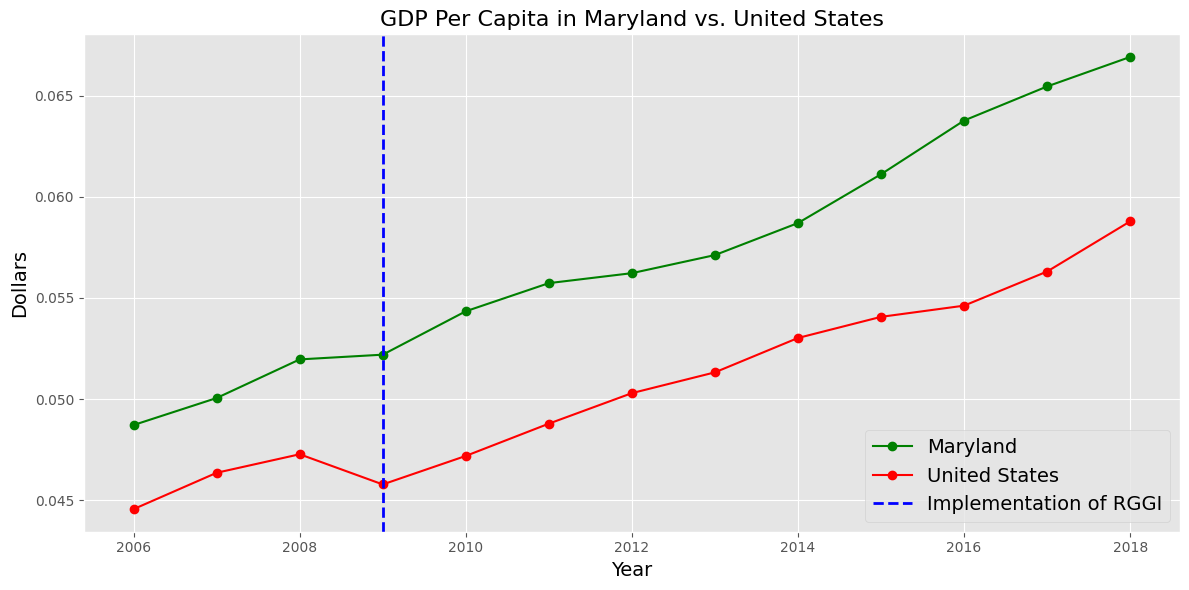

In [394]:
plt.figure(figsize=(12, 6))

GDP_pc_withus.loc['GDP_PC_MD',:'2018'].plot(kind='line', marker='o', color='green')
GDP_pc_withus.loc['UnitedStates_GDP_PC',:'2018'].plot(kind='line', marker='o', color='red')

plt.ylabel('Dollars', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=3, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Maryland', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('GDP Per Capita in Maryland vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### vi. New Hampshire

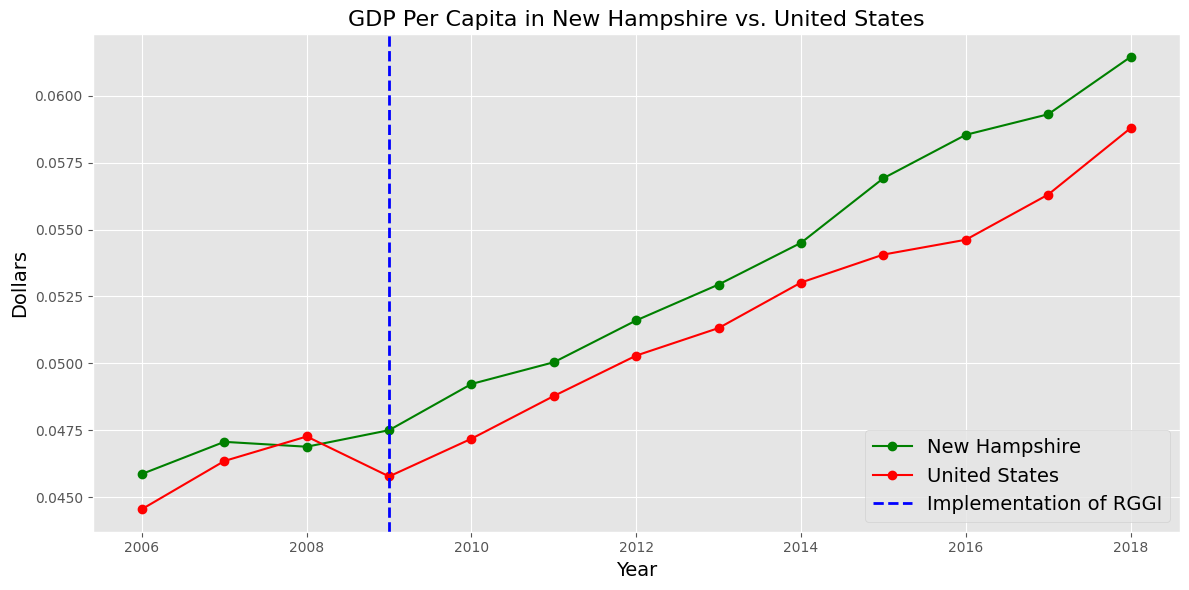

In [395]:
plt.figure(figsize=(12, 6))

GDP_pc_withus.loc['GDP_PC_NH',:'2018'].plot(kind='line', marker='o', color='green')
GDP_pc_withus.loc['UnitedStates_GDP_PC',:'2018'].plot(kind='line', marker='o', color='red')

plt.ylabel('Dollars', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=3, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['New Hampshire', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('GDP Per Capita in New Hampshire vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### vii. New Jersey

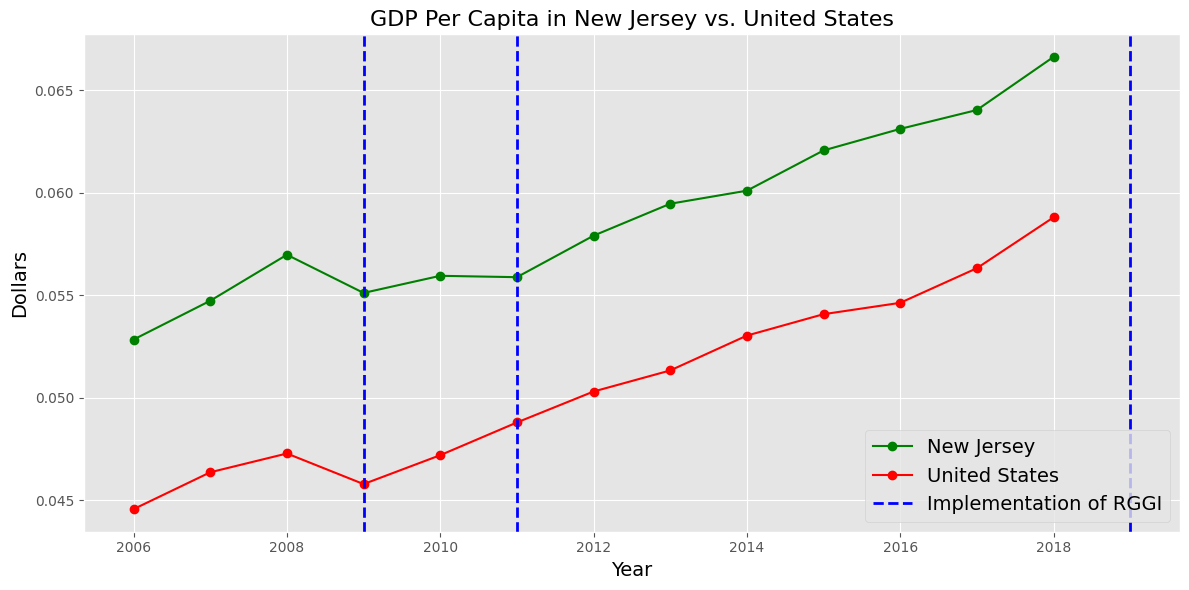

In [396]:
plt.figure(figsize=(12, 6))

GDP_pc_withus.loc['GDP_PC_NJ',:'2018'].plot(kind='line', marker='o', color='green')
GDP_pc_withus.loc['UnitedStates_GDP_PC',:'2018'].plot(kind='line', marker='o', color='red')

plt.ylabel('Dollars', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=3, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
plt.axvline(x=5, color='blue', linestyle='--', linewidth=2, label='Left RGGI')
plt.axvline(x=13, color='blue', linestyle='--', linewidth=2, label='Rejoined RGGI')
legend = plt.legend(['New Jersey', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('GDP Per Capita in New Jersey vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### viii. New York

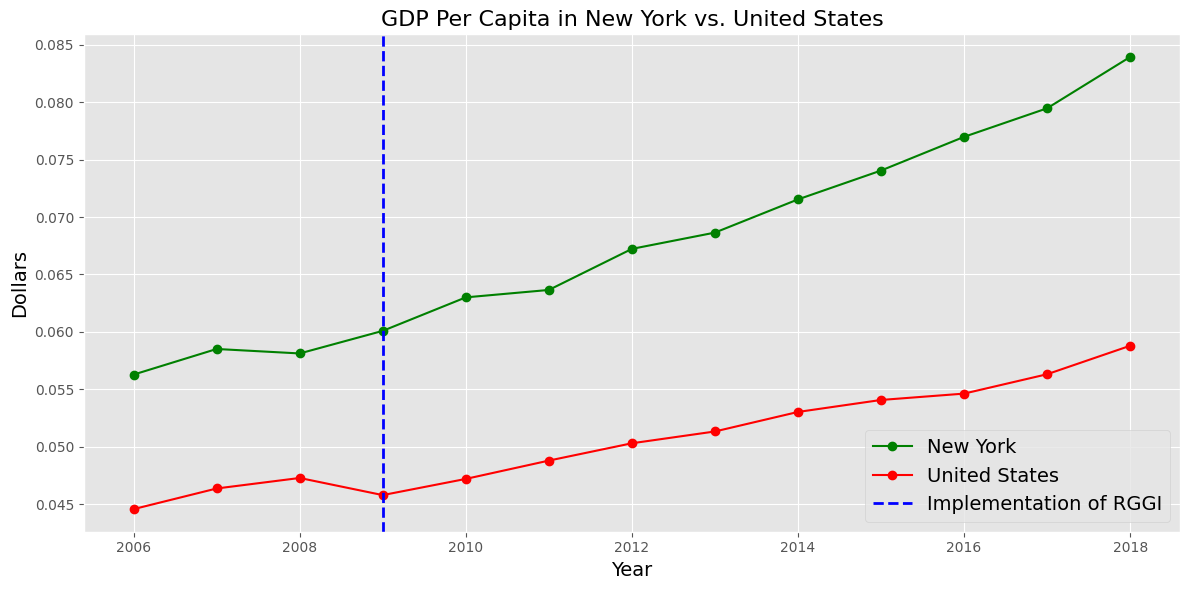

In [398]:
plt.figure(figsize=(12, 6))

GDP_pc_withus.loc['GDP_PC_NY',:'2018'].plot(kind='line', marker='o', color='green')
GDP_pc_withus.loc['UnitedStates_GDP_PC',:'2018'].plot(kind='line', marker='o', color='red')

plt.ylabel('Dollars', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=3, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')

legend = plt.legend(['New York', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('GDP Per Capita in New York vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### ix. Rhode Island

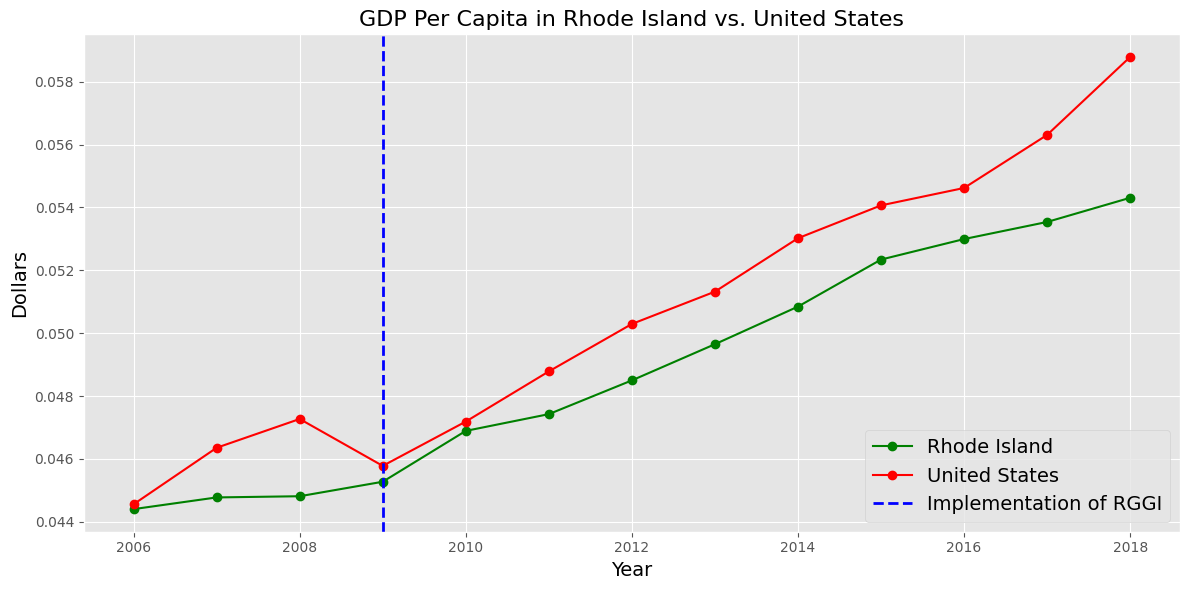

In [399]:
plt.figure(figsize=(12, 6))

GDP_pc_withus.loc['GDP_PC_RI',:'2018'].plot(kind='line', marker='o', color='green')
GDP_pc_withus.loc['UnitedStates_GDP_PC',:'2018'].plot(kind='line', marker='o', color='red')

plt.ylabel('Dollars', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=3, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Rhode Island', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('GDP Per Capita in Rhode Island vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### x. Vermont

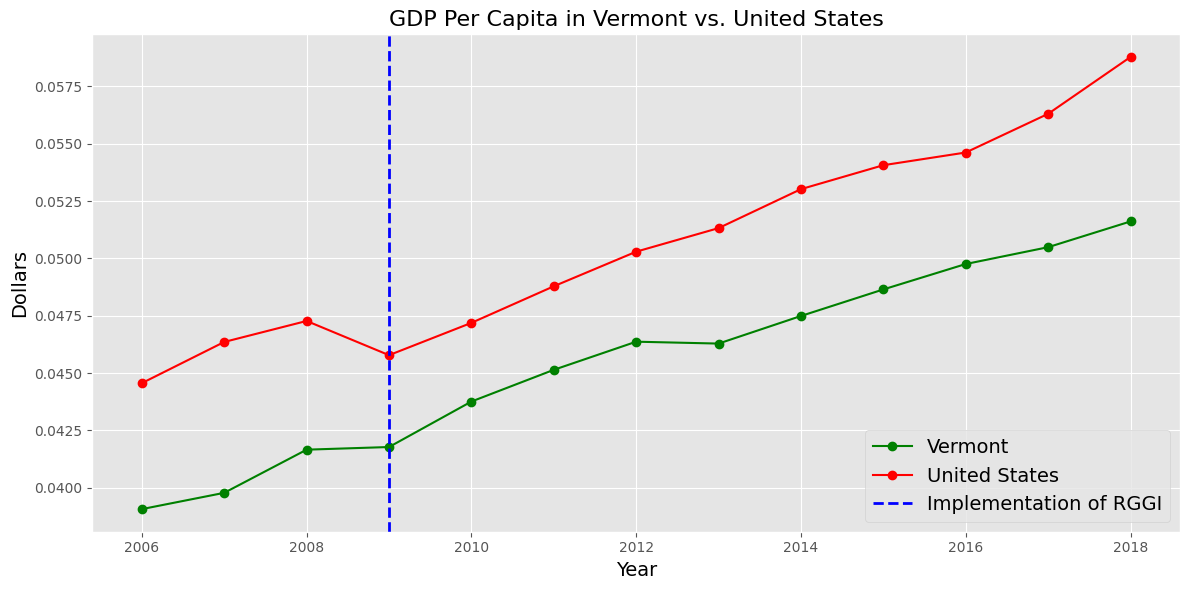

In [400]:
plt.figure(figsize=(12, 6))

GDP_pc_withus.loc['GDP_PC_VT',:'2018'].plot(kind='line', marker='o', color='green')
GDP_pc_withus.loc['UnitedStates_GDP_PC',:'2018'].plot(kind='line', marker='o', color='red')

plt.ylabel('Dollars', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=3, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Vermont', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('GDP Per Capita in Vermont vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

#### xi. Virginia

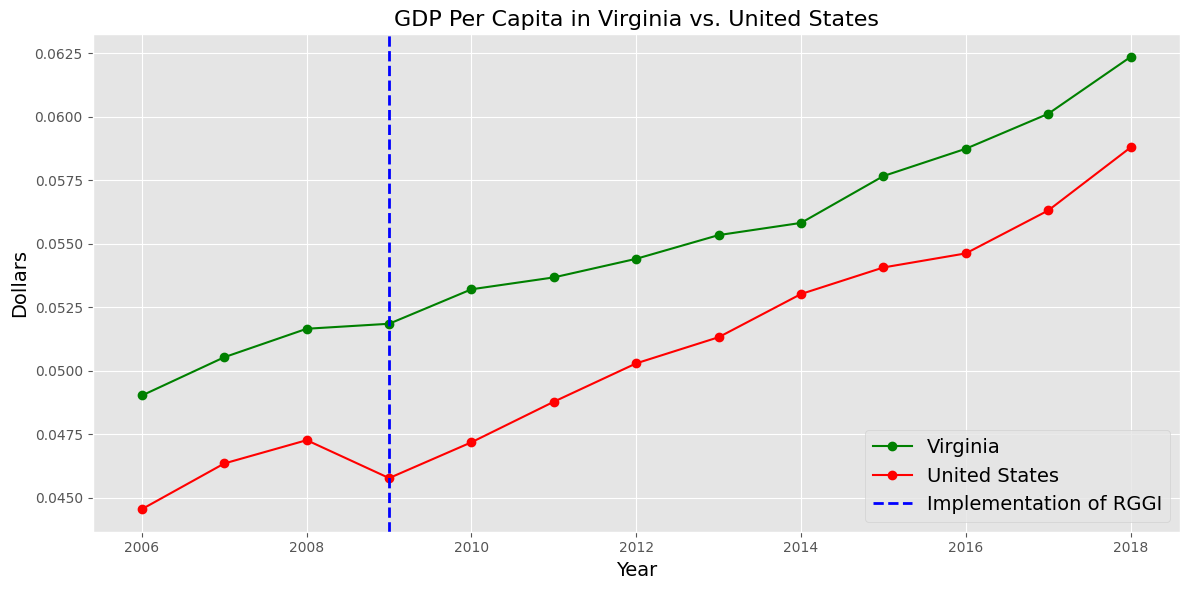

In [401]:
plt.figure(figsize=(12, 6))

GDP_pc_withus.loc['GDP_PC_VA',:'2018'].plot(kind='line', marker='o', color='green')
GDP_pc_withus.loc['UnitedStates_GDP_PC',:'2018'].plot(kind='line', marker='o', color='red')

plt.ylabel('Dollars', color='black', fontsize=14)
plt.xlabel('Year', color='black', fontsize=14)
plt.axvline(x=3, color='blue', linestyle='--', linewidth=2, label='Implementation of RGGI')
legend = plt.legend(['Virginia', 'United States', 'Implementation of RGGI'], loc='lower right', fontsize=14)
plt.title('GDP Per Capita in Virginia vs. United States', fontsize=16)
plt.tight_layout()
plt.show()

### c. Regression GDP~RGGI Indicator

In [406]:
gdp_pc_T_index = gdp_pc_T .copy()
gdp_pc_T_index['State'] = gdp_pc_T_index.index
gdp_pc_T_index = gdp_pc_T_index.reset_index()
gdp_pc_T_index.columns

Index(['index', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       'RGGI', 'State'],
      dtype='object')

In [407]:
gdp_pc_T_index.head()

index      2006      2007      2008      2009      2010      2011  \
0  GDP_PC_AL  0.035962  0.037017  0.036990  0.035925  0.037019  0.038219   
1  GDP_PC_AK  0.066776  0.072885  0.080183  0.071481  0.074693  0.078748   
2  GDP_PC_AZ  0.040795  0.042381  0.041865  0.038849  0.039230  0.040474   
3  GDP_PC_AR  0.033977  0.034536  0.034686  0.033660  0.034737  0.035990   
4  GDP_PC_CA  0.050310  0.052383  0.053127  0.051139  0.052357  0.053744   

       2012      2013      2014      2015      2016      2017      2018  \
0  0.039106  0.040043  0.040396  0.041232  0.042057  0.043336  0.044984   
1  0.079720  0.077565  0.076575  0.069664  0.068237  0.071840  0.074418   
2  0.041713  0.042447  0.043335  0.044590  0.046031  0.048257  0.050485   
3  0.036791  0.038321  0.039221  0.039654  0.039976  0.040948  0.042551   
4  0.055651  0.057987  0.060443  0.063480  0.065513  0.069215  0.073280   

       2019      2020      2021      2022  RGGI      State  
0  0.046281  0.045891  0.050320  0.054750     0  GDP_PC_AL  
1  0.074478  0.068868  0.078113  0.086722     0  GDP_PC_AK  
2  0.052669  0.053214  0.057816  0.062364     0  GDP_PC_AZ  
3  0.043797  0.044446  0.049098  0.054248     0  GDP_PC_AR  
4  0.076937  0.076457  0.086177  0.092190     0  GDP_PC_CA

In [417]:
# Select Columns for Regression Analysis

selected_columns_gdppc = gdp_pc_T_index.loc[:, ['State', '2011', '2008','RGGI']]
selected_columns_gdppc.columns = ['State', 'GDP_2011', 'GDP_2008', 'RGGI']
selected_columns_gdppc.head()

State  GDP_2011  GDP_2008  RGGI
0  GDP_PC_AL  0.038219  0.036990     0
1  GDP_PC_AK  0.078748  0.080183     0
2  GDP_PC_AZ  0.040474  0.041865     0
3  GDP_PC_AR  0.035990  0.034686     0
4  GDP_PC_CA  0.053744  0.053127     0

In [418]:
# Regression 2011_Unemployment~RGGI+2008_Unemployment

lm_gdppc = smf.ols(formula='GDP_2011~RGGI+GDP_2008', data = selected_columns_gdppc).fit()
print(lm_gdppc.summary())

                            OLS Regression Results                            
Dep. Variable:               GDP_2011   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     295.7
Date:                Mon, 29 Apr 2024   Prob (F-statistic):           2.37e-27
Time:                        20:23:08   Log-Likelihood:                 226.74
No. Observations:                  50   AIC:                            -447.5
Df Residuals:                      47   BIC:                            -441.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0053      0.002      2.816      0.0

## 5. GDP (Percent of National)

In [419]:
# GDP National

GDP_National = pd.merge(Alabama['AL_GDP_National'], Alaska['AK_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Arizona['AZ_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Arkansas['AR_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, California['CA_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Colorado['CO_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Connecticut['CT_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Delaware['DE_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Florida['FL_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Georgia['GA_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Hawaii['HI_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Idaho['ID_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Illinois['IL_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Indiana['IN_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Iowa['IA_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Kansas['KS_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Kentucky['KY_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Louisiana['LA_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Maine['ME_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Maryland['MD_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Massachusetts['MA_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Michigan['MI_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Minnesota['MN_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Mississippi['MS_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Missouri['MO_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Montana['MT_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Nebraska['NE_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Nevada['NV_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, NewHampshire['NH_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, NewJersey['NJ_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, NewMexico['NM_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, NewYork['NY_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, NorthCarolina['NC_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, NorthDakota['ND_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Ohio['OH_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Oklahoma['OK_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Oregon['OR_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Pennsylvania['PA_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, RhodeIsland['RI_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, SouthCarolina['SC_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, SouthDakota['SD_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Tennessee['TN_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Texas['TX_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Utah['UT_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Vermont['VT_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Virginia['VA_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Washington['WA_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, WestVirginia['WV_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Wisconsin['WI_GDP_National'], left_index=True, right_index=True)
GDP_National = pd.merge(GDP_National, Wyoming['WY_GDP_National'], left_index=True, right_index=True)
GDP_National

AL_GDP_National  AK_GDP_National  AZ_GDP_National  AR_GDP_National  \
2006         1.204936         0.326400         1.780287         0.693963   
2007         1.195056         0.342565         1.805913         0.679702   
2008         1.181638         0.373209         1.780152         0.675069   
2009         1.180620         0.345058         1.702052         0.673488   
2010         1.177816         0.354387         1.668905         0.674375   
2011         1.178973         0.364726         1.672565         0.678012   
2012         1.164303         0.358581         1.669992         0.667481   
2013         1.156472         0.339886         1.654031         0.672244   
2014         1.124782         0.321839         1.639062         0.661737   
2015         1.111568         0.282823         1.644474         0.646966   
2016         1.109212         0.271342         1.674670         0.637345   
2017         1.101826         0.273659         1.704554         0.628765   
2018         1.090238         0.267372         1.713722         0.621124   
2019         1.083028         0.255967         1.741705         0.615399   
2020         1.096329         0.239668         1.814168         0.636116   
2021         1.089894         0.245976         1.801524         0.637682   
2022         1.091075         0.249848         1.802438         0.648872   

      CA_GDP_National  CO_GDP_National  CT_GDP_National  DE_GDP_National  \
2006        13.117145         1.683944         1.590728         0.399364   
2007        13.119194         1.716475         1.620402         0.391128   
2008        13.166645         1.752702         1.617732         0.375493   
2009        13.055375         1.735230         1.611339         0.399568   
2010        12.984893         1.716398         1.559575         0.386495   
2011        12.971378         1.714876         1.494633         0.393418   
2012        13.000494         1.703111         1.482173         0.383627   
2013        13.182711         1.734472         1.433917         0.366416   
2014        13.305955         1.763706         1.405056         0.389470   
2015        13.586470         1.761621         1.425285         0.395001   
2016        13.744955         1.764696         1.410371         0.370979   
2017        14.009837         1.792630         1.393636         0.350677   
2018        14.109933         1.812746         1.363280         0.351474   
2019        14.230848         1.845260         1.349500         0.359776   
2020        14.340482         1.857809         1.311572         0.360004   
2021        14.468063         1.871576         1.279838         0.348101   
2022        14.130864         1.902277         1.263983         0.343737   

      FL_GDP_National  GA_GDP_National  ...  SD_GDP_National  TN_GDP_National  \
2006         5.432444         2.938824  ...         0.234261         1.763110   
2007         5.407629         2.898989  ...         0.242313         1.718174   
2008         5.168237         2.819103  ...         0.247822         1.721357   
2009         5.079552         2.829043  ...         0.251642         1.742862   
2010         4.963322         2.778205  ...         0.251529         1.712915   
2011         4.841366         2.767060  ...         0.268544         1.729608   
2012         4.789876         2.754802  ...         0.270097         1.761671   
2013         4.819464         2.759291  ...         0.269313         1.756571   
2014         4.852758         2.792365  ...         0.266573         1.744394   
2015         4.990216         2.861735  ...         0.264035         1.786738   
2016         5.099476         2.928824  ...         0.262911         1.799476   
2017         5.150314         2.945871  ...         0.257902         1.801266   
2018         5.149040         2.933642  ...         0.254708         1.768151   
2019         5.198042         2.983926  ...         0.252567         1.777882   
2020         5.302477         2.969666  ...         0

In [420]:
National_T = GDP_National.T 
National_T.head()

2006       2007       2008       2009       2010  \
AL_GDP_National   1.204936   1.195056   1.181638   1.180620   1.177816   
AK_GDP_National   0.326400   0.342565   0.373209   0.345058   0.354387   
AZ_GDP_National   1.780287   1.805913   1.780152   1.702052   1.668905   
AR_GDP_National   0.693963   0.679702   0.675069   0.673488   0.674375   
CA_GDP_National  13.117145  13.119194  13.166645  13.055375  12.984893   

                      2011       2012       2013       2014       2015  \
AL_GDP_National   1.178973   1.164303   1.156472   1.124782   1.111568   
AK_GDP_National   0.364726   0.358581   0.339886   0.321839   0.282823   
AZ_GDP_National   1.672565   1.669992   1.654031   1.639062   1.644474   
AR_GDP_National   0.678012   0.667481   0.672244   0.661737   0.646966   
CA_GDP_National  12.971378  13.000494  13.182711  13.305955  13.586470   

                      2016       2017       2018       2019       2020  \
AL_GDP_National   1.109212   1.101826   1.090238   1.083028   1.096329   
AK_GDP_National   0.271342   0.273659   0.267372   0.255967   0.239668   
AZ_GDP_National   1.674670   1.704554   1.713722   1.741705   1.814168   
AR_GDP_National   0.637345   0.628765   0.621124   0.615399   0.636116   
CA_GDP_National  13.744955  14.009837  14.109933  14.230848  14.340482   

                      2021       2022  
AL_GDP_National   1.089894   1.091075  
AK_GDP_National   0.245976   0.249848  
AZ_GDP_National   1.801524   1.802438  
AR_GDP_National   0.637682   0.648872  
CA_GDP_National  14.468063  14.130864

In [421]:
National_T['RGGI'] = RGGI_Status3
National_T.tail(10)

2006      2007      2008      2009      2010      2011  \
SD_GDP_National  0.234261  0.242313  0.247822  0.251642  0.251529  0.268544   
TN_GDP_National  1.763110  1.718174  1.721357  1.742862  1.712915  1.729608   
TX_GDP_National  7.985169  8.229061  8.424553  8.078480  8.279367  8.598446   
UT_GDP_National  0.771139  0.793226  0.793365  0.787297  0.788558  0.804918   
VT_GDP_National  0.176116  0.171323  0.176029  0.180267  0.182116  0.182174   
VA_GDP_National  2.723271  2.706188  2.739598  2.838552  2.837353  2.789665   
WA_GDP_National  2.274715  2.362988  2.402149  2.426049  2.428723  2.433214   
WV_GDP_National  0.412650  0.409511  0.424478  0.439290  0.438560  0.443816   
WI_GDP_National  1.719575  1.698464  1.671068  1.707479  1.703990  1.707494   
WY_GDP_National  0.236981  0.255287  0.289910  0.250393  0.250387  0.254821   

                     2012      2013      2014      2015      2016      2017  \
SD_GDP_National  0.270097  0.269313  0.266573  0.264035  0.262911  0.257902   
TN_GDP_National  1.761671  1.756571  1.744394  1.786738  1.799476  1.801266   
TX_GDP_National  8.743588  8.995891  8.998505  8.642735  8.446140  8.590673   
UT_GDP_National  0.796805  0.804185  0.809940  0.819253  0.844217  0.865878   
VT_GDP_National  0.179903  0.173896  0.171500  0.169907  0.169356  0.165660   
VA_GDP_National  2.743783  2.717065  2.650505  2.657288  2.653214  2.624152   
WA_GDP_National  2.464202  2.488200  2.510717  2.563381  2.606431  2.666738   
WV_GDP_National  0.432646  0.424394  0.413934  0.391730  0.379374  0.384139   
WI_GDP_National  1.704858  1.687749  1.684812  1.689045  1.679976  1.634260   
WY_GDP_National  0.239052  0.233268  0.229681  0.211067  0.191917  0.189865   

                     2018      2019      2020      2021      2022  RGGI  
SD_GDP_National  0.254708  0.252567  0.264387  0.264570  0.265371     0  
TN_GDP_National  1.768151  1.777882  1.799613  1.831971  1.868438     0  
TX_GDP_National  8.812115  8.693512  8.499018  8.800178  9.252584     0  
UT_GDP_National  0.898344  0.919223  0.959776  0.966500  0.974665     0  
VT_GDP_National  0.161042  0.160099  0.161528  0.159141  0.159516     1  
VA_GDP_National  2.595359  2.608695  2.644730  2.594705  2.550366     0  
WA_GDP_National  2.748319  2.783932  2.910519  2.905799  2.849316     0  
WV_GDP_National  0.385685  0.371010  0.363467  0.366433  0.375405     0  
WI_GDP_National  1.619333  1.614690  1.617205  1.580999  1.577960     0  
WY_GDP_National  0.190774  0.184407  0.172505  0.178040  0.186282     0

In [437]:
# Groupby: Accurate RGGI Statuses (Only 9 States: CT, DE, ME, MA, MD, NH, NY, RI, VT)

# THIS TABLE MIGHT BE USEFUL

NationalGB = National_T.groupby(['RGGI']).sum()
NationalGB

2006       2007       2008       2009       2010       2011  \
RGGI                                                                     
0     83.099503  83.168697  83.251389  82.546888  82.415466  82.613677   
1     15.664276  15.589084  15.456180  16.081410  16.188698  15.970111   

           2012       2013       2014       2015       2016       2017  \
RGGI                                                                     
0     82.556097  82.789571  82.813474  82.719463  82.596397  82.796237   
1     16.057262  15.857628  15.857897  15.981206  16.127802  15.960926   

           2018       2019       2020       2021       2022  
RGGI                                                         
0     82.810914  82.745002  82.798334  83.111698  83.380877  
1     15.902764  15.973564  15.872363  15.644059  15.407068

In [438]:
NationalGB.columns = NationalGB.columns.astype('int')

### a.  Percent of National GDP for RGGI States vs. Non-RGGI States

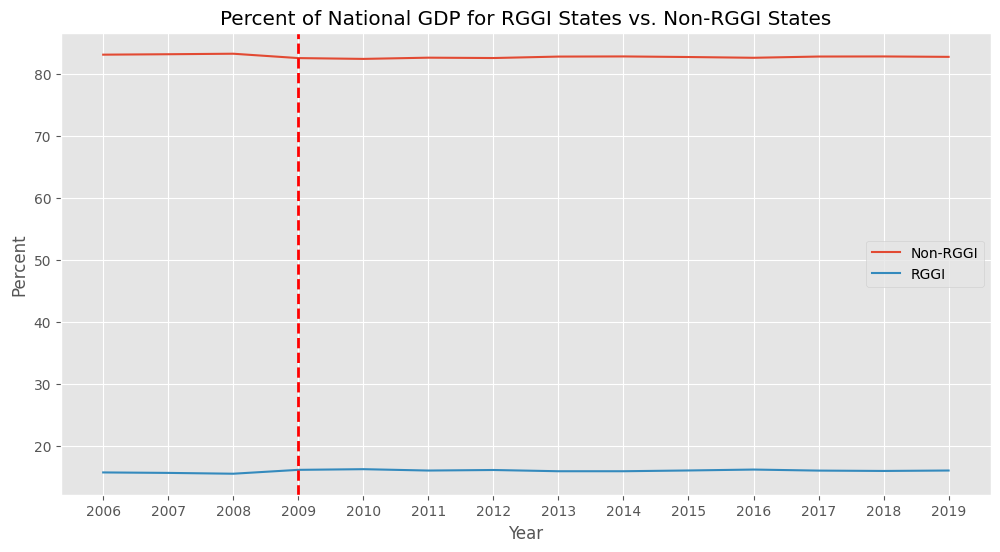

In [439]:
# Plot Percent of National GDP for RGGI States vs. Non-RGGI States

NationalGB.iloc[:,:14].T.plot(figsize=(12,6))
plt.title('Percent of National GDP for RGGI States vs. Non-RGGI States')
plt.xlabel('Year')
plt.ylabel('Percent')
plt.xticks(range(2006,2020))
plt.axvline(x=2009, color='red', linestyle='--', linewidth=2)
plt.legend(['Non-RGGI', 'RGGI'])
plt.show()

In [425]:
NationalPC = GDP_National.copy()

NationalPC['NationalPC_AL'] = NationalPC['AL_GDP_National'].diff()
NationalPC['NationalPC_AK'] = NationalPC['AK_GDP_National'].diff()
NationalPC['NationalPC_AZ'] = NationalPC['AZ_GDP_National'].diff()
NationalPC['NationalPC_AR'] = NationalPC['AR_GDP_National'].diff()
NationalPC['NationalPC_CA'] = NationalPC['CA_GDP_National'].diff()
NationalPC['NationalPC_CO'] = NationalPC['CO_GDP_National'].diff()
NationalPC['NationalPC_CT'] = NationalPC['CT_GDP_National'].diff()
NationalPC['NationalPC_DE'] = NationalPC['DE_GDP_National'].diff()
NationalPC['NationalPC_FL'] = NationalPC['FL_GDP_National'].diff()
NationalPC['NationalPC_GA'] = NationalPC['GA_GDP_National'].diff()
NationalPC['NationalPC_HI'] = NationalPC['HI_GDP_National'].diff()
NationalPC['NationalPC_ID'] = NationalPC['ID_GDP_National'].diff()
NationalPC['NationalPC_IL'] = NationalPC['IL_GDP_National'].diff()
NationalPC['NationalPC_IN'] = NationalPC['IN_GDP_National'].diff()
NationalPC['NationalPC_IA'] = NationalPC['IA_GDP_National'].diff()
NationalPC['NationalPC_KS'] = NationalPC['KS_GDP_National'].diff()
NationalPC['NationalPC_KY'] = NationalPC['KY_GDP_National'].diff()
NationalPC['NationalPC_LA'] = NationalPC['LA_GDP_National'].diff()
NationalPC['NationalPC_ME'] = NationalPC['ME_GDP_National'].diff()
NationalPC['NationalPC_MD'] = NationalPC['MD_GDP_National'].diff()
NationalPC['NationalPC_MA'] = NationalPC['MA_GDP_National'].diff()
NationalPC['NationalPC_MI'] = NationalPC['MI_GDP_National'].diff()
NationalPC['NationalPC_MN'] = NationalPC['MN_GDP_National'].diff()
NationalPC['NationalPC_MS'] = NationalPC['MS_GDP_National'].diff()
NationalPC['NationalPC_MO'] = NationalPC['MO_GDP_National'].diff()
NationalPC['NationalPC_MT'] = NationalPC['MT_GDP_National'].diff()
NationalPC['NationalPC_NE'] = NationalPC['NE_GDP_National'].diff()
NationalPC['NationalPC_NV'] = NationalPC['NV_GDP_National'].diff()
NationalPC['NationalPC_NH'] = NationalPC['NH_GDP_National'].diff()
NationalPC['NationalPC_NJ'] = NationalPC['NJ_GDP_National'].diff()
NationalPC['NationalPC_NM'] = NationalPC['NM_GDP_National'].diff()
NationalPC['NationalPC_NY'] = NationalPC['NY_GDP_National'].diff()
NationalPC['NationalPC_NC'] = NationalPC['NC_GDP_National'].diff()
NationalPC['NationalPC_ND'] = NationalPC['ND_GDP_National'].diff()
NationalPC['NationalPC_OH'] = NationalPC['OH_GDP_National'].diff()
NationalPC['NationalPC_OR'] = NationalPC['OR_GDP_National'].diff()
NationalPC['NationalPC_OK'] = NationalPC['OK_GDP_National'].diff()
NationalPC['NationalPC_PA'] = NationalPC['PA_GDP_National'].diff()
NationalPC['NationalPC_RI'] = NationalPC['RI_GDP_National'].diff()
NationalPC['NationalPC_SC'] = NationalPC['SC_GDP_National'].diff()
NationalPC['NationalPC_SD'] = NationalPC['SD_GDP_National'].diff()
NationalPC['NationalPC_TN'] = NationalPC['TN_GDP_National'].diff()
NationalPC['NationalPC_TX'] = NationalPC['TX_GDP_National'].diff()
NationalPC['NationalPC_UT'] = NationalPC['UT_GDP_National'].diff()
NationalPC['NationalPC_VT'] = NationalPC['VT_GDP_National'].diff()
NationalPC['NationalPC_VA'] = NationalPC['VA_GDP_National'].diff()
NationalPC['NationalPC_WA'] = NationalPC['WA_GDP_National'].diff()
NationalPC['NationalPC_WV'] = NationalPC['WV_GDP_National'].diff()
NationalPC['NationalPC_WI'] = NationalPC['WI_GDP_National'].diff()
NationalPC['NationalPC_WY'] = NationalPC['WY_GDP_National'].diff()
NationalPC

AL_GDP_National  AK_GDP_National  AZ_GDP_National  AR_GDP_National  \
2006         1.204936         0.326400         1.780287         0.693963   
2007         1.195056         0.342565         1.805913         0.679702   
2008         1.181638         0.373209         1.780152         0.675069   
2009         1.180620         0.345058         1.702052         0.673488   
2010         1.177816         0.354387         1.668905         0.674375   
2011         1.178973         0.364726         1.672565         0.678012   
2012         1.164303         0.358581         1.669992         0.667481   
2013         1.156472         0.339886         1.654031         0.672244   
2014         1.124782         0.321839         1.639062         0.661737   
2015         1.111568         0.282823         1.644474         0.646966   
2016         1.109212         0.271342         1.674670         0.637345   
2017         1.101826         0.273659         1.704554         0.628765   
2018         1.090238         0.267372         1.713722         0.621124   
2019         1.083028         0.255967         1.741705         0.615399   
2020         1.096329         0.239668         1.814168         0.636116   
2021         1.089894         0.245976         1.801524         0.637682   
2022         1.091075         0.249848         1.802438         0.648872   

      CA_GDP_National  CO_GDP_National  CT_GDP_National  DE_GDP_National  \
2006        13.117145         1.683944         1.590728         0.399364   
2007        13.119194         1.716475         1.620402         0.391128   
2008        13.166645         1.752702         1.617732         0.375493   
2009        13.055375         1.735230         1.611339         0.399568   
2010        12.984893         1.716398         1.559575         0.386495   
2011        12.971378         1.714876         1.494633         0.393418   
2012        13.000494         1.703111         1.482173         0.383627   
2013        13.182711         1.734472         1.433917         0.366416   
2014        13.305955         1.763706         1.405056         0.389470   
2015        13.586470         1.761621         1.425285         0.395001   
2016        13.744955         1.764696         1.410371         0.370979   
2017        14.009837         1.792630         1.393636         0.350677   
2018        14.109933         1.812746         1.363280         0.351474   
2019        14.230848         1.845260         1.349500         0.359776   
2020        14.340482         1.857809         1.311572         0.360004   
2021        14.468063         1.871576         1.279838         0.348101   
2022        14.130864         1.902277         1.263983         0.343737   

      FL_GDP_National  GA_GDP_National  ...  NationalPC_SD  NationalPC_TN  \
2006         5.432444         2.938824  ...            NaN            NaN   
2007         5.407629         2.898989  ...       0.008053      -0.044936   
2008         5.168237         2.819103  ...       0.005509       0.003183   
2009         5.079552         2.829043  ...       0.003820       0.021506   
2010         4.963322         2.778205  ...      -0.000113      -0.029948   
2011         4.841366         2.767060  ...       0.017015       0.016693   
2012         4.789876         2.754802  ...       0.001553       0.032063   
2013         4.819464         2.759291  ...      -0.000784      -0.005100   
2014         4.852758         2.792365  ...      -0.002740      -0.012177   
2015         4.990216         2.861735  ...      -0.002538       0.042345   
2016         5.099476         2.928824  ...      -0.001124       0.012737   
2017         5.150314         2.945871  ...      -0.005008       0.001791   
2018         5.149040         2.933642  ...      -0.003195      -0.033115   
2019         5.198042         2.983926  ...      -0.002141       0.009731   
2020         5.302477         2.969666  ...       0.011820       0.021731   
2021         5.385177         2.9664

In [426]:
NationalPC = NationalPC.iloc[:,50:]
NationalPC

NationalPC_AL  NationalPC_AK  NationalPC_AZ  NationalPC_AR  \
2006            NaN            NaN            NaN            NaN   
2007      -0.009880       0.016165       0.025626      -0.014262   
2008      -0.013418       0.030644      -0.025761      -0.004633   
2009      -0.001018      -0.028151      -0.078100      -0.001581   
2010      -0.002803       0.009329      -0.033148       0.000887   
2011       0.001157       0.010339       0.003660       0.003637   
2012      -0.014670      -0.006145      -0.002573      -0.010532   
2013      -0.007831      -0.018694      -0.015962       0.004763   
2014      -0.031691      -0.018048      -0.014969      -0.010506   
2015      -0.013213      -0.039015       0.005412      -0.014771   
2016      -0.002356      -0.011481       0.030196      -0.009621   
2017      -0.007387       0.002317       0.029884      -0.008580   
2018      -0.011587      -0.006287       0.009167      -0.007641   
2019      -0.007211      -0.011405       0.027983      -0.005725   
2020       0.013301      -0.016299       0.072463       0.020717   
2021      -0.006435       0.006308      -0.012644       0.001566   
2022       0.001181       0.003872       0.000914       0.011190   

      NationalPC_CA  NationalPC_CO  NationalPC_CT  NationalPC_DE  \
2006            NaN            NaN            NaN            NaN   
2007       0.002049       0.032531       0.029674      -0.008235   
2008       0.047451       0.036227      -0.002670      -0.015635   
2009      -0.111270      -0.017473      -0.006393       0.024075   
2010      -0.070481      -0.018832      -0.051764      -0.013073   
2011      -0.013516      -0.001522      -0.064942       0.006923   
2012       0.029117      -0.011766      -0.012460      -0.009791   
2013       0.182217       0.031361      -0.048256      -0.017211   
2014       0.123244       0.029235      -0.028861       0.023054   
2015       0.280515      -0.002086       0.020229       0.005530   
2016       0.158485       0.003075      -0.014915      -0.024021   
2017       0.264881       0.027934      -0.016735      -0.020303   
2018       0.100096       0.020116      -0.030356       0.000797   
2019       0.120915       0.032515      -0.013780       0.008303   
2020       0.109634       0.012548      -0.037928       0.000228   
2021       0.127582       0.013768      -0.031734      -0.011903   
2022      -0.337199       0.030701      -0.015854      -0.004364   

      NationalPC_FL  NationalPC_GA  ...  NationalPC_SD  NationalPC_TN  \
2006            NaN            NaN  ...            NaN            NaN   
2007      -0.024815      -0.039834  ...       0.008053      -0.044936   
2008      -0.239391      -0.079886  ...       0.005509       0.003183   
2009      -0.088685       0.009941  ...       0.003820       0.021506   
2010      -0.116230      -0.050838  ...      -0.000113      -0.029948   
2011      -0.121957      -0.011146  ...       0.017015       0.016693   
2012      -0.051490      -0.012258  ...       0.001553       0.032063   
2013       0.029588       0.004489  ...      -0.000784      -0.005100   
2014       0.033295       0.033074  ...      -0.002740      -0.012177   
2015       0.137458       0.069370  ...      -0.002538       0.042345   
2016       0.109260       0.067088  ...      -0.001124       0.012737   
2017       0.050838       0.017047  ...      -0.005008       0.001791   
2018      -0.001274      -0.012229  ...      -0.003195      -0.033115   
2019       0.049002       0.050284  ...      -0.002141       0.009731   
2020       0.104435      -0.014260  ...       0.011820       0.021731   
2021       0.082700      -0.003230  ...       0.000183       0.032358   
2022       0.070131       0.001424  ...       0.000801       0.036467   

      NationalPC_TX  NationalPC_UT  NationalPC_VT  NationalPC_VA  \
2006            NaN            NaN            NaN            NaN   
2007       0.243893       0.022088      -0.004793      -0.017083   
2008       0.195492       0.000138   

In [427]:
NationalPC_T = NationalPC.T 
NationalPC_T.head()

2006      2007      2008      2009      2010      2011  \
NationalPC_AL   NaN -0.009880 -0.013418 -0.001018 -0.002803  0.001157   
NationalPC_AK   NaN  0.016165  0.030644 -0.028151  0.009329  0.010339   
NationalPC_AZ   NaN  0.025626 -0.025761 -0.078100 -0.033148  0.003660   
NationalPC_AR   NaN -0.014262 -0.004633 -0.001581  0.000887  0.003637   
NationalPC_CA   NaN  0.002049  0.047451 -0.111270 -0.070481 -0.013516   

                   2012      2013      2014      2015      2016      2017  \
NationalPC_AL -0.014670 -0.007831 -0.031691 -0.013213 -0.002356 -0.007387   
NationalPC_AK -0.006145 -0.018694 -0.018048 -0.039015 -0.011481  0.002317   
NationalPC_AZ -0.002573 -0.015962 -0.014969  0.005412  0.030196  0.029884   
NationalPC_AR -0.010532  0.004763 -0.010506 -0.014771 -0.009621 -0.008580   
NationalPC_CA  0.029117  0.182217  0.123244  0.280515  0.158485  0.264881   

                   2018      2019      2020      2021      2022  
NationalPC_AL -0.011587 -0.007211  0.013301 -0.006435  0.001181  
NationalPC_AK -0.006287 -0.011405 -0.016299  0.006308  0.003872  
NationalPC_AZ  0.009167  0.027983  0.072463 -0.012644  0.000914  
NationalPC_AR -0.007641 -0.005725  0.020717  0.001566  0.011190  
NationalPC_CA  0.100096  0.120915  0.109634  0.127582 -0.337199

In [431]:
NationalPC_T['RGGI'] = RGGI_Status3

In [432]:
# Groupby: Accurate RGGI Statuses (Only 9 States: CT, DE, ME, MA, MD, NH, NY, RI, VT)

NationalPC_T_GB = NationalPC_T.groupby(['RGGI']).mean()
NationalPC_T_GB

2006      2007      2008      2009      2010      2011      2012  \
RGGI                                                                     
0      NaN  0.001688  0.002017 -0.017183 -0.003205  0.004834 -0.001404   
1      NaN -0.008355 -0.014767  0.069470  0.011921 -0.024287  0.009683   

          2013      2014      2015      2016      2017      2018      2019  \
RGGI                                                                         
0     0.005694  0.000583 -0.002293 -0.003002  0.004874  0.000358 -0.001608   
1    -0.022181  0.000030  0.013701  0.016288 -0.018542 -0.006462  0.007867   

          2020      2021      2022  
RGGI                                
0     0.001301  0.007643  0.006565  
1    -0.011245 -0.025367 -0.026332

In [433]:
NationalPC_T_GB.columns = NationalPC_T_GB.columns.astype('int')

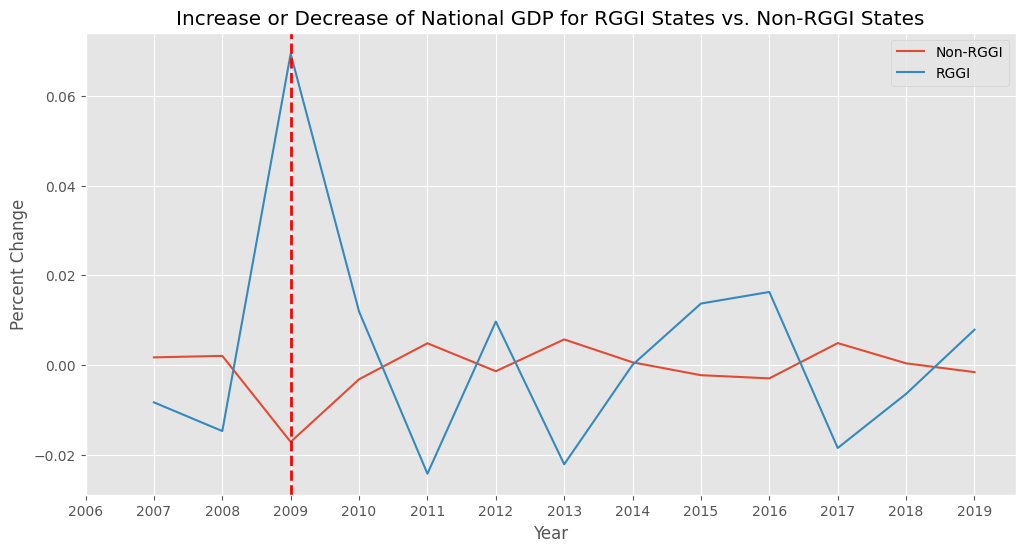

In [436]:
# Plot Percent of National GDP for RGGI States vs. Non-RGGI States

NationalPC_T_GB.iloc[:,:14].T.plot(figsize=(12,6))
plt.title('Increase or Decrease of National GDP for RGGI States vs. Non-RGGI States')
plt.xlabel('Year')
plt.ylabel('Percent Change')
plt.xticks(range(2006,2020))
plt.axvline(x=2009, color='red', linestyle='--', linewidth=2)
plt.legend(['Non-RGGI', 'RGGI'])
plt.show()

## 6. Real GDP

In [440]:
GDP_RealGDP = pd.merge(Alabama['AL_RealGDP'], Alaska['AK_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Arizona['AZ_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Arkansas['AR_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, California['CA_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Colorado['CO_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Connecticut['CT_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Delaware['DE_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Florida['FL_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Georgia['GA_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Hawaii['HI_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Idaho['ID_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Illinois['IL_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Indiana['IN_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Iowa['IA_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Kansas['KS_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Kentucky['KY_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Louisiana['LA_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Maine['ME_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Maryland['MD_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Massachusetts['MA_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Michigan['MI_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Minnesota['MN_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Mississippi['MS_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Missouri['MO_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Montana['MT_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Nebraska['NE_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Nevada['NV_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, NewHampshire['NH_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, NewJersey['NJ_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, NewMexico['NM_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, NewYork['NY_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, NorthCarolina['NC_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, NorthDakota['ND_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Ohio['OH_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Oklahoma['OK_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Oregon['OR_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Pennsylvania['PA_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, RhodeIsland['RI_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, SouthCarolina['SC_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, SouthDakota['SD_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Tennessee['TN_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Texas['TX_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Utah['UT_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Vermont['VT_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Virginia['VA_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Washington['WA_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, WestVirginia['WV_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Wisconsin['WI_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP = pd.merge(GDP_RealGDP, Wyoming['WY_RealGDP'], left_index=True, right_index=True)
GDP_RealGDP

AL_RealGDP  AK_RealGDP  AZ_RealGDP  AR_RealGDP  CA_RealGDP  CO_RealGDP  \
2006    187270.8     49190.2    274179.4    108460.6   2002437.4    257430.2   
2007    189002.5     51721.0    283250.7    107606.1   2041192.2    266887.5   
2008    186946.7     51252.1    280810.1    106536.5   2061638.8    270981.4   
2009    180707.2     56215.1    257498.5    102996.6   1995439.7    264966.3   
2010    184702.4     54601.5    260307.1    105662.0   2036015.0    267858.9   
2011    187605.8     55280.3    266101.5    107932.5   2063827.5    271700.6   
2012    189245.5     58283.6    271440.0    108492.1   2113096.4    276823.1   
2013    191369.8     55354.3    273481.9    110752.4   2179229.0    286259.1   
2014    189886.3     54188.2    276948.9    111734.5   2256054.7    298655.3   
2015    191335.2     54740.8    282577.0    112351.0   2357452.9    312409.7   
2016    194283.8     54246.6    291275.2    112798.1   2427894.6    318953.4   
2017    196974.9     54278.7    303606.1    113850.2   2538204.0    329913.3   
2018    200372.6     53327.0    314827.5    115885.2   2644061.2    342733.2   
2019    203432.7     53433.8    325395.3    117126.2   2729225.8    358438.5   
2020    199880.8     50705.2    327178.0    117268.2   2667220.9    353345.2   
2021    209979.3     50869.4    347656.0    123347.3   2874730.8    373763.3   
2022    213264.8     49633.7    356417.0    126532.2   2885627.3    385834.8   

      CT_RealGDP  DE_RealGDP  FL_RealGDP  GA_RealGDP  ...  SD_RealGDP  \
2006    248233.8     60624.3    839963.8    453032.1  ...     36350.8   
2007    257953.0     60477.9    850048.6    455904.0  ...     37755.9   
2008    257756.0     58655.7    816070.2    445764.6  ...     39080.8   
2009    244894.7     61517.7    769061.1    428740.7  ...     39987.3   
2010    244354.7     60577.2    775039.5    433727.2  ...     40369.6   
2011    238542.4     62919.3    772021.3    441626.7  ...     43049.5   
2012    240911.9     62354.6    778545.0    447764.7  ...     43901.5   
2013    236050.6     60235.8    794842.1    454908.9  ...     44147.4   
2014    235780.9     64940.1    817233.5    470009.7  ...     44846.5   
2015    242706.5     66793.5    852242.4    489182.3  ...     45664.5   
2016    243286.7     63001.3    881539.2    506816.2  ...     46076.0   
2017    247035.9     60357.5    912687.4    523805.3  ...     45775.8   
2018    249074.8     61425.1    941626.7    538604.6  ...     46300.3   
2019    251568.2     64143.5    965672.5    557364.4  ...     46650.5   
2020    235234.9     62281.8    950164.4    537615.8  ...     47402.4   
2021    246555.9     64404.7   1029575.6    575292.2  ...     49557.9   
2022    252533.3     65754.8   1070930.2    591257.3  ...     49809.2   

      TN_RealGDP  TX_RealGDP  UT_RealGDP  VT_RealGDP  VA_RealGDP  WA_RealGDP  \
2006    274879.2   1228547.3    118482.3     27128.8    419870.6    353263.5   
2007    273224.0   1286192.7    123835.3     26886.7    424939.5    373180.6   
2008    274571.1   1282088.7    124225.5     27758.4    431216.7    381289.9   
2009    264737.1   1277295.4    121431.4     27222.0    427648.9    370136.6   
2010    268449.8   1309962.4    123902.2     28403.7    441242.4    380989.5   
2011    276898.3   1353600.4    127992.5     29013.5    444288.0    387745.2   
2012    286341.5   1421180.1    129512.5     29241.3    445973.6    400530.6   
2013    289794.6   1484700.1    133112.9     28681.5    449063.8    410873.9   
2014    294130.1   1529617.1    136993.7     28912.2    447678.1    424467.6   
2015    304484.2   1605901.7    141720.5     29119.0    455162.4    441952.1   
2016    310143.2   1619954.2    147962.3     29408.1    459965.8    458263.8   
2017    318963.9   1659453.3    154758.3     29490.6    467362.0    482007.0   
2018    323541.6   1728304.0    164622.1     29602.2    477915.2    515029.1   
2019    331176.6   1779781.4    172038.4     29940.7    489199.1    533150.4   
2020    323454.0   1747562.0    174954.7     29064

### a. Real GDP for RGGI States vs. Non-RGGI States

### b. Real GDP for RGGI State vs. Average GDP US

#### i. Connecticut

#### ii. Delaware

#### iii. Maine

#### iv. Massachusetts

#### v. Maryland

#### vi. New Hampshire

#### vii. New Jersey

#### viii. New York

#### ix. Rhode Island

#### x. Vermont

#### xi. Virginia

### c. Regression Real GDP~RGGI Indicator

## 7. Real GDP Percent Change

### a. Real GDP Percent Change for RGGI States vs. Non-RGGI States

### b. Regression Real GDP~RGGI Indicator

## 8. Auction Results

### a. Allowances Sold By State

#### i. Connecticut

#### ii.  Delaware

#### iii. Maine

#### iv. Massachusetts

#### v. Maryland

#### vi. New Hampshire

#### vii. New Jersey

#### viii. New York

#### ix. Rhode Island

#### x. Vermont

#### xi. Virginia

### b. Allowance Proceeds By State

#### i. Connecticut

#### ii. Delaware

#### iii. Maine

#### iv. Masachusetts

#### v. Maryland

#### vi. New Hampshire

#### vii. New Jersey

#### viii. New York

#### ix. Rhode Island

#### x. Vermont

#### xi. Virginia

### c. All States Comparison Allowances Sold

### d. All States Comparison Allowance Proceeds

## 9. Allowance Prices Volumes

### a. Relevant Summary Statistics

### b. Total Proceeds Over Time Line Graph

### c. Clearing Price Over Time Line Graph

### d. Quantity Offered vs. Quantity Sold Double Bar Graph

### e. CCR Sold Over Time Line Graph

### f. Quantity Offered vs. Quantity Sold including CCR Triple Line Graph

## 10. Supply Bid Statistics

### a. Relevant Summary Statistics

### b. Potential Bidders Over Time Line Graph

### c. Ratio of Bids to Initial Supply Over Time Line Graph

### d. Won by Compliance Entities and Won by Compliance-Oriented Entities Over Time Double Line Graph

## 11. Investment of Proceeds

### a. Line Graph of Job-Years Added Over Time

### b. Pie Charts of Cumulative Investment of Proceeds

#### i. Connecticut

#### ii. Delaware

#### iii. Maine

#### iv. Maryland

#### v. Massachusetts

#### vi. New Hampshire

#### vii. New Jersey

#### viii. New York

#### ix. Rhode Island

#### x. Vermont

#### xi. Virginia

### c. Line Graph of Cumulative Investment of Proceeds over Time

### d. Stacked Bar Plot of Cumulative Dollars in Each Category

### e. Regressions: Economic Outcome ~ Investments

#### i. Unemployment

#### ii. Employment

#### iii. GDP

#### iv. Real GDP